<a href="https://colab.research.google.com/github/siszon/PROJETO_BRANCOS_2022/blob/main/primeiro_quadrimestre_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CADASTRO DE NOVOS LOTES INSERIDOS NO SISZON NO PRIMEIRO QUADRIMESTRE DE 2022**

## SOBRE O PROJETO
Os dados contidos neste notebook fazem parte de um projeto desenvolvido pela Divisão de Sistema de Informações sobre Zoneamento (SISZON - DEUSO). O dataset consiste em dados reais disponíveis no banco de dados do SISZON.

No contexto da dinâmica urbana do município, ocorre o processo de parcelamento do solo, resultando na criação de novos lotes fiscais que requerem atualizações cadastrais. É responsabilidade da DSIZ/DEUSO/SMUL, conforme as leis pertinentes, atribuir, atualizar e disponibilizar no Sistema de Zoneamento - SISZON o zoneamento de cada novo lote fiscal criado. A localização dos novos lotes, dentro de suas respectivas zonas, fornece informações que permitem a criação de indicadores sobre a relação entre a legislação vigente e a subdivisão, ocupação e uso do solo.

Essas informações compõem o relatório anual da DSIZ sobre "A dinâmica do Plano Diretor Estratégico (Lei 16.050/14) e da Lei de Parcelamento, Uso e Ocupação do Solo (Lei 16.402/16) com base nos dados do Sistema de Informações sobre o Zoneamento (SISZON) da Prefeitura Municipal de São Paulo (PMSP)". O objetivo é gerar indicadores que subsidiem os agentes públicos e a sociedade civil na compreensão da dinâmica do zoneamento, visando avaliar a efetividade da legislação urbanística.


## LÓGICA DE ANÁLISE
Para facilitar o entendimento da análise, este projeto foi desenvolvido por uma metodologia que envolve: modelação de dados/tabelas e mapas no Software Livre QGIS e os Gráficos no Colab código Python.

Na metodologia você encontra por escrito quais foram as conclusões tiradas através da exploração dos dados e data visualization. Neste notebook será encontrado o data visualization e nos códigos também há o maior número de comentários possíveis, facilitando o entendimento do raciocínio no desenvolvimento deste notebook.

**1. Importação de libs e dataset**

##IMPORTAÇÃO LIBS 

In [ ]:
#importar a biblioteca pandas, estruturas de dados e ferramentas de manipulação de dados de alto desempenho e fáceis de usar
import pandas               as pd 

#biblioteca de visualização de dados, criação de gráficos 
import seaborn              as sns

#biblioteca de  visualização de dados
import matplotlib
import matplotlib.pyplot    as plt
import matplotlib.cm as cm

#biblioteca de para computação numérica, estrutura eficiente para manipulação de arrays multidimensionais e uma ampla gama de funções matemáticas de alto desempenho.
import numpy                as np

#fornece classes e métodos para manipulação e formatação de datas, horários e intervalos de tempo.
from datetime               import datetime

#biblioteca de aprendizado de máquina
from sklearn.preprocessing  import OrdinalEncoder, StandardScaler
from sklearn.cluster        import KMeans

#oferece recursos para exibir diferentes tipos de mídia, como texto formatado, imagens, áudio, vídeo e até mesmo elementos interativos, como gráficos interativos ou widgets interativo
from IPython.display        import IFrame, Image

#permite o controle e gerenciamento de avisos (warnings) durante a execução de um programa
import warnings
warnings.filterwarnings('ignore')

#remover números decimais dos eixos
import matplotlib.ticker as ticker

##IMPORTAÇÃO DATASET

In [ ]:
#ler dados em no formato csv direto do drive 
#dados = pd.read_csv("Nomedatabela.csv")



In [ ]:
#colocar link do csv exportado do diretório do git entre aspas 
fonte = "https://raw.githubusercontent.com/siszon/PROJETO_BRANCOS_2022/main/LT_MDC_TPC_ED_ZN_QUAD01_2022.csv" 
 #ler dados em no formato csv
dados = pd.read_csv(fonte)  

dados.head() 

GEOCODE                  ID  \
0  TRAVESSA UM (VL SAO LUIZ), 292,SAO PAULO, SAO ...  308208517518000019   
1  RUA JOVINIANO DE OLIVEIRA, 130,SAO PAULO, SAO ...  308203486884000021   
2  VIA DE PEDESTRE SEM DEN VINTE E SETE, 23,SAO P...  308208517607000064   
3  RUA AURELIO BRASIL RIBEIRO, 607,SAO PAULO, SAO...  308204486833000001   
4  TRAVESSA DOIS A (VL SAO LUIZ), 38,SAO PAULO, S...  308207517526000035   

   COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
0          308          208       517518             0            19   
1          308          203       486884             0            21   
2          308          208       517607             0            64   
3          308          204       486833             0             1   
4          308          207       517526             0            35   

  SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
0            FO           BRL             5  ...             NaN   
1            FO           BRL             1  ...             NaN   
2            FO           BRL             1  ...             NaN   
3            FO           BRL             2  ...             NaN   
4            FO           BRL             1  ...             NaN   

  NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
0     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
3     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
4     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

            QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
0  PRIMEIRO QUADRIMESTRE     2022         0  -23,5713483  -46,7412003  
1  PRIMEIRO QUADRIMESTRE     2022         0  -23,4591058  -46,7001832  
2  PRIMEIRO QUADRIMESTRE     2022         0  -23,6241452  -46,4573012  
3  PRIMEIRO QUADRIMESTRE     2022         0  -23,4593224  -46,7030133  
4  PRIMEIRO QUADRIMESTRE     2022         0  -23,8825347  -46,4576405  

[5 rows x 71 columns]

In [ ]:
#ordenar tabela com base em uma coluna, no caso foi pela sub 
dados = dados.sort_values("SGL_SUBP_EDIC", ascending=True) 


**2. Exploração do dataset:**

O objetivo é entender o tamanho do dataset, identificar se há dados faltantes, selecionar apenas as colunas que serão, a princípio, necessárias para a análise. Sendo elas: Subprefeitura; Zoneamento; Macroárea; Situação do Lote;

##EXPLORAÇÃO DO DATASET 

In [ ]:
#total de linhas e colunas 
dados.shape 

(2310, 71)

In [ ]:
#todas as colunas da tabela importada
dados.columns.values

array(['GEOCODE', 'ID', 'COD_SET_ZON', 'COD_QDR_ZON', 'COD_LOG_ZON',
       'COD_CNDM_ZON', 'COD_LOTE_ZON', 'SGL_SUBP_EDIC', 'SGL_DSTR_EDIC',
       'COD_TSTD_ZON', 'IND_VRFC_EDIC', 'IND_EXCL_INCL_CRGA',
       'SGL_ZONA_01_ZON', 'COD_PRMR_01_ZON', 'SGL_LNDR_01_ZON',
       'COD_TIP_LEGC_01', 'COD_LEGC_01_ZON', 'ANO_LEGC_01_ZON',
       'IND_ADCA_CRGA', 'SGL_ZONA_02_ZON', 'COD_PRMR_02_ZON',
       'SGL_LNDR_02_ZON', 'COD_TIP_LEGC_02', 'COD_LEGC_02_ZON',
       'ANO_LEGC_02_ZON', 'SGL_ZONA_03_ZON', 'COD_PRMR_03_ZON',
       'SGL_LNDR_03_ZON', 'COD_TIP_LEGC_03', 'COD_LEGC_03_ZON',
       'ANO_LEGC_03_ZON', 'SGL_ZONA_04_ZON', 'COD_PRMR_04_ZON',
       'SGL_LNDR_04_ZON', 'COD_TIP_LEGC_04', 'COD_LEGC_04_ZON',
       'ANO_LEGC_04_ZON', 'SGL_ZONA_05_ZON', 'COD_PRMR_05_ZON',
       'SGL_LNDR_05_ZON', 'COD_TIP_LEGC_05', 'COD_LEGC_05_ZON',
       'ANO_LEGC_05_ZON', 'SGL_ZONA_06_ZON', 'COD_PRMR_06_ZON',
       'SGL_LNDR_06_ZON', 'COD_TIP_LEGC_06', 'COD_LEGC_06_ZON',
       'ANO_LEGC_06_ZON', 'COD

In [ ]:
dados.query("SGL_ZONA_01_ZON == '99'")["SGL_ZONA_01_ZON"]
dados['SGL_ZONA_01_ZON'].replace('99', 'INDEFINIDO', inplace=True)

In [ ]:
dados.query("SGL_ZONA_02_ZON == '99'")["SGL_ZONA_02_ZON"]
dados['SGL_ZONA_02_ZON'].replace('99', 'INDEFINIDO', inplace=True)

In [ ]:
# Verificando o tipo de dado
dados.dtypes

GEOCODE         object
ID               int64
COD_SET_ZON      int64
COD_QDR_ZON      int64
COD_LOG_ZON      int64
                 ...  
QUADRIMESTRE    object
COD_ANO          int64
COD_COND         int64
Lat_Y_          object
Long_X_         object
Length: 71, dtype: object

In [ ]:
# Verificando valores nulos
dados.isna().sum()

GEOCODE         0
ID              0
COD_SET_ZON     0
COD_QDR_ZON     0
COD_LOG_ZON     0
               ..
QUADRIMESTRE    0
COD_ANO         0
COD_COND        0
Lat_Y_          0
Long_X_         0
Length: 71, dtype: int64

In [ ]:
#estrutura de uma série do bandas, coluna da esquerda é o index do arquivo 
dados["SGL_ZONA_01_ZON"]

566         ZM
579         ZM
557     ZEIS-1
560     ZEIS-1
563     ZEIS-1
         ...  
931        ZEU
932        ZEU
933        ZEU
935        ZEU
1063        ZM
Name: SGL_ZONA_01_ZON, Length: 2310, dtype: object

In [ ]:
#para puxar a lista é necessário colocar dois colchetes 
dados[["SGL_ZONA_01_ZON", "SGL_SUBP_EDIC"]] 

SGL_ZONA_01_ZON SGL_SUBP_EDIC
566               ZM            AD
579               ZM            AD
557           ZEIS-1            AD
560           ZEIS-1            AD
563           ZEIS-1            AD
...              ...           ...
931              ZEU            VP
932              ZEU            VP
933              ZEU            VP
935              ZEU            VP
1063              ZM            VP

[2310 rows x 2 columns]

In [ ]:
dados["SGL_SUBP_EDIC"]

566     AD
579     AD
557     AD
560     AD
563     AD
        ..
931     VP
932     VP
933     VP
935     VP
1063    VP
Name: SGL_SUBP_EDIC, Length: 2310, dtype: object

In [ ]:
#unique para pesquisar quais subs eu tenho dentro da minha tabela 
dados["SGL_SUBP_EDIC"].unique() 

array(['AD', 'AR', 'BT', 'CL', 'CT', 'CV', 'EM', 'FO', 'GU', 'IP', 'IQ',
       'IT', 'JA', 'JT', 'LA', 'MB', 'MG', 'MO', 'MP', 'PA', 'PE', 'PI',
       'PJ', 'PR', 'SA', 'SB', 'SE', 'SM', 'SO', 'ST', 'VM', 'VP'],
      dtype=object)

In [ ]:
#dados.query("SGL_SUBP_E == 'ZC'")["SGL_SUBP_E"]
#caso tivesse um dado errado

In [ ]:
#Selecionar linha especifica atravez do index 
dados.loc[[748]]

GEOCODE                 ID  \
748  RUA DR PENAFORTE MENDES, 160,SAO PAULO, SAO PA...  10035160440003484   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
748           10           35       160440             0          3484   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
748            SE           BVI             3  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
748     SAO PAULO     SAO PAULO          BRASIL       CENTRO   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
748  PRIMEIRO QUADRIMESTRE     2022         0  -23,5545585  -46,6516544  

[1 rows x 71 columns]

In [ ]:
#alterando a informação errada de uma campo do dataframe
#dados['SGL_SUBP_E'].replace('ZC', 'PE', inplace=True) #o inplace altera oficialmente, sem ele você só visualiza 

In [ ]:
dados.loc[[748]]

GEOCODE                 ID  \
748  RUA DR PENAFORTE MENDES, 160,SAO PAULO, SAO PA...  10035160440003484   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
748           10           35       160440             0          3484   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
748            SE           BVI             3  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
748     SAO PAULO     SAO PAULO          BRASIL       CENTRO   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
748  PRIMEIRO QUADRIMESTRE     2022         0  -23,5545585  -46,6516544  

[1 rows x 71 columns]

In [ ]:
#dados.query("SGL_SUBP_E == 'BP'")["SGL_SUBP_E"]
#dados['SGL_SUBP_E'].replace('BP', 'VP', inplace=True)

In [ ]:
#quantidade de subs que eu tenho dentro da tabela 
len(dados["SGL_SUBP_EDIC"].unique()) 

32

#criar mapa 
import folium
from folium import plugins
import branca
import branca.colormap as cm

m = folium.Map(location=[-23.60, -46.66], 
                 tiles='Stamen Toner', zoom_start=12)

colormap = cm.LinearColormap(colors=['darkblue', 'blue', 'cyan', 'yellow', 'orange', 'red'])

for i, imovel in dados.iterrows():
  folium.CircleMarker(
    location=[dados.Lat_Y_, dados.Long_X_],
    color=colormap(imovel.dados),
    fill=True,
    fill_color=colormap(imovel.dados),
).add_to(m)

colormap.add_to(m)

m

In [ ]:
#criando lista de coordenadas 
coordenadas= []
for lat, lng in zip(dados.Lat_Y_,dados.Long_X_):
  coordenadas.append((lat, lng))

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310 entries, 566 to 1063
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GEOCODE             2310 non-null   object 
 1   ID                  2310 non-null   int64  
 2   COD_SET_ZON         2310 non-null   int64  
 3   COD_QDR_ZON         2310 non-null   int64  
 4   COD_LOG_ZON         2310 non-null   int64  
 5   COD_CNDM_ZON        2310 non-null   int64  
 6   COD_LOTE_ZON        2310 non-null   int64  
 7   SGL_SUBP_EDIC       2310 non-null   object 
 8   SGL_DSTR_EDIC       2310 non-null   object 
 9   COD_TSTD_ZON        2310 non-null   int64  
 10  IND_VRFC_EDIC       2310 non-null   object 
 11  IND_EXCL_INCL_CRGA  2310 non-null   object 
 12  SGL_ZONA_01_ZON     2310 non-null   object 
 13  COD_PRMR_01_ZON     2310 non-null   int64  
 14  SGL_LNDR_01_ZON     0 non-null      float64
 15  COD_TIP_LEGC_01     225 non-null    object 
 16  COD_

In [ ]:
#mapa = folium.Map(location=[-23.60, -46.66], 
                 #tiles='Stamen Toner', zoom_start=12)

In [ ]:
#mapa.add_child(plugins.HeatMap(coordenadas))

#Novos lotes por histórico de filiação

**2. Situação do histórico de filiação dos lotes:**

Segunda análise para entender melhor o dataset e os dados gerais que serão trabalhados por Quarimestre. Abaixo as situação do histórico cadastral dos lotes novos. 

In [ ]:
dados["SGL_SUBP_EDIC"].value_counts()

PJ    513
FO    485
SB    142
PE    111
ST     92
IQ     71
JT     69
MO     67
AD     56
MB     51
CL     49
AR     49
VP     47
BT     43
LA     40
IP     38
SE     37
PI     36
SA     34
MP     32
IT     31
CV     30
SM     28
SO     27
EM     25
MG     22
PR     21
VM     20
CT     15
GU     14
PA      9
JA      6
Name: SGL_SUBP_EDIC, dtype: int64

In [ ]:
#ordenar de acordo com o index 
dados["SGL_SUBP_EDIC"].value_counts().sort_index() 

AD     56
AR     49
BT     43
CL     49
CT     15
CV     30
EM     25
FO    485
GU     14
IP     38
IQ     71
IT     31
JA      6
JT     69
LA     40
MB     51
MG     22
MO     67
MP     32
PA      9
PE    111
PI     36
PJ    513
PR     21
SA     34
SB    142
SE     37
SM     28
SO     27
ST     92
VM     20
VP     47
Name: SGL_SUBP_EDIC, dtype: int64

In [ ]:
dados["SGL_ZONA_01_ZON"].value_counts() #quantidades que a zona aparece na tabela 

ZEIS-1        1084
ZM             486
ZEU            161
INDEFINIDO     126
ZC             123
ZMA             97
ZEUP            44
ZER 1           23
ZDE-1           21
ZEIS-5          21
ZEIS-3          15
ZMIS            13
ZEIS-2          13
ZPI-1           10
ZEIS-4           8
ZEPAM            7
ZPDS             7
ZCOR-2           7
ZEM              6
ZCA              6
ZEUA             6
ZDE-2            5
ZCOR-1           4
ZPI-2            4
ZEMP             3
ZPR              3
ZC-ZEIS          2
ZOE              2
ZERA             2
ZEPEC            1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
dados["SGL_ZONA_02_ZON"].value_counts()

QA            2295
ZEIS-1           4
ZEPAM            3
ZM               2
ZPI-1            2
INDEFINIDO       1
ZEIS-5           1
ZPDS             1
ZERA             1
Name: SGL_ZONA_02_ZON, dtype: int64

In [ ]:
dados["COD_SIT"].value_counts()

1    2039
2     207
0      64
Name: COD_SIT, dtype: int64

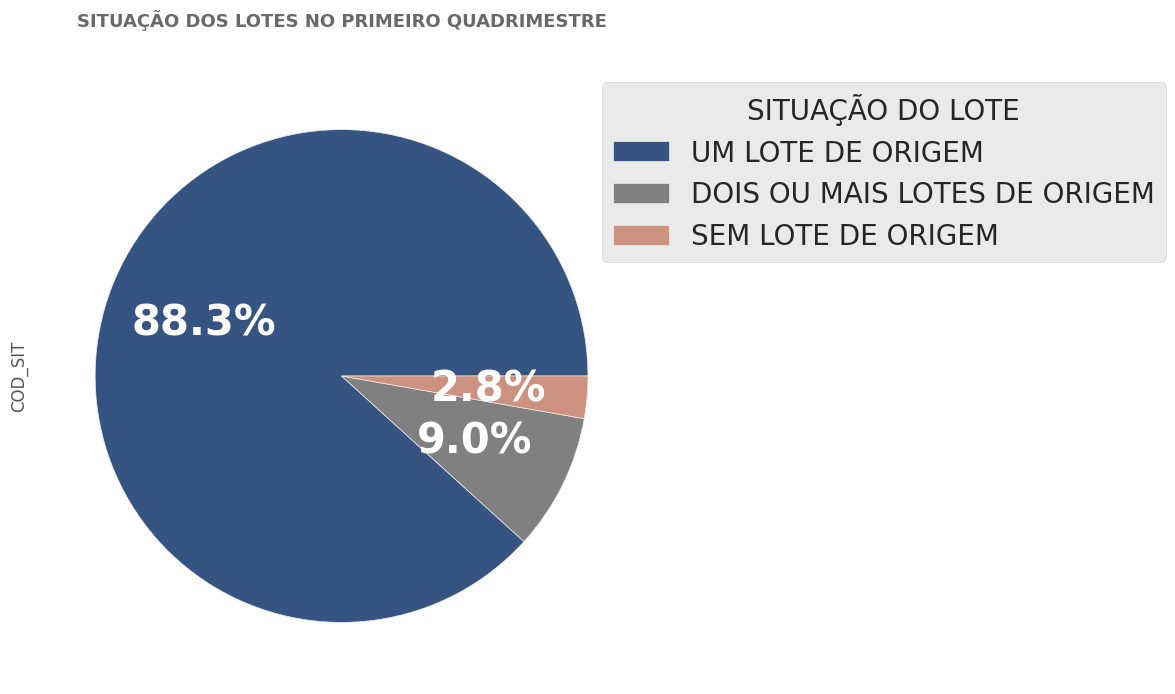

In [ ]:
dados["COD_SIT"].value_counts().plot.pie(figsize=(10,8),autopct='%1.1f%%', colors = ['#365481', 'grey', '#CD927F'], textprops=dict(color="w",fontweight = 'bold', fontsize = 30 ))
SIT_LOTE = plt.title('SITUAÇÃO DOS LOTES NO PRIMEIRO QUADRIMESTRE',
               pad = 30,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
SIT_LOTE = sns.despine(bottom = True, left=True)
SIT_LOTE = plt.legend(title= "SITUAÇÃO DO LOTE",  title_fontsize = 20, loc=2, labels=['UM LOTE DE ORIGEM','DOIS OU MAIS LOTES DE ORIGEM', 'SEM LOTE DE ORIGEM'], bbox_to_anchor=(0.9, 0, 0.5, 1), fontsize = 20)

#ANÁLISE DE DADOS 

**3. Análise da qualidade dos dados:**

Para entender melhor o dataset e os dados gerais que serão trabalhados por Quarimestre. A familiaridade com o dataset auxiliará na formação de hipóteses no próximo passo, este com as análises focadas nas Subprefeituras.

**3.1 Total de Lotes por Subprefeitura no Primeiro Quadrimestre de 2022.**

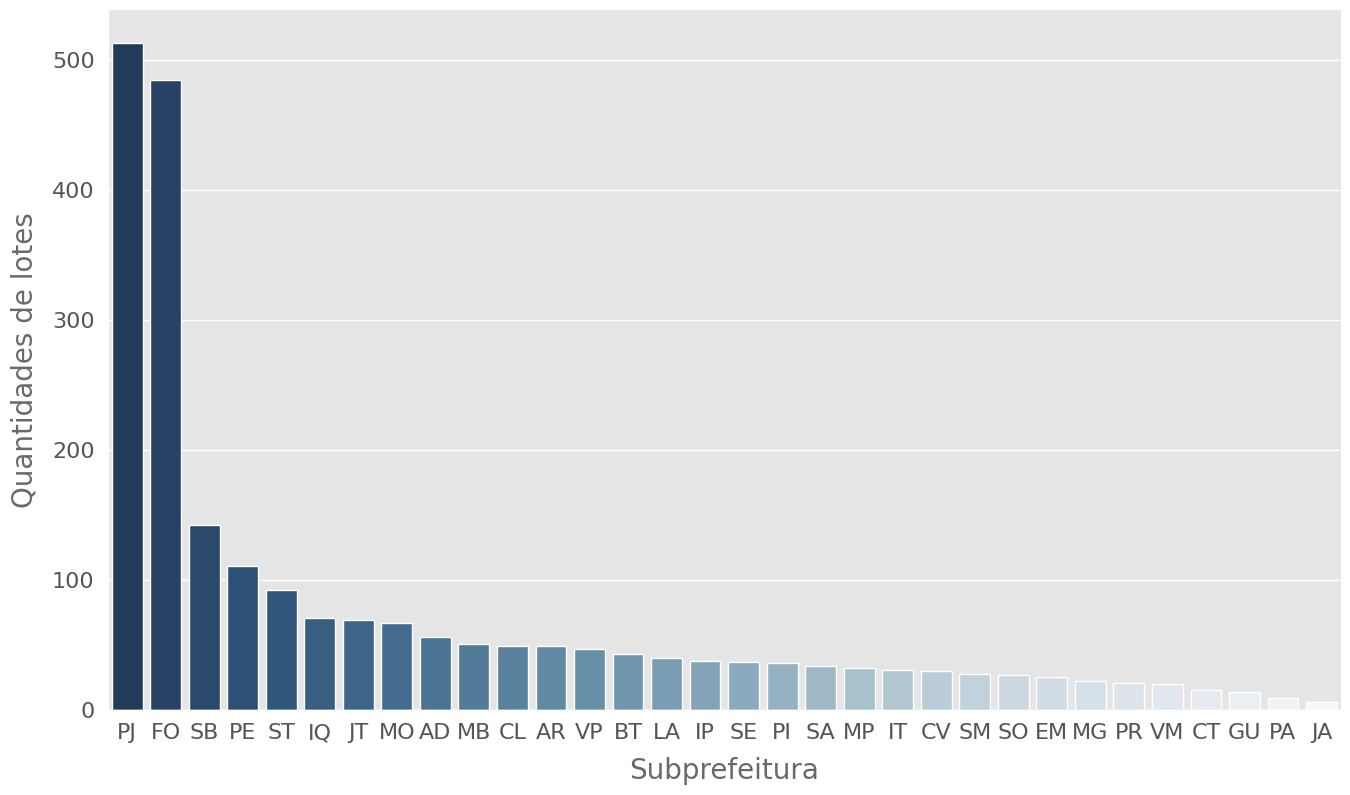

In [ ]:
plt.figure(figsize=(35, 20))
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
tq1 = plt.subplot(2, 2, 3)
tq1 = sns.set_theme(style="darkgrid")
tq1 = sns.countplot(x = 'SGL_SUBP_EDIC', data = dados, order=dados['SGL_SUBP_EDIC'].value_counts().index, orient='h',
                    palette = 'Blues_r',  saturation=0.5, dodge = False) # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
tq1 = sns.despine(bottom = False, left=False)
tq1 = plt.xlabel('Subprefeitura', color = 'dimgrey', labelpad = 10, fontsize = 20)
tq1 = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 20)

**3.1.1 Total de Zonas no Primeiro Quadrimestre de 2022**

In [ ]:
dados = dados.sort_values("SGL_ZONA_01_ZON", ascending=True)  #ordenar tabela com base em uma coluna, no caso foi pela zona 


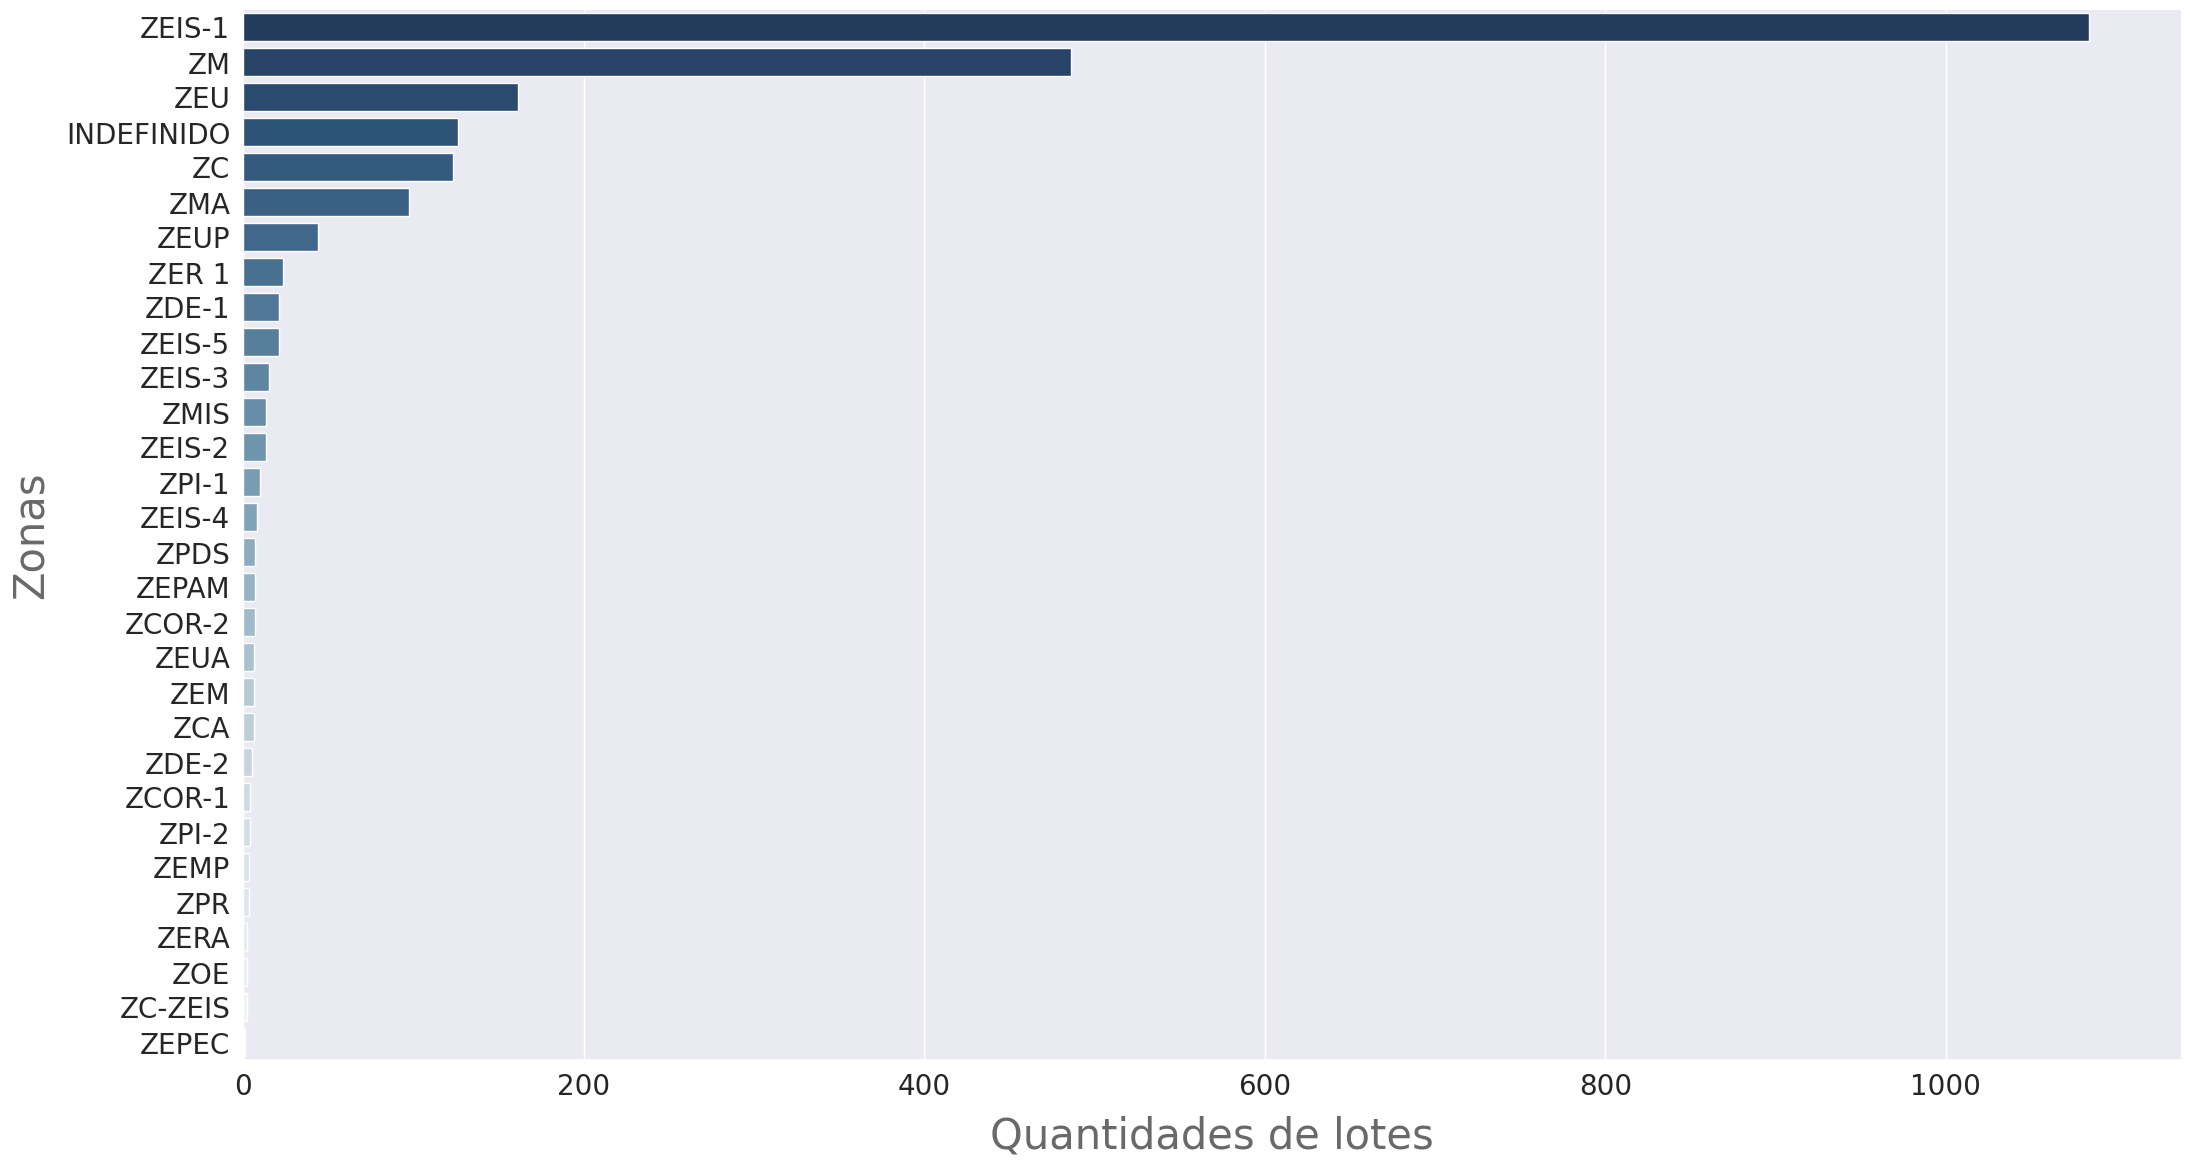

In [ ]:
plt.figure(figsize=(55, 30))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
tz = plt.subplot(2, 2, 4)
tz = sns.set_theme(style="darkgrid")
tz = sns.countplot(y = 'SGL_ZONA_01_ZON', data = dados, order=dados['SGL_ZONA_01_ZON'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.5,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
tz = sns.despine(bottom = False, left=False)
tz = plt.xlabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 30)
tz = plt.ylabel('Zonas', color = 'dimgrey', labelpad = 10, fontsize = 30)


**3.1.2 Lotes com observações**

In [ ]:
dados["TXT_OBS_01_EDIC"].unique() 

array(['Lote nao localizado por falta de croqui atualizado para zona de uso.',
       'LOTE SEM GEOMETRIA NO GEOSAMPA.', 'LOTE COM NUMERO APROXIMADO.',
       'LOTE COM O ENDEREÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã‚Â¡O DO PAI.', nan,
       'LOTE CANCELADO.', 'LOTE COM NUMERO APROXIMADO', 'ZEPEC AUE.',
       'LOTE SEM GEOMETRIA NO GEOSAMPA', 'LOTE COM ENDERECO APROXIMADO.',
       'LOTE EM PARTE SEM ZONEAMENTO.',
       'RESOLUCAO SMUL.AOC.CTLU/004/2018.', 'ZEPEC-AUE.', 'ZEPEC-BIR.',
       'LOTE NAO ENCONTRADO.',
       'LOTE NAO LOCALIZADO POR FALTA DE CROQUI FISCAL.', 'ZEPEC BIR.'],
      dtype=object)

In [ ]:
#ajustar erro de escrita nas observações 
dados.query("TXT_OBS_01_EDIC == 'RESOLUCAO SMUL.AOC.CTLU/004/2018.'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('RESOLUCAO SMUL.AOC.CTLU/004/2018.', 'RESOLUCAO SMDU.AOC.CTLU/004/2018.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'Lote nao localizado por falta de croqui atualizado para zona de uso.'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('Lote nao localizado por falta de croqui atualizado para zona de uso.', 'LOTE NAO ENCONTRADO.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'LOTE NAO LOCALIZADO POR FALTA DE CROQUI FISCAL.'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('LOTE NAO LOCALIZADO POR FALTA DE CROQUI FISCAL.', 'LOTE NAO ENCONTRADO.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'ZEPEC BIR.'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('ZEPEC BIR.', 'ZEPEC-BIR.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'LOTE COM O ENDEREÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã‚Â¡O DO PAI.'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('LOTE COM O ENDEREÃƒÆ’Ã†â€™ÃƒÂ¢Ã¢â€šÂ¬Ã‚Â¡O DO PAI.', 'LOTE COM ENDERECO DO PAI.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'LOTE COM NUMERO APROXIMADO'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('LOTE COM NUMERO APROXIMADO', 'LOTE COM ENDERECO APROXIMADO.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'LOTE COM NUMERO APROXIMADO.'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('LOTE COM NUMERO APROXIMADO.', 'LOTE COM ENDERECO APROXIMADO.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'LOTE NAO ENCONTRADO'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('LOTE NAO ENCONTRADO.', 'LOTE NAO ENCONTRADO.', inplace=True)

In [ ]:
dados.query("TXT_OBS_01_EDIC == 'LOTE SEM GEOMETRIA NO GEOSAMPA'")["TXT_OBS_01_EDIC"]
dados['TXT_OBS_01_EDIC'].replace('LOTE SEM GEOMETRIA NO GEOSAMPA', 'LOTE SEM GEOMETRIA NO GEOSAMPA.', inplace=True)

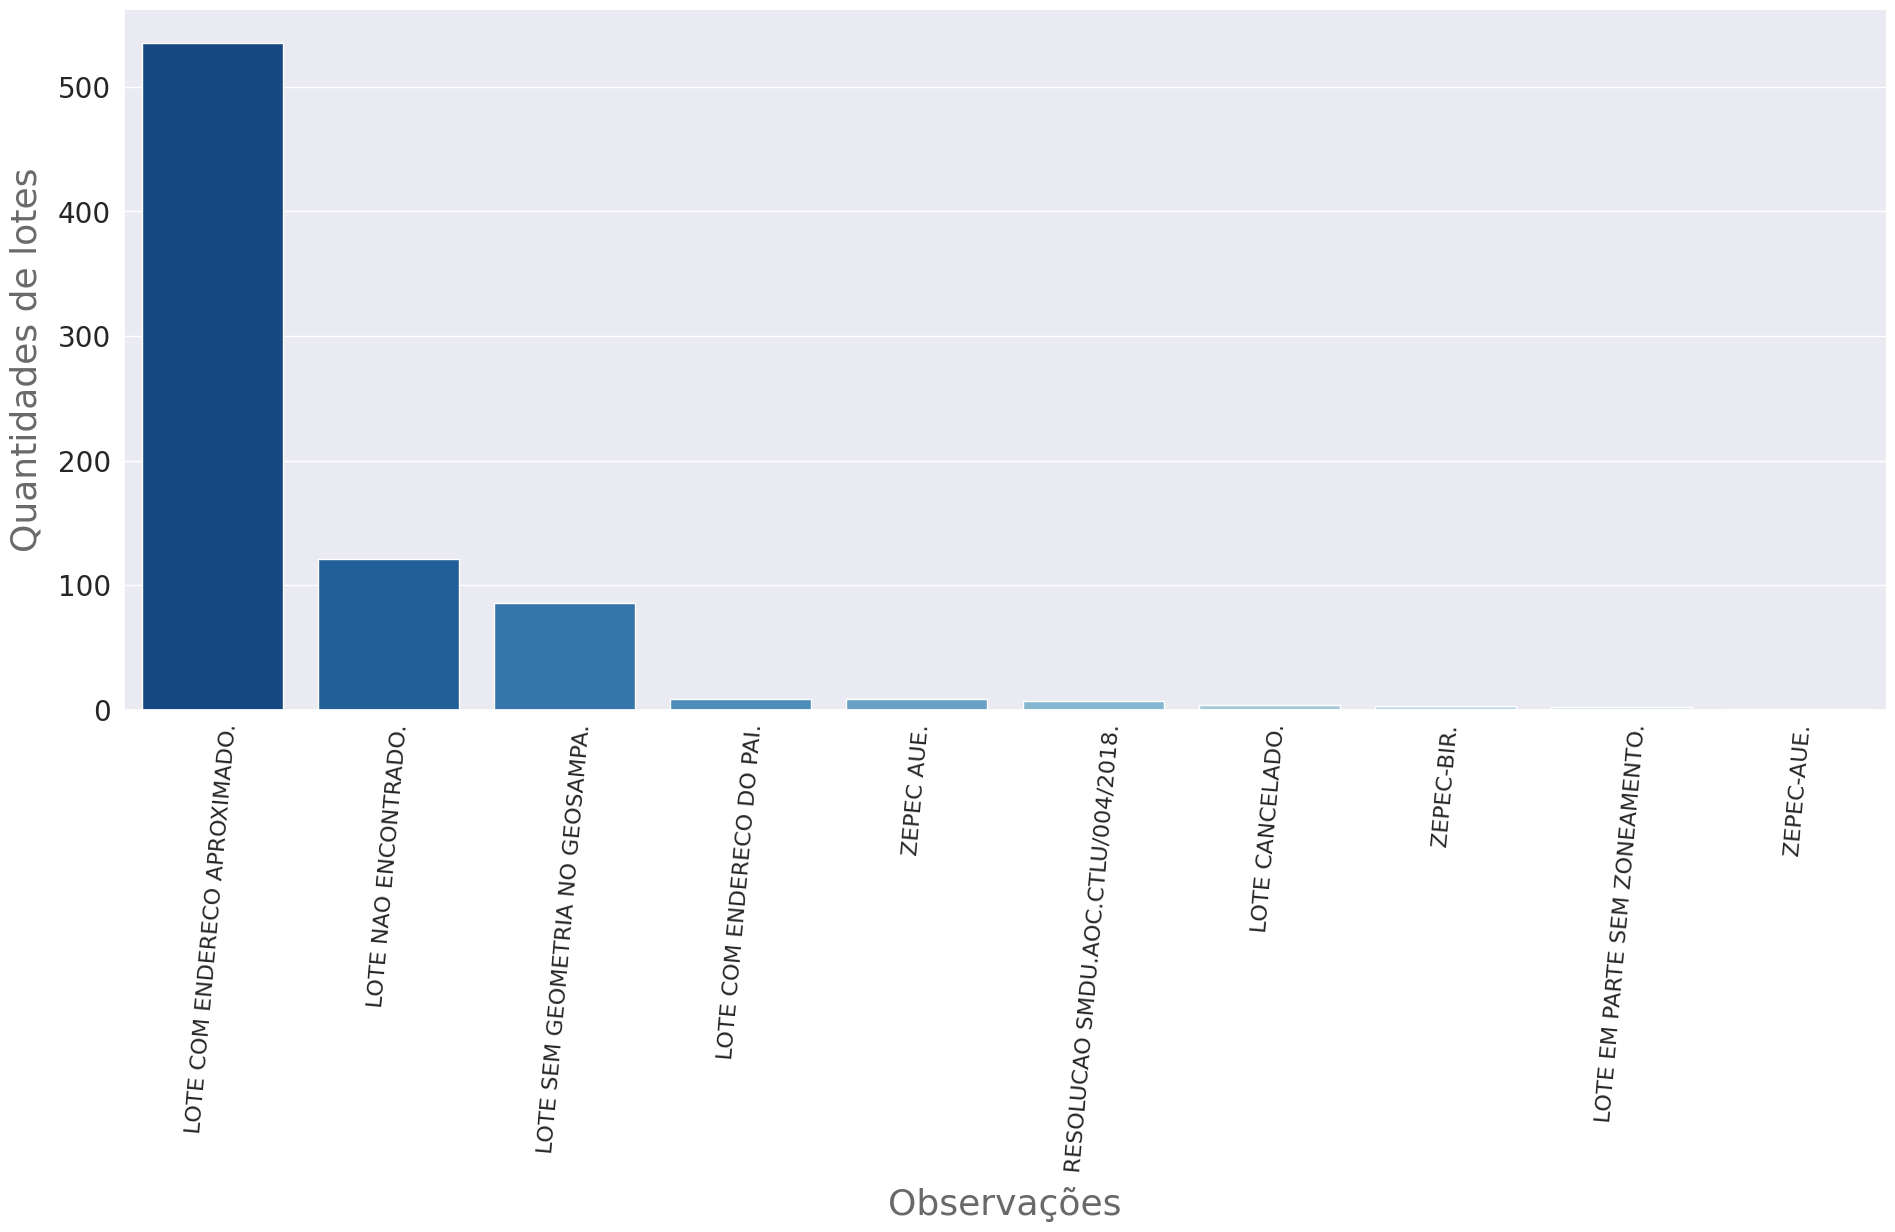

In [ ]:
plt.figure(figsize=(50, 20))
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 20
lobs = plt.subplot(2, 2, 3)
lobs = sns.set_theme(style="darkgrid")
lobs = sns.countplot(x = 'TXT_OBS_01_EDIC', data = dados, order=dados['TXT_OBS_01_EDIC'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.8,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
lobs = sns.despine(bottom = False, left=False)
lobs = plt.xticks(rotation=85,fontsize = 16)
lobs = plt.xlabel('Observações', color = 'dimgrey', labelpad = 10, fontsize = 26)
lobs = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 26)

O LOTES COM ENDERECO APROXIMADO, são casos de 99 e ZEIS-1 que não possuem a quadra no geosampa, provavelmente passaram por processo fundiário.

In [ ]:
dados["SGL_ZONA_02_ZON"]

1501    QA
1503    QA
1387    QA
1502    QA
1126    QA
        ..
1870    QA
228     QA
195     QA
210     QA
52      QA
Name: SGL_ZONA_02_ZON, Length: 2310, dtype: object

In [ ]:
dados.query("SGL_ZONA_02_ZON != 'QA'")["SGL_ZONA_02_ZON"] #selecionar uma informação da coluna 1= diferente de 

512         ZEIS-1
526         ZEIS-1
2090            ZM
1746          ZPDS
2288    INDEFINIDO
1912        ZEIS-5
2079         ZEPAM
641             ZM
204          ZEPAM
1902          ZERA
243          ZEPAM
1805         ZPI-1
1703         ZPI-1
1771        ZEIS-1
1780        ZEIS-1
Name: SGL_ZONA_02_ZON, dtype: object

In [ ]:
Duas_Zonas = dados.query("SGL_ZONA_02_ZON != 'QA'")["SGL_ZONA_02_ZON"]

In [ ]:
Duas_Zonas = dados.query("SGL_ZONA_02_ZON != 'QA'")

In [ ]:
len(Duas_Zonas)

15

**3.1.2 Lotes com mais de uma Zona no Primeiro Quadrimestre de 2022**

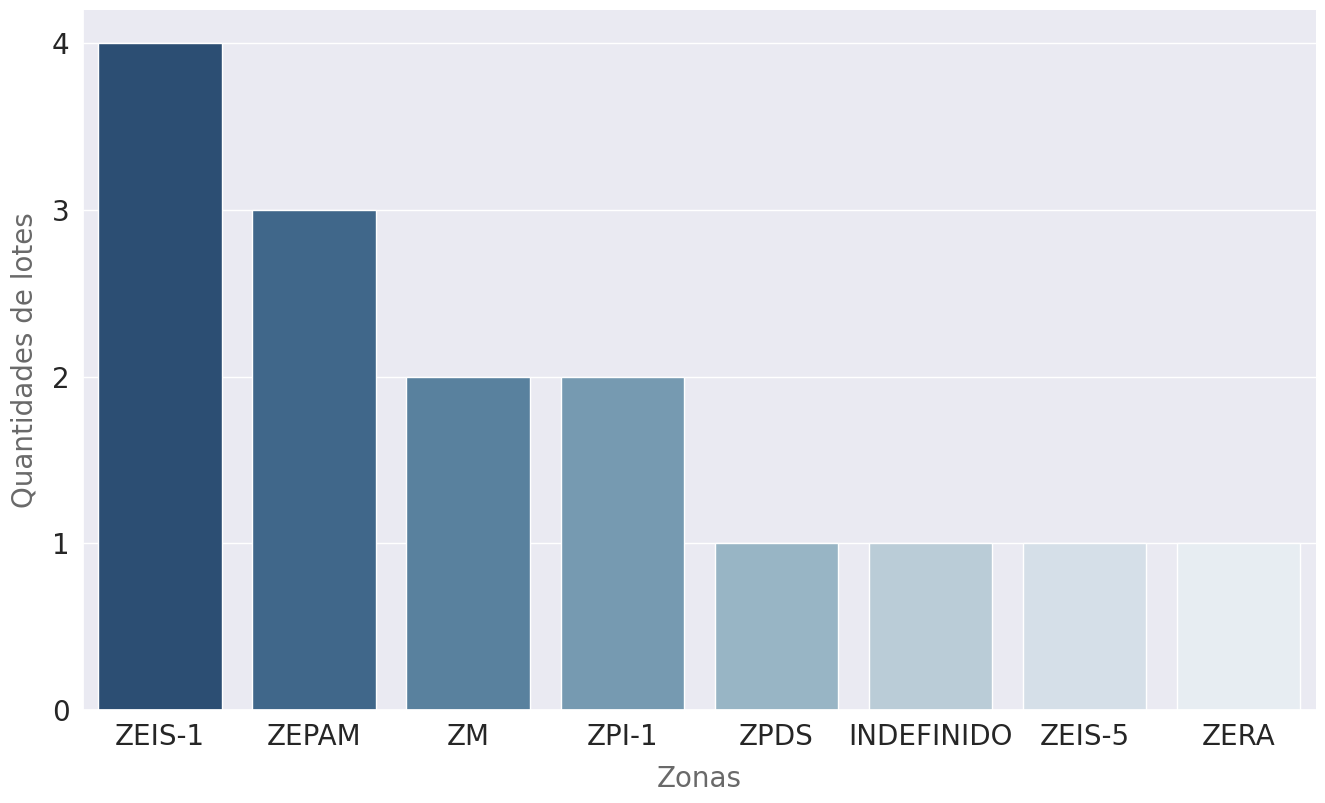

In [ ]:
plt.figure(figsize=(35, 20))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
z2 = plt.subplot(2, 2, 3)
z2 = sns.set_theme(style="whitegrid")
z2 = sns.countplot(x = 'SGL_ZONA_02_ZON', data = Duas_Zonas, order= Duas_Zonas['SGL_ZONA_02_ZON'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.5,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
z2 = sns.despine(bottom = False, left=False)
z2 = plt.xlabel('Zonas', color = 'dimgrey', labelpad = 10, fontsize = 20)
z2 = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
z2 = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 20)

**3.1.3 Novos lotes por região**

In [ ]:
dados.query("SGL_ZONA_02_ZON == 'QA'")["SGL_ZONA_02_ZON"]. value_counts()

QA    2295
Name: SGL_ZONA_02_ZON, dtype: int64

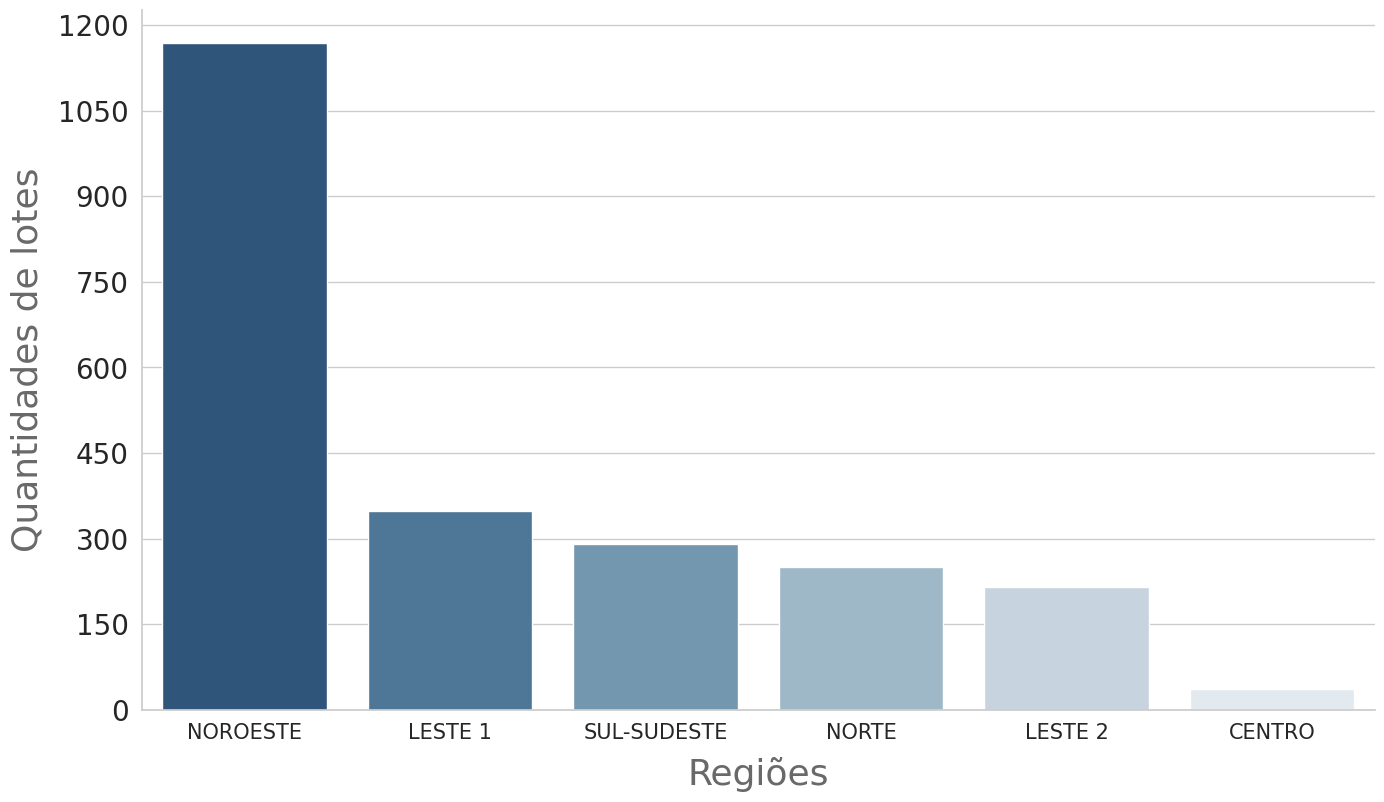

In [ ]:
plt.figure(figsize=(35, 20))
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 20
s3 = plt.subplot(2, 2, 3)
s3 = sns.set_theme(style="whitegrid")
s3 = sns.countplot(x = 'REG_LIM_ADM', data = dados, order= dados['REG_LIM_ADM'].value_counts().index, orient='h',
                     palette = 'Blues_r',  saturation=0.5,  dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
s3 = sns.despine(bottom = False, left=False)
s3 = plt.xlabel('Regiões', color = 'dimgrey', labelpad = 10, fontsize = 26)
s3 = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
s3 = plt.ylabel('Quantidades de lotes', color = 'dimgrey', labelpad = 10, fontsize = 26)

##LOTES POR SUBPREFEITURA 


**4. Análise realisada por Subprefeitura, contendo a quantidade de Lotes novos cadastrados no SISZON e que foram atualizados por Zonas de Uso** 

##CENTRO

##LOTE DA SUBPREFEITURA DA SÉ - SE

In [ ]:
dados.query("SGL_SUBP_EDIC == 'SE'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEU       9
ZC        7
ZDE-1     7
ZEIS-3    7
ZEM       4
ZM        2
ZEIS-5    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SE_Zonas = dados.query("SGL_SUBP_EDIC == 'SE'")

In [ ]:
SE_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
750         1              ZC
756         0              ZC
753         0              ZC
765         0              ZC
747         0              ZC
743         0              ZC
667         0              ZC
670         0           ZDE-1
669         0           ZDE-1
755         0           ZDE-1
764         0           ZDE-1
663         0           ZDE-1
742         0           ZDE-1
741         0           ZDE-1
674         0          ZEIS-3
672         0          ZEIS-3
664         1          ZEIS-3
668         0          ZEIS-3
762         0          ZEIS-3
671         0          ZEIS-3
746         0          ZEIS-3
740         1          ZEIS-5
759         1             ZEM
751         1             ZEM
763         1             ZEM
752         0             ZEM
757         0             ZEU
761         0             ZEU
760         0             ZEU
754         0             ZEU
748         0             ZEU
758         1             ZEU
745         0             ZEU
766         0             ZEU
744         0             ZEU
673         0              ZM
749         0              ZM

In [ ]:
SE_Zonas["COD_COND"] = SE_Zonas["COD_COND"].astype(int)

In [ ]:
SE_Zonas["COD_COND"] = SE_Zonas["COD_COND"].astype(str)

In [ ]:
SE_Zonas["COD_COND"]

750    1
756    0
753    0
765    0
747    0
743    0
667    0
670    0
669    0
755    0
764    0
663    0
742    0
741    0
674    0
672    0
664    1
668    0
762    0
671    0
746    0
740    1
759    1
751    1
763    1
752    0
757    0
761    0
760    0
754    0
748    0
758    1
745    0
766    0
744    0
673    0
749    0
Name: COD_COND, dtype: object

In [ ]:
SE_Zonas.query("COD_COND != '0'")["COD_CNDM_ZON"].value_counts() #selecionar uma informação da coluna 1= diferente de 

14    2
3     1
5     1
6     1
1     1
10    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
SE_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()


ZEU       9
ZC        7
ZDE-1     7
ZEIS-3    7
ZEM       4
ZM        2
ZEIS-5    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SE_Cond_Zonas = SE_Zonas.query("COD_COND != '0'")
SE_Cond_Zonas

GEOCODE                 ID  \
750  AVENIDA SEN QUEIROS, 101,SAO PAULO, SAO PAULO ...   1027167258030000   
664  RUA DO LAVAPES, 419,SAO PAULO, SAO PAULO - BRASIL   4052116491050000   
740  RUA BR DE IGUAPE, 985,SAO PAULO, SAO PAULO - B...   4037090328060000   
759  RUA REGO FREITAS, 484,SAO PAULO, SAO PAULO - B...   7081169579140000   
751  RUA ANHANGUERA, 436,SAO PAULO, SAO PAULO - BRASIL  19105014273010000   
763  RUA BRIG GALVAO, 312,SAO PAULO, SAO PAULO - BR...  20041077283100000   
758  RUA PEDRO TAQUES, 80,SAO PAULO, SAO PAULO - BR...  10031159999140000   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
750            1           27       167258             3             0   
664            4           52       116491             5             0   
740            4           37        90328             6             0   
759            7           81       169579            14             0   
751           19          105        14273             1             0   
763           20           41        77283            10             0   
758           10           31       159999            14             0   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
750            SE           REP             2  ...             NaN   
664            SE           LIB             1  ...             NaN   
740            SE           LIB             2  ...             NaN   
759            SE           REP             1  ...             NaN   
751            SE           SCE             1  ...             NaN   
763            SE           SCE             3  ...             NaN   
758            SE           CON             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
750     SAO PAULO     SAO PAULO          BRASIL       CENTRO   
664     SAO PAULO     SAO PAULO          BRASIL       CENTRO   
740     SAO PAULO     SAO PAULO          BRASIL       CENTRO   
759     SAO PAULO     SAO PAULO          BRASIL       CENTRO   
751     SAO PAULO     SAO PAULO          BRASIL       CENTRO   
763     SAO PAULO     SAO PAULO          BRASIL       CENTRO   
758     SAO PAULO     SAO PAULO          BRASIL       CENTRO   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
750  PRIMEIRO QUADRIMESTRE     2022         1  -23,5388665  -46,6351773  
664  PRIMEIRO QUADRIMESTRE     2022         1  -23,5613488  -46,6284912  
740  PRIMEIRO QUADRIMESTRE     2022         1  -23,5581738  -46,6271272  
759  PRIMEIRO QUADRIMESTRE     2022         1  -23,5461817  -46,6467385  
751  PRIMEIRO QUADRIMESTRE     2022         1   -23,523899  -46,6527319  
763  PRIMEIRO QUADRIMESTRE     2022         1  -23,5323321  -46,6548789  
758  PRIMEIRO QUADRIMESTRE     2022         1  -23,5523059  -46,6569747  

[7 rows x 71 columns]

In [ ]:
len(SE_Cond_Zonas) 

7

In [ ]:
SE_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts(ascending=False)

ZEU       8
ZDE-1     7
ZC        6
ZEIS-3    6
ZM        2
ZEM       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SE_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts( ascending=False)

ZEM       3
ZC        1
ZEIS-3    1
ZEIS-5    1
ZEU       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SE_Sem_Cond_Zonas = SE_Zonas.query("COD_COND == '0'")
SE_Sem_Cond_Zonas.head(2)

GEOCODE                ID  \
756  RUA JOSE PAULINO, 168,SAO PAULO, SAO PAULO - B...  8043111376000912   
753  AVENIDA RIO BRANCO, 90,SAO PAULO, SAO PAULO - ...  1053171158000570   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
756            8           43       111376             0           912   
753            1           53       171158             0           570   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
756            SE           BRE             1  ...             NaN   
753            SE           REP             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
756     SAO PAULO     SAO PAULO          BRASIL       CENTRO   
753     SAO PAULO     SAO PAULO          BRASIL       CENTRO   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
756  PRIMEIRO QUADRIMESTRE     2022         0  -23,5324675  -46,6379336  
753  PRIMEIRO QUADRIMESTRE     2022         0  -23,5416965  -46,6382328  

[2 rows x 71 columns]

In [ ]:
len(SE_Sem_Cond_Zonas)

30

In [ ]:
len(SE_Zonas) #quatidade total de zonas 

37

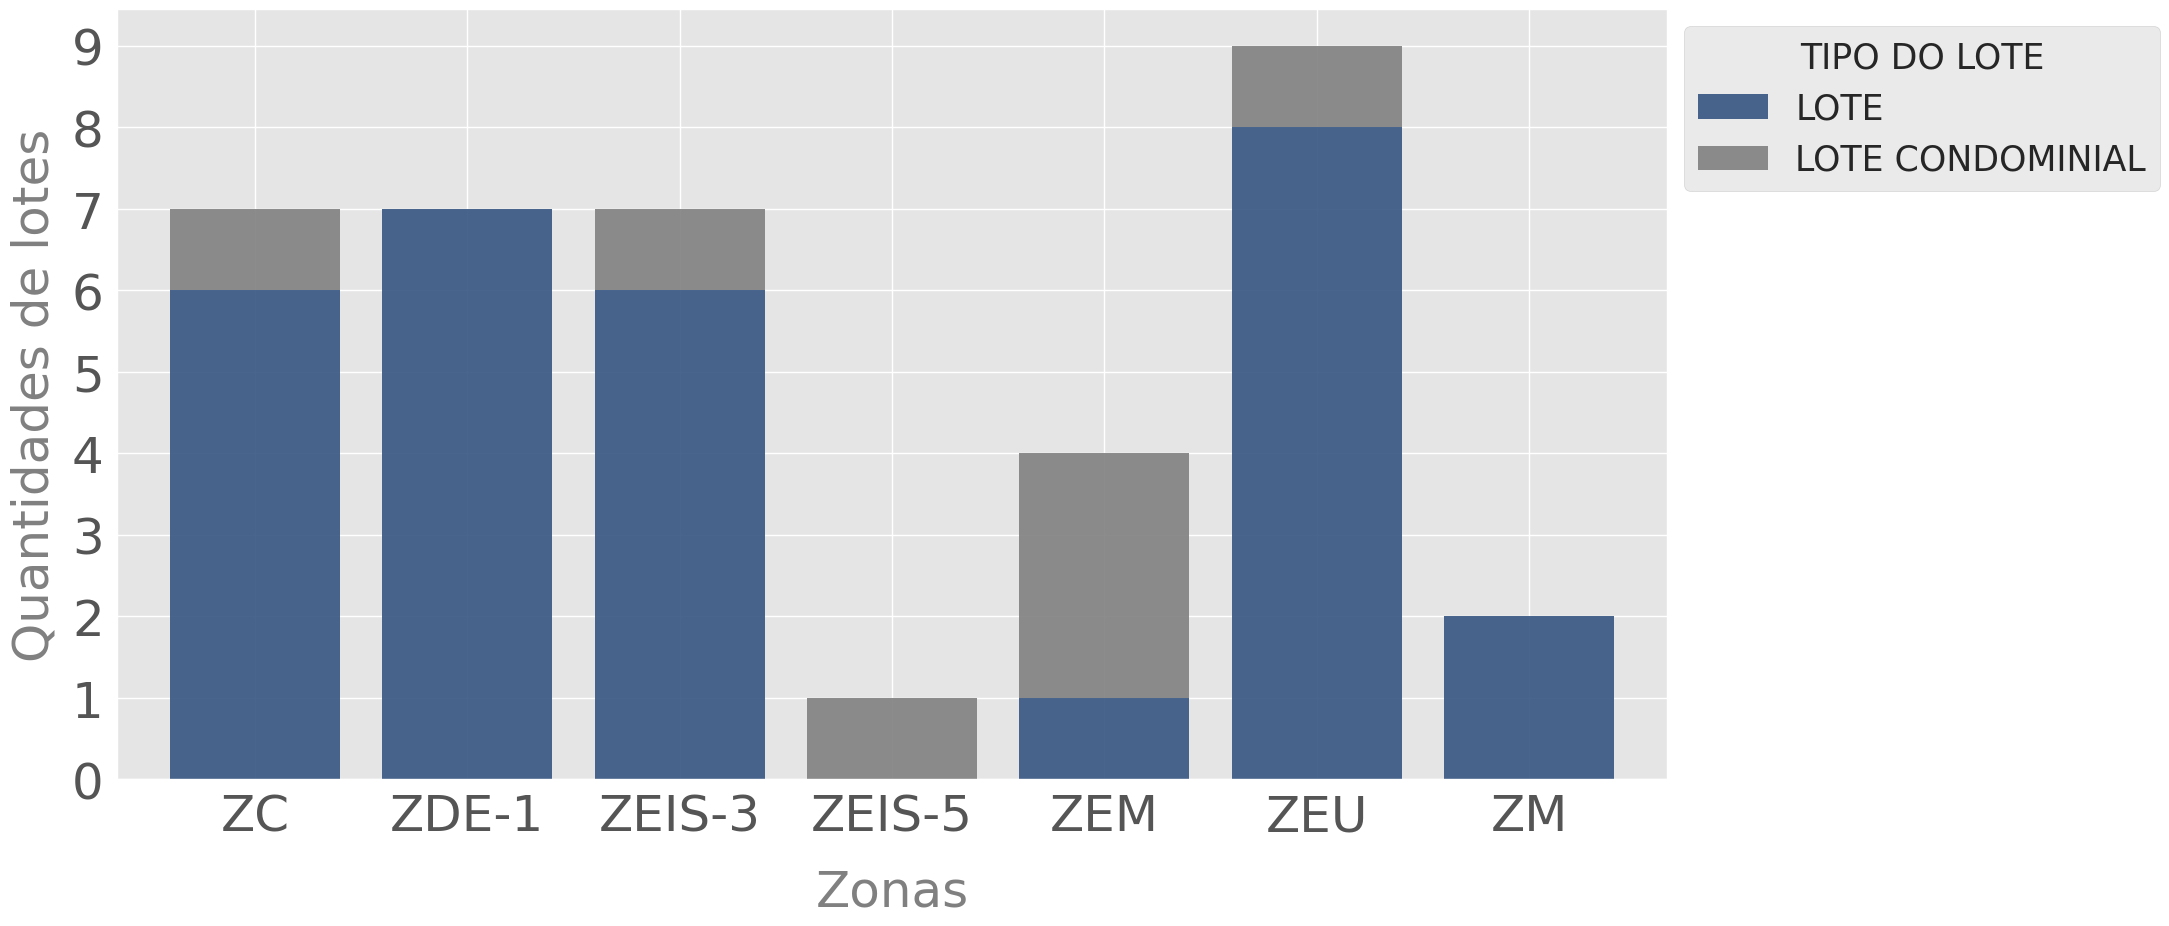

In [ ]:
#cmap = cm.get_cmap('Spectral_r')
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE= SE_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, edgecolor='None', color = ['#365481', 'grey'])
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SE = plt.xticks(rotation= 0 )
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
SE = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

**barras ao lado uma da outra**


plt.figure(figsize=(40, 20))
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE = plt.subplot(2, 2, 3)
SE = sns.set_theme(style="whitegrid")
SE =  sns.countplot(x = 'SGL_ZONA_0', hue = 'COND', data = SE_Zonas, order=SE_Zonas['SGL_ZONA_0'].value_counts().index, orient='h',
                    palette = ['purple', 'orange'], dodge = True # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
SE = sns.despine(bottom = False, left=False)
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.legend(title= "TIPO DO LOTE", loc=2, labels=['LOTE CONDOMINIAL','LOTE'],bbox_to_anchor=(0.85, 0, 0, 1))


**barras na decrescente**

plt.figure(figsize=(40, 20))
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SE = plt.subplot(2, 2, 3)
SE = sns.set_theme(style="whitegrid")
SE = sns.countplot(x = 'SGL_ZONA_0',  data = SE_Zonas, order=SE_Zonas['SGL_ZONA_0'].value_counts().index, orient='h',
                    palette = 'Purples_r',  saturation=1, dodge = False # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
SE = sns.countplot(x = 'SGL_ZONA_0',  data = SE_Cond_Zonas, order=SE_Cond_Zonas['SGL_ZONA_0'].value_counts().index, orient='h',
                    palette = 'Oranges_r', saturation=1, dodge = False, # color = 'salmon,  saturation=.5 or palette = 'Blues_d'
                   )
SE = sns.despine(bottom = False, left=False)
SE = plt.xlabel('Zonas', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SE = plt.legend(title= "TIPO DO LOTE", loc=2, labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(0.8, 0, 0, 1))

##NORTE

##LOTES NA SUBPREFEITURA DE SANTANA

In [ ]:
dados.query("SGL_SUBP_EDIC == 'ST'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        55
ZC        14
ZEU       12
ZEUP       3
ZEMP       2
ZER 1      2
ZMA        2
ZEIS-2     1
ZEIS-5     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
ST_Zonas = dados.query("SGL_SUBP_EDIC == 'ST'")

In [ ]:
ST_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1991         1              ZC
1990         1              ZC
1992         1              ZC
1999         1              ZC
2062         1              ZC
...        ...             ...
2147         0              ZM
2068         1              ZM
2133         1              ZM
338          0             ZMA
339          0             ZMA

[92 rows x 2 columns]

In [ ]:
ST_Zonas["COD_COND"]

1991    1
1990    1
1992    1
1999    1
2062    1
       ..
2147    0
2068    1
2133    1
338     0
339     0
Name: COD_COND, Length: 92, dtype: int64

In [ ]:
ST_Zonas["COD_COND"] = ST_Zonas["COD_COND"].astype(str)
ST_Zonas["COD_COND"] = ST_Zonas["COD_COND"].astype(str)


In [ ]:
ST_Zonas.query("COD_COND  == '0'")["SGL_ZONA_01_ZON"].value_counts() #selecionar uma informação da coluna 1= diferente de 

ZM       40
ZEU       5
ZC        4
ZER 1     2
ZMA       2
ZEMP      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
ST_Zonas.query("COD_COND  == '1'")["SGL_ZONA_01_ZON"].value_counts() #selecionar uma informação da coluna 1= diferente de 

ZM        15
ZC        10
ZEU        7
ZEUP       3
ZEIS-2     1
ZEIS-5     1
ZEMP       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
ST_Cond_Zonas = ST_Zonas.query("COD_COND != '0'")
ST_Cond_Zonas

GEOCODE                 ID  \
1991      RUA ADELINA, 81,SAO PAULO, SAO PAULO - BRASIL  70081001767030000   
1990  RUA IRMAOS PILA, 333,SAO PAULO, SAO PAULO - BR...  70082093572030000   
1992  RUA CEL OCTAVIO AZEREDO, 419,SAO PAULO, SAO PA...  70066151920030000   
1999  RUA TANQUE VELHO, 1437,SAO PAULO, SAO PAULO - ...  67343186643020000   
2062  RUA CONS MOREIRA DE BARROS, 1405,SAO PAULO, SA...  72054142425060000   
2057  RUA TEREZINHA MARIA M DE LEAO, 145,SAO PAULO, ...  71368279625100000   
2091  RUA ALBERTINA V DA SILVA GORDO, 420,SAO PAULO,...  70095004634020000   
2061  RUA JOAQUIM NORBERTO, 463,SAO PAULO, SAO PAULO...  69059105872060000   
2090    AV AGUA FRIA, 867,SAO PAULO, SAO PAULO - BRASIL  70128003514020000   
2099  RUA MONTE D'OURO, 189,SAO PAULO, SAO PAULO - B...  70178141682020000   
2116      RUA NAPOLES, 15,SAO PAULO, SAO PAULO - BRASIL  67138144118010000   
2008     AV GUAPIRA, 1451,SAO PAULO, SAO PAULO - BRASIL  67280083208020000   
2056  RUA HENRIQUE BERNARDELLI, 132,SAO PAULO, SAO P...  73024086711110000   
2009  RUA PDE LEAO PERUCHE, 446,SAO PAULO, SAO PAULO...  67171116807020000   
2094  RUA CLAUDINO INACIO JOAQUIM, 157,SAO PAULO, SA...  67217050393020000   
2104  RUA CARLOS CAMARGO ARANHA, 164,SAO PAULO, SAO ...  69115043141010000   
2063  RUA DR MARREI JUNIOR, 124,SAO PAULO, SAO PAULO...  68015135720060000   
2066  RUA CON LADEIRA, 407,SAO PAULO, SAO PAULO - BR...  67186115274070000   
2071                   , ,SAO PAULO, SAO PAULO - BRASIL  67224030996060000   
2084  PQ DOMINGOS LUIS, 337,SAO PAULO, SAO PAULO - B...  69120060399010000   
2007   RUA MIN KELLY, 236,SAO PAULO, SAO PAULO - BRASIL  67283114901020000   
2004      AV MAZZEI, 1299,SAO PAULO, SAO PAULO - BRASIL  67113137677020000   
2122   RUA MIN KELLY, 195,SAO PAULO, SAO PAULO - BRASIL  67158114901010000   
1976  RUA JOAO DE LEDESMA, 158,SAO PAULO, SAO PAULO ...  67247102466040000   
2121  RUA BALTAZAR DE MORAIS, 214,SAO PAULO, SAO PAU...  67163027561010000   
1980  RUA S PEDRO DA ALDEIA, 62,SAO PAULO, SAO PAULO...  67492158950030000   
1982  AV VER ANGELO BORTOLO, 260,SAO PAULO, SAO PAUL...  70285013862040000   
1989  RUA JOAO DE LAET, 313,SAO PAULO, SAO PAULO - B...  70105102458030000   
2075        RUA JUPIA, 91,SAO PAULO, SAO PAULO - BRASIL  72067113840050000   
2126     RUA PARAMBU, 110,SAO PAULO, SAO PAULO - BRASIL  67280154539010000   
2002  AV GUSTAVO ADOLFO, 419,SAO PAULO, SAO PAULO - ...  68150085383020000   
2127  RUA GREGORIO CALDAS, 121,SAO PAULO, SAO PAULO ...  67274082074010000   
2000  RUA RABELO DA CRUZ, 413,SAO PAULO, SAO PAULO -...  67338167827020000   
2073  RUA CD DE ASSUMAR, 339,SAO PAULO, SAO PAULO - ...  67250024350050000   
2011  RUA MURILO FURTADO, 301,SAO PAULO, SAO PAULO -...  67120143286020000   
2132  RUA JOSE ALBUQUERQUE MEDEIROS, 739,SAO PAULO, ...  70132108790010000   
2068  RUA ARLINDO PASQUALINI, 186,SAO PAULO, SAO PAU...  70286634778070000   
2133        RUA BUZIOS, 8,SAO PAULO, SAO PAULO - BRASIL  70114037400010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1991           70           81         1767             3             0   
1990           70           82        93572             3             0   
1992           70           66       151920             3             0   
1999           67          343       186643             2             0   
2062           72           54       142425             6             0   
2057           71          368       279625            10             0   
2091           70           95         4634             2             0   
2061           69           59       105872             6             0   
2090           70          128         3514             2             0   
2099           70          178       141682             2             0   
2116           67          138       144118             1             0   
2008           67          280        83208             2             0   
2056           73           24

In [ ]:
len(ST_Cond_Zonas)

38

In [ ]:
ST_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM       40
ZEU       5
ZC        4
ZER 1     2
ZMA       2
ZEMP      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
ST_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM        15
ZC        10
ZEU        7
ZEUP       3
ZEIS-2     1
ZEIS-5     1
ZEMP       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
ST_Sem_Cond_Zonas = SE_Zonas.query("COD_COND == '0'")


In [ ]:
len(ST_Cond_Zonas)

38

In [ ]:
len(ST_Sem_Cond_Zonas)

30

In [ ]:
len(ST_Zonas)

92

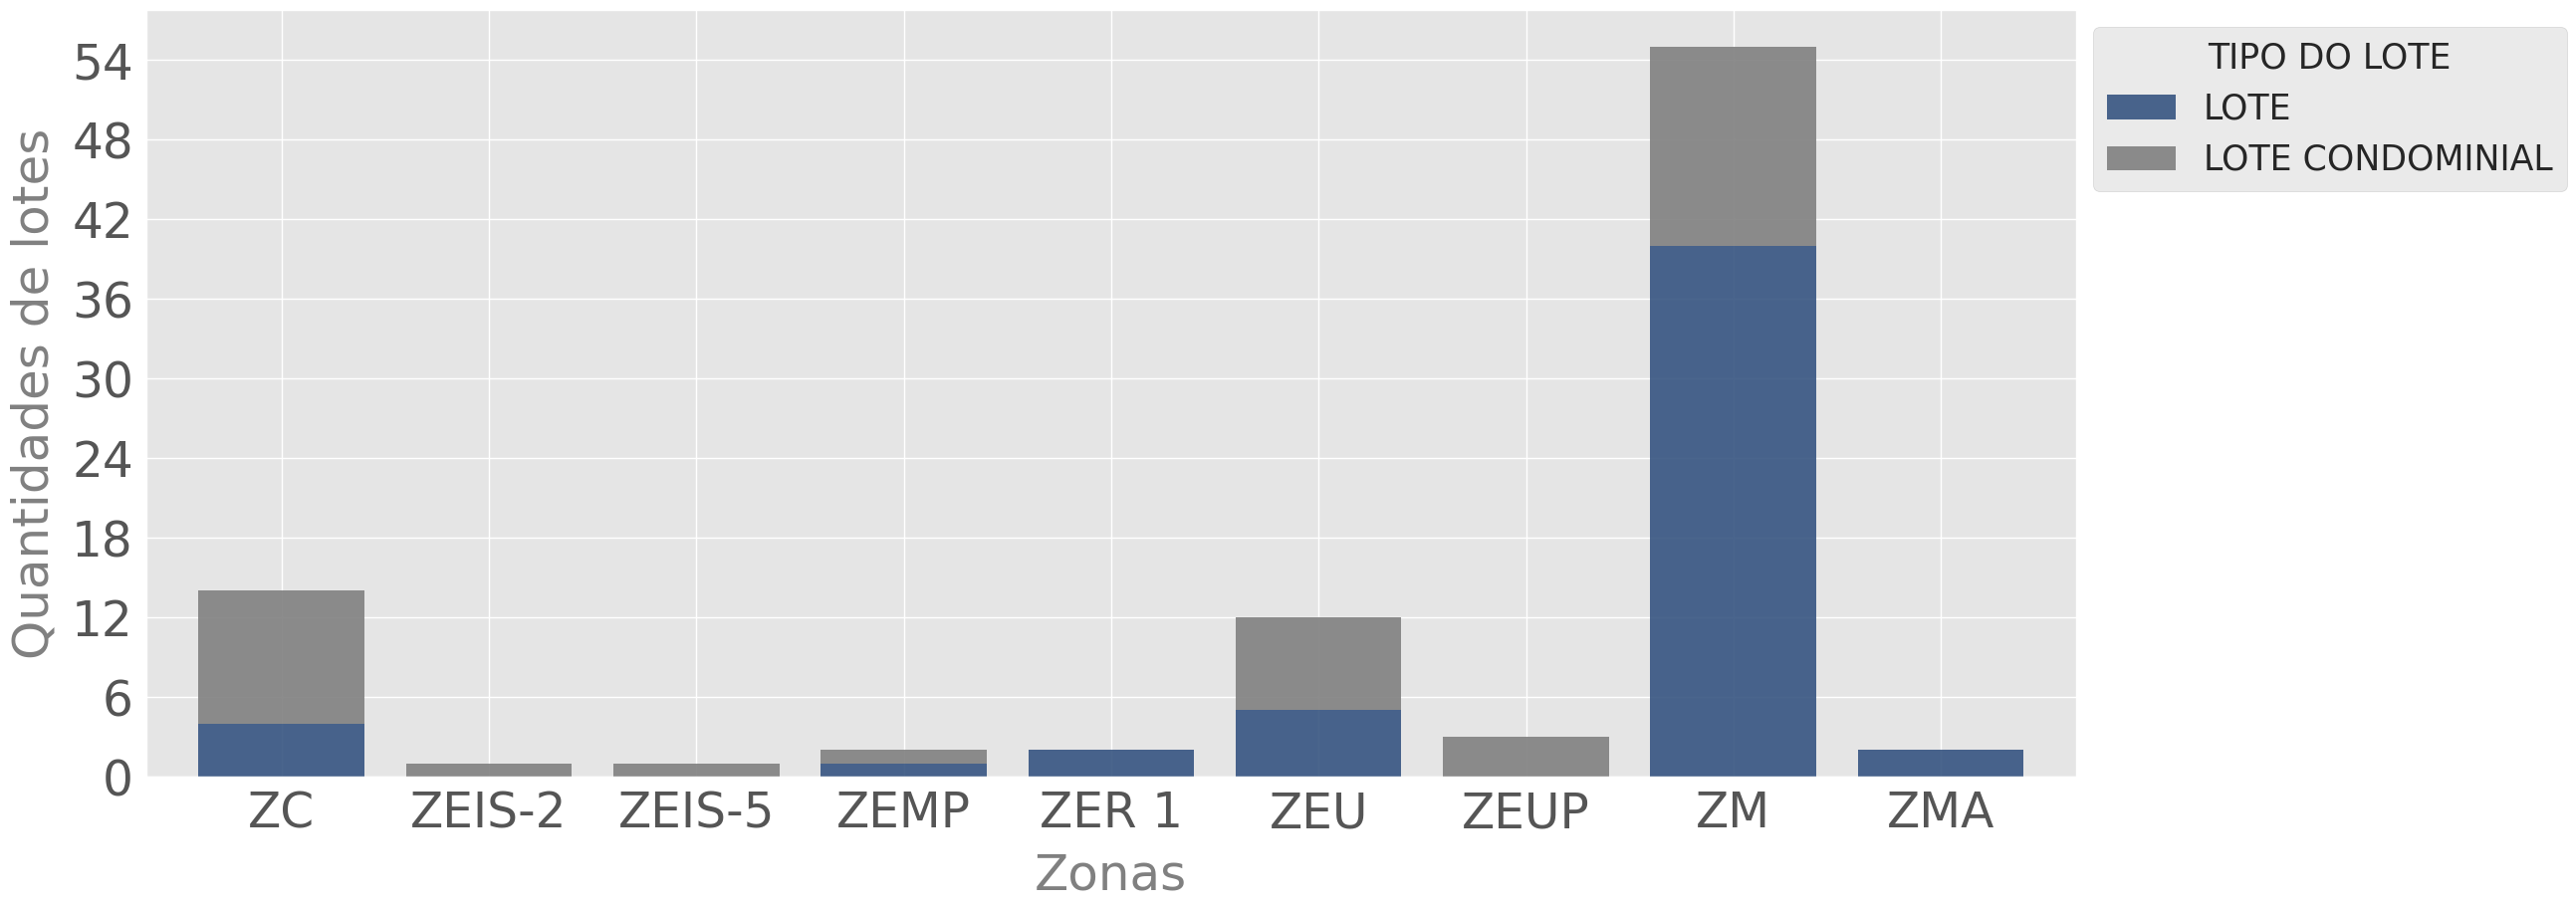

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35
ST= ST_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10),width = 0.8, alpha = 0.9, edgecolor='None', color = ['#365481', 'grey'])
ST = plt.xlabel('Zonas', color = 'gray', labelpad = 10, fontsize = 36)
ST = plt.xticks(rotation= 0 )
ST = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
ST = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ST = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE JAÇANÃ TREMEMBÉ - JT 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'JT'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    34
ZMA       12
ZEIS-5     6
ZM         6
ZC         2
ZCA        2
ZDE-2      2
ZEUP       2
ZEIS-2     1
ZER 1      1
ZPI-2      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
JT_Zonas = dados.query("SGL_SUBP_EDIC == 'JT'")

In [ ]:
JT_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
2109         1              ZC
2080         1              ZC
2088         1             ZCA
2082         1             ZCA
2159         0           ZDE-2
...        ...             ...
2103         1             ZMA
2055         1             ZMA
28           0             ZMA
247          0             ZMA
1870         0           ZPI-2

[69 rows x 2 columns]

In [ ]:
JT_Zonas["COD_COND"]

2109    1
2080    1
2088    1
2082    1
2159    0
       ..
2103    1
2055    1
28      0
247     0
1870    0
Name: COD_COND, Length: 69, dtype: int64

In [ ]:
JT_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() #selecionar uma informação da coluna 1= diferente de

0    53
1    10
2     4
9     1
8     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
JT_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()


ZEIS-1    34
ZMA       12
ZEIS-5     6
ZM         6
ZC         2
ZCA        2
ZDE-2      2
ZEUP       2
ZEIS-2     1
ZER 1      1
ZPI-2      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
JT_Zonas.query("COD_CNDM_ZON == '0'")["SGL_ZONA_01_ZON"].value_counts()

Series([], Name: SGL_ZONA_01_ZON, dtype: int64)

In [ ]:
JT_Cond_Zonas = JT_Zonas.query("COD_COND != '0'")
JT_Cond_Zonas

GEOCODE                  ID  \
2109  RUA TANQUE VELHO, 1844,SAO PAULO, SAO PAULO - ...   67398186643010000   
2080   RUA GRAO PARA, 142,SAO PAULO, SAO PAULO - BRASIL   66309081884010000   
2088  RUA MARIA DALCIA DORES, 64,SAO PAULO, SAO PAUL...  198110204617010000   
2082  RUA ALFREDO PARDINI, 82,SAO PAULO, SAO PAULO -...  109173007153010000   
2159  RV FERNAO DIAS, 14371,SAO PAULO, SAO PAULO - B...   66655070610000042   
...                                                 ...                 ...   
2103  RUA DR TEIXEIRA DAS NEVES, 107,SAO PAULO, SAO ...  198064148474020000   
2055  RUA IRMA EMERENCIANA, 1098,SAO PAULO, SAO PAUL...   66083064289080000   
28       RUA PEJUCARA, 79,SAO PAULO, SAO PAULO - BRASIL  198092729060000044   
247   RUA SALVADOR ALVARES, 12,SAO PAULO, SAO PAULO ...  109104645176000034   
1870  AV CEL SEZEFREDO FAGUNDES, 14233,SAO PAULO, SA...  226025181510000001   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2109           67          398       186643             1             0   
2080           66          309        81884             1             0   
2088          198          110       204617             1             0   
2082          109          173         7153             1             0   
2159           66          655        70610             0            42   
...           ...          ...          ...           ...           ...   
2103          198           64       148474             2             0   
2055           66           83        64289             8             0   
28            198           92       729060             0            44   
247           109          104       645176             0            34   
1870          226           25       181510             0             1   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2109            JT           JAC             1  ...             NaN   
2080            JT           JAC             1  ...             NaN   
2088            JT           TRE             1  ...             NaN   
2082            JT           TRE             1  ...             NaN   
2159            JT           JAC             3  ...             NaN   
...            ...           ...           ...  ...             ...   
2103            JT           TRE             1  ...             NaN   
2055            JT           JAC             1  ...             NaN   
28              JT           TRE             1  ...             NaN   
247             JT           TRE             1  ...             NaN   
1870            JT           TRE             2  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2109     SAO PAULO     SAO PAULO          BRASIL        NORTE   
2080     SAO PAULO     SAO PAULO          BRASIL        NORTE   
2088     SAO PAULO     SAO PAULO          BRASIL        NORTE   
2082     SAO PAULO     SAO PAULO          BRASIL        NORTE   
2159     SAO PAULO     SAO PAULO          BRASIL        NORTE   
...            ...           ...             ...          ...   
2103     SAO PAULO     SAO PAULO          BRASIL        NORTE   
2055     SAO PAULO     SAO PAULO          BRASIL        NORTE   
28       SAO PAULO     SAO PAULO          BRASIL        NORTE   
247      SAO PAULO     SAO PAULO          BRASIL        NORTE   
1870     SAO PAULO     SAO PAULO          BRASIL        NORTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
2109  PRIMEIRO QUADRIMESTRE     2022         1  -23,4757581  -46,5844126  
2080  PRIMEIRO QUADRIMESTRE     2022         1  -23,4788685  -46,5624004  
2088  PRIMEIRO QUADRIMESTRE     2022         1  -23,4564588  -46,5988386  
2082  PRIMEIRO QUADRIMESTRE     2022         1  -23,4569028  -46,6044166  
2159  PRIMEIRO QUADRIMESTRE     2022         0  -23,4662341  -46,5715522  
...                     ...      ...       ...          ...          ...  
2103  PRIMEIRO QUADRIMESTRE     2022   

In [ ]:
len(JT_Cond_Zonas) 

69

In [ ]:
JT_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

Series([], Name: SGL_ZONA_01_ZON, dtype: int64)

In [ ]:
JT_Sem_Cond_Zonas = JT_Zonas.query("COD_COND == '0'")
JT_Sem_Cond_Zonas.head(3)

Empty DataFrame
Columns: [GEOCODE, ID, COD_SET_ZON, COD_QDR_ZON, COD_LOG_ZON, COD_CNDM_ZON, COD_LOTE_ZON, SGL_SUBP_EDIC, SGL_DSTR_EDIC, COD_TSTD_ZON, IND_VRFC_EDIC, IND_EXCL_INCL_CRGA, SGL_ZONA_01_ZON, COD_PRMR_01_ZON, SGL_LNDR_01_ZON, COD_TIP_LEGC_01, COD_LEGC_01_ZON, ANO_LEGC_01_ZON, IND_ADCA_CRGA, SGL_ZONA_02_ZON, COD_PRMR_02_ZON, SGL_LNDR_02_ZON, COD_TIP_LEGC_02, COD_LEGC_02_ZON, ANO_LEGC_02_ZON, SGL_ZONA_03_ZON, COD_PRMR_03_ZON, SGL_LNDR_03_ZON, COD_TIP_LEGC_03, COD_LEGC_03_ZON, ANO_LEGC_03_ZON, SGL_ZONA_04_ZON, COD_PRMR_04_ZON, SGL_LNDR_04_ZON, COD_TIP_LEGC_04, COD_LEGC_04_ZON, ANO_LEGC_04_ZON, SGL_ZONA_05_ZON, COD_PRMR_05_ZON, SGL_LNDR_05_ZON, COD_TIP_LEGC_05, COD_LEGC_05_ZON, ANO_LEGC_05_ZON, SGL_ZONA_06_ZON, COD_PRMR_06_ZON, SGL_LNDR_06_ZON, COD_TIP_LEGC_06, COD_LEGC_06_ZON, ANO_LEGC_06_ZON, COD_AREA_CONST, COD_AREA_LT, COD_END_LOG, COD_NUM_PORT, COD_SIT, VALOR_MET_CODLOG, VALOR_MET_MED_ZON, NUM_PAV, SGL_ZON_URB_RUR, ANO_CONST, IND_EXCL_OBS, TXT_OBS_01_EDIC, TXT_OBS_02_EDIC, NOME_CID_EDIC, NOME_EST_EDIC, NOME_PAIS_EDIC, REG_LIM_ADM, QUADRIMESTRE, COD_ANO, COD_COND, Lat_Y_, Long_X_]
Index: []

[0 rows x 71 columns]

In [ ]:
len(JT_Sem_Cond_Zonas)

0

In [ ]:
len(JT_Zonas)

69

In [ ]:
JT_Zonas.query("SGL_ZONA_01_ZON == '99'")["SGL_ZONA_01_ZON"]
JT_Zonas['SGL_ZONA_01_ZON'].replace('99', 'INDEFINIDO', inplace=True)

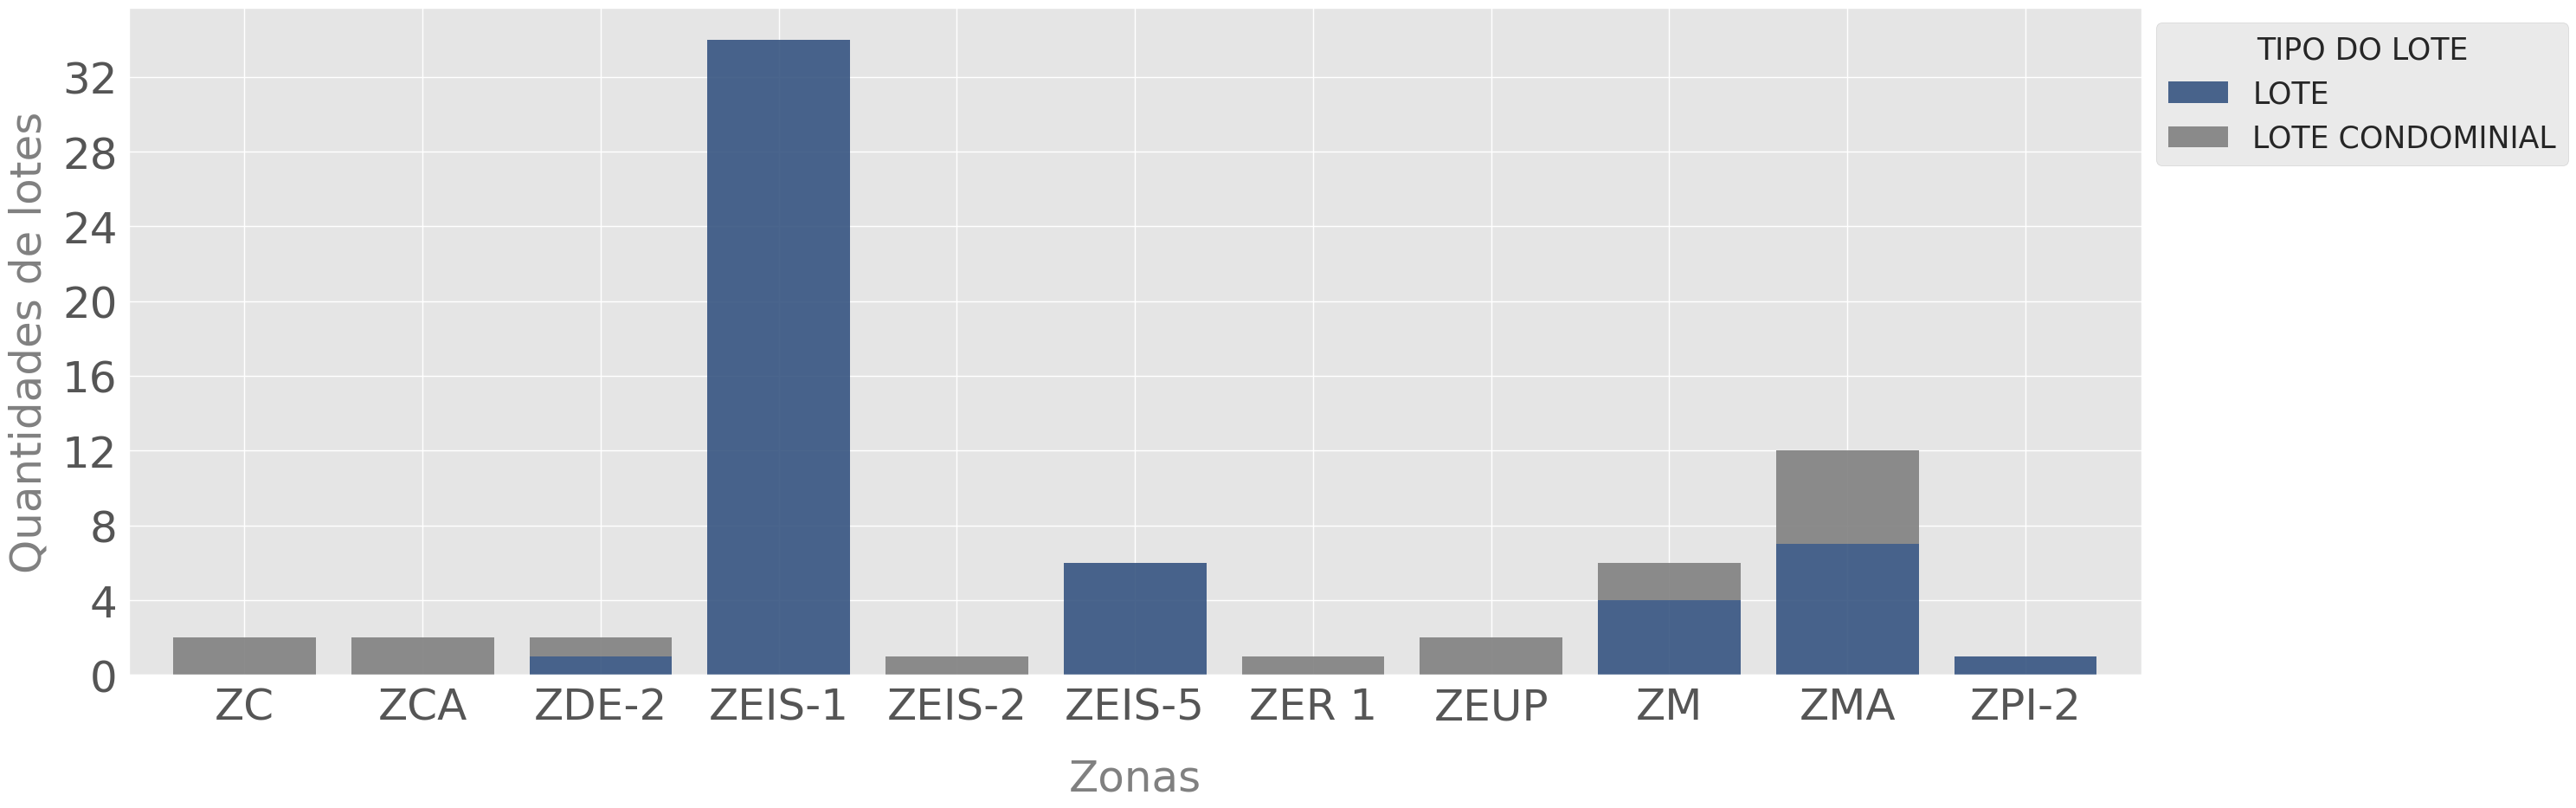

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
JT= JT_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(30, 10),width = 0.8, alpha = 0.9, edgecolor='None',color = ['#365481', 'grey'])
JT = plt.xlabel('Zonas', color = 'gray', labelpad =25, fontsize = 36)
JT = plt.xticks(rotation= 0 )
JT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
JT = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
JT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA VILA MARIA/VILA GUILHERME - MG 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'MG'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZC       11
ZM        9
ZPI-1     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MG_Zonas = dados.query("SGL_SUBP_EDIC == 'MG'")

In [ ]:
MG_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
2110         1              ZC
2106         1              ZC
44           0              ZC
222          0              ZC
1993         1              ZC
211          0              ZC
2001         1              ZC
244          0              ZC
1997         1              ZC
1996         1              ZC
1994         1              ZC
1897         0              ZM
2003         1              ZM
1995         1              ZM
2081         1              ZM
2097         1              ZM
2107         1              ZM
2111         1              ZM
2113         1              ZM
2100         1              ZM
58           0           ZPI-1
310          0           ZPI-1

In [ ]:
MG_Zonas["COD_COND"] = MG_Zonas["COD_COND"].astype(int)

In [ ]:
MG_Zonas["COD_COND"] = MG_Zonas["COD_COND"].astype(str)

In [ ]:
MG_Zonas["COD_COND"]

2110    1
2106    1
44      0
222     0
1993    1
211     0
2001    1
244     0
1997    1
1996    1
1994    1
1897    0
2003    1
1995    1
2081    1
2097    1
2107    1
2111    1
2113    1
2100    1
58      0
310     0
Name: COD_COND, dtype: object

In [ ]:
MG_Zonas.query("COD_COND != '0'")["COD_COND"].value_counts() #selecionar uma informação da coluna 1= diferente de 

1    15
Name: COD_COND, dtype: int64

In [ ]:
MG_Zonas.query("COD_COND != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM    8
ZC    7
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MG_Cond_Zonas = MG_Zonas.query("COD_COND != '0'")
MG_Cond_Zonas

GEOCODE                  ID  \
2110  RUA PDE CALDAS BARBOSA, 155,SAO PAULO, SAO PAU...  304093039063010000   
2106     RUA CACADOR, 211,SAO PAULO, SAO PAULO - BRASIL   68070037745010000   
1993  RUA CHICO PONTES, 467,SAO PAULO, SAO PAULO - B...  304008048968020000   
2001  RUA JOSE DE ALMEIDA, 1009,SAO PAULO, SAO PAULO...   68226108820020000   
1997        RUA PIATA, 55,SAO PAULO, SAO PAULO - BRASIL   68004162019020000   
1996     RUA CATAPARA, 88,SAO PAULO, SAO PAULO - BRASIL   68049045942020000   
1994     RUA CACADOR, 437,SAO PAULO, SAO PAULO - BRASIL   68070037745020000   
2003       RUA ITALA, 111,SAO PAULO, SAO PAULO - BRASIL   68002094803020000   
1995    RUA CATAPARA, 199,SAO PAULO, SAO PAULO - BRASIL   68068045942020000   
2081  AV NOSRA DO LORETO, 1181,SAO PAULO, SAO PAULO ...   66266147346010000   
2097     RUA SEVERA, 1041,SAO PAULO, SAO PAULO - BRASIL   64082181374020000   
2107  RUA HENRIQUE MAZZEI, 470,SAO PAULO, SAO PAULO ...   68056087009010000   
2111  RUA JOSE DE ALMEIDA, 54,SAO PAULO, SAO PAULO -...   68163108820010000   
2113  RUA CON LUIS GONZAGA BIAZI, 270,SAO PAULO, SAO...   68021045446010000   
2100  RUA CANDIDO FIGUEIREDO, 602,SAO PAULO, SAO PAU...   68447041050020000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2110          304           93        39063             1             0   
2106           68           70        37745             1             0   
1993          304            8        48968             2             0   
2001           68          226       108820             2             0   
1997           68            4       162019             2             0   
1996           68           49        45942             2             0   
1994           68           70        37745             2             0   
2003           68            2        94803             2             0   
1995           68           68        45942             2             0   
2081           66          266       147346             1             0   
2097           64           82       181374             2             0   
2107           68           56        87009             1             0   
2111           68          163       108820             1             0   
2113           68           21        45446             1             0   
2100           68          447        41050             2             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2110            MG           VGL             3  ...             NaN   
2106            MG           VGL             1  ...             NaN   
1993            MG           VGL             1  ...             NaN   
2001            MG           VMD             3  ...             NaN   
1997            MG           VGL             1  ...             NaN   
1996            MG           VGL             1  ...             NaN   
1994            MG           VGL             1  ...             NaN   
2003            MG           VGL             1  ...             NaN   
1995            MG           VGL             1  ...             NaN   
2081            MG           VMD             1  ...             NaN   
2097            MG           VMR             1  ...             NaN   
2107            MG           VGL             1  ...             NaN   
2111            MG           VMD             1  ...             NaN   
2113            MG           VGL             1  ...             NaN   
2100            MG           VMD             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2110     SAO PAULO     SAO PAULO          BRASIL        NORTE   
2106     SAO PAULO     SAO PAULO          BRASIL        NORTE   
1993     SAO PAULO     SAO PAULO          BRASIL        NORTE   
2001     SAO PAULO     SAO PAULO          BRASIL        NORTE   
1997     SAO PAULO     SAO PAULO          BRASIL        NORTE   
1996     SAO PAULO     SAO PAULO          BRASIL       

In [ ]:
len(MG_Cond_Zonas) 

15

In [ ]:
MG_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZC       4
ZPI-1    2
ZM       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MG_Sem_Cond_Zonas = MG_Zonas.query("COD_COND == '0'")
MG_Sem_Cond_Zonas.head(3)

GEOCODE                  ID  \
44   RUA GCM ADRIANO DE SOUZA BARBOSA, 500,SAO PAUL...  304043413186000016   
222  RUA PDE AGOSTINHO JORGE, 19,SAO PAULO, SAO PAU...   66274025089000054   
211  RUA PDE AGOSTINHO JORGE, 15,SAO PAULO, SAO PAU...   66274025089000053   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
44           304           43       413186             0            16   
222           66          274        25089             0            54   
211           66          274        25089             0            53   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
44             MG           VGL             2  ...             NaN   
222            MG           VMD             1  ...             NaN   
211            MG           VMD             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
44      SAO PAULO     SAO PAULO          BRASIL        NORTE   
222     SAO PAULO     SAO PAULO          BRASIL        NORTE   
211     SAO PAULO     SAO PAULO          BRASIL        NORTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
44   PRIMEIRO QUADRIMESTRE     2022         0  -23,6951873  -46,6483611  
222  PRIMEIRO QUADRIMESTRE     2022         0  -23,4947179  -46,5807883  
211  PRIMEIRO QUADRIMESTRE     2022         0  -23,4948376  -46,5808678  

[3 rows x 71 columns]

In [ ]:
len(MG_Sem_Cond_Zonas)

7

In [ ]:
len(MG_Zonas)

22

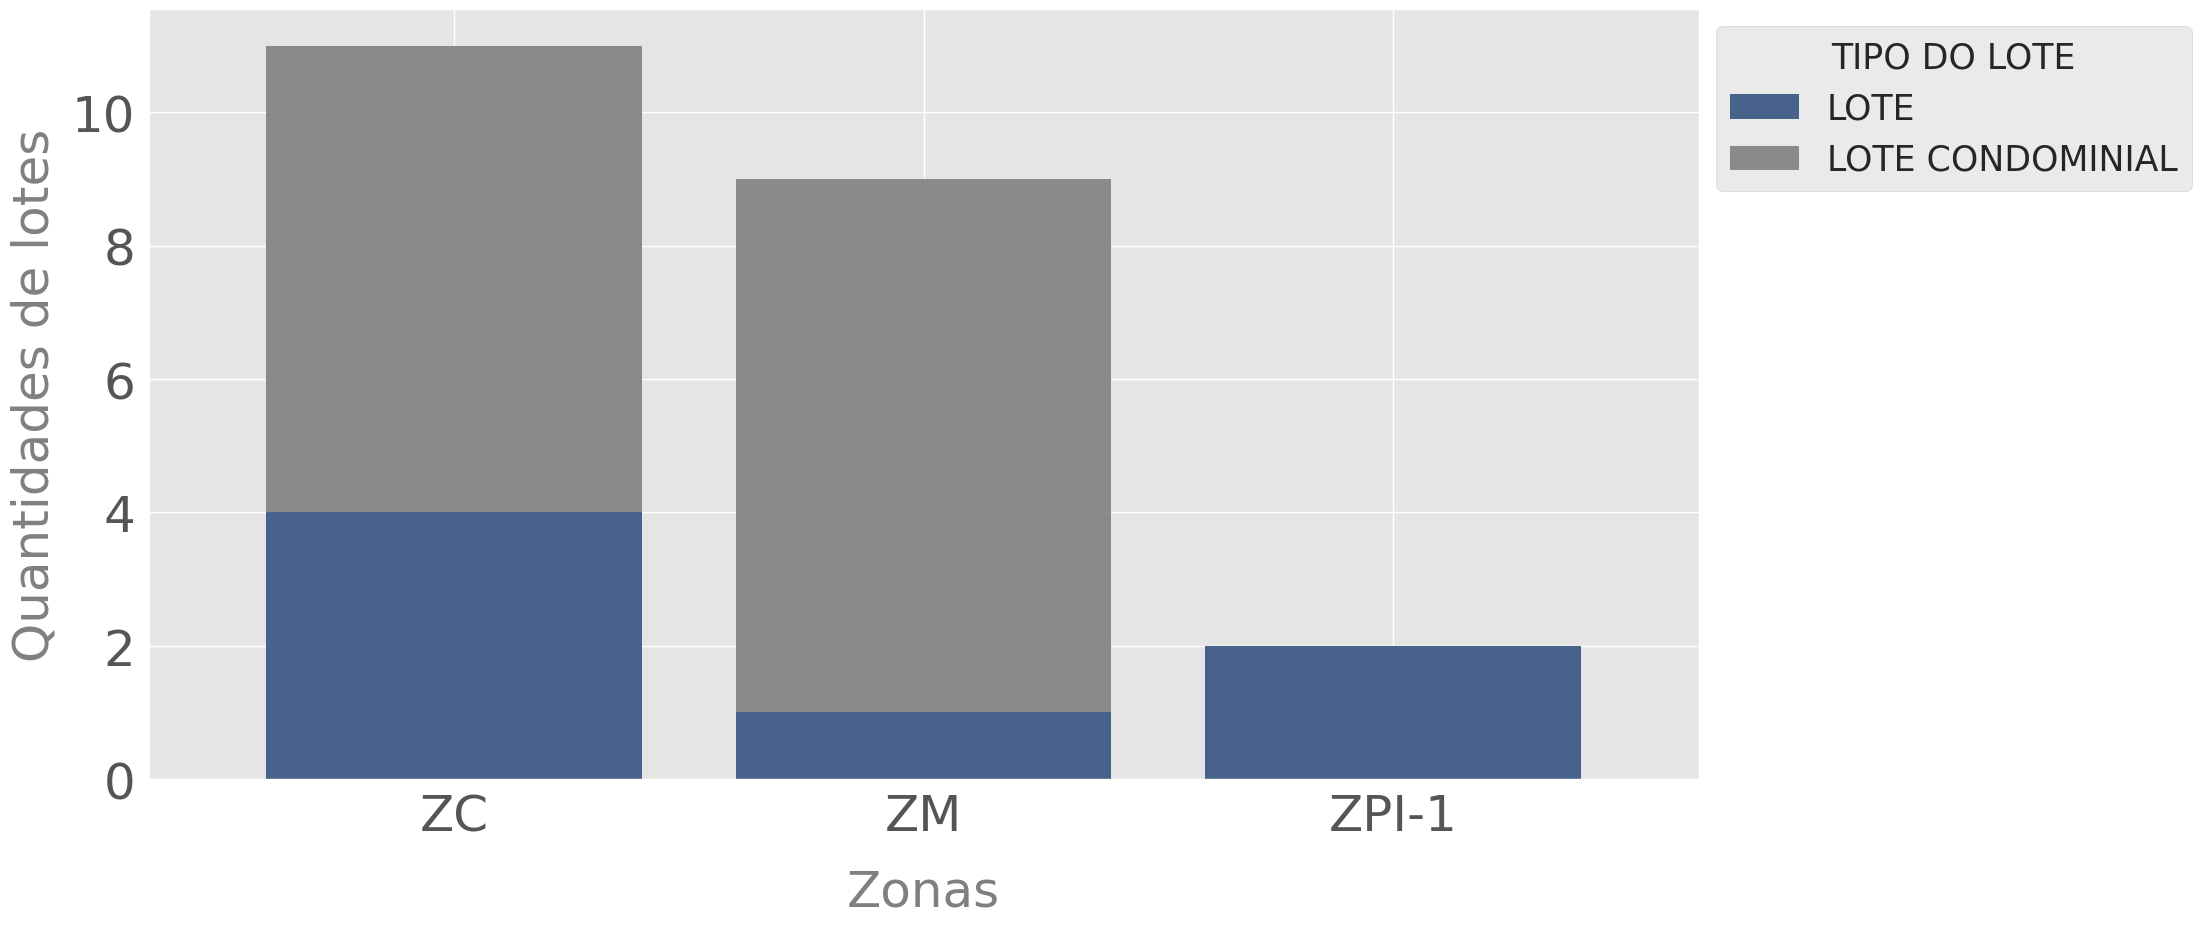

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MG= MG_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, edgecolor='None',color = ['#365481', 'grey'])
MG = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MG = plt.xticks(rotation= 0 )
MG = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MG = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
MG = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##SUL-SUDESTE 

##LOTES DA SUBPREFEITURA DA VILA MARIANA - VM

In [ ]:
dados.query("SGL_SUBP_EDIC == 'VM'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura

ZEU      15
ZM        3
ZC        1
ZER 1     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VM_Zonas = dados.query("SGL_SUBP_EDIC == 'VM'")

In [ ]:
VM_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
642         1              ZC
685         0           ZER 1
726         0             ZEU
528         0             ZEU
739         1             ZEU
735         1             ZEU
635         1             ZEU
585         0             ZEU
732         1             ZEU
633         1             ZEU
463         0             ZEU
647         1             ZEU
656         1             ZEU
514         0             ZEU
561         0             ZEU
516         0             ZEU
454         0             ZEU
639         1              ZM
634         1              ZM
631         0              ZM

In [ ]:
VM_Zonas["COD_COND"] = VM_Zonas["COD_COND"].astype(int)

In [ ]:
VM_Zonas["COD_COND"] = VM_Zonas["COD_COND"].astype(str)

In [ ]:
VM_Zonas["COD_COND"]

642    1
685    0
726    0
528    0
739    1
735    1
635    1
585    0
732    1
633    1
463    0
647    1
656    1
514    0
561    0
516    0
454    0
639    1
634    1
631    0
Name: COD_COND, dtype: object

In [ ]:
VM_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

4     1
11    1
8     1
7     1
10    1
6     1
2     1
1     1
3     1
5     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
VM_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEU      15
ZM        3
ZC        1
ZER 1     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VM_Cond_Zonas = VM_Zonas.query("COD_COND != '0'")
VM_Cond_Zonas

GEOCODE                 ID  \
642  ALAMEDA DOS JAUNAS, 95,SAO PAULO, SAO PAULO - ...  41265100170040000   
739   ALAMEDA SANTOS, 44,SAO PAULO, SAO PAULO - BRASIL  36010177911110000   
735  AVENIDA JABAQUARA, 1808,SAO PAULO, SAO PAULO -...  47079097152080000   
635  RUA FRANCA PINTO, 318,SAO PAULO, SAO PAULO - B...  37040073180070000   
732  RUA CARNEIRO DA CUNHA, 1002,SAO PAULO, SAO PAU...  47104044733100000   
633  AVENIDA JABAQUARA, 2781,SAO PAULO, SAO PAULO -...  47188097152060000   
647  AVENIDA DAS CARINAS, 156,SAO PAULO, SAO PAULO ...  41240042692020000   
656  AVENIDA DOS IMARES, 160,SAO PAULO, SAO PAULO -...  41223090620010000   
639  RUA PDE MACHADO, 773,SAO PAULO, SAO PAULO - BR...  42116337501030000   
634   RUA CAP MACEDO, 30,SAO PAULO, SAO PAULO - BRASIL  37052124303050000   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
642           41          265       100170             4             0   
739           36           10       177911            11             0   
735           47           79        97152             8             0   
635           37           40        73180             7             0   
732           47          104        44733            10             0   
633           47          188        97152             6             0   
647           41          240        42692             2             0   
656           41          223        90620             1             0   
639           42          116       337501             3             0   
634           37           52       124303             5             0   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
642            VM           MOE             3  ...             NaN   
739            VM           VMN             1  ...             NaN   
735            VM           SAU             1  ...             NaN   
635            VM           VMN             1  ...             NaN   
732            VM           SAU             1  ...             NaN   
633            VM           SAU             1  ...             NaN   
647            VM           MOE             3  ...             NaN   
656            VM           MOE             2  ...             NaN   
639            VM           SAU             1  ...             NaN   
634            VM           VMN             2  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
642     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
739     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
735     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
635     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
732     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
633     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
647     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
656     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
639     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
634     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
642  PRIMEIRO QUADRIMESTRE     2022         1  -23,5985252  -46,6623678  
739  PRIMEIRO QUADRIMESTRE     2022         1  -23,5718652  -46,6455523  
735  PRIMEIRO QUADRIMESTRE     2022         1  -23,6201352  -46,6397912  
635  PRIMEIRO QUADRIMESTRE     2022         1  -23,5864645  -46,6397693  
732  PRIMEIRO QUADRIMESTRE     2022         1  -23,6215066  -46,6346473  
633  PRIMEIRO QUADRIMESTRE     2022         1  -23,6279207  -46,6431405  
647  PRIMEIRO QUADRIMESTRE     2022         1  -23,6122938  -46,6682838  
656  PRIMEIRO QUADRIMESTRE     2022         1  -23,6114238  -46,6675276  
639  PRIMEIRO QUADRIMESTRE     2022         1  -23,6013754   -46,628887  
634  PRIMEIRO QUADRIMESTRE     2022         1   -23,593152   -46,639939  

[10 rows x 71 columns]

In [ ]:
len(VM_Cond_Zonas) 

10

In [ ]:
VM_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEU      8
ZER 1    1
ZM       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VM_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZEU    7
ZM     2
ZC     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VM_Sem_Cond_Zonas = VM_Zonas.query("COD_COND == '0'")
VM_Sem_Cond_Zonas.head(2)

GEOCODE                 ID  \
685  RUA COMTE ISMAEL GUILHERME, 684,SAO PAULO, SAO...  41021094064000049   
726  RUA CARLOS GEROLOMO MONACO, 171,SAO PAULO, SAO...  42172210790000003   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
685           41           21        94064             0            49   
726           42          172       210790             0             3   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
685            VM           MOE             1  ...             NaN   
726            VM           VMN             2  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
685     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
726     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
685  PRIMEIRO QUADRIMESTRE     2022         0  -23,5952702  -46,6622169  
726  PRIMEIRO QUADRIMESTRE     2022         0  -23,5973805  -46,6232109  

[2 rows x 71 columns]

In [ ]:
len(VM_Sem_Cond_Zonas)

10

In [ ]:
len(VM_Zonas)

20

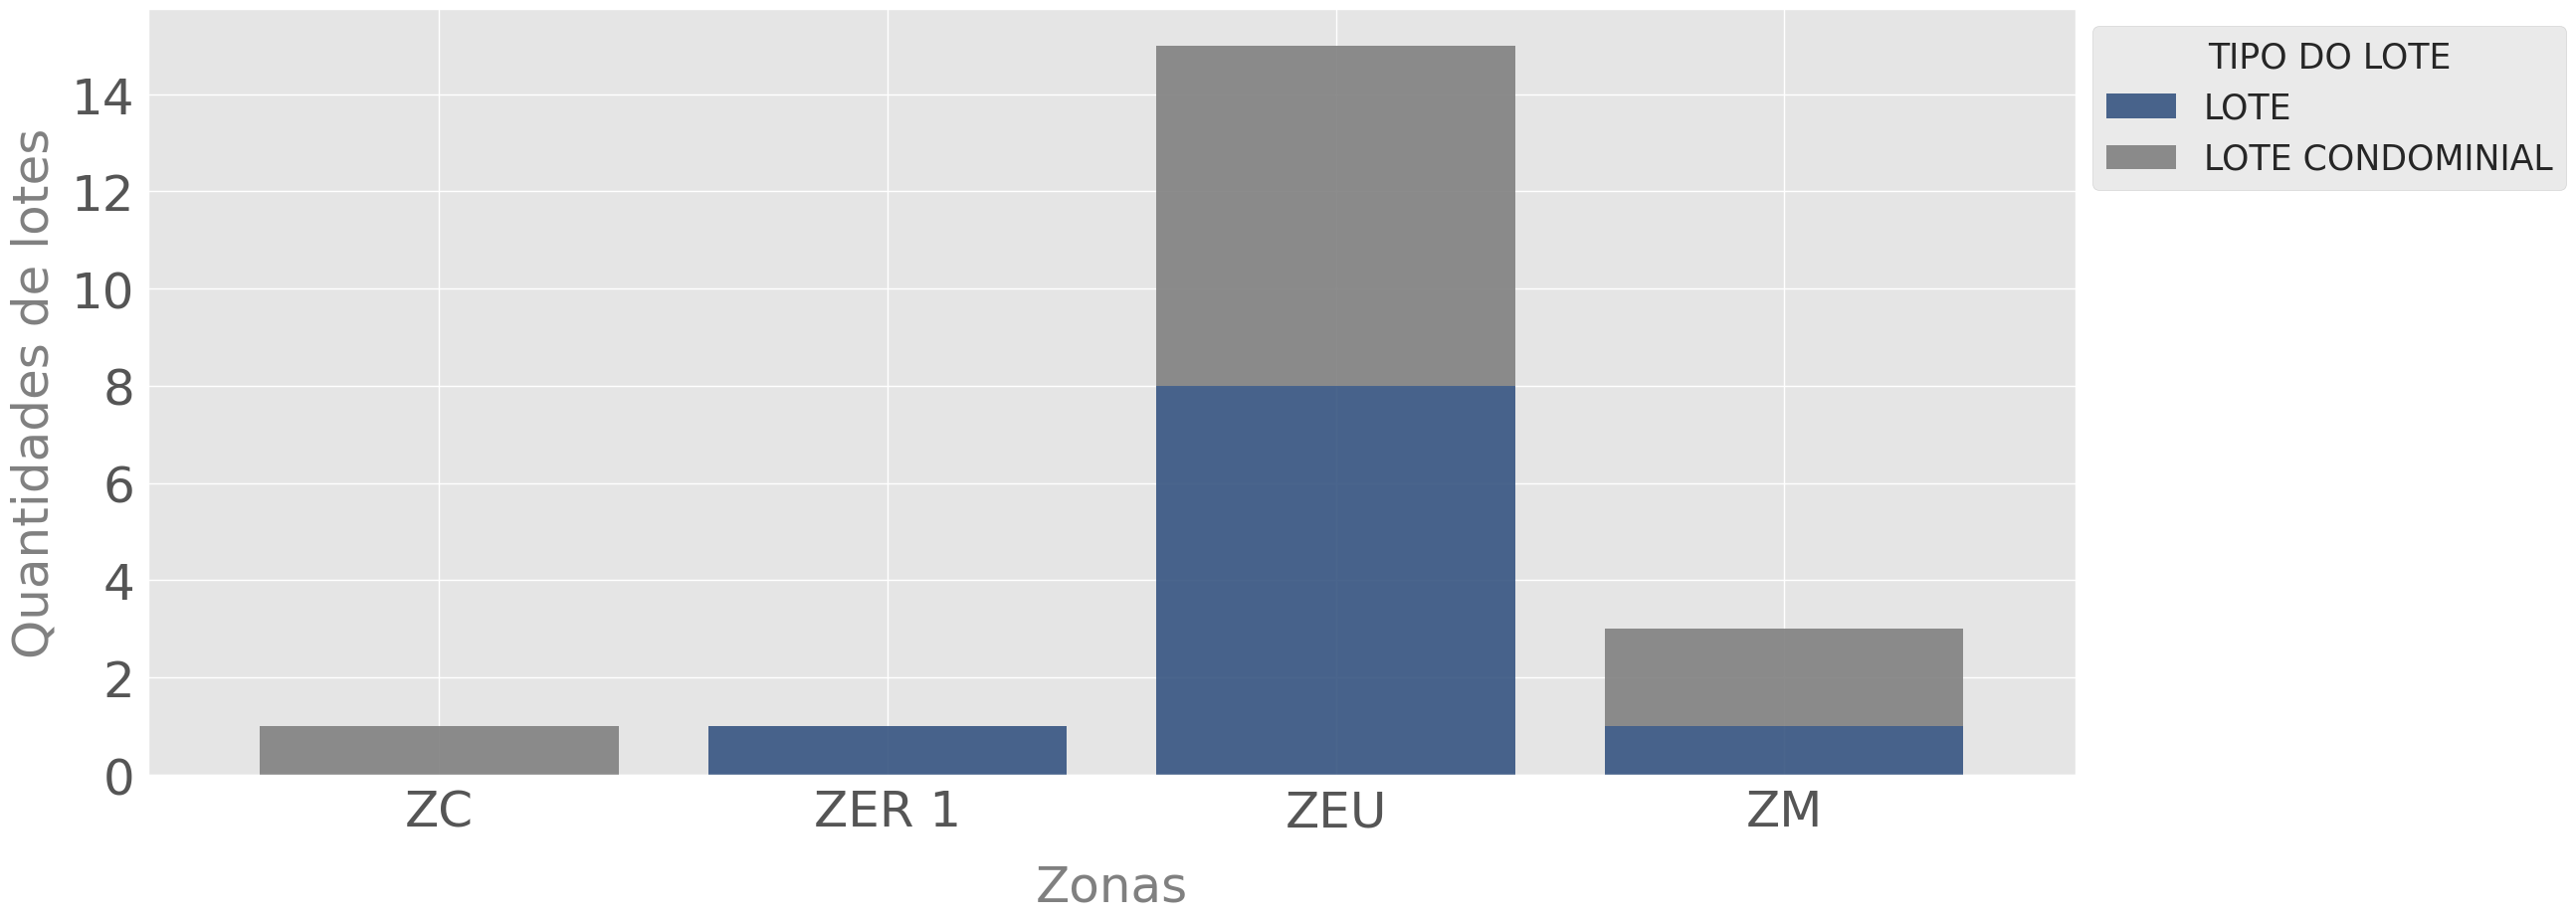

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
VM= VM_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
VM = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
VM = plt.xticks(rotation= 0 )
VM = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
VM = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
VM = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO IPIRANGA - IP 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'IP'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        23
ZC         5
ZEIS-3     2
ZEM        2
ZEU        2
ZPI-1      2
ZEIS-2     1
ZEUP       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IP_Zonas = dados.query("SGL_SUBP_EDIC == 'IP'")

In [ ]:
IP_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
721         0              ZC
487         0              ZC
722         0              ZC
717         0              ZC
468         0              ZC
738         1          ZEIS-2
584         0          ZEIS-3
725         0          ZEIS-3
677         0             ZEM
650         1             ZEM
661         1             ZEU
728         0             ZEU
599         0            ZEUP
520         0              ZM
734         1              ZM
518         0              ZM
446         0              ZM
617         0              ZM
499         0              ZM
619         0              ZM
532         0              ZM
495         0              ZM
629         0              ZM
594         0              ZM
445         0              ZM
649         1              ZM
588         0              ZM
736         1              ZM
590         0              ZM
583         0              ZM
582         0              ZM
769         0              ZM
706         0              ZM
652         1              ZM
473         0              ZM
705         0              ZM
613         0           ZPI-1
525         0           ZPI-1

In [ ]:
IP_Zonas["COD_COND"] = IP_Zonas["COD_COND"].astype(int)

In [ ]:
IP_Zonas["COD_COND"] = IP_Zonas["COD_COND"].astype(str)

In [ ]:
IP_Zonas["COD_COND"]

721    0
487    0
722    0
717    0
468    0
738    1
584    0
725    0
677    0
650    1
661    1
728    0
599    0
520    0
734    1
518    0
446    0
617    0
499    0
619    0
532    0
495    0
629    0
594    0
445    0
649    1
588    0
736    1
590    0
583    0
582    0
769    0
706    0
652    1
473    0
705    0
613    0
525    0
Name: COD_COND, dtype: object

In [ ]:
IP_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

2     3
11    1
1     1
8     1
7     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
IP_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()


ZM        23
ZC         5
ZEIS-3     2
ZEM        2
ZEU        2
ZPI-1      2
ZEIS-2     1
ZEUP       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IP_Cond_Zonas = IP_Zonas.query("COD_COND != '0'")
IP_Cond_Zonas

GEOCODE                  ID  \
738  RUA PROF ARNALDO JOAO SEMERARO, 435,SAO PAULO,...  157130059870110000   
650  AVENIDA NAZARE, 1765,SAO PAULO, SAO PAULO - BR...   43071144495020000   
661  RUA CINCO DE JULHO, 358,SAO PAULO, SAO PAULO -...   43132049441010000   
734  RUA DOM BERNARDO NOGUEIRA, 569,SAO PAULO, SAO ...   46058033120080000   
649    RUA BELGRADO, 155,SAO PAULO, SAO PAULO - BRASIL   50161030848020000   
736  RUA DOM BERNARDO NOGUEIRA, 563,SAO PAULO, SAO ...   46058033120070000   
652    RUA UBAITABA, 188,SAO PAULO, SAO PAULO - BRASIL   49140192813020000   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
738          157          130        59870            11             0   
650           43           71       144495             2             0   
661           43          132        49441             1             0   
734           46           58        33120             8             0   
649           50          161        30848             2             0   
736           46           58        33120             7             0   
652           49          140       192813             2             0   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
738            IP           SAC             3  ...             NaN   
650            IP           IPI             3  ...             NaN   
661            IP           IPI             1  ...             NaN   
734            IP           CUR             1  ...             NaN   
649            IP           SAC             1  ...             NaN   
736            IP           CUR             1  ...             NaN   
652            IP           SAC             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
738     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
650     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
661     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
734     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
649     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
736     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
652     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
738  PRIMEIRO QUADRIMESTRE     2022         1  -23,6480823  -46,5984891  
650  PRIMEIRO QUADRIMESTRE     2022         1   -23,599799  -46,6093696  
661  PRIMEIRO QUADRIMESTRE     2022         1  -23,6054378   -46,607747  
734  PRIMEIRO QUADRIMESTRE     2022         1  -23,6077635  -46,6230452  
649  PRIMEIRO QUADRIMESTRE     2022         1  -23,6127131  -46,6021876  
736  PRIMEIRO QUADRIMESTRE     2022         1  -23,6077152  -46,6231206  
652  PRIMEIRO QUADRIMESTRE     2022         1  -23,6298601  -46,6068725  

[7 rows x 71 columns]

In [ ]:
len(IP_Cond_Zonas) 

7

In [ ]:
IP_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        19
ZC         5
ZEIS-3     2
ZPI-1      2
ZEM        1
ZEU        1
ZEUP       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IP_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM        4
ZEIS-2    1
ZEM       1
ZEU       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IP_Sem_Cond_Zonas = IP_Zonas.query("COD_COND == '0'")
IP_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
721  AVENIDA DOS OURIVES, 880,SAO PAULO, SAO PAULO ...  157229152390003669   
487  RUA DESEM ALVES DE CASTRO, 216,SAO PAULO, SAO ...   48225007331000177   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
721          157          229       152390             0          3669   
487           48          225         7331             0           177   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ...  \
721            IP           SAC             1  ...   
487            IP           CUR             1  ...   

                     TXT_OBS_02_EDIC NOME_CID_EDIC NOME_EST_EDIC  \
721  LOTE SEM GEOMETRIA NO GEOSAMPA.     SAO PAULO     SAO PAULO   
487                              NaN     SAO PAULO     SAO PAULO   

     NOME_PAIS_EDIC  REG_LIM_ADM           QUADRIMESTRE  COD_ANO  COD_COND  \
721          BRASIL  SUL-SUDESTE  PRIMEIRO QUADRIMESTRE     2022         0   
487          BRASIL  SUL-SUDESTE  PRIMEIRO QUADRIMESTRE     2022         0   

          Lat_Y_      Long_X_  
721  -23,6549704  -46,6053122  
487   -23,633451  -46,6185995  

[2 rows x 71 columns]

In [ ]:
len(IP_Sem_Cond_Zonas)

31

In [ ]:
len(IP_Zonas) #quatidade total de zonas em Ipiranga

38

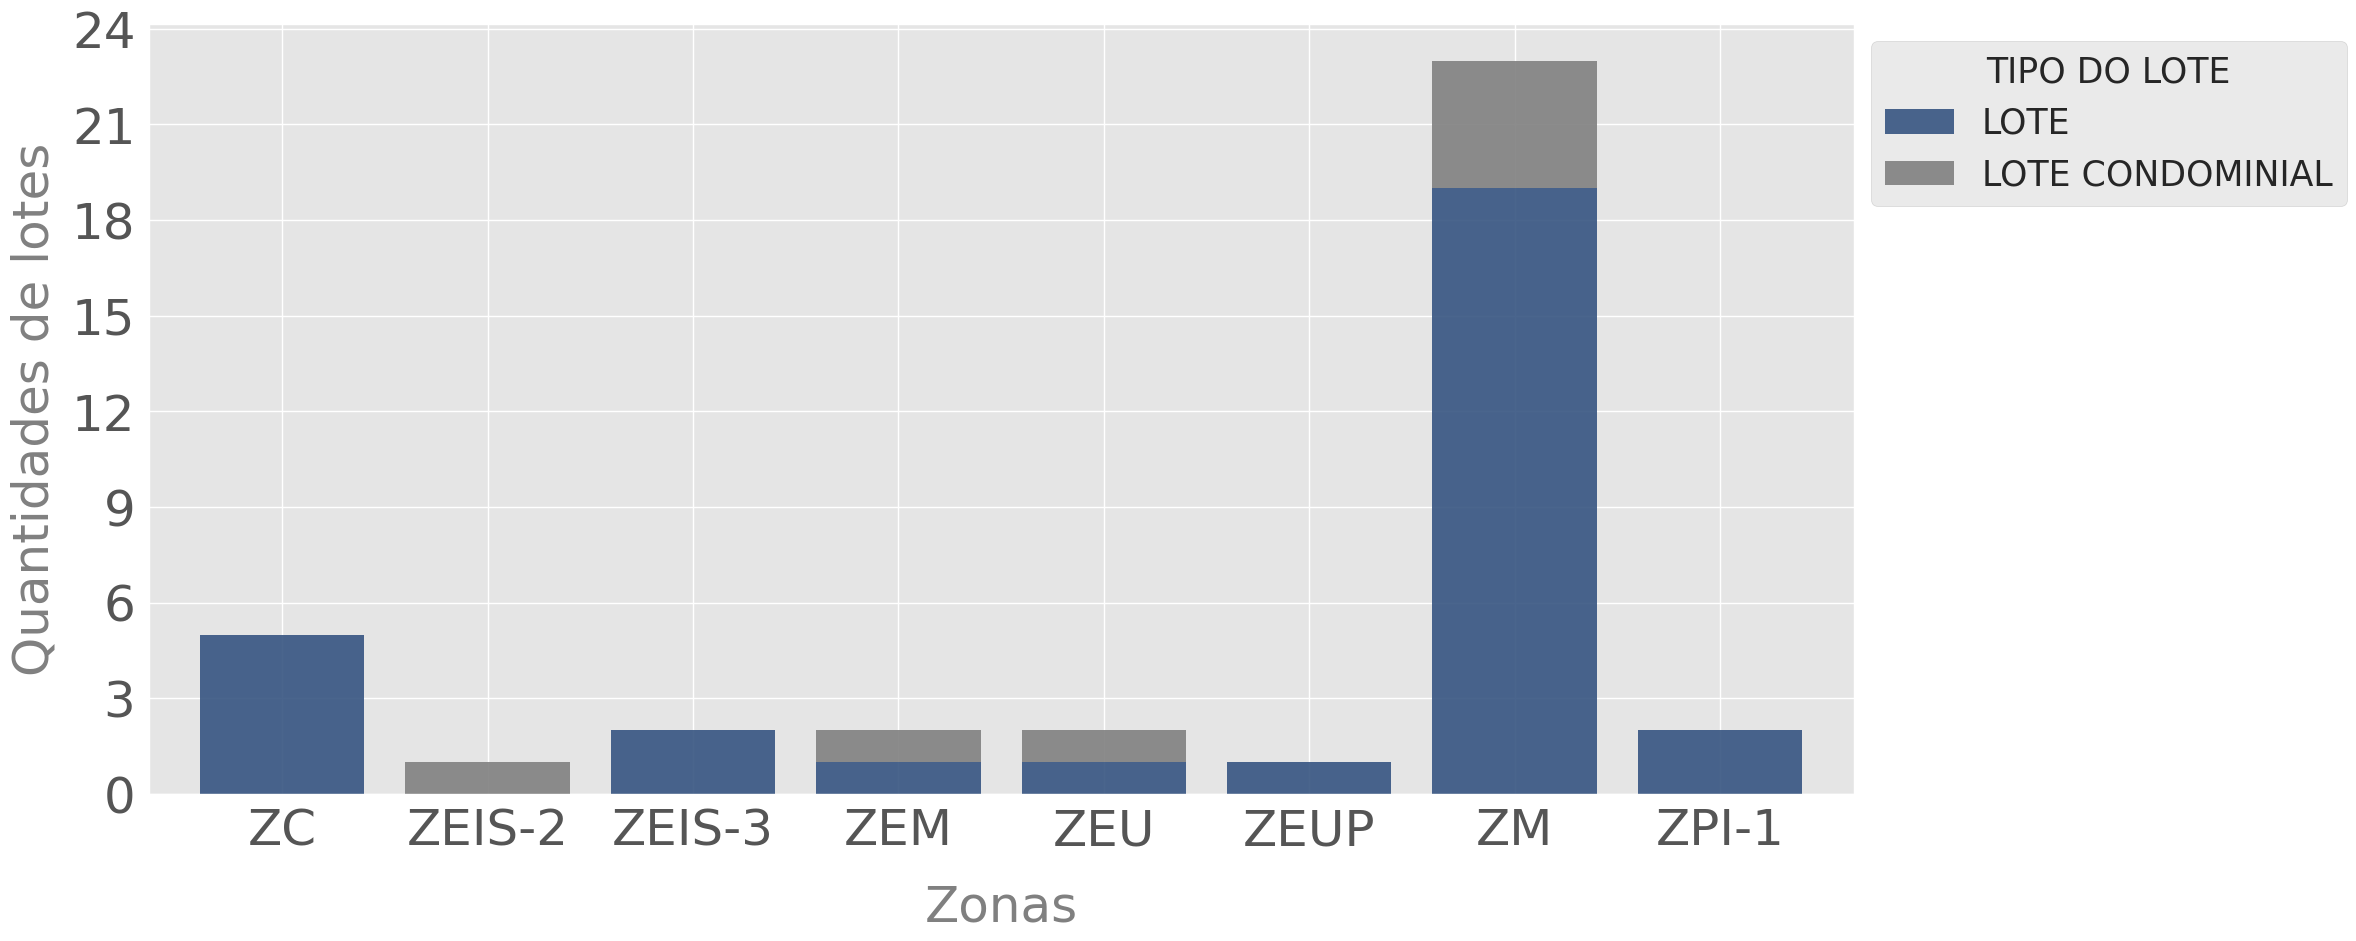

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
IP= IP_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(22, 10),width = 0.8, alpha = 0.9,color = ['#365481', 'grey'], edgecolor='None')
IP = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
IP = plt.xticks(rotation= 0 )
IP = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
IP = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
IP = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE SANTO AMARO - SA 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'SA'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        13
ZEU        6
ZCOR-2     5
ZC         4
ZDE-2      2
ZER 1      2
ZEUP       2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SA_Zonas = dados.query("SGL_SUBP_EDIC == 'SA'")

In [ ]:
SA_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
645         1              ZC
692         0              ZC
697         0              ZC
702         0              ZC
443         0          ZCOR-2
538         0          ZCOR-2
723         0          ZCOR-2
601         0          ZCOR-2
699         0          ZCOR-2
527         0           ZDE-2
659         1           ZDE-2
636         1           ZER 1
451         0           ZER 1
627         0             ZEU
620         0             ZEU
731         0             ZEU
497         0             ZEU
591         0             ZEU
646         1             ZEU
737         1            ZEUP
637         1            ZEUP
589         0              ZM
452         0              ZM
662         1              ZM
491         0              ZM
515         0              ZM
502         0              ZM
703         0              ZM
727         0              ZM
654         1              ZM
523         0              ZM
509         0              ZM
506         0              ZM
768         0              ZM

In [ ]:
SA_Zonas["COD_COND"] = SA_Zonas["COD_COND"].astype(int)

In [ ]:
SA_Zonas["COD_COND"] = SA_Zonas["COD_COND"].astype(str)

In [ ]:
SA_Zonas["COD_COND"]

645    1
692    0
697    0
702    0
443    0
538    0
723    0
601    0
699    0
527    0
659    1
636    1
451    0
627    0
620    0
731    0
497    0
591    0
646    1
737    1
637    1
589    0
452    0
662    1
491    0
515    0
502    0
703    0
727    0
654    1
523    0
509    0
506    0
768    0
Name: COD_COND, dtype: object

In [ ]:
SA_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

2     2
1     2
6     1
3     1
12    1
4     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
SA_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        13
ZEU        6
ZCOR-2     5
ZC         4
ZDE-2      2
ZER 1      2
ZEUP       2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SA_Cond_Zonas = SA_Zonas.query("COD_COND != '0'")
SA_Cond_Zonas

GEOCODE                  ID  \
645  RUA BORBA PEREIRA, 180,SAO PAULO, SAO PAULO - ...  121102034908020000   
659  RUA GALENO DE CASTRO, 730,SAO PAULO, SAO PAULO...   88139077178010000   
636      RUA CANUMA, 225,SAO PAULO, SAO PAULO - BRASIL   88265004251060000   
646  RUA DR ANTONIO BENTO, 607,SAO PAULO, SAO PAULO...   87076015865030000   
737  RUA VIEIRA DE MORAIS, 1936,SAO PAULO, SAO PAUL...   86390196924120000   
637  AVENIDA INTERLAGOS, 1834,SAO PAULO, SAO PAULO ...   90431092207040000   
662  RUA PRSA ISABEL, 1575,SAO PAULO, SAO PAULO - B...   86043096911010000   
654  AVENIDA DAS NACOES UNIDAS, 14401,SAO PAULO, SA...   85591062383020000   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
645          121          102        34908             2             0   
659           88          139        77178             1             0   
636           88          265         4251             6             0   
646           87           76        15865             3             0   
737           86          390       196924            12             0   
637           90          431        92207             4             0   
662           86           43        96911             1             0   
654           85          591        62383             2             0   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
645            SA           CGR             1  ...             NaN   
659            SA           CGR             2  ...             NaN   
636            SA           SAM             3  ...             NaN   
646            SA           SAM             2  ...             NaN   
737            SA           CBE             3  ...             NaN   
637            SA           CGR             1  ...             NaN   
662            SA           CBE             2  ...             NaN   
654            SA           SAM             2  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
645     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
659     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
636     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
646     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
737     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
637     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
662     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
654     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
645  PRIMEIRO QUADRIMESTRE     2022         1  -23,6877419  -46,6786908  
659  PRIMEIRO QUADRIMESTRE     2022         1  -23,6682259  -46,7044957  
636  PRIMEIRO QUADRIMESTRE     2022         1  -23,6389953  -46,6882005  
646  PRIMEIRO QUADRIMESTRE     2022         1  -23,6454604  -46,7023811  
737  PRIMEIRO QUADRIMESTRE     2022         1  -23,6269647   -46,664802  
637  PRIMEIRO QUADRIMESTRE     2022         1  -23,6700218  -46,6781947  
662  PRIMEIRO QUADRIMESTRE     2022         1  -23,5427656   -46,648375  
654  PRIMEIRO QUADRIMESTRE     2022         1  -23,6248103  -46,7042174  

[8 rows x 71 columns]

In [ ]:
len(SA_Cond_Zonas) 

8

In [ ]:
SA_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()


ZM        11
ZCOR-2     5
ZEU        5
ZC         3
ZDE-2      1
ZER 1      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SA_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZEUP     2
ZM       2
ZC       1
ZDE-2    1
ZER 1    1
ZEU      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SA_Sem_Cond_Zonas = SA_Zonas.query("COD_COND == '0'")
SA_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
692  RUA JANE AUSTEN, 41,SAO PAULO, SAO PAULO - BRASIL  121231015334000129   
697  RUA DR ENIO MONTE ALEGRE, 99,SAO PAULO, SAO PA...  162005607894000894   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
692          121          231        15334             0           129   
697          162            5       607894             0           894   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
692            SA           CGR             1  ...             NaN   
697            SA           CGR             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
692     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
697     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
692  PRIMEIRO QUADRIMESTRE     2022         0  -23,6875382  -46,6799138  
697  PRIMEIRO QUADRIMESTRE     2022         0  -23,6906779  -46,6792865  

[2 rows x 71 columns]

In [ ]:
len(SA_Sem_Cond_Zonas)

26

In [ ]:
len(SA_Zonas)

34

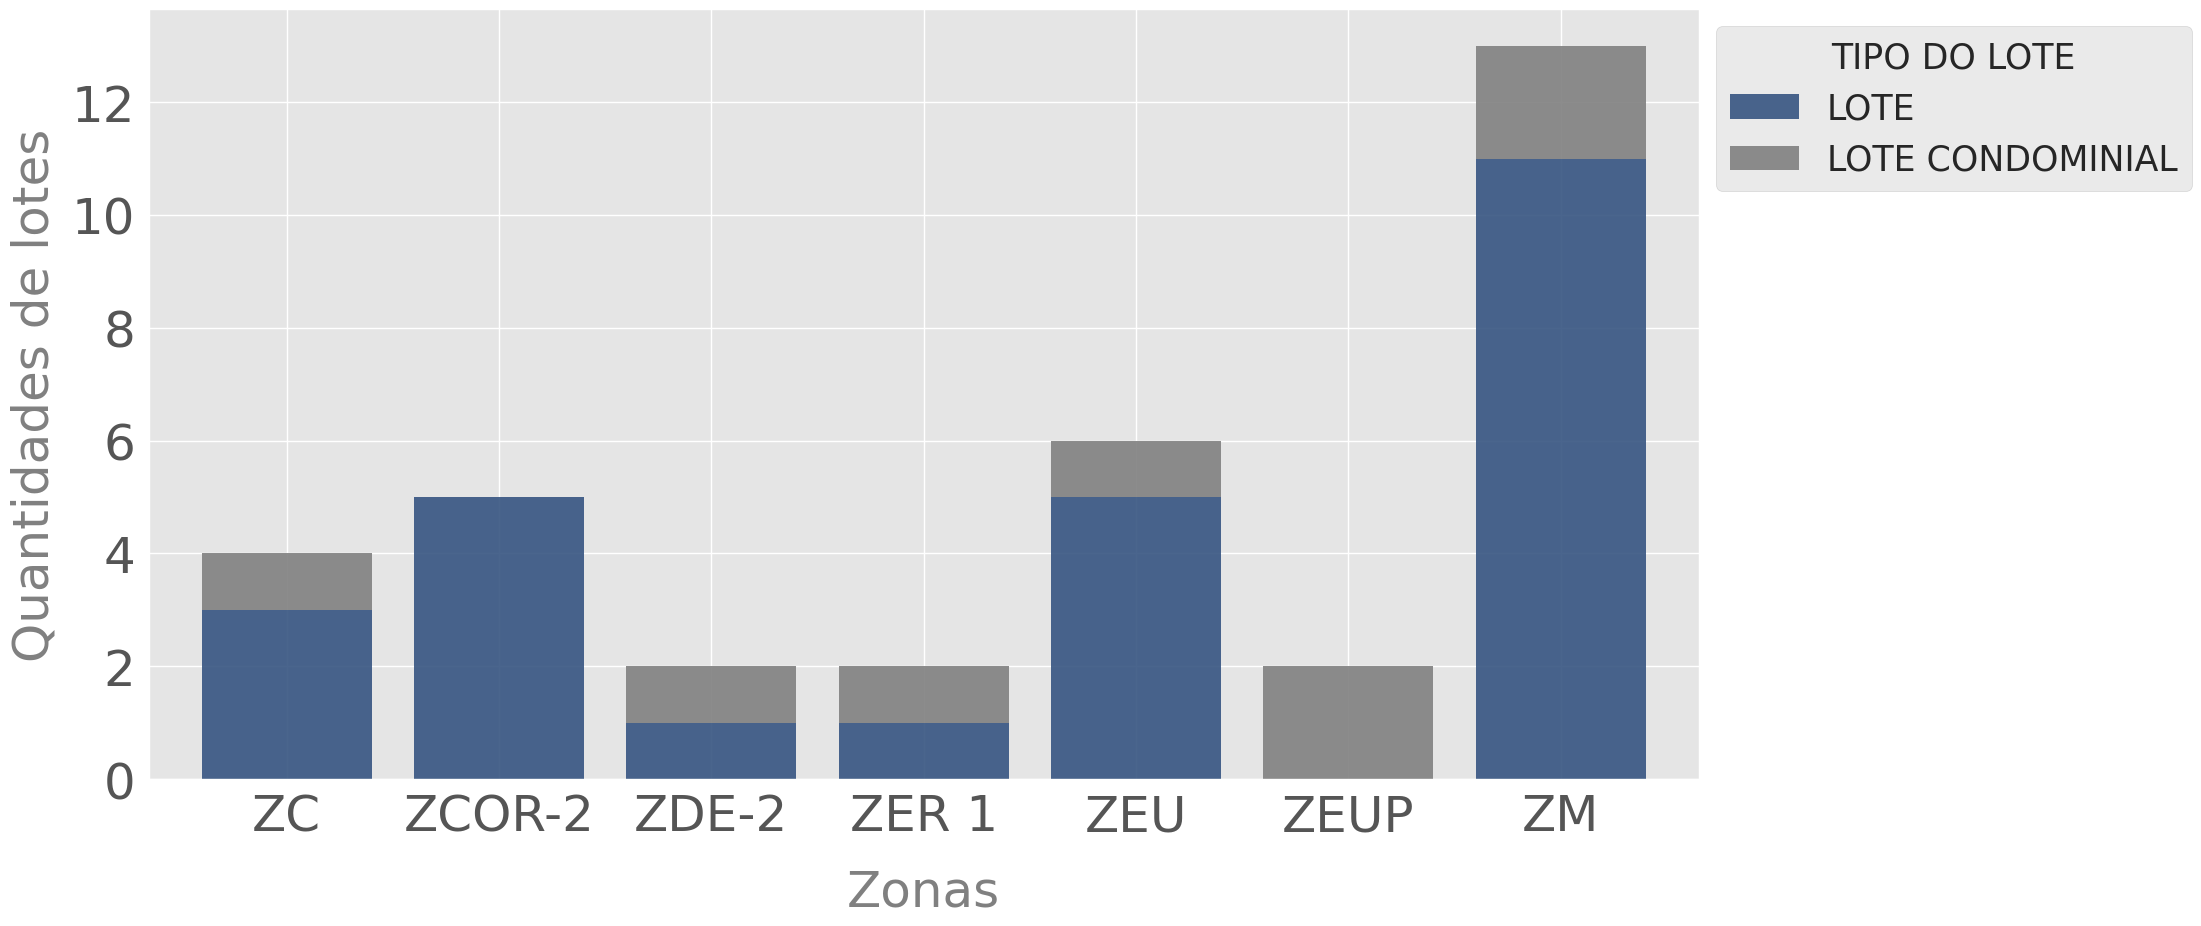

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SA= SA_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SA = plt.xticks(rotation= 0 )
SA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SA = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
SA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO JABAQUARA - JA 

---



In [ ]:
dados.query("SGL_SUBP_EDIC == 'JA'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEU    5
ZM     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
JA_Zonas = dados.query("SGL_SUBP_EDIC == 'JA'")

In [ ]:
JA_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
658         1             ZEU
614         0             ZEU
638         1             ZEU
696         0             ZEU
592         0             ZEU
644         1              ZM

In [ ]:
JA_Zonas["COD_COND"] = JA_Zonas["COD_COND"].astype(int)

In [ ]:
JA_Zonas["COD_COND"] = JA_Zonas["COD_COND"].astype(str)

In [ ]:
JA_Zonas["COD_COND"]

658    1
614    0
638    1
696    0
592    0
644    1
Name: COD_COND, dtype: object

In [ ]:
JA_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

1    1
3    1
2    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
JA_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEU    5
ZM     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
JA_Cond_Zonas = JA_Zonas.query("COD_COND != '0'")
JA_Cond_Zonas

GEOCODE                 ID  \
658  RUA COSTA GOMES, 34,SAO PAULO, SAO PAULO - BRASIL  89226097330010000   
638  RUA PINHEIRINHO, 143,SAO PAULO, SAO PAULO - BR...  91003162540030000   
644  RUA HILDEBRANDO SIQUEIRA, 207,SAO PAULO, SAO P...  91101108154020000   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
658           89          226        97330             1             0   
638           91            3       162540             3             0   
644           91          101       108154             2             0   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
658            JA           JAB             1  ...             NaN   
638            JA           JAB             3  ...             NaN   
644            JA           JAB             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
658     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
638     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
644     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
658  PRIMEIRO QUADRIMESTRE     2022         1  -23,6567011   -46,663487  
638  PRIMEIRO QUADRIMESTRE     2022         1  -23,6412811   -46,642721  
644  PRIMEIRO QUADRIMESTRE     2022         1  -23,6591459  -46,6421269  

[3 rows x 71 columns]

In [ ]:
len(JA_Cond_Zonas) 


3

In [ ]:
JA_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEU    3
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
JA_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZEU    2
ZM     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
JA_Sem_Cond_Zonas = JA_Zonas.query("COD_COND == '0'")
JA_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
614  AVENIDA LEONARDO DA VINCI, 38,SAO PAULO, SAO P...  310028117340001389   
696      RUA TACIBA, 311,SAO PAULO, SAO PAULO - BRASIL   89270185728000069   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
614          310           28       117340             0          1389   
696           89          270       185728             0            69   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
614            JA           JAB             1  ...             NaN   
696            JA           JAB             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
614     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
696     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
614  PRIMEIRO QUADRIMESTRE     2022         0  -23,6338695  -46,6370094  
696  PRIMEIRO QUADRIMESTRE     2022         0   -23,642924    -46,65518  

[2 rows x 71 columns]

In [ ]:
len(JA_Sem_Cond_Zonas)

3

In [ ]:
len(JA_Zonas)

6

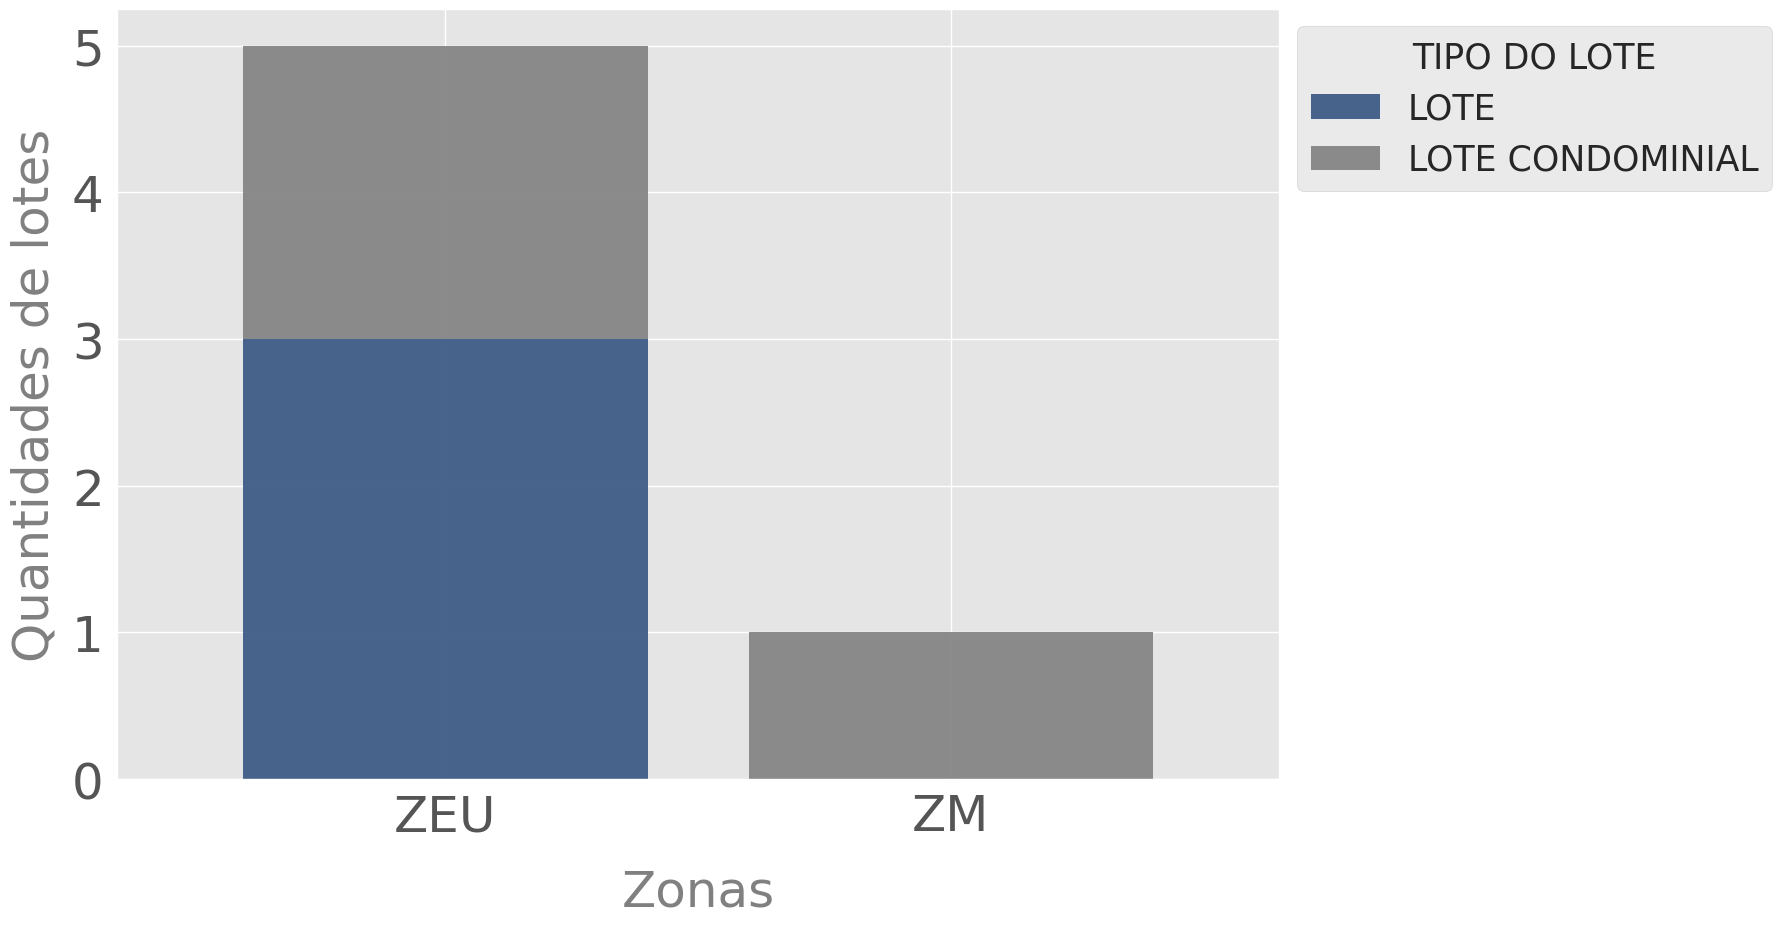

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
JA= JA_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10), width = 0.8, alpha = 0.9,color = ['#365481', 'grey'],edgecolor='None')
JA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
JA = plt.xticks(rotation= 0 )
JA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
JA = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
JA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA CIDADE ADEMAR - AD 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'AD'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1        27
ZM            12
ZMA            6
ZEU            5
ZPDS           3
INDEFINIDO     2
ZEUP           1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AD_Zonas = dados.query("SGL_SUBP_EDIC == 'AD'")

In [ ]:
AD_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
512         0      INDEFINIDO
526         0      INDEFINIDO
547         0          ZEIS-1
548         0          ZEIS-1
651         1          ZEIS-1
546         0          ZEIS-1
500         0          ZEIS-1
628         0          ZEIS-1
480         0          ZEIS-1
556         0          ZEIS-1
690         0          ZEIS-1
456         0          ZEIS-1
576         0          ZEIS-1
712         0          ZEIS-1
575         0          ZEIS-1
683         0          ZEIS-1
573         0          ZEIS-1
464         0          ZEIS-1
689         0          ZEIS-1
572         0          ZEIS-1
467         0          ZEIS-1
570         0          ZEIS-1
470         0          ZEIS-1
564         0          ZEIS-1
563         0          ZEIS-1
560         0          ZEIS-1
557         0          ZEIS-1
574         0          ZEIS-1
607         0          ZEIS-1
718         0             ZEU
695         0             ZEU
653         1             ZEU
612         0             ZEU
465         0             ZEU
621         0            ZEUP
566         0              ZM
579         0              ZM
660         1              ZM
666         1              ZM
519         0              ZM
521         0              ZM
498         0              ZM
531         0              ZM
694         0              ZM
643         1              ZM
578         0              ZM
720         0              ZM
476         0             ZMA
477         0             ZMA
602         0             ZMA
472         0             ZMA
711         0             ZMA
730         0             ZMA
522         0            ZPDS
460         0            ZPDS
493         0            ZPDS

In [ ]:
AD_Zonas["COD_COND"] = AD_Zonas["COD_COND"].astype(int)

In [ ]:
AD_Zonas["COD_COND"] = AD_Zonas["COD_COND"].astype(str)

In [ ]:
AD_Zonas["COD_COND"]

512    0
526    0
547    0
548    0
651    1
546    0
500    0
628    0
480    0
556    0
690    0
456    0
576    0
712    0
575    0
683    0
573    0
464    0
689    0
572    0
467    0
570    0
470    0
564    0
563    0
560    0
557    0
574    0
607    0
718    0
695    0
653    1
612    0
465    0
621    0
566    0
579    0
660    1
666    1
519    0
521    0
498    0
531    0
694    0
643    1
578    0
720    0
476    0
477    0
602    0
472    0
711    0
730    0
522    0
460    0
493    0
Name: COD_COND, dtype: object

In [ ]:
AD_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

1    3
2    2
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
AD_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1        27
ZM            12
ZMA            6
ZEU            5
ZPDS           3
INDEFINIDO     2
ZEUP           1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AD_Cond_Zonas = AD_Zonas.query("COD_COND != '0'")
AD_Cond_Zonas

GEOCODE                  ID  \
651  RUA PAST RUBENS LOPES, 226,SAO PAULO, SAO PAUL...  172112170461010000   
653  RUA OSSIAN TERCEIRO TELES, 431,SAO PAULO, SAO ...   90059124044020000   
660  RUA COSME FONTE LIRA, 184,SAO PAULO, SAO PAULO...  120057086797010000   
666  RUA ANTONIO RUSSO, 100,SAO PAULO, SAO PAULO - ...  120151138525010000   
643  RUA LUIGI BASSI, 29,SAO PAULO, SAO PAULO - BRASIL  172139051721020000   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
651          172          112       170461             1             0   
653           90           59       124044             2             0   
660          120           57        86797             1             0   
666          120          151       138525             1             0   
643          172          139        51721             2             0   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
651            AD           CAD             3  ...             NaN   
653            AD           CAD             2  ...             NaN   
660            AD           CAD             3  ...             NaN   
666            AD           CAD             1  ...             NaN   
643            AD           CAD             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
651     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
653     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
660     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
666     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
643     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
651  PRIMEIRO QUADRIMESTRE     2022         1  -23,6755551  -46,6524023  
653  PRIMEIRO QUADRIMESTRE     2022         1  -23,6527977  -46,6713605  
660  PRIMEIRO QUADRIMESTRE     2022         1    -23,66246  -46,6667431  
666  PRIMEIRO QUADRIMESTRE     2022         1  -23,6671246  -46,6651589  
643  PRIMEIRO QUADRIMESTRE     2022         1  -23,6727969  -46,6484524  

[5 rows x 71 columns]

In [ ]:
len(AD_Cond_Zonas) 

5

In [ ]:
AD_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1        26
ZM             9
ZMA            6
ZEU            4
ZPDS           3
INDEFINIDO     2
ZEUP           1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AD_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM        3
ZEIS-1    1
ZEU       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AD_Sem_Cond_Zonas = AD_Zonas.query("COD_COND == '0'")
AD_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
512  RUA DOS MARATIS, 155,SAO PAULO, SAO PAULO - BR...  173111623237000155   
526  RUA DOS MARATIS, 151,SAO PAULO, SAO PAULO - BR...  173111623237000154   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
512          173          111       623237             0           155   
526          173          111       623237             0           154   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
512            AD           PDR             1  ...             NaN   
526            AD           PDR             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
512     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
526     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
512  PRIMEIRO QUADRIMESTRE     2022         0  -23,6991588  -46,6315942  
526  PRIMEIRO QUADRIMESTRE     2022         0  -23,6991276  -46,6315724  

[2 rows x 71 columns]

In [ ]:
len(AD_Sem_Cond_Zonas)

51

In [ ]:
len(AD_Zonas) #quatidade total de zonas 

56

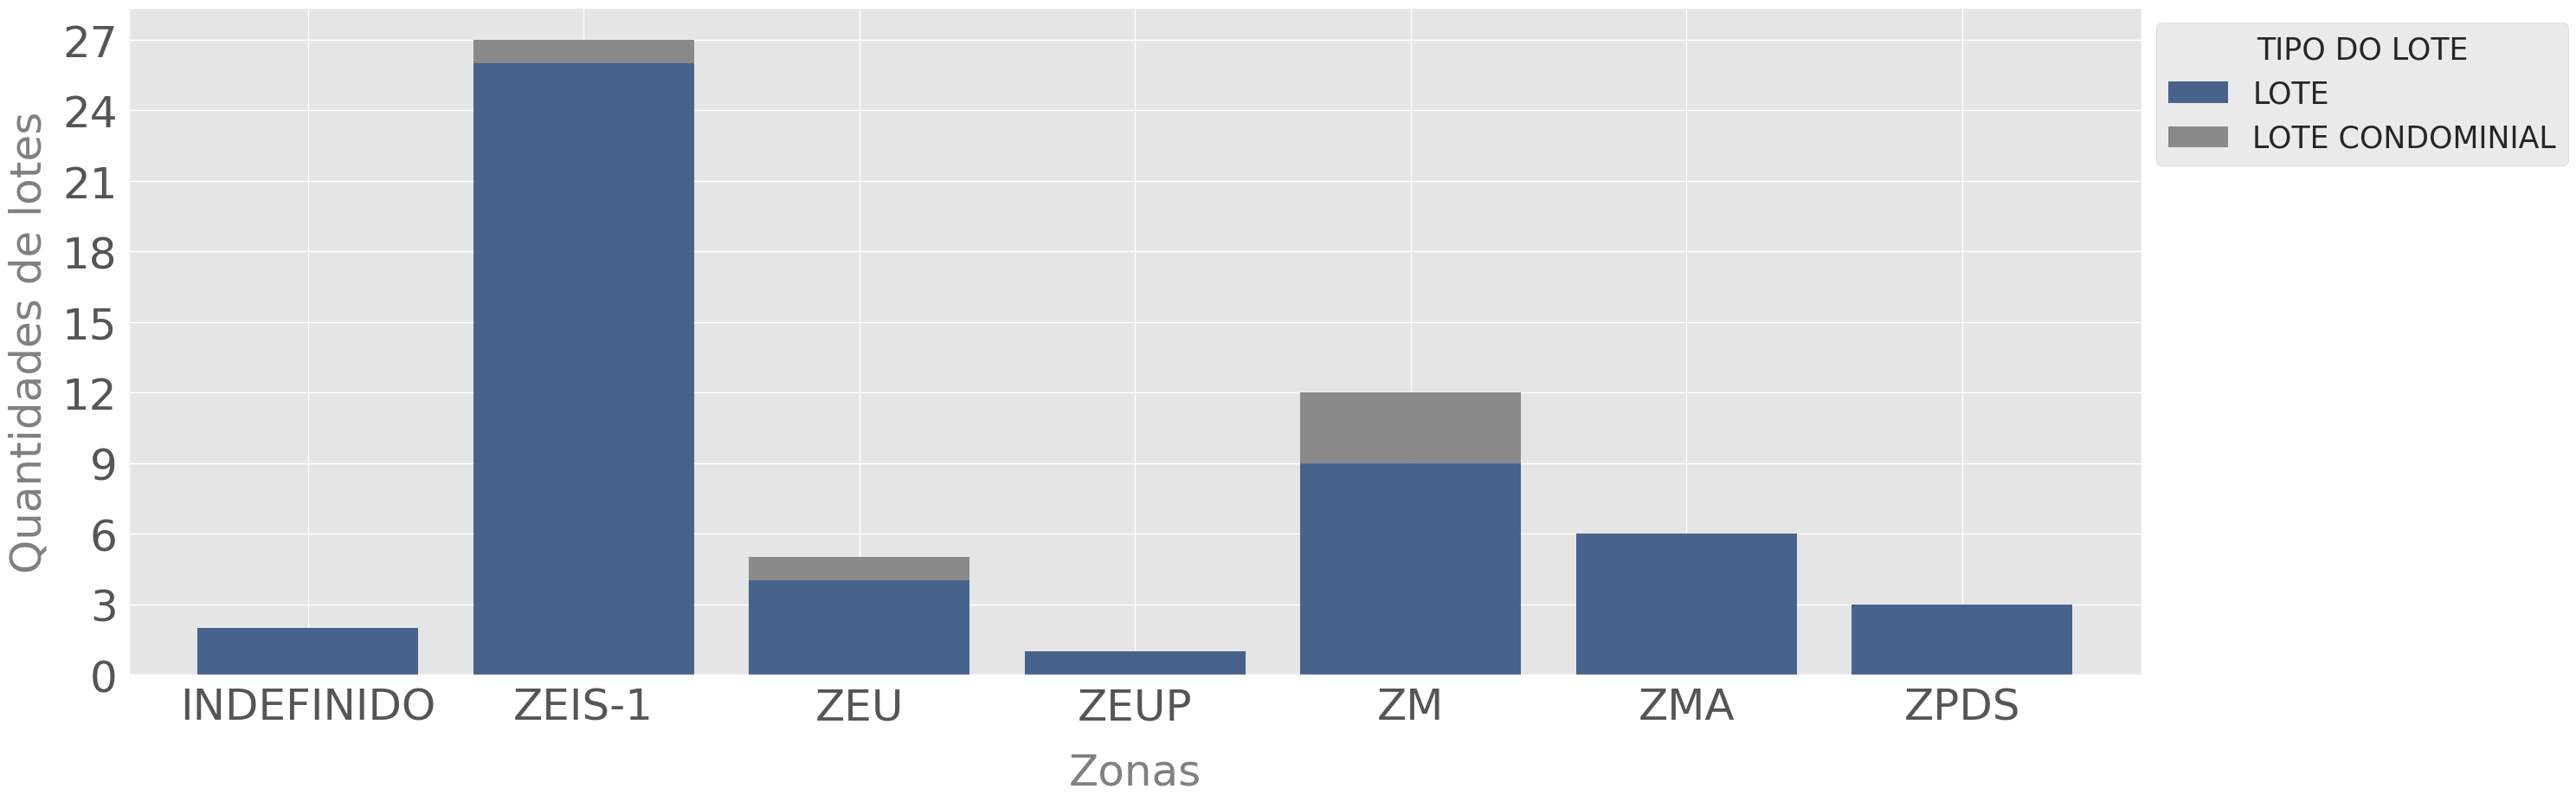

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
AD= AD_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(30, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
AD = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
AD = plt.xticks(rotation= 0 )
AD = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
AD = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
AD = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO CAMPO LIMPO - CL 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'CL'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        30
ZEIS-1     6
ZC         5
ZEPAM      3
ZEIS-5     2
ZMA        2
ZER 1      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CL_Zonas = dados.query("SGL_SUBP_EDIC == 'CL'")

In [ ]:
CL_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
508         0              ZC
507         0              ZC
586         0              ZC
505         0              ZC
623         0              ZC
657         1          ZEIS-1
640         1          ZEIS-1
534         0          ZEIS-1
648         1          ZEIS-1
676         0          ZEIS-1
553         0          ZEIS-1
641         1          ZEIS-5
655         1          ZEIS-5
517         0           ZEPAM
733         1           ZEPAM
459         0           ZEPAM
479         0           ZER 1
630         0              ZM
542         0              ZM
541         0              ZM
605         0              ZM
604         0              ZM
550         0              ZM
597         0              ZM
618         0              ZM
593         0              ZM
462         0              ZM
552         0              ZM
595         0              ZM
610         0              ZM
543         0              ZM
729         0              ZM
709         0              ZM
691         0              ZM
549         0              ZM
687         0              ZM
684         0              ZM
682         0              ZM
675         0              ZM
665         1              ZM
529         0              ZM
535         0              ZM
537         0              ZM
606         0              ZM
615         0              ZM
611         0              ZM
608         0              ZM
609         0             ZMA
598         0             ZMA

In [ ]:
CL_Zonas["COD_COND"] = CL_Zonas["COD_COND"].astype(int)

In [ ]:
CL_Zonas["COD_COND"] = CL_Zonas["COD_COND"].astype(str)

In [ ]:
CL_Zonas["COD_COND"]

508    0
507    0
586    0
505    0
623    0
657    1
640    1
534    0
648    1
676    0
553    0
641    1
655    1
517    0
733    1
459    0
479    0
630    0
542    0
541    0
605    0
604    0
550    0
597    0
618    0
593    0
462    0
552    0
595    0
610    0
543    0
729    0
709    0
691    0
549    0
687    0
684    0
682    0
675    0
665    1
529    0
535    0
537    0
606    0
615    0
611    0
608    0
609    0
598    0
Name: COD_COND, dtype: object

In [ ]:
CL_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    3
4    2
2    1
9    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
CL_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        30
ZEIS-1     6
ZC         5
ZEPAM      3
ZEIS-5     2
ZMA        2
ZER 1      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CL_Cond_Zonas = CL_Zonas.query("COD_COND != '0'")
CL_Cond_Zonas

GEOCODE                  ID  \
657  RUA DR JOSE SERRA RIBEIRO, 334,SAO PAULO, SAO ...  166033611026010000   
640  ESTRADA DOS MIRANDAS, 303,SAO PAULO, SAO PAULO...  171298140201040000   
648  RUA DR JOSE SERRA RIBEIRO, 300,SAO PAULO, SAO ...  166033611026020000   
641  RUA FRANCISCO JOSE DA SILVA, 352,SAO PAULO, SA...  171222662755040000   
655  RUA RICARDO AVENARIUS, 910,SAO PAULO, SAO PAUL...  170130012718010000   
733  RUA ANTONIO AGGIO, 49,SAO PAULO, SAO PAULO - B...  170059308102090000   
665  RUA CARVALHO DE FREITAS, 420,SAO PAULO, SAO PA...  169203663000010000   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
657          166           33       611026             1             0   
640          171          298       140201             4             0   
648          166           33       611026             2             0   
641          171          222       662755             4             0   
655          170          130        12718             1             0   
733          170           59       308102             9             0   
665          169          203       663000             1             0   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
657            CL           CRE             3  ...             NaN   
640            CL           CLM             1  ...             NaN   
648            CL           CRE             1  ...             NaN   
641            CL           VAN             3  ...             NaN   
655            CL           VAN             3  ...             NaN   
733            CL           VAN             2  ...             NaN   
665            CL           VAN             3  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
657     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
640     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
648     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
641     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
655     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
733     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
665     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
657  PRIMEIRO QUADRIMESTRE     2022         1  -23,6550276  -46,7565585  
640  PRIMEIRO QUADRIMESTRE     2022         1  -23,6166466  -46,7532826  
648  PRIMEIRO QUADRIMESTRE     2022         1  -23,6546936  -46,7570214  
641  PRIMEIRO QUADRIMESTRE     2022         1  -23,6267675  -46,7429569  
655  PRIMEIRO QUADRIMESTRE     2022         1  -23,6192601  -46,7218864  
733  PRIMEIRO QUADRIMESTRE     2022         1  -23,6287528  -46,7286414  
665  PRIMEIRO QUADRIMESTRE     2022         1   -23,632294  -46,7405581  

[7 rows x 71 columns]

In [ ]:
len(CL_Cond_Zonas) 

7

In [ ]:
CL_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        29
ZC         5
ZEIS-1     3
ZEPAM      2
ZMA        2
ZER 1      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CL_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    3
ZEIS-5    2
ZEPAM     1
ZM        1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CL_Sem_Cond_Zonas = CL_Zonas.query("COD_COND == '0'")
CL_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
508  AVENIDA ALBERTO AUGUSTO ALVES, 50,SAO PAULO, S...  301054465763002910   
507  AVENIDA ALBERTO AUGUSTO ALVES, 50,SAO PAULO, S...  301054465763002911   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
508          301           54       465763             0          2910   
507          301           54       465763             0          2911   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
508            CL           VAN             1  ...             NaN   
507            CL           VAN             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
508     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
507     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
508  PRIMEIRO QUADRIMESTRE     2022         0  -23,6419976  -46,7346558  
507  PRIMEIRO QUADRIMESTRE     2022         0  -23,6419976  -46,7346558  

[2 rows x 71 columns]

In [ ]:
len(CL_Sem_Cond_Zonas)

42

In [ ]:
len(CL_Zonas) #quatidade total de zonas 

49

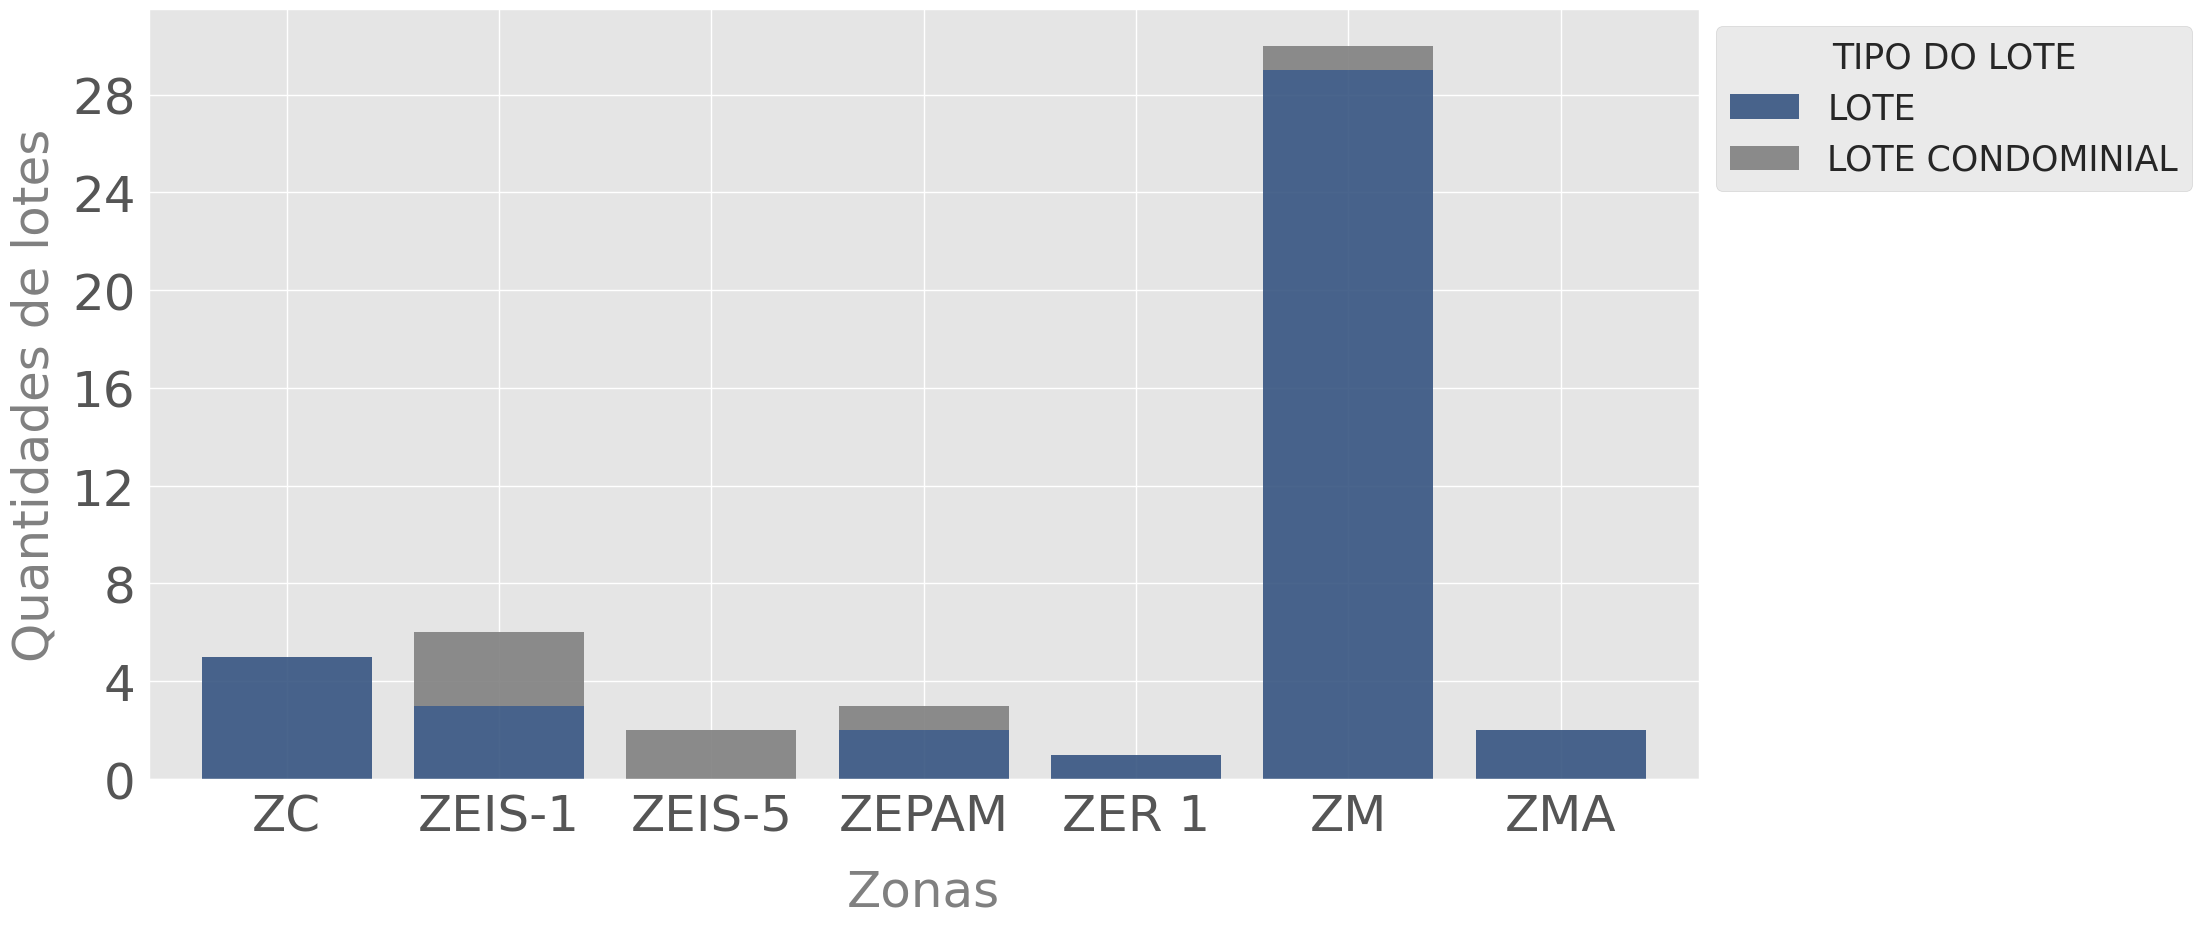

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
CL = CL_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9,color = ['#365481', 'grey'], edgecolor='None')
CL = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
CL = plt.xticks(rotation= 0 )
CL = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
CL = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
CL = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE M. BOI MIRIM - MB 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'MB'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZMA       23
ZEIS-1    22
ZM         4
ZC         1
ZEUA       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MB_Zonas = dados.query("SGL_SUBP_EDIC == 'MB'")

In [ ]:
MB_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
486         0              ZC
714         0          ZEIS-1
713         0          ZEIS-1
458         0          ZEIS-1
581         0          ZEIS-1
715         0          ZEIS-1
496         0          ZEIS-1
603         0          ZEIS-1
466         0          ZEIS-1
492         0          ZEIS-1
551         0          ZEIS-1
448         0          ZEIS-1
693         0          ZEIS-1
490         0          ZEIS-1
568         0          ZEIS-1
707         0          ZEIS-1
686         0          ZEIS-1
554         0          ZEIS-1
616         0          ZEIS-1
622         0          ZEIS-1
596         0          ZEIS-1
478         0          ZEIS-1
540         0          ZEIS-1
625         0            ZEUA
494         0              ZM
545         0              ZM
530         0              ZM
571         0              ZM
600         0             ZMA
503         0             ZMA
716         0             ZMA
447         0             ZMA
453         0             ZMA
688         0             ZMA
481         0             ZMA
483         0             ZMA
484         0             ZMA
679         0             ZMA
485         0             ZMA
678         0             ZMA
710         0             ZMA
724         0             ZMA
488         0             ZMA
511         0             ZMA
536         0             ZMA
444         0             ZMA
524         0             ZMA
680         0             ZMA
504         0             ZMA
510         0             ZMA
482         0             ZMA

In [ ]:
MB_Zonas["COD_COND"] = MB_Zonas["COD_COND"].astype(int)

In [ ]:
MB_Zonas["COD_COND"] = MB_Zonas["COD_COND"].astype(str)

In [ ]:
MB_Zonas["COD_COND"]

486    0
714    0
713    0
458    0
581    0
715    0
496    0
603    0
466    0
492    0
551    0
448    0
693    0
490    0
568    0
707    0
686    0
554    0
616    0
622    0
596    0
478    0
540    0
625    0
494    0
545    0
530    0
571    0
600    0
503    0
716    0
447    0
453    0
688    0
481    0
483    0
484    0
679    0
485    0
678    0
710    0
724    0
488    0
511    0
536    0
444    0
524    0
680    0
504    0
510    0
482    0
Name: COD_COND, dtype: object

In [ ]:
MB_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

Series([], Name: COD_CNDM_ZON, dtype: int64)

In [ ]:
MB_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMA       23
ZEIS-1    22
ZM         4
ZC         1
ZEUA       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MB_Cond_Zonas = MB_Zonas.query("COD_COND != '0'")
MB_Cond_Zonas

Empty DataFrame
Columns: [GEOCODE, ID, COD_SET_ZON, COD_QDR_ZON, COD_LOG_ZON, COD_CNDM_ZON, COD_LOTE_ZON, SGL_SUBP_EDIC, SGL_DSTR_EDIC, COD_TSTD_ZON, IND_VRFC_EDIC, IND_EXCL_INCL_CRGA, SGL_ZONA_01_ZON, COD_PRMR_01_ZON, SGL_LNDR_01_ZON, COD_TIP_LEGC_01, COD_LEGC_01_ZON, ANO_LEGC_01_ZON, IND_ADCA_CRGA, SGL_ZONA_02_ZON, COD_PRMR_02_ZON, SGL_LNDR_02_ZON, COD_TIP_LEGC_02, COD_LEGC_02_ZON, ANO_LEGC_02_ZON, SGL_ZONA_03_ZON, COD_PRMR_03_ZON, SGL_LNDR_03_ZON, COD_TIP_LEGC_03, COD_LEGC_03_ZON, ANO_LEGC_03_ZON, SGL_ZONA_04_ZON, COD_PRMR_04_ZON, SGL_LNDR_04_ZON, COD_TIP_LEGC_04, COD_LEGC_04_ZON, ANO_LEGC_04_ZON, SGL_ZONA_05_ZON, COD_PRMR_05_ZON, SGL_LNDR_05_ZON, COD_TIP_LEGC_05, COD_LEGC_05_ZON, ANO_LEGC_05_ZON, SGL_ZONA_06_ZON, COD_PRMR_06_ZON, SGL_LNDR_06_ZON, COD_TIP_LEGC_06, COD_LEGC_06_ZON, ANO_LEGC_06_ZON, COD_AREA_CONST, COD_AREA_LT, COD_END_LOG, COD_NUM_PORT, COD_SIT, VALOR_MET_CODLOG, VALOR_MET_MED_ZON, NUM_PAV, SGL_ZON_URB_RUR, ANO_CONST, IND_EXCL_OBS, TXT_OBS_01_EDIC, TXT_OBS_02_EDIC, NOME_CID_EDIC, NOME_EST_EDIC, NOME_PAIS_EDIC, REG_LIM_ADM, QUADRIMESTRE, COD_ANO, COD_COND, Lat_Y_, Long_X_]
Index: []

[0 rows x 71 columns]

In [ ]:
len(MB_Cond_Zonas) 

0

In [ ]:
MB_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMA       23
ZEIS-1    22
ZM         4
ZC         1
ZEUA       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MB_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

Series([], Name: SGL_ZONA_01_ZON, dtype: int64)

In [ ]:
MB_Sem_Cond_Zonas = MB_Zonas.query("COD_COND == '0'")
MB_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
486  RUA DEOCLECIANO DE OLIVEIRA FILHO, 102,SAO PAU...  165276216011000053   
714  RUA BARTOLOMEU BEJARANO, 49,SAO PAULO, SAO PAU...  165164029068000036   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
486          165          276       216011             0            53   
714          165          164        29068             0            36   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
486            MB           JDS             2  ...             NaN   
714            MB           JDS             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
486     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
714     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
486  PRIMEIRO QUADRIMESTRE     2022         0  -23,6650765  -46,7540835  
714  PRIMEIRO QUADRIMESTRE     2022         0  -23,6695419  -46,7393776  

[2 rows x 71 columns]

In [ ]:
len(MB_Sem_Cond_Zonas)

51

In [ ]:
len(MB_Zonas) #quatidade total de zonas 

51

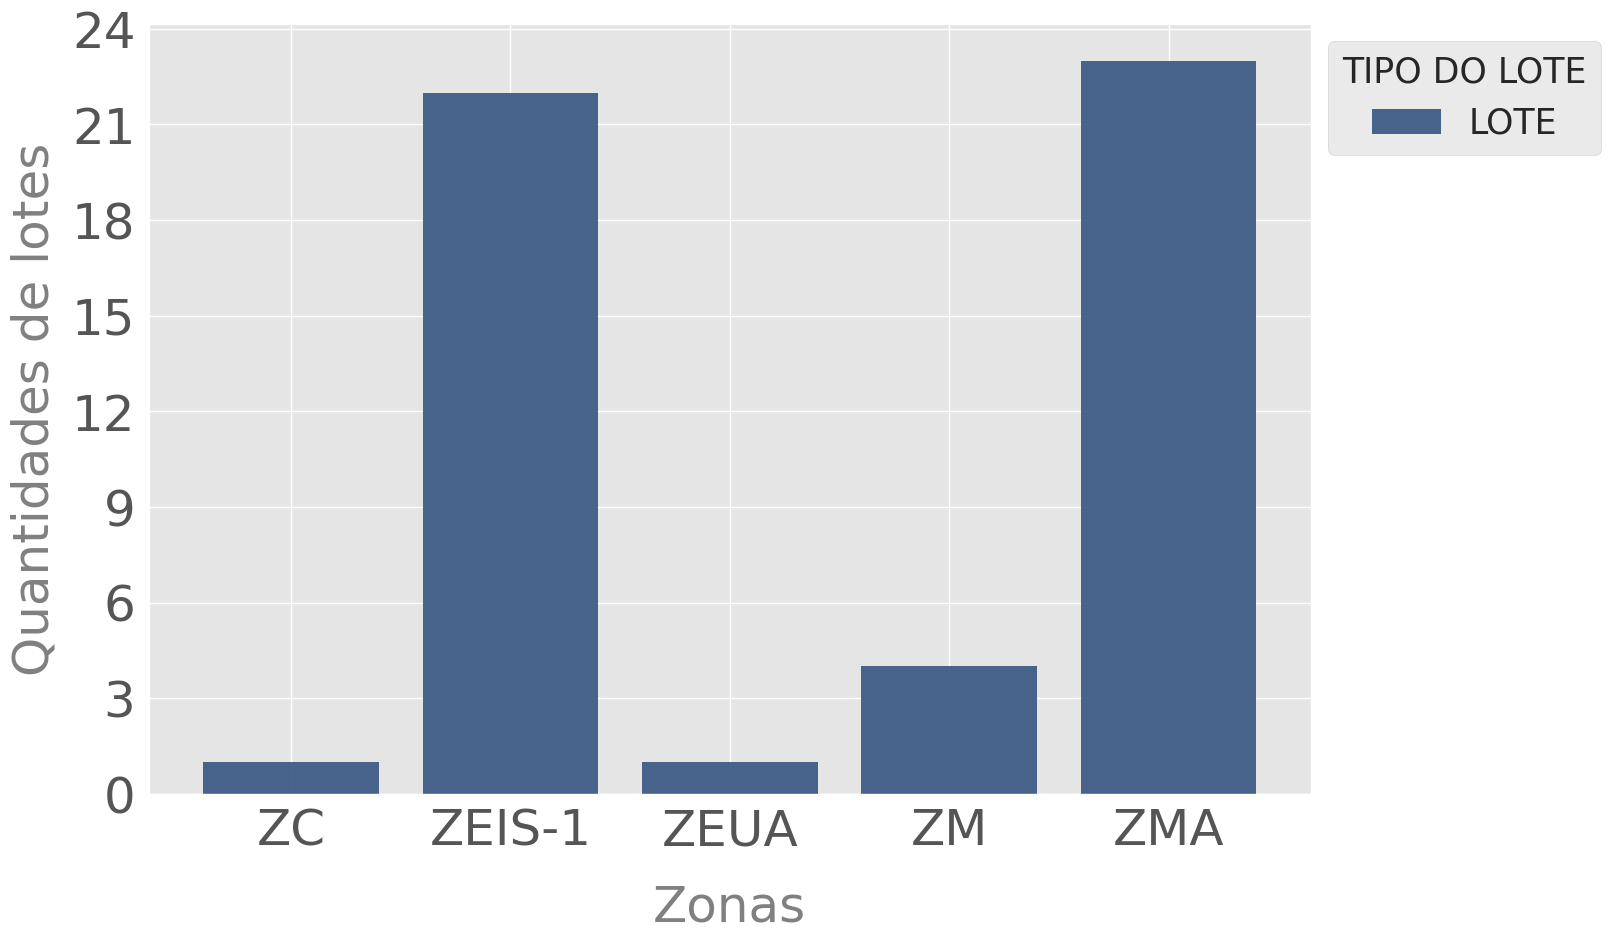

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MB = MB_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
MB = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MB = plt.xticks(rotation= 0 )
MB = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MB = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
MB = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA CAPELA DO SOCORRO - SO 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'SO'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZMA       11
ZEIS-4     8
ZEIS-1     4
ZEUA       3
ZEU        1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SO_Zonas = dados.query("SGL_SUBP_EDIC == 'SO'")

In [ ]:
SO_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
513         0          ZEIS-1
704         0          ZEIS-1
471         0          ZEIS-1
562         0          ZEIS-1
587         0          ZEIS-4
565         0          ZEIS-4
632         0          ZEIS-4
567         0          ZEIS-4
449         0          ZEIS-4
767         0          ZEIS-4
577         0          ZEIS-4
559         0          ZEIS-4
450         0             ZEU
475         0            ZEUA
580         0            ZEUA
474         0            ZEUA
457         0             ZMA
719         0             ZMA
624         0             ZMA
489         0             ZMA
539         0             ZMA
533         0             ZMA
501         0             ZMA
469         0             ZMA
455         0             ZMA
698         0             ZMA
461         0             ZMA

In [ ]:
SO_Zonas["COD_COND"] = SO_Zonas["COD_COND"].astype(int)

In [ ]:
SO_Zonas["COD_COND"] = SO_Zonas["COD_COND"].astype(str)

In [ ]:
SO_Zonas["COD_COND"]

513    0
704    0
471    0
562    0
587    0
565    0
632    0
567    0
449    0
767    0
577    0
559    0
450    0
475    0
580    0
474    0
457    0
719    0
624    0
489    0
539    0
533    0
501    0
469    0
455    0
698    0
461    0
Name: COD_COND, dtype: object

In [ ]:
SO_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

Series([], Name: COD_CNDM_ZON, dtype: int64)

In [ ]:
SO_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMA       11
ZEIS-4     8
ZEIS-1     4
ZEUA       3
ZEU        1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SO_Cond_Zonas = SO_Zonas.query("COD_COND != '0'")
SO_Cond_Zonas

Empty DataFrame
Columns: [GEOCODE, ID, COD_SET_ZON, COD_QDR_ZON, COD_LOG_ZON, COD_CNDM_ZON, COD_LOTE_ZON, SGL_SUBP_EDIC, SGL_DSTR_EDIC, COD_TSTD_ZON, IND_VRFC_EDIC, IND_EXCL_INCL_CRGA, SGL_ZONA_01_ZON, COD_PRMR_01_ZON, SGL_LNDR_01_ZON, COD_TIP_LEGC_01, COD_LEGC_01_ZON, ANO_LEGC_01_ZON, IND_ADCA_CRGA, SGL_ZONA_02_ZON, COD_PRMR_02_ZON, SGL_LNDR_02_ZON, COD_TIP_LEGC_02, COD_LEGC_02_ZON, ANO_LEGC_02_ZON, SGL_ZONA_03_ZON, COD_PRMR_03_ZON, SGL_LNDR_03_ZON, COD_TIP_LEGC_03, COD_LEGC_03_ZON, ANO_LEGC_03_ZON, SGL_ZONA_04_ZON, COD_PRMR_04_ZON, SGL_LNDR_04_ZON, COD_TIP_LEGC_04, COD_LEGC_04_ZON, ANO_LEGC_04_ZON, SGL_ZONA_05_ZON, COD_PRMR_05_ZON, SGL_LNDR_05_ZON, COD_TIP_LEGC_05, COD_LEGC_05_ZON, ANO_LEGC_05_ZON, SGL_ZONA_06_ZON, COD_PRMR_06_ZON, SGL_LNDR_06_ZON, COD_TIP_LEGC_06, COD_LEGC_06_ZON, ANO_LEGC_06_ZON, COD_AREA_CONST, COD_AREA_LT, COD_END_LOG, COD_NUM_PORT, COD_SIT, VALOR_MET_CODLOG, VALOR_MET_MED_ZON, NUM_PAV, SGL_ZON_URB_RUR, ANO_CONST, IND_EXCL_OBS, TXT_OBS_01_EDIC, TXT_OBS_02_EDIC, NOME_CID_EDIC, NOME_EST_EDIC, NOME_PAIS_EDIC, REG_LIM_ADM, QUADRIMESTRE, COD_ANO, COD_COND, Lat_Y_, Long_X_]
Index: []

[0 rows x 71 columns]

In [ ]:
len(SO_Cond_Zonas) 

0

In [ ]:
SO_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts() 

ZMA       11
ZEIS-4     8
ZEIS-1     4
ZEUA       3
ZEU        1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SO_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

Series([], Name: SGL_ZONA_01_ZON, dtype: int64)

In [ ]:
SO_Sem_Cond_Zonas = SO_Zonas.query("COD_COND == '0'")
SO_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
513  RUA GILBERTO FREYRE, 2009,SAO PAULO, SAO PAULO...  259048251518000058   
704  RUA MAXIMILIANO MARTINEZ, 117,SAO PAULO, SAO P...  162227483540000064   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
513          259           48       251518             0            58   
704          162          227       483540             0            64   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
513            SO           GRA             1  ...             NaN   
704            SO           CDU             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
513     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
704     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
513  PRIMEIRO QUADRIMESTRE     2022         0  -23,7461819  -46,6700428  
704  PRIMEIRO QUADRIMESTRE     2022         0  -23,7089647  -46,6848496  

[2 rows x 71 columns]

In [ ]:
len(SO_Sem_Cond_Zonas)

27

In [ ]:
len(SO_Zonas) #quatidade total de zonas

27

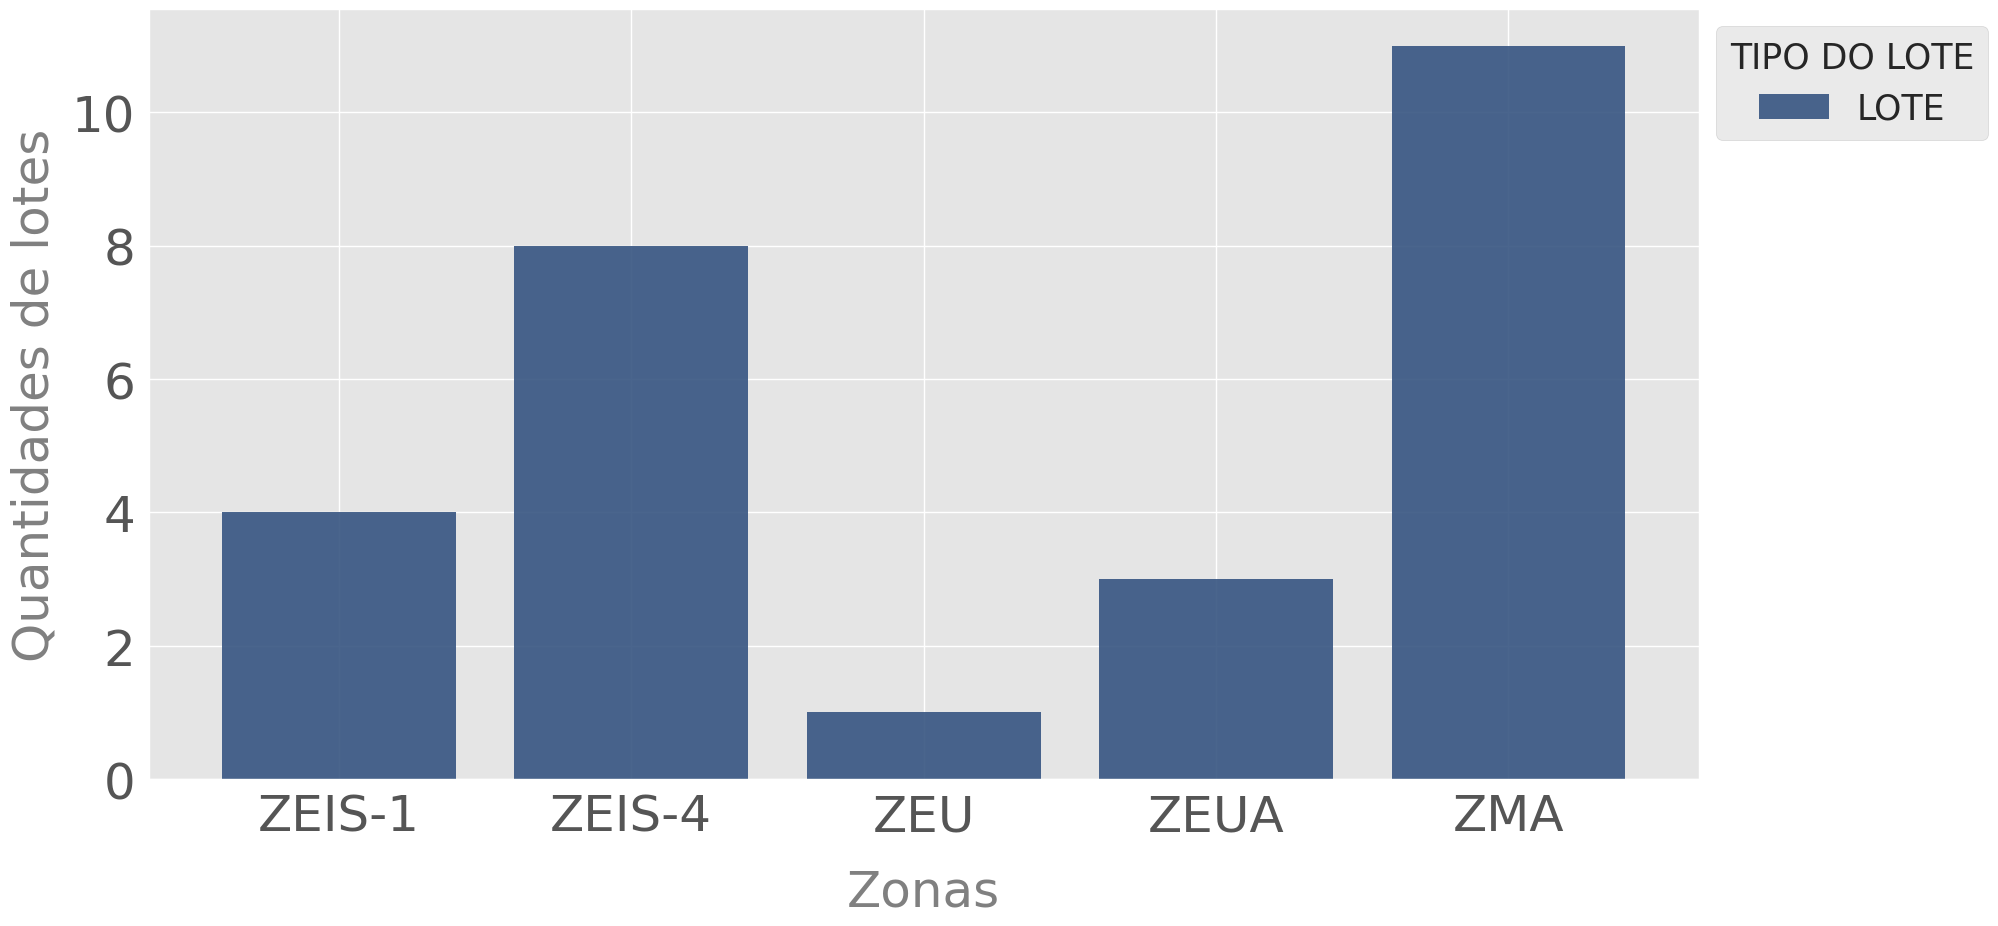

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SO = SO_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SO = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SO = plt.xticks(rotation= 0 )
SO = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SO = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
SO = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE PARELHEIROS - PA 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'PA'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    8
ZPDS      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PA_Zonas = dados.query("SGL_SUBP_EDIC == 'PA'")

In [ ]:
PA_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
681         0          ZEIS-1
626         0          ZEIS-1
569         0          ZEIS-1
708         0          ZEIS-1
700         0          ZEIS-1
555         0          ZEIS-1
701         0          ZEIS-1
544         0          ZEIS-1
558         0            ZPDS

In [ ]:
PA_Zonas["COD_COND"] = PA_Zonas["COD_COND"].astype(int)

In [ ]:
PA_Zonas["COD_COND"] = PA_Zonas["COD_COND"].astype(str)

In [ ]:
PA_Zonas["COD_COND"]

681    0
626    0
569    0
708    0
700    0
555    0
701    0
544    0
558    0
Name: COD_COND, dtype: object

In [ ]:
PA_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

Series([], Name: COD_CNDM_ZON, dtype: int64)

In [ ]:
PA_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    8
ZPDS      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PA_Cond_Zonas = PA_Zonas.query("COD_COND != '0'")
PA_Cond_Zonas

Empty DataFrame
Columns: [GEOCODE, ID, COD_SET_ZON, COD_QDR_ZON, COD_LOG_ZON, COD_CNDM_ZON, COD_LOTE_ZON, SGL_SUBP_EDIC, SGL_DSTR_EDIC, COD_TSTD_ZON, IND_VRFC_EDIC, IND_EXCL_INCL_CRGA, SGL_ZONA_01_ZON, COD_PRMR_01_ZON, SGL_LNDR_01_ZON, COD_TIP_LEGC_01, COD_LEGC_01_ZON, ANO_LEGC_01_ZON, IND_ADCA_CRGA, SGL_ZONA_02_ZON, COD_PRMR_02_ZON, SGL_LNDR_02_ZON, COD_TIP_LEGC_02, COD_LEGC_02_ZON, ANO_LEGC_02_ZON, SGL_ZONA_03_ZON, COD_PRMR_03_ZON, SGL_LNDR_03_ZON, COD_TIP_LEGC_03, COD_LEGC_03_ZON, ANO_LEGC_03_ZON, SGL_ZONA_04_ZON, COD_PRMR_04_ZON, SGL_LNDR_04_ZON, COD_TIP_LEGC_04, COD_LEGC_04_ZON, ANO_LEGC_04_ZON, SGL_ZONA_05_ZON, COD_PRMR_05_ZON, SGL_LNDR_05_ZON, COD_TIP_LEGC_05, COD_LEGC_05_ZON, ANO_LEGC_05_ZON, SGL_ZONA_06_ZON, COD_PRMR_06_ZON, SGL_LNDR_06_ZON, COD_TIP_LEGC_06, COD_LEGC_06_ZON, ANO_LEGC_06_ZON, COD_AREA_CONST, COD_AREA_LT, COD_END_LOG, COD_NUM_PORT, COD_SIT, VALOR_MET_CODLOG, VALOR_MET_MED_ZON, NUM_PAV, SGL_ZON_URB_RUR, ANO_CONST, IND_EXCL_OBS, TXT_OBS_01_EDIC, TXT_OBS_02_EDIC, NOME_CID_EDIC, NOME_EST_EDIC, NOME_PAIS_EDIC, REG_LIM_ADM, QUADRIMESTRE, COD_ANO, COD_COND, Lat_Y_, Long_X_]
Index: []

[0 rows x 71 columns]

In [ ]:
PA_Sem_Cond_Zonas = PA_Zonas.query("COD_COND == '0'")
PA_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
681  RUA FORTE DO LADARIO, 130,SAO PAULO, SAO PAULO...  266011381578000027   
626  RUA FORTE DO LADARIO, 101,SAO PAULO, SAO PAULO...  266011381578000028   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
681          266           11       381578             0            27   
626          266           11       381578             0            28   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
681            PA           PLH             2  ...             NaN   
626            PA           PLH             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
681     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   
626     SAO PAULO     SAO PAULO          BRASIL  SUL-SUDESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
681  PRIMEIRO QUADRIMESTRE     2022         0  -23,7835223  -46,7112526  
626  PRIMEIRO QUADRIMESTRE     2022         0  -23,7838032  -46,7110317  

[2 rows x 71 columns]

In [ ]:
len(PA_Sem_Cond_Zonas)

9

In [ ]:
len(PA_Zonas) #quatidade total de zonas

9

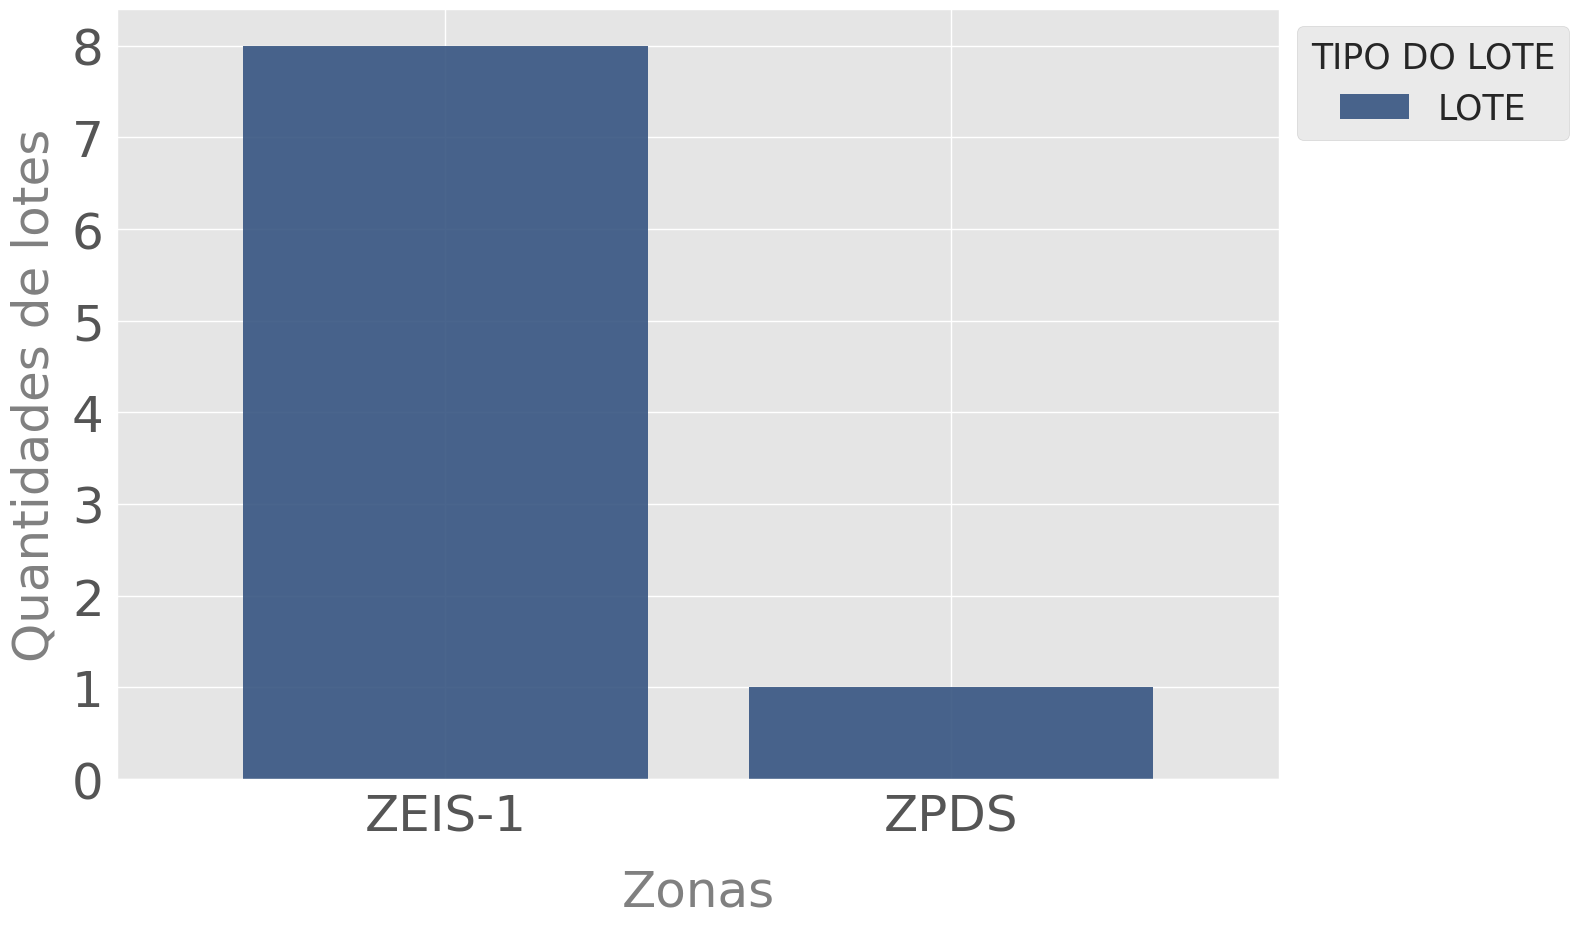

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PA = PA_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PA = plt.xticks(rotation= 0 )
PA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PA = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
PA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##NOROESTE 

##LOTES DA SUBPREFEITURA DE PERUS - PR 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'PR'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZMA      10
ZEU       4
ZM        4
ZPI-2     2
ZEPAM     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PR_Zonas = dados.query("SGL_SUBP_EDIC == 'PR'")

In [ ]:
PR_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
335          0           ZEPAM
29           0             ZEU
2234         0             ZEU
229          0             ZEU
85           0             ZEU
2261         0              ZM
2272         0              ZM
2148         0              ZM
308          0              ZM
75           0             ZMA
298          0             ZMA
204          0             ZMA
1902         0             ZMA
1903         0             ZMA
243          0             ZMA
1921         0             ZMA
213          0             ZMA
1920         0             ZMA
202          0             ZMA
1917         0           ZPI-2
228          0           ZPI-2

In [ ]:
PR_Zonas["COD_COND"] = PR_Zonas["COD_COND"].astype(int)

In [ ]:
PR_Zonas["COD_COND"] = PR_Zonas["COD_COND"].astype(str)

In [ ]:
PR_Zonas["COD_COND"]

335     0
29      0
2234    0
229     0
85      0
2261    0
2272    0
2148    0
308     0
75      0
298     0
204     0
1902    0
1903    0
243     0
1921    0
213     0
1920    0
202     0
1917    0
228     0
Name: COD_COND, dtype: object

In [ ]:
PR_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

Series([], Name: COD_CNDM_ZON, dtype: int64)

In [ ]:
PR_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMA      10
ZEU       4
ZM        4
ZPI-2     2
ZEPAM     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PR_Cond_Zonas = PR_Zonas.query("COD_COND != '0'")
PR_Cond_Zonas

Empty DataFrame
Columns: [GEOCODE, ID, COD_SET_ZON, COD_QDR_ZON, COD_LOG_ZON, COD_CNDM_ZON, COD_LOTE_ZON, SGL_SUBP_EDIC, SGL_DSTR_EDIC, COD_TSTD_ZON, IND_VRFC_EDIC, IND_EXCL_INCL_CRGA, SGL_ZONA_01_ZON, COD_PRMR_01_ZON, SGL_LNDR_01_ZON, COD_TIP_LEGC_01, COD_LEGC_01_ZON, ANO_LEGC_01_ZON, IND_ADCA_CRGA, SGL_ZONA_02_ZON, COD_PRMR_02_ZON, SGL_LNDR_02_ZON, COD_TIP_LEGC_02, COD_LEGC_02_ZON, ANO_LEGC_02_ZON, SGL_ZONA_03_ZON, COD_PRMR_03_ZON, SGL_LNDR_03_ZON, COD_TIP_LEGC_03, COD_LEGC_03_ZON, ANO_LEGC_03_ZON, SGL_ZONA_04_ZON, COD_PRMR_04_ZON, SGL_LNDR_04_ZON, COD_TIP_LEGC_04, COD_LEGC_04_ZON, ANO_LEGC_04_ZON, SGL_ZONA_05_ZON, COD_PRMR_05_ZON, SGL_LNDR_05_ZON, COD_TIP_LEGC_05, COD_LEGC_05_ZON, ANO_LEGC_05_ZON, SGL_ZONA_06_ZON, COD_PRMR_06_ZON, SGL_LNDR_06_ZON, COD_TIP_LEGC_06, COD_LEGC_06_ZON, ANO_LEGC_06_ZON, COD_AREA_CONST, COD_AREA_LT, COD_END_LOG, COD_NUM_PORT, COD_SIT, VALOR_MET_CODLOG, VALOR_MET_MED_ZON, NUM_PAV, SGL_ZON_URB_RUR, ANO_CONST, IND_EXCL_OBS, TXT_OBS_01_EDIC, TXT_OBS_02_EDIC, NOME_CID_EDIC, NOME_EST_EDIC, NOME_PAIS_EDIC, REG_LIM_ADM, QUADRIMESTRE, COD_ANO, COD_COND, Lat_Y_, Long_X_]
Index: []

[0 rows x 71 columns]

In [ ]:
len(PR_Cond_Zonas) 

0

In [ ]:
PR_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMA      10
ZEU       4
ZM        4
ZPI-2     2
ZEPAM     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PR_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

Series([], Name: SGL_ZONA_01_ZON, dtype: int64)

In [ ]:
PR_Sem_Cond_Zonas = PR_Zonas.query("COD_COND == '0'")
PR_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
335  RUA JOANA PEDROSO DOS SANTOS, 101,SAO PAULO, S...  213073100811000004   
29   AVENIDA DR SYLVIO DE CAMPOS, 38,SAO PAULO, SAO...  187113182621000029   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
335          213           73       100811             0             4   
29           187          113       182621             0            29   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
335            PR           JAR             1  ...             NaN   
29             PR           PRS             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
335     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
29      SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
335  PRIMEIRO QUADRIMESTRE     2022         0   -23,426641  -46,7268193  
29   PRIMEIRO QUADRIMESTRE     2022         0  -23,4064321  -46,7549926  

[2 rows x 71 columns]

In [ ]:
len(PR_Sem_Cond_Zonas)

21

In [ ]:
len(PR_Zonas) #quatidade total de zonas

21

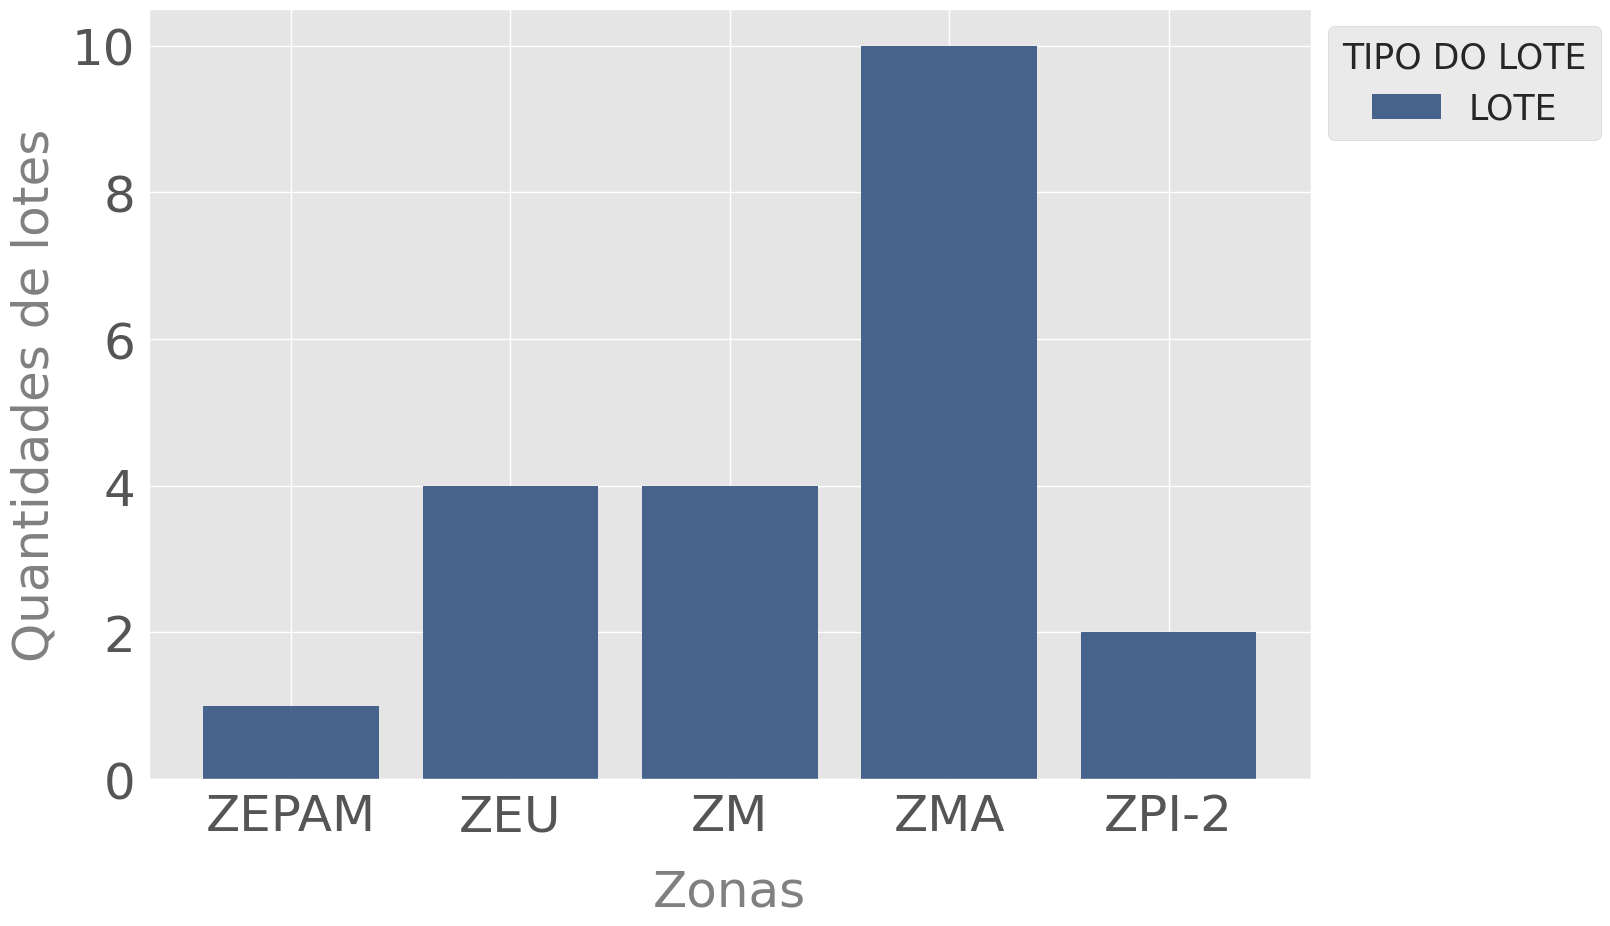

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PR = PR_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PR = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PR = plt.xticks(rotation= 0 )
PR = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PR = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
PR = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE PIRITUBA - PJ 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'PJ'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1        342
INDEFINIDO    122
ZM             25
ZEIS-5          4
ZEU             4
ZC              3
ZCA             3
ZEPAM           3
ZPR             3
ZEUA            2
ZEIS-2          1
ZEMP            1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PJ_Zonas = dados.query("SGL_SUBP_EDIC == 'PJ'")

In [ ]:
PJ_Zonas["COD_COND"] = PJ_Zonas["COD_COND"].astype(int)

In [ ]:
PJ_Zonas["COD_COND"] = PJ_Zonas["COD_COND"].astype(str)

In [ ]:
PJ_Zonas["COD_COND"]

1501    0
1503    0
1387    0
1502    0
1126    0
       ..
2096    1
2072    1
195     0
210     0
52      0
Name: COD_COND, Length: 513, dtype: object

In [ ]:
PJ_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

1    6
3    4
2    3
4    1
5    1
7    1
6    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
PJ_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1        342
INDEFINIDO    122
ZM             25
ZEIS-5          4
ZEU             4
ZC              3
ZCA             3
ZEPAM           3
ZPR             3
ZEUA            2
ZEIS-2          1
ZEMP            1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PJ_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1501        0      INDEFINIDO
1503        0      INDEFINIDO
1387        0      INDEFINIDO
1502        0      INDEFINIDO
1126        0      INDEFINIDO
...       ...             ...
2096        1              ZM
2072        1              ZM
195         0             ZPR
210         0             ZPR
52          0             ZPR

[513 rows x 2 columns]

In [ ]:
PJ_Cond_Zonas = PJ_Zonas.query("COD_COND != '0'")
PJ_Cond_Zonas

GEOCODE                  ID  \
1998  RUA PONTA DE EMBUTUBA, 75,SAO PAULO, SAO PAULO...  106019619876020000   
1985  AV RAIMUNDO PEREIRA DE MAGALHAES, 10735,SAO PA...  209012168386030000   
1986  AV APARECIDA DO RIO NEGRO, 553,SAO PAULO, SAO ...   78532519227030000   
2128  AV APARECIDA DO RIO NEGRO, 435,SAO PAULO, SAO ...   78532519227010000   
2095  AV APARECIDA DO RIO NEGRO, 487,SAO PAULO, SAO ...   78532519227020000   
2086  RUA ANESIA MARIA, 150,SAO PAULO, SAO PAULO - B...   77448013412010000   
2078  RUA CONSTANTINO NERI, 86,SAO PAULO, SAO PAULO ...   77042052590010000   
1984  RUA GENESIO ARRUDA, 135,SAO PAULO, SAO PAULO -...   78180078565030000   
2115  AV GUILHERME MANKEL, 295,SAO PAULO, SAO PAULO ...  124096084913010000   
2087  RUA ALTO DO RIO BRAVO, 214,SAO PAULO, SAO PAUL...  189020650544010000   
2123  AV APARECIDA DO RIO NEGRO, 302,SAO PAULO, SAO ...   78528238295010000   
1988  AV APARECIDA DO RIO NEGRO, 302,SAO PAULO, SAO ...   78528795879030000   
1977                   , ,SAO PAULO, SAO PAULO - BRASIL   78528795879040000   
1972                   , ,SAO PAULO, SAO PAULO - BRASIL   78528168386050000   
2067  AV APARECIDA DO RIO NEGRO, 302,SAO PAULO, SAO ...   78528283258070000   
2096  AV APARECIDA DO RIO NEGRO, 302,SAO PAULO, SAO ...   78528238295020000   
2072  AV APARECIDA DO RIO NEGRO, 302,SAO PAULO, SAO ...   78528283193060000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1998          106           19       619876             2             0   
1985          209           12       168386             3             0   
1986           78          532       519227             3             0   
2128           78          532       519227             1             0   
2095           78          532       519227             2             0   
2086           77          448        13412             1             0   
2078           77           42        52590             1             0   
1984           78          180        78565             3             0   
2115          124           96        84913             1             0   
2087          189           20       650544             1             0   
2123           78          528       238295             1             0   
1988           78          528       795879             3             0   
1977           78          528       795879             4             0   
1972           78          528       168386             5             0   
2067           78          528       283258             7             0   
2096           78          528       238295             2             0   
2072           78          528       283193             6             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ...  \
1998            PJ           PIR             1  ...   
1985            PJ           JAR             1  ...   
1986            PJ           PIR             2  ...   
2128            PJ           PIR             1  ...   
2095            PJ           PIR             1  ...   
2086            PJ           PIR             1  ...   
2078            PJ           PIR             1  ...   
1984            PJ           PIR             1  ...   
2115            PJ           PIR             1  ...   
2087            PJ           JAR             1  ...   
2123            PJ           PIR             1  ...   
1988            PJ           PIR             1  ...   
1977            PJ           PIR             2  ...   
1972            PJ           PIR             2  ...   
2067            PJ           PIR             1  ...   
2096            PJ           PIR             2  ...   
2072            PJ           PIR             1  ...   

                                  TXT_OBS_02_EDIC NOME_CID_EDIC NOME_EST_EDIC  \
1998                                          NaN     SAO PAULO     SAO PAULO   
1985                                          NaN     SAO PAULO     SAO PAULO   
1986                                    

In [ ]:
len(PJ_Cond_Zonas) 

17

In [ ]:
PJ_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1        342
INDEFINIDO    122
ZM             18
ZCA             3
ZEPAM           3
ZPR             3
ZC              2
ZEIS-5          1
ZEU             1
ZEUA            1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PJ_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM        7
ZEIS-5    3
ZEU       3
ZC        1
ZEIS-2    1
ZEMP      1
ZEUA      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PJ_Sem_Cond_Zonas = PJ_Zonas.query("COD_COND == '0'")
PJ_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1501  RUA ESTRELA DOURADA, 3,\nSAO PAULO, SAO PAULO ...  190114515230000006   
1503  RUA SEIS DE NOVEMBRO, 1,\nSAO PAULO, SAO PAULO...  190128515213000023   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1501          190          114       515230             0             6   
1503          190          128       515213             0            23   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ...  \
1501            PJ           JAR             1  ...   
1503            PJ           JAR             1  ...   

                  TXT_OBS_02_EDIC NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  \
1501                          NaN     SAO PAULO     SAO PAULO          BRASIL   
1503  LOTE COM NUMERO APROXIMADO.     SAO PAULO     SAO PAULO          BRASIL   

      REG_LIM_ADM           QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_  \
1501     NOROESTE  PRIMEIRO QUADRIMESTRE     2022         0  -23,4381344   
1503     NOROESTE  PRIMEIRO QUADRIMESTRE     2022         0  -23,4385504   

          Long_X_  
1501  -46,7116167  
1503    -46,71065  

[2 rows x 71 columns]

In [ ]:
len(PJ_Sem_Cond_Zonas)

496

In [ ]:
len(PJ_Zonas) #quatidade total de zonas

513

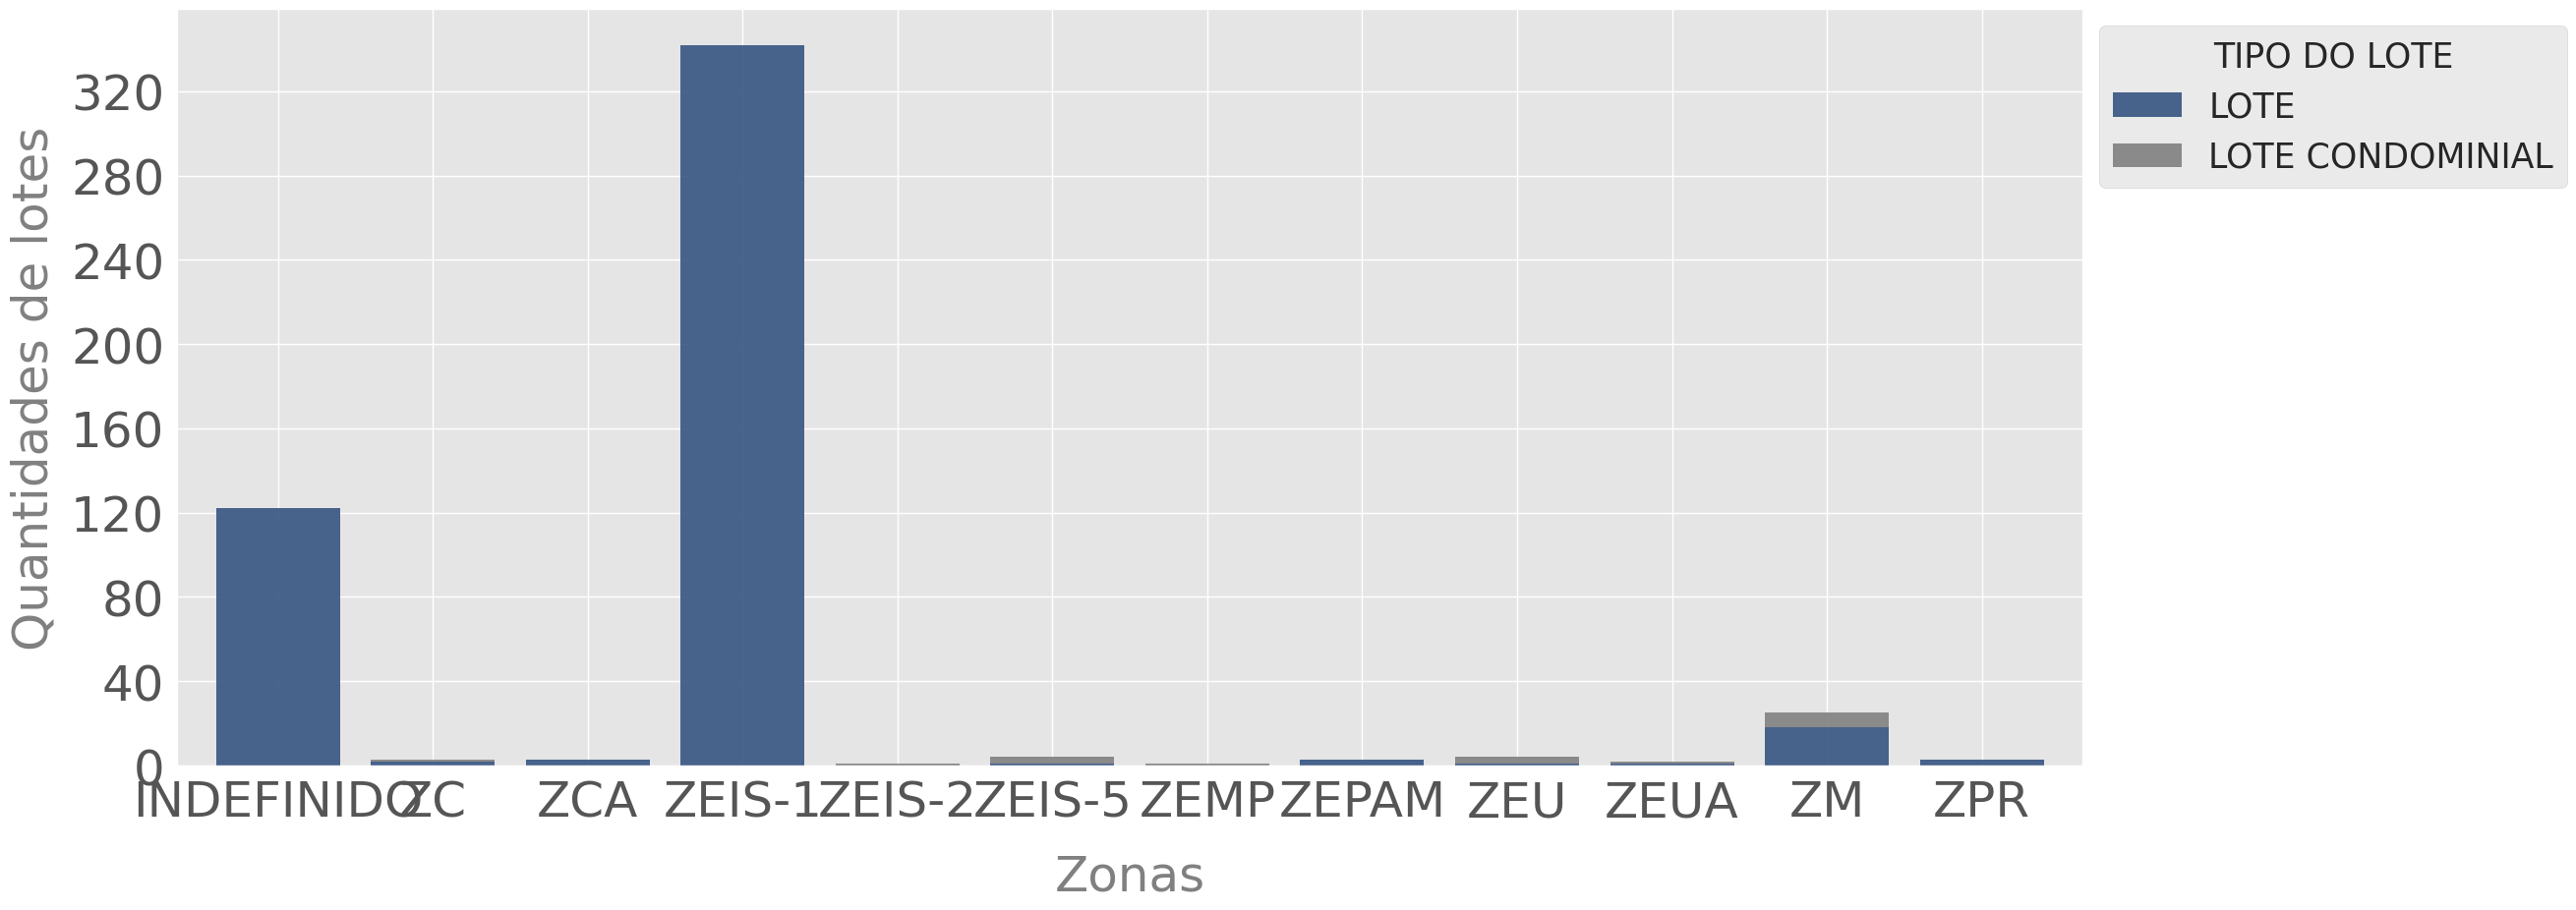

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PJ = PJ_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PJ = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PJ = plt.xticks(rotation= 0 )
PJ = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PJ = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
PJ = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA FREGUESIA DO Ó - FO 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'FO'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    472
ZM         10
ZC          2
ZEU         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
FO_Zonas = dados.query("SGL_SUBP_EDIC == 'FO'")

In [ ]:
FO_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
340          0              ZC
334          0              ZC
154          0          ZEIS-1
2173         0          ZEIS-1
2174         0          ZEIS-1
...        ...             ...
238          0              ZM
248          0              ZM
30           0              ZM
2180         0              ZM
1898         0              ZM

[485 rows x 2 columns]

In [ ]:
FO_Zonas["COD_COND"] = FO_Zonas["COD_COND"].astype(int)

In [ ]:
FO_Zonas["COD_COND"] = FO_Zonas["COD_COND"].astype(str)

In [ ]:
FO_Zonas["COD_COND"]

340     0
334     0
154     0
2173    0
2174    0
       ..
238     0
248     0
30      0
2180    0
1898    0
Name: COD_COND, Length: 485, dtype: object

In [ ]:
FO_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
FO_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    472
ZM         10
ZC          2
ZEU         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
FO_Cond_Zonas = FO_Zonas.query("COD_COND != '0'")
FO_Cond_Zonas

GEOCODE                  ID  \
2083  RUA MONTEGOLFIER BARBIERI, 188,SAO PAULO, SAO ...  107182141836010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2083          107          182       141836             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2083            FO           FRE             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2083     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
2083  PRIMEIRO QUADRIMESTRE     2022         1  -23,4844773  -46,6983359  

[1 rows x 71 columns]

In [ ]:
len(FO_Cond_Zonas) 

1

In [ ]:
FO_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    472
ZM          9
ZC          2
ZEU         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
FO_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
FO_Sem_Cond_Zonas = FO_Zonas.query("COD_COND == '0'")
FO_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
340  RUA PROF MANOEL NOGUEIRA P SOBRINHO , 357,SAO ...  108008031739000132   
334  AVENIDA JOAO PAULO 1, 1300,SAO PAULO, SAO PAUL...  107109345628000051   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
340          108            8        31739             0           132   
334          107          109       345628             0            51   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
340            FO           BRL             2  ...             NaN   
334            FO           FRE             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
340     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
334     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
340  PRIMEIRO QUADRIMESTRE     2022         0  -23,4923562  -46,7316245  
334  PRIMEIRO QUADRIMESTRE     2022         0  -23,4824758  -46,6868317  

[2 rows x 71 columns]

In [ ]:
len(FO_Sem_Cond_Zonas)

484

In [ ]:
len(FO_Zonas)

485

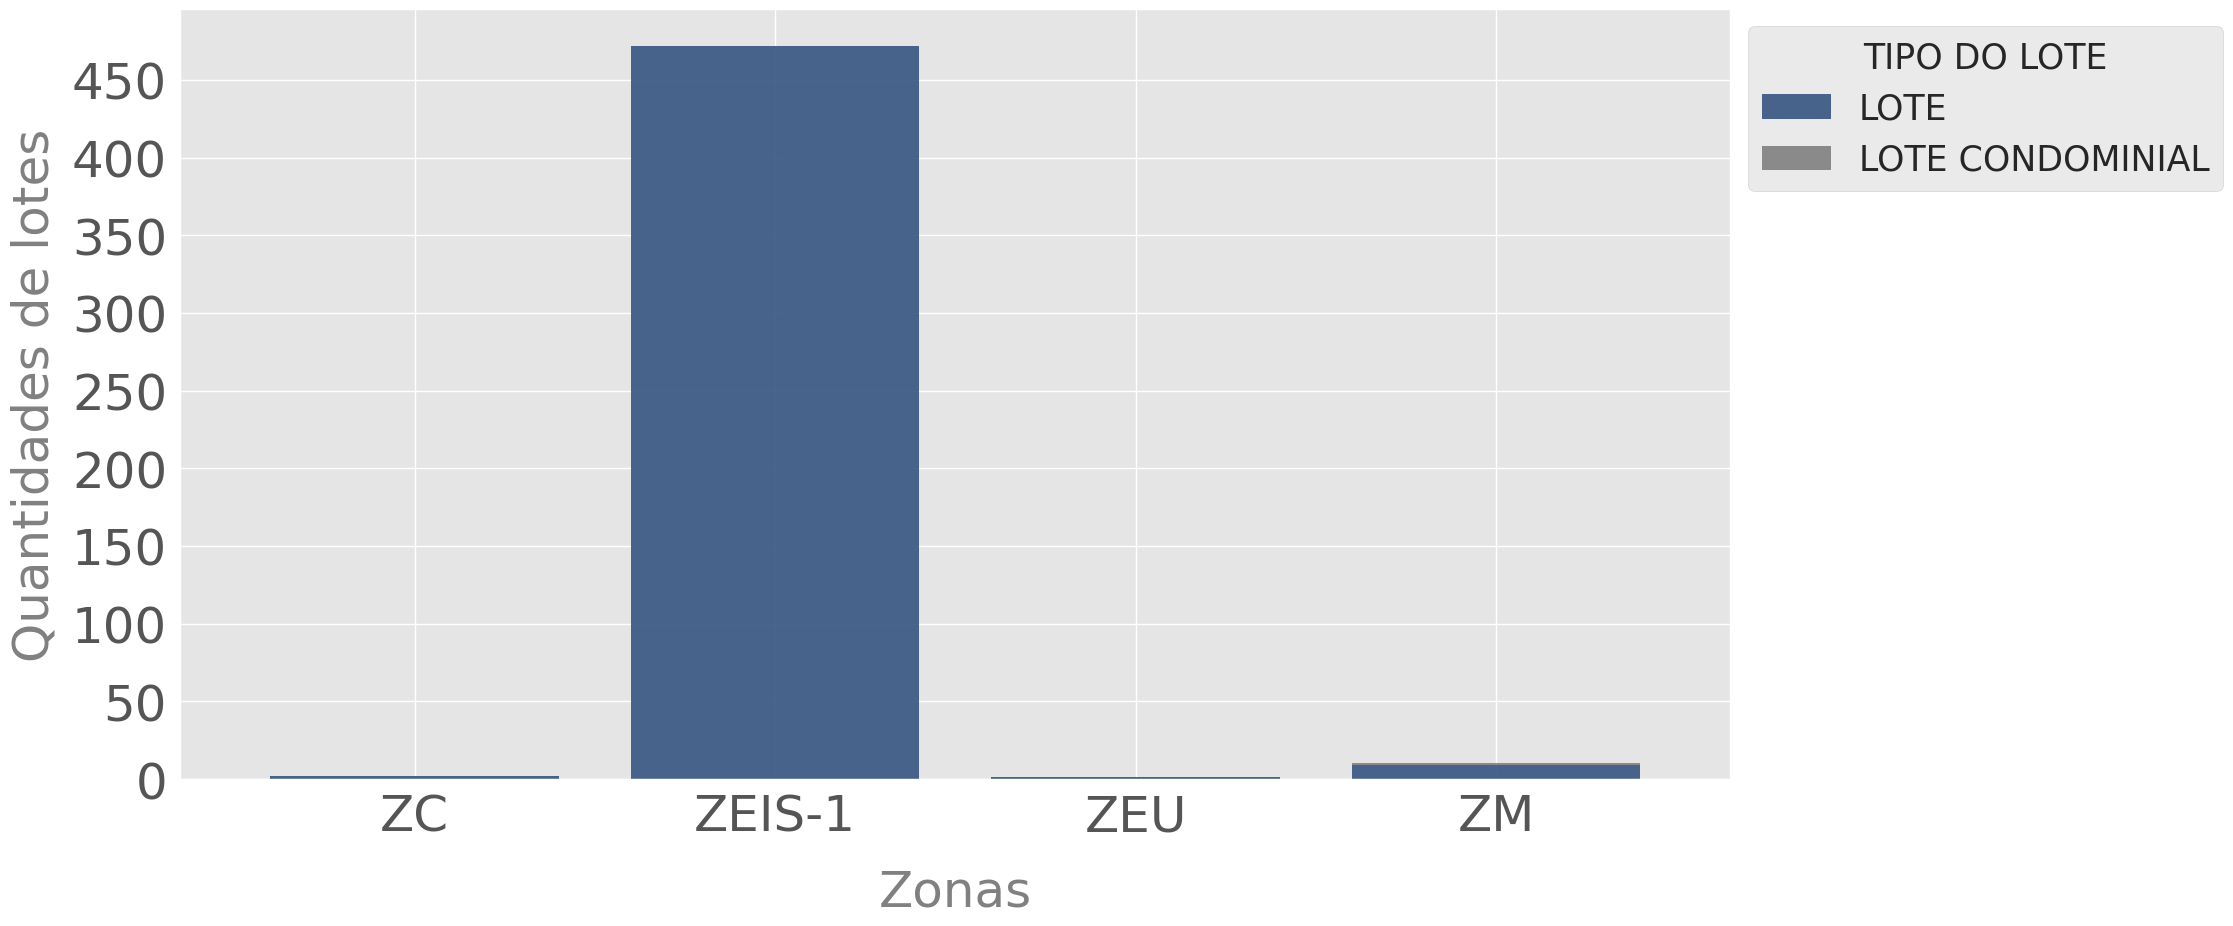

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
FO = FO_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'],edgecolor='None')
FO = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
FO = plt.xticks(rotation= 0 )
FO = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
FO = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
FO = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA CASA VERDE - CV 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'CV'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        12
ZMA        6
ZC         5
ZEIS-1     3
ZERA       2
ZEIS-2     1
ZEU        1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CV_Zonas = dados.query("SGL_SUBP_EDIC == 'CV'")

In [ ]:
CV_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
2196         0              ZC
215          0              ZC
2112         1              ZC
2060         1              ZC
129          0              ZC
161          0          ZEIS-1
38           0          ZEIS-1
110          0          ZEIS-1
2105         1          ZEIS-2
375          0            ZERA
374          0            ZERA
2108         1             ZEU
1970         1              ZM
1973         1              ZM
1971         1              ZM
2069         1              ZM
2124         1              ZM
2131         1              ZM
101          0              ZM
128          0              ZM
2259         0              ZM
2267         0              ZM
203          0              ZM
234          0              ZM
316          0             ZMA
220          0             ZMA
288          0             ZMA
276          0             ZMA
197          0             ZMA
2260         0             ZMA

In [ ]:
CV_Zonas["COD_COND"] = CV_Zonas["COD_COND"].astype(int)

In [ ]:
CV_Zonas["COD_COND"] = CV_Zonas["COD_COND"].astype(str)

In [ ]:
CV_Zonas["COD_COND"]

2196    0
215     0
2112    1
2060    1
129     0
161     0
38      0
110     0
2105    1
375     0
374     0
2108    1
1970    1
1973    1
1971    1
2069    1
2124    1
2131    1
101     0
128     0
2259    0
2267    0
203     0
234     0
316     0
220     0
288     0
276     0
197     0
2260    0
Name: COD_COND, dtype: object

In [ ]:
CV_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    5
5    2
7    1
4    1
6    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
CV_Zonas.query("COD_CNDM_ZON != '0'")["COD_CNDM_ZON"].value_counts()

0    20
1     5
5     2
7     1
4     1
6     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
CV_Cond_Zonas = CV_Zonas.query("COD_COND != '0'")
CV_Cond_Zonas

GEOCODE                  ID  \
2112  RUA STA FAUSTINA, 27,SAO PAULO, SAO PAULO - BR...   75226069060010000   
2060  AV PARADA PINTO, 1680,SAO PAULO, SAO PAULO - B...  305089154261070000   
2105  RUA DR FLEURY SILVEIRA, 300,SAO PAULO, SAO PAU...   76290217956010000   
2108  RUA SILVERIO GONCALVES, 631,SAO PAULO, SAO PAU...   76215131865010000   
1970  RUA DOMINGOS JOSE SAPIENZA, 208,SAO PAULO, SAO...  305046613649050000   
1973   RUA SAGUAIRU, 1250,SAO PAULO, SAO PAULO - BRASIL  306112178322050000   
1971     RUA MANDIBA, 620,SAO PAULO, SAO PAULO - BRASIL   76156125857040000   
2069  RUA ANTONIO DIAS DA SILVA, 443,SAO PAULO, SAO ...  305046736589060000   
2124  RUA MANUEL GARCIA, 48,SAO PAULO, SAO PAULO - B...  306035127027010000   
2131  RUA OURO GROSSO, 954,SAO PAULO, SAO PAULO - BR...   75146152501010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2112           75          226        69060             1             0   
2060          305           89       154261             7             0   
2105           76          290       217956             1             0   
2108           76          215       131865             1             0   
1970          305           46       613649             5             0   
1973          306          112       178322             5             0   
1971           76          156       125857             4             0   
2069          305           46       736589             6             0   
2124          306           35       127027             1             0   
2131           75          146       152501             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2112            CV           CVE             1  ...             NaN   
2060            CV           CAC             1  ...             NaN   
2105            CV           LIM             3  ...             NaN   
2108            CV           LIM             1  ...             NaN   
1970            CV           CAC             2  ...             NaN   
1973            CV           CVE             1  ...             NaN   
1971            CV           CVE             1  ...             NaN   
2069            CV           CAC             1  ...             NaN   
2124            CV           CVE             1  ...             NaN   
2131            CV           CVE             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2112     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2060     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2105     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2108     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1970     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1973     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1971     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2069     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2124     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2131     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
2112  PRIMEIRO QUADRIMESTRE     2022         1  -23,4853308  -46,6550676  
2060  PRIMEIRO QUADRIMESTRE     2022         1  -23,4700677  -46,6542799  
2105  PRIMEIRO QUADRIMESTRE     2022         1  -23,4893848   -46,670402  
2108  PRIMEIRO QUADRIMESTRE     2022         1  -23,4875318   -46,680263  
1970  PRIMEIRO QUADRIMESTRE     2022         1  -23,4682365  -46,6501115  
1973  PRIMEIRO QUADRIMESTRE     2022         1  -23,5115837  -46,6614035  
1971  PRIMEIRO QUADRIMESTRE     2022         1  -23,4868286  -46,6585149  
2069  PRIMEIRO QUADRIMESTRE     2022         1  -23,4662423  -46,6503755  
2124  PRIMEIRO QUADRIMESTRE     2022         1   -23,504269  -46,6544108  
2131  PRIMEIRO QUADRIMESTRE     2022         1  -23,5003361   -46,656478  

[10 rows x 71 columns]

In [ ]:
len(CV_Cond_Zonas) 

10

In [ ]:
FO_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    472
ZM          9
ZC          2
ZEU         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CV_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM        6
ZC        2
ZEIS-2    1
ZEU       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CV_Sem_Cond_Zonas = FO_Zonas.query("COD_COND == '0'")
CV_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
340  RUA PROF MANOEL NOGUEIRA P SOBRINHO , 357,SAO ...  108008031739000132   
334  AVENIDA JOAO PAULO 1, 1300,SAO PAULO, SAO PAUL...  107109345628000051   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
340          108            8        31739             0           132   
334          107          109       345628             0            51   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
340            FO           BRL             2  ...             NaN   
334            FO           FRE             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
340     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
334     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
340  PRIMEIRO QUADRIMESTRE     2022         0  -23,4923562  -46,7316245  
334  PRIMEIRO QUADRIMESTRE     2022         0  -23,4824758  -46,6868317  

[2 rows x 71 columns]

In [ ]:
len(CV_Sem_Cond_Zonas)

484

In [ ]:
len(CV_Zonas)

30

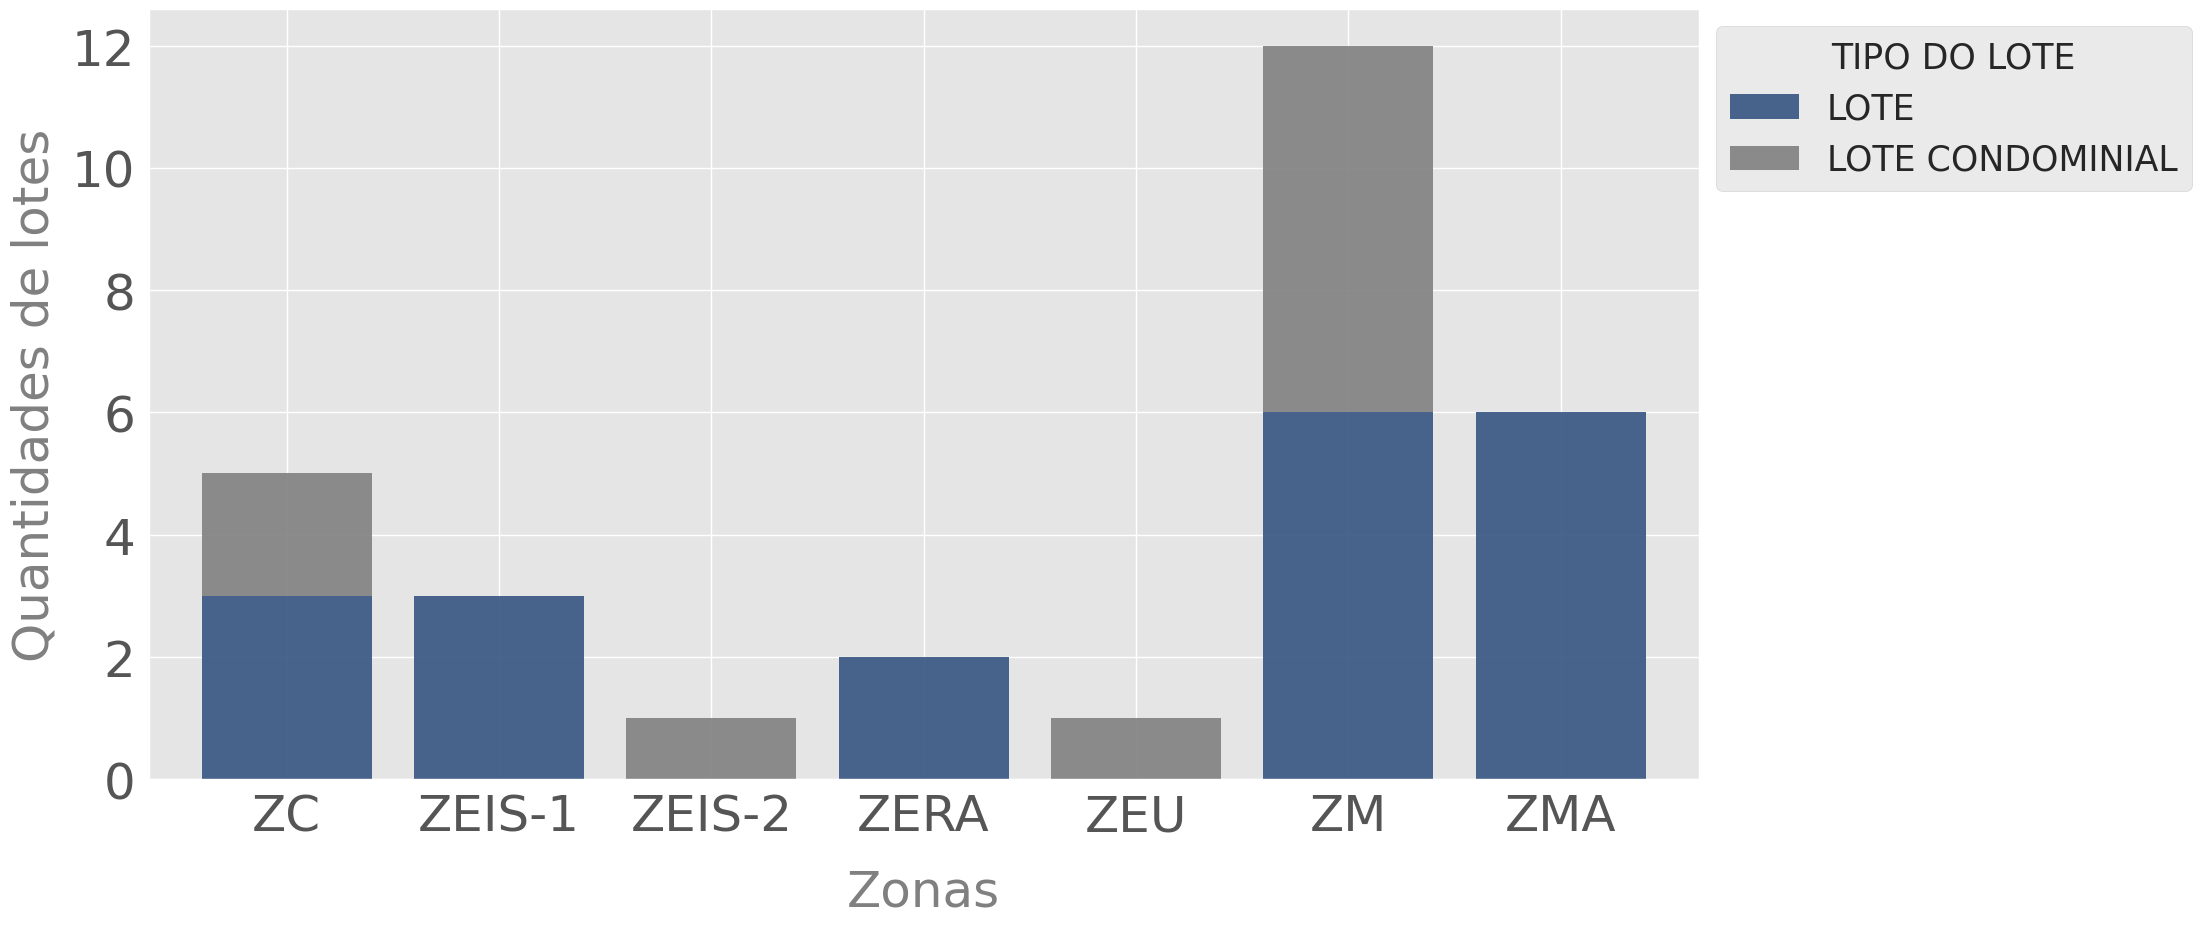

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
CV = CV_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
CV = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
CV = plt.xticks(rotation= 0 )
CV = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
CV = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
CV = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA LAPA - LA

In [ ]:
dados.query("SGL_SUBP_EDIC == 'LA'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        17
ZEU        9
ZC         6
ZER 1      5
ZPI-1      2
ZCOR-1     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
LA_Zonas = dados.query("SGL_SUBP_EDIC == 'LA'")

In [ ]:
LA_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
214          0              ZC
2074         1              ZC
2257         0              ZC
1975         1              ZC
105          0              ZC
48           0              ZC
42           0          ZCOR-1
193          0           ZER 1
68           0           ZER 1
37           0           ZER 1
2149         0           ZER 1
265          0           ZER 1
2076         1             ZEU
2077         1             ZEU
2250         0             ZEU
2145         0             ZEU
108          0             ZEU
1979         1             ZEU
233          0             ZEU
72           0             ZEU
159          0             ZEU
2085         1              ZM
307          0              ZM
216          0              ZM
2058         1              ZM
122          0              ZM
146          0              ZM
1907         0              ZM
1978         1              ZM
2252         0              ZM
2093         1              ZM
2101         1              ZM
2065         1              ZM
2054         1              ZM
2125         1              ZM
336          0              ZM
200          0              ZM
254          0              ZM
192          0           ZPI-1
103          0           ZPI-1

In [ ]:
LA_Zonas["COD_COND"] = LA_Zonas["COD_COND"].astype(int)

In [ ]:
LA_Zonas["COD_COND"] = LA_Zonas["COD_COND"].astype(str)

In [ ]:
LA_Zonas["COD_COND"]

214     0
2074    1
2257    0
1975    1
105     0
48      0
42      0
193     0
68      0
37      0
2149    0
265     0
2076    1
2077    1
2250    0
2145    0
108     0
1979    1
233     0
72      0
159     0
2085    1
307     0
216     0
2058    1
122     0
146     0
1907    0
1978    1
2252    0
2093    1
2101    1
2065    1
2054    1
2125    1
336     0
200     0
254     0
192     0
103     0
Name: COD_COND, dtype: object

In [ ]:
LA_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

5     4
1     3
4     2
10    1
2     1
7     1
8     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
LA_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        17
ZEU        9
ZC         6
ZER 1      5
ZPI-1      2
ZCOR-1     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
LA_Cond_Zonas = LA_Zonas.query("COD_COND != '0'")
LA_Cond_Zonas

GEOCODE                  ID  \
2074  RUA JORGE AMERICANO, 419,SAO PAULO, SAO PAULO ...   80112106631050000   
1975   RUA CORIOLANO, 710,SAO PAULO, SAO PAULO - BRASIL   23048053180050000   
2076       RUA PARIS, 824,SAO PAULO, SAO PAULO - BRASIL   12117155179050000   
2077  RUA DR FRANCO DA ROCHA, 253,SAO PAULO, SAO PAU...   21048019402050000   
1979    RUA APINAJES, 117,SAO PAULO, SAO PAULO - BRASIL   21048019429040000   
2085    RUA IPORANGA, 250,SAO PAULO, SAO PAULO - BRASIL   99013067121010000   
2058  RUA PAULO FRANCO, 153,SAO PAULO, SAO PAULO - B...   80091157481100000   
1978  RUA FORTUNATO FERRAZ, 250,SAO PAULO, SAO PAULO...   98030072931040000   
2093  RUA MARIO WHATELY, 74,SAO PAULO, SAO PAULO - B...   80122135283020000   
2101   RUA CATALUNHA, 435,SAO PAULO, SAO PAULO - BRASIL   82159045888010000   
2065    RUA CAJAIBA, 1036,SAO PAULO, SAO PAULO - BRASIL   12034038873070000   
2054  RUA ANDRE CASADO, 245,SAO PAULO, SAO PAULO - B...   12053013048080000   
2125  RUA URBANO DA SILVA, 58,SAO PAULO, SAO PAULO -...  199016193771010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2074           80          112       106631             5             0   
1975           23           48        53180             5             0   
2076           12          117       155179             5             0   
2077           21           48        19402             5             0   
1979           21           48        19429             4             0   
2085           99           13        67121             1             0   
2058           80           91       157481            10             0   
1978           98           30        72931             4             0   
2093           80          122       135283             2             0   
2101           82          159        45888             1             0   
2065           12           34        38873             7             0   
2054           12           53        13048             8             0   
2125          199           16       193771             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2074            LA           LAP             3  ...             NaN   
1975            LA           LAP             3  ...             NaN   
2076            LA           PRD             3  ...             NaN   
2077            LA           PRD             3  ...             NaN   
1979            LA           PRD             1  ...             NaN   
2085            LA           LAP             2  ...             NaN   
2058            LA           VLE             1  ...             NaN   
1978            LA           LAP             1  ...             NaN   
2093            LA           LAP             1  ...             NaN   
2101            LA           JRE             1  ...             NaN   
2065            LA           PRD             1  ...             NaN   
2054            LA           PRD             1  ...             NaN   
2125            LA           JAG             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2074     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1975     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2076     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2077     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1979     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2085     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2058     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1978     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2093     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2101     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2065     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2054     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2125     SAO PAULO     SAO PAULO          BRASIL  

In [ ]:
len(LA_Cond_Zonas) 

13

In [ ]:
LA_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        9
ZEU       6
ZER 1     5
ZC        4
ZPI-1     2
ZCOR-1    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
LA_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM     8
ZEU    3
ZC     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
LA_Sem_Cond_Zonas = LA_Zonas.query("COD_COND == '0'")
LA_Sem_Cond_Zonas.head(2)

GEOCODE                 ID  \
214   RUA BR DE JUNDIAI, 522,SAO PAULO, SAO PAULO - ...  80062113670000233   
2257     RUA CLELIA, 2158,SAO PAULO, SAO PAULO - BRASIL  23029050725000496   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
214            80           62       113670             0           233   
2257           23           29        50725             0           496   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
214             LA           LAP             1  ...             NaN   
2257            LA           LAP             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
214      SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2257     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
214   PRIMEIRO QUADRIMESTRE     2022         0  -23,5249631  -46,7098478  
2257  PRIMEIRO QUADRIMESTRE     2022         0  -23,5245649  -46,7036087  

[2 rows x 71 columns]

In [ ]:
len(LA_Sem_Cond_Zonas)

27

In [ ]:
len(SO_Zonas)

27

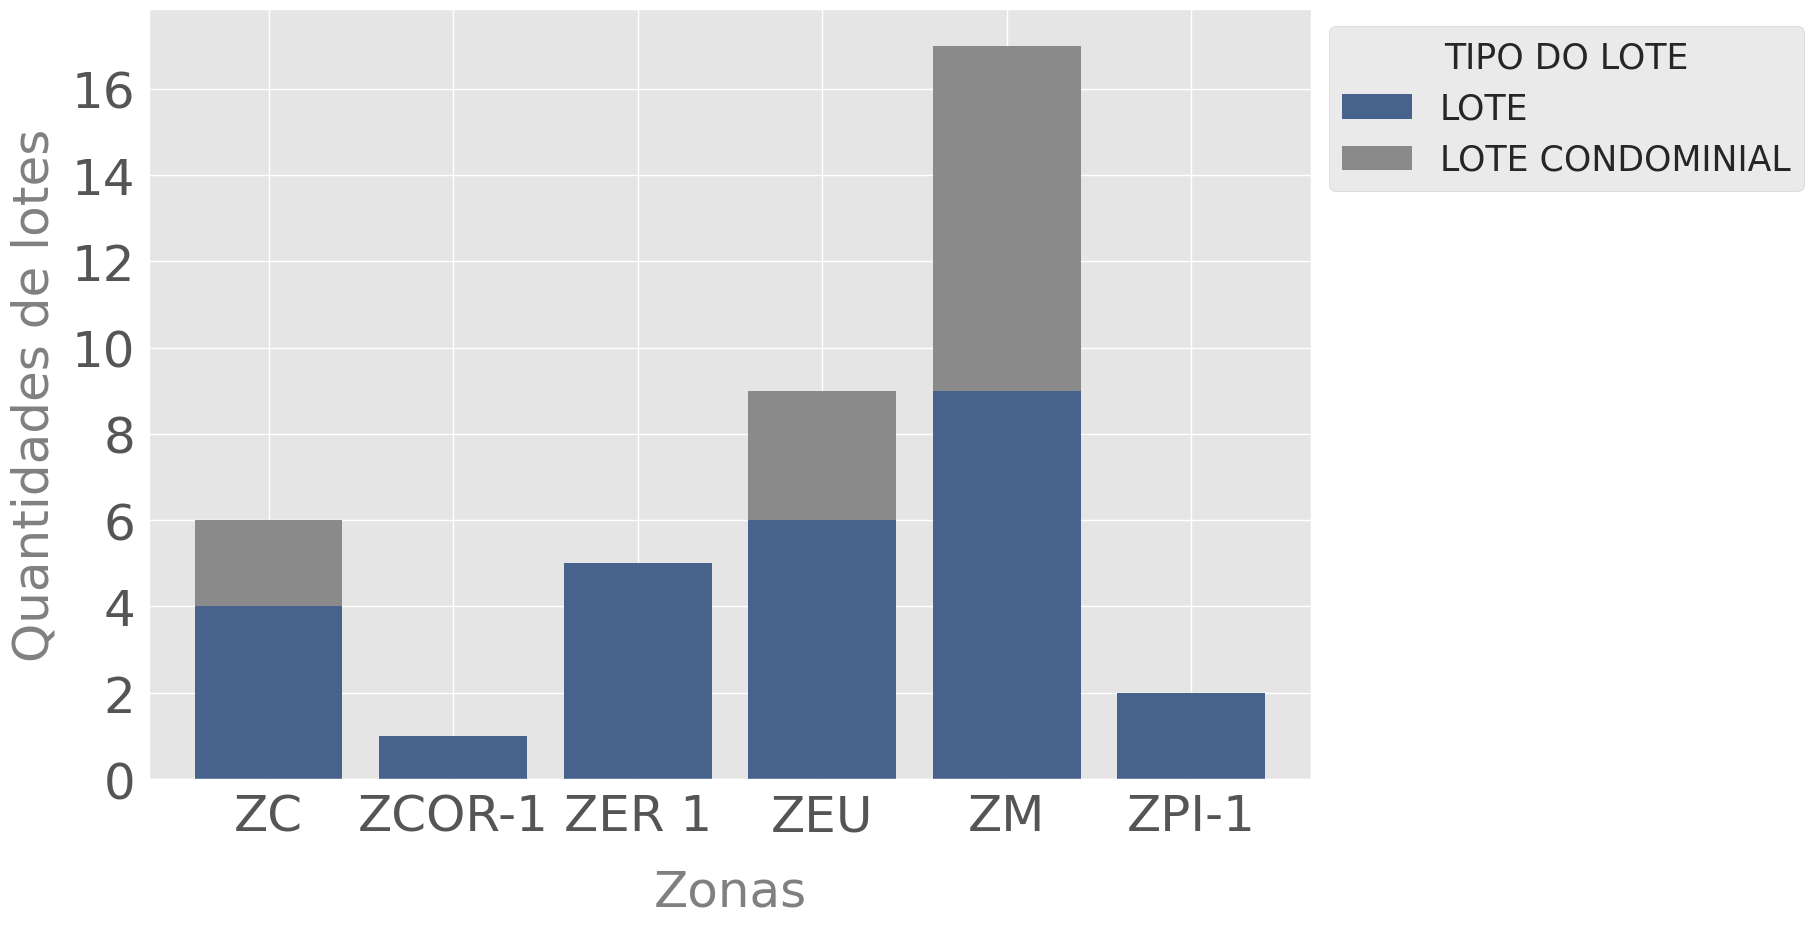

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
LA = LA_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10), width = 0.8, alpha = 0.9,color = ['#365481', 'grey'], edgecolor='None')
LA = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
LA = plt.xticks(rotation= 0 )
LA = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
LA = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
LA = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DO BUTANTÃ - BT 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'BT'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        26
ZEIS-2     4
ZMA        4
ZEU        3
ZCOR-2     2
ZER 1      2
ZC         1
ZPI-1      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
BT_Zonas = dados.query("SGL_SUBP_EDIC == 'BT'")

In [ ]:
BT_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
2247         0              ZC
111          0          ZCOR-2
258          0          ZCOR-2
2079         1          ZEIS-2
1877         0          ZEIS-2
2102         1          ZEIS-2
1878         0          ZEIS-2
309          0           ZER 1
69           0           ZER 1
1874         0             ZEU
1918         0             ZEU
2119         1             ZEU
1901         0              ZM
279          0              ZM
275          0              ZM
272          0              ZM
135          0              ZM
1924         0              ZM
301          0              ZM
2010         1              ZM
337          0              ZM
207          0              ZM
174          0              ZM
163          0              ZM
2120         1              ZM
2049         0              ZM
306          0              ZM
237          0              ZM
1892         0              ZM
2210         0              ZM
16           0              ZM
2235         0              ZM
2236         0              ZM
91           0              ZM
53           0              ZM
114          0              ZM
119          0              ZM
130          0              ZM
46           0             ZMA
45           0             ZMA
116          0             ZMA
71           0             ZMA
297          0           ZPI-1

In [ ]:
BT_Zonas["COD_COND"] = BT_Zonas["COD_COND"].astype(int)

In [ ]:
BT_Zonas["COD_COND"] = BT_Zonas["COD_COND"].astype(str)

In [ ]:
BT_Zonas["COD_COND"]

2247    0
111     0
258     0
2079    1
1877    0
2102    1
1878    0
309     0
69      0
1874    0
1918    0
2119    1
1901    0
279     0
275     0
272     0
135     0
1924    0
301     0
2010    1
337     0
207     0
174     0
163     0
2120    1
2049    0
306     0
237     0
1892    0
2210    0
16      0
2235    0
2236    0
91      0
53      0
114     0
119     0
130     0
46      0
45      0
116     0
71      0
297     0
Name: COD_COND, dtype: object

In [ ]:
BT_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    3
2    2
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
BT_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        26
ZEIS-2     4
ZMA        4
ZEU        3
ZCOR-2     2
ZER 1      2
ZC         1
ZPI-1      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
BT_Cond_Zonas = BT_Zonas.query("COD_COND != '0'")
BT_Cond_Zonas

GEOCODE                  ID  \
2079  RUA MANUEL DIAS DE OLIVEIRA, 59,SAO PAULO, SAO...  159152220612010000   
2102  RUA EDVARD CARMILO, 760,SAO PAULO, SAO PAULO -...  159152062340020000   
2119       RUA JUPITE, 54,SAO PAULO, SAO PAULO - BRASIL  101281114278010000   
2010     RUA CAMINHO, 284,SAO PAULO, SAO PAULO - BRASIL  101499039845020000   
2120  RUA REPUBLICA DO TOGO, 358,SAO PAULO, SAO PAUL...  101186211400010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2079          159          152       220612             1             0   
2102          159          152        62340             2             0   
2119          101          281       114278             1             0   
2010          101          499        39845             2             0   
2120          101          186       211400             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2079            BT           VSO             1  ...             NaN   
2102            BT           VSO             1  ...             NaN   
2119            BT           VSO             3  ...             NaN   
2010            BT           VSO             2  ...             NaN   
2120            BT           BUT             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2079     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2102     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2119     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2010     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2120     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
2079  PRIMEIRO QUADRIMESTRE     2022         1   -23,597119  -46,7535545  
2102  PRIMEIRO QUADRIMESTRE     2022         1  -23,5974918  -46,7535545  
2119  PRIMEIRO QUADRIMESTRE     2022         1  -23,5717688  -46,6337351  
2010  PRIMEIRO QUADRIMESTRE     2022         1  -23,5970813  -46,7349278  
2120  PRIMEIRO QUADRIMESTRE     2022         1  -23,5865906  -46,7344047  

[5 rows x 71 columns]

In [ ]:
len(BT_Cond_Zonas) 

5

In [ ]:
BT_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        24
ZMA        4
ZCOR-2     2
ZEIS-2     2
ZER 1      2
ZEU        2
ZC         1
ZPI-1      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
BT_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-2    2
ZM        2
ZEU       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
BT_Sem_Cond_Zonas = BT_Zonas.query("COD_COND == '0'")
BT_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
2247  VIA RAPOSO TAVARES, 6250,SAO PAULO, SAO PAULO ...  160277168785000502   
111   AVENIDA MORUMBI, 2250,SAO PAULO, SAO PAULO - B...  101455142670000061   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2247          160          277       168785             0           502   
111           101          455       142670             0            61   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2247            BT           RPE             3  ...             NaN   
111             BT           MOR             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2247     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
111      SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
2247  PRIMEIRO QUADRIMESTRE     2022         0  -22,1526576  -51,3872233  
111   PRIMEIRO QUADRIMESTRE     2022         0   -23,594593  -46,7072421  

[2 rows x 71 columns]

In [ ]:
len(BT_Sem_Cond_Zonas)

38

In [ ]:
len(BT_Zonas)

43

In [ ]:
BT_Zonas.query("SGL_ZONA_01_ZON == '99'")["SGL_ZONA_01_ZON"]
BT_Zonas['SGL_ZONA_01_ZON'].replace('99', 'INDEFINIDO', inplace=True)

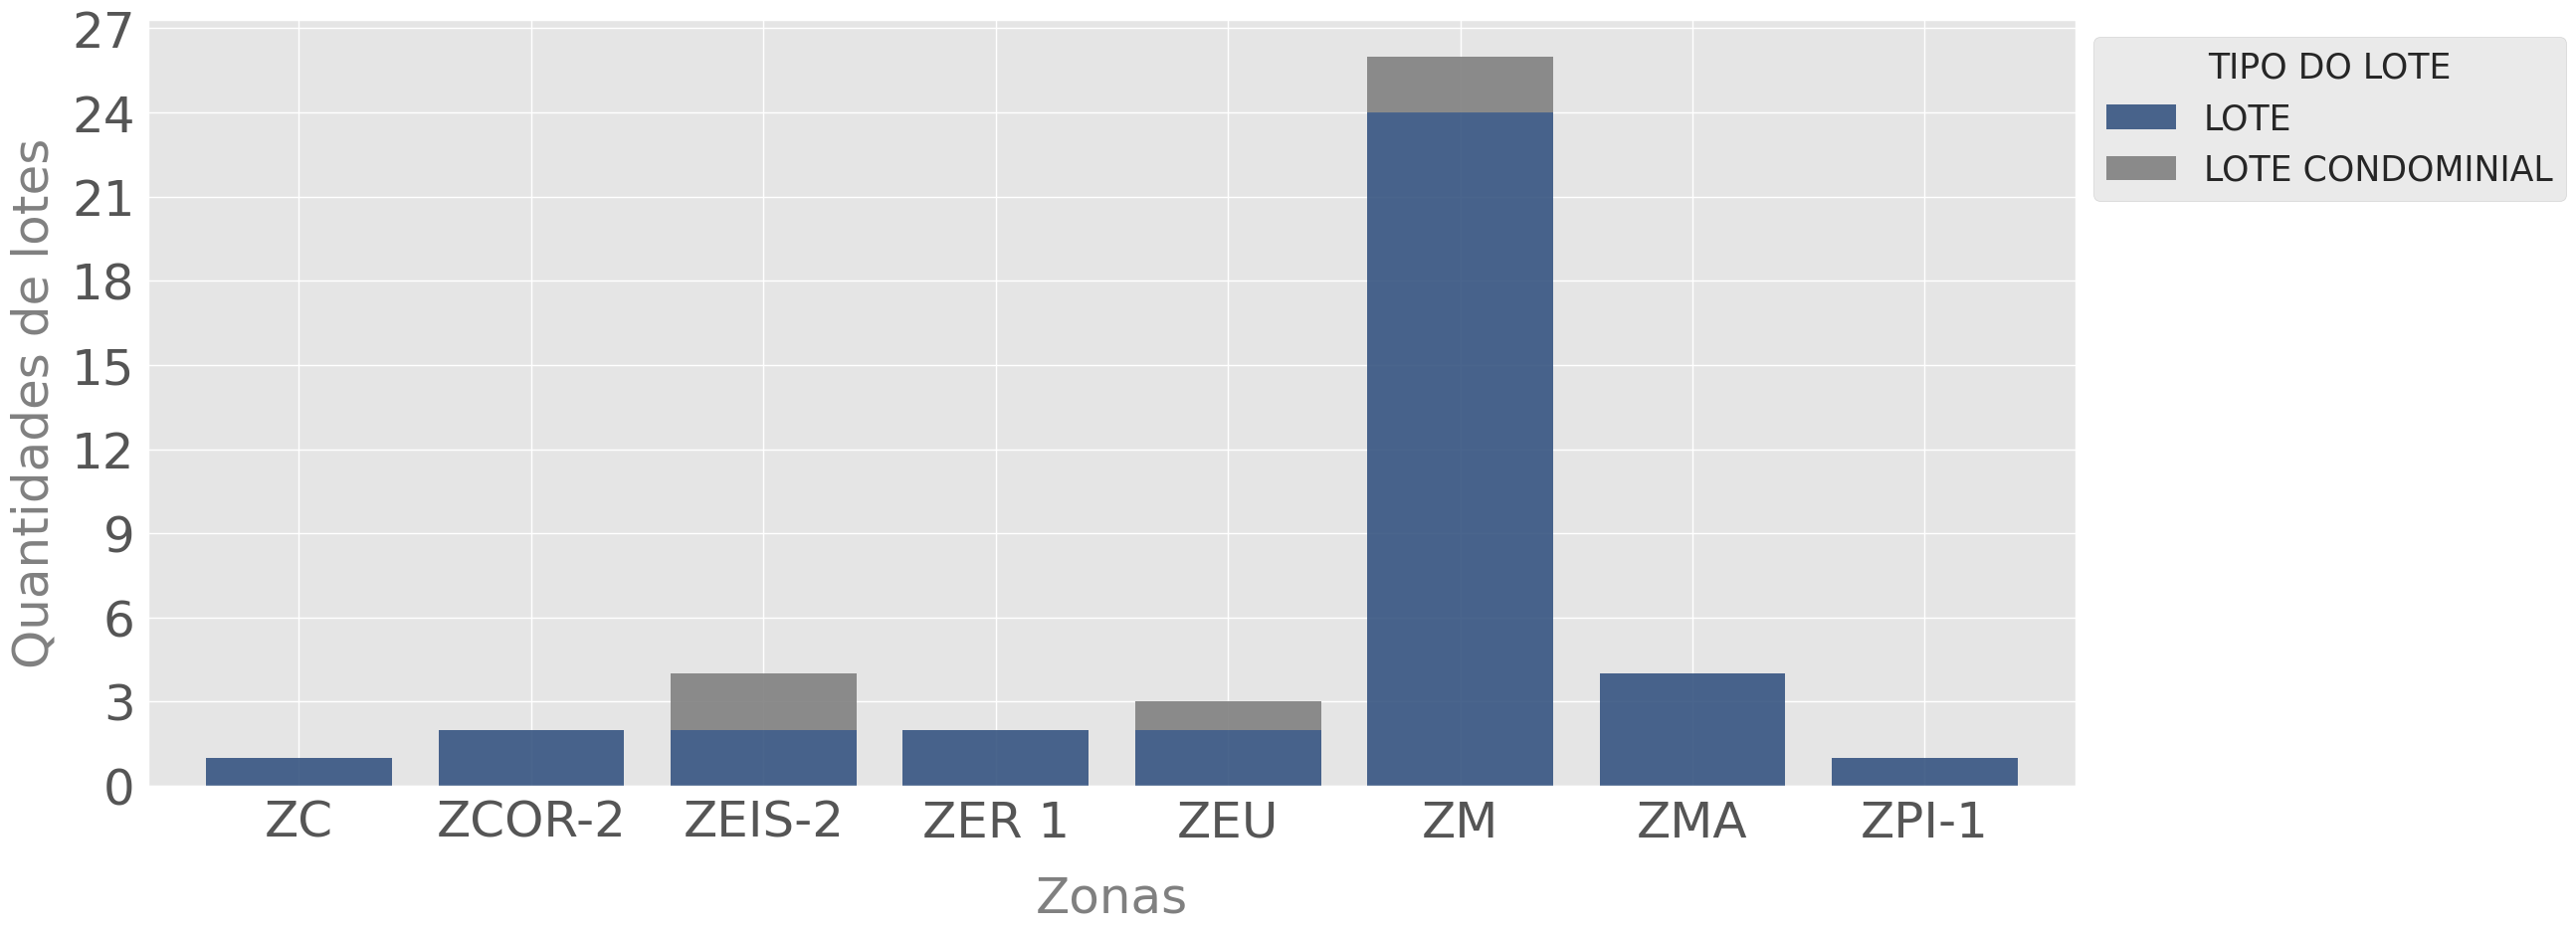

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
BT = BT_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
BT = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
BT = plt.xticks(rotation= 0 )
BT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
BT = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
BT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE PINHEIROS - PI 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'PI'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        13
ZER 1      9
ZEU        7
ZC         4
ZCOR-1     3
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PI_Zonas = dados.query("SGL_SUBP_EDIC == 'PI'")

In [ ]:
PI_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1900         0              ZC
2053         1              ZC
1981         1              ZC
358          0              ZC
2211         0          ZCOR-1
162          0          ZCOR-1
1987         1          ZCOR-1
115          0           ZER 1
177          0           ZER 1
2098         1           ZER 1
2129         1           ZER 1
2237         0           ZER 1
2254         0           ZER 1
2130         1           ZER 1
2295         0           ZER 1
47           0           ZER 1
1915         0             ZEU
1983         1             ZEU
1933         0             ZEU
50           0             ZEU
157          0             ZEU
2114         1             ZEU
2044         1             ZEU
205          0              ZM
67           0              ZM
2070         1              ZM
173          0              ZM
2228         0              ZM
57           0              ZM
2064         1              ZM
259          0              ZM
1894         0              ZM
1904         0              ZM
212          0              ZM
1974         1              ZM
249          0              ZM

In [ ]:
PI_Zonas["COD_COND"] = PI_Zonas["COD_COND"].astype(int)

In [ ]:
PI_Zonas["COD_COND"] = PI_Zonas["COD_COND"].astype(str)

In [ ]:
PI_Zonas["COD_COND"]

1900    0
2053    1
1981    1
358     0
2211    0
162     0
1987    1
115     0
177     0
2098    1
2129    1
2237    0
2254    0
2130    1
2295    0
47      0
1915    0
1983    1
1933    0
50      0
157     0
2114    1
2044    1
205     0
67      0
2070    1
173     0
2228    0
57      0
2064    1
259     0
1894    0
1904    0
212     0
1974    1
249     0
Name: COD_COND, dtype: object

In [ ]:
PI_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1     3
3     2
9     1
2     1
4     1
17    1
6     1
8     1
5     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
PI_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        13
ZER 1      9
ZEU        7
ZC         4
ZCOR-1     3
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PI_Cond_Zonas = PI_Zonas.query("COD_COND != '0'")
PI_Cond_Zonas

GEOCODE                 ID  \
2053  RUA CAPOTE VALENTE, 655,SAO PAULO, SAO PAULO -...  13014042005090000   
1981    RUA BACAETAVA, 35,SAO PAULO, SAO PAULO - BRASIL  85036026875030000   
1987  AV PROF FONSECA RODRUGUES, 298,SAO PAULO, SAO ...  81184072575030000   
2098  RUA JACAREZINHO, 329,SAO PAULO, SAO PAULO - BR...  83064097608020000   
2129  RUA CAMPO VERDE, 579,SAO PAULO, SAO PAULO - BR...  83195040371010000   
2130  RUA JACAREZINHO, 355,SAO PAULO, SAO PAULO - BR...  83064097608010000   
1983  RUA MELO ALVES, 268,SAO PAULO, SAO PAULO - BRASIL  13017137952040000   
2114  RUA JOAO ALBERTO MOREIRA, 55,SAO PAULO, SAO PA...  81245165859010000   
2044  RUA JOSE MARIA LISBOA, 757,SAO PAULO, SAO PAUL...  14050110787170000   
2070  RUA MOURATO COELHO, 1410,SAO PAULO, SAO PAULO ...  81165142824060000   
2064      AL SANTOS, 1978,SAO PAULO, SAO PAULO - BRASIL  10069177911080000   
1974  RUA FRANZ SCHUBERT, 180,SAO PAULO, SAO PAULO -...  83207075973050000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
2053           13           14        42005             9             0   
1981           85           36        26875             3             0   
1987           81          184        72575             3             0   
2098           83           64        97608             2             0   
2129           83          195        40371             1             0   
2130           83           64        97608             1             0   
1983           13           17       137952             4             0   
2114           81          245       165859             1             0   
2044           14           50       110787            17             0   
2070           81          165       142824             6             0   
2064           10           69       177911             8             0   
1974           83          207        75973             5             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
2053            PI           JDP             2  ...             NaN   
1981            PI           IBI             3  ...             NaN   
1987            PI           API             2  ...             NaN   
2098            PI           PIN             1  ...             NaN   
2129            PI           PIN             1  ...             NaN   
2130            PI           PIN             1  ...             NaN   
1983            PI           JDP             1  ...             NaN   
2114            PI           PIN             1  ...             NaN   
2044            PI           JDP             2  ...             NaN   
2070            PI           PIN             1  ...             NaN   
2064            PI           JDP             2  ...             NaN   
1974            PI           PIN             2  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
2053     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1981     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1987     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2098     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2129     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2130     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1983     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2114     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2044     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2070     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
2064     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
1974     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
2053  PRIMEIRO QUADRIMESTRE     2022         1  -23,5563725   -46,676985  
1981  PRIMEIRO QUADRIMESTRE     2022         1  -23,6205347  -46,6942671  
1987  PRIMEIRO QUADRIMESTRE     2022         1  -23,5511744  -

In [ ]:
len(PI_Cond_Zonas) 

12

In [ ]:
PI_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        10
ZER 1      6
ZEU        4
ZC         2
ZCOR-1     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PI_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZER 1     3
ZEU       3
ZM        3
ZC        2
ZCOR-1    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PI_Sem_Cond_Zonas = PI_Zonas.query("COD_COND == '0'")
PI_Sem_Cond_Zonas.head(2)

GEOCODE                 ID  \
1900  RUA CARDEAL ARCOVERDE, 1980,SAO PAULO, SAO PAU...  81229021490000448   
358   AVENIDA DAS NACOES UNIDAS, 11181,SAO PAULO, SA...  85621062383000048   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1900           81          229        21490             0           448   
358            85          621        62383             0            48   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1900            PI           PIN             1  ...             NaN   
358             PI           IBI             2  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1900     SAO PAULO     SAO PAULO          BRASIL     NOROESTE   
358      SAO PAULO     SAO PAULO          BRASIL     NOROESTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1900  PRIMEIRO QUADRIMESTRE     2022         0   -23,562611  -46,6902335  
358   PRIMEIRO QUADRIMESTRE     2022         0  -23,5994727  -46,6937368  

[2 rows x 71 columns]

In [ ]:
len(PI_Sem_Cond_Zonas)

24

In [ ]:
len(PI_Zonas)

36

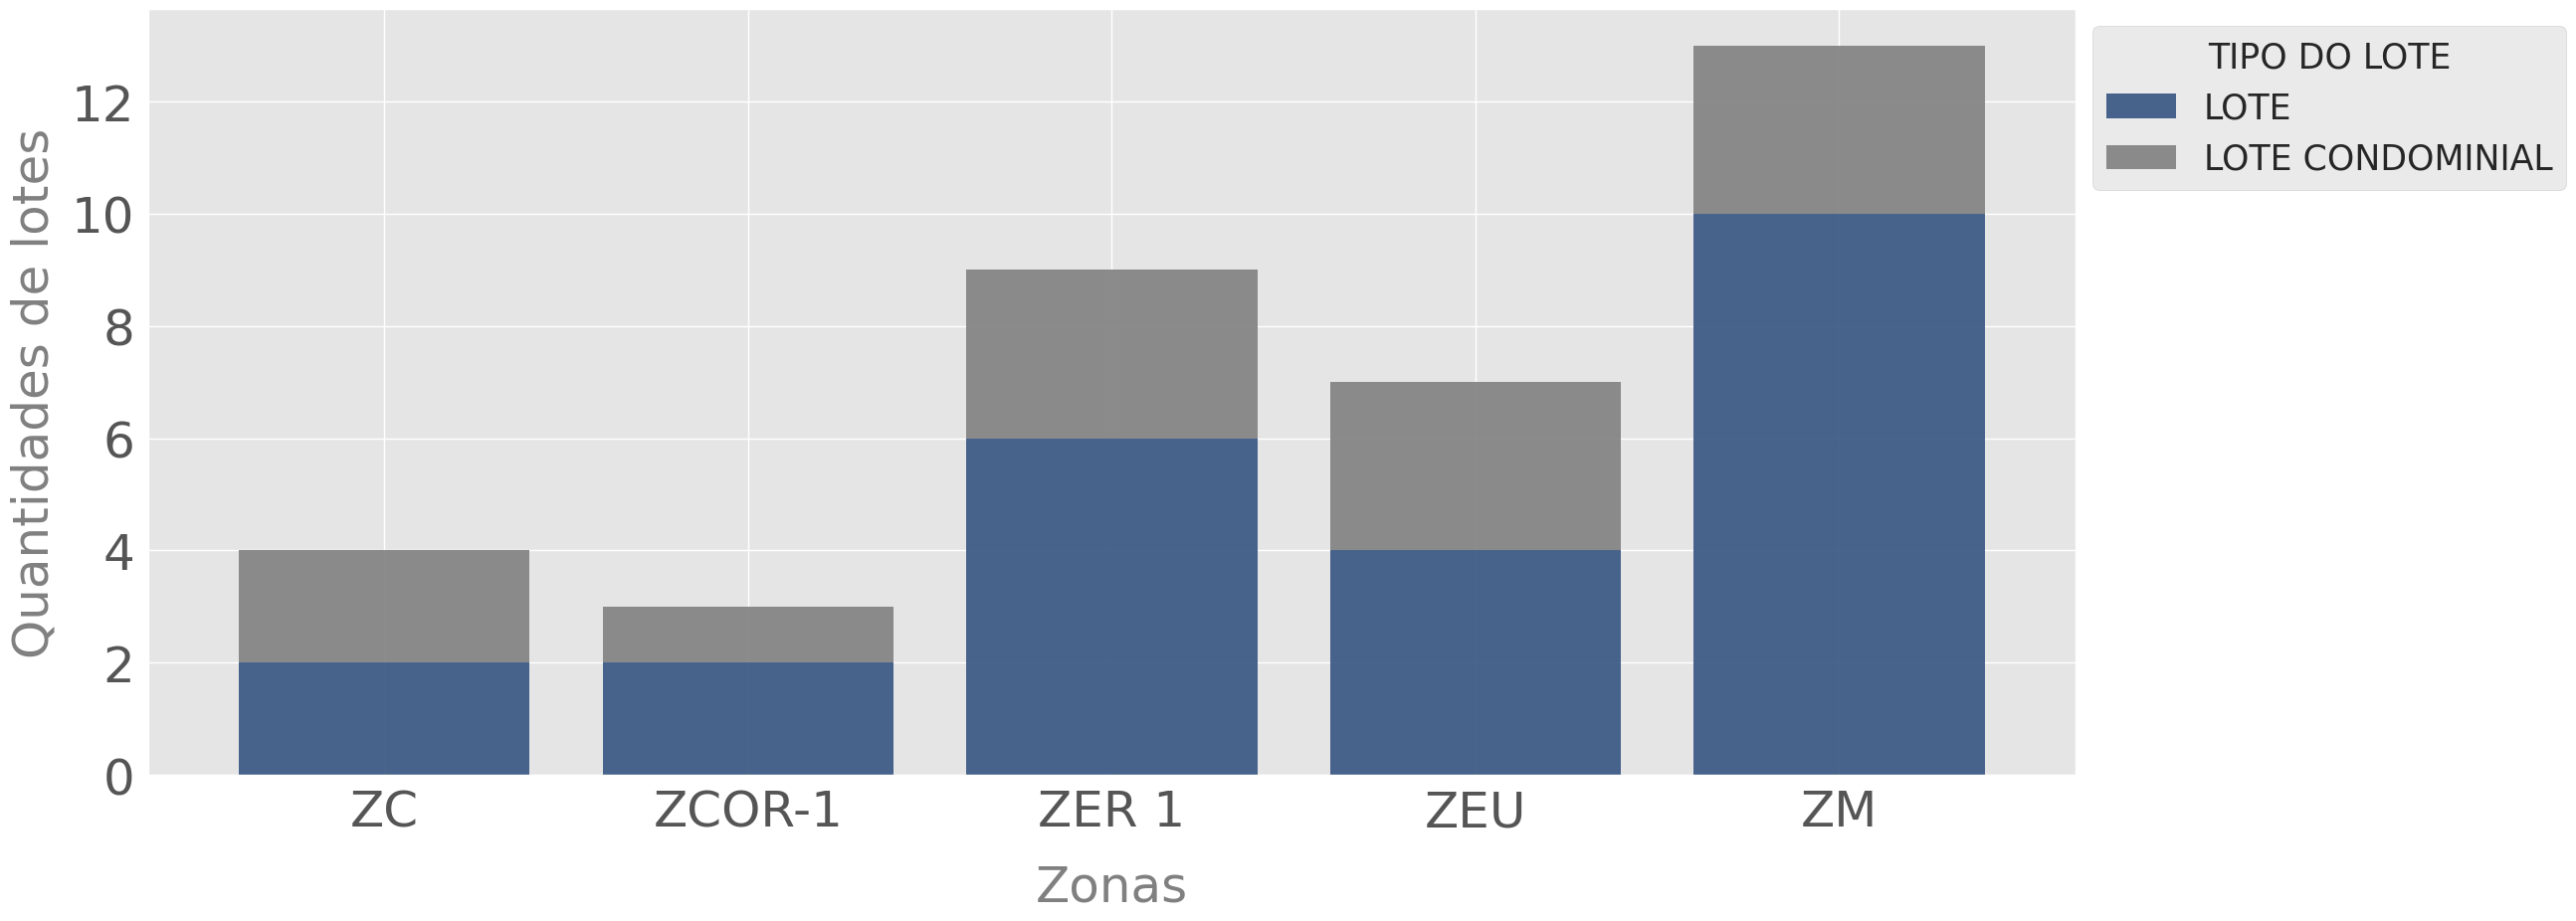

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PI = PI_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(25, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PI = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PI = plt.xticks(rotation= 0 )
PI = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PI = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
PI = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LESTE-1 

##LOTES D SUBPREFEITURA DA PENHA - PE 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'PE'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM            51
ZEU           25
ZC            11
ZEUP           7
ZMA            7
ZEIS-1         5
INDEFINIDO     2
ZEIS-5         2
ZEIS-3         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PE_Zonas = dados.query("SGL_SUBP_EDIC == 'PE'")

In [ ]:
PE_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
777          0      INDEFINIDO
776          1      INDEFINIDO
1272         0              ZC
1652         1              ZC
1618         1              ZC
...        ...             ...
1025         0             ZMA
1028         0             ZMA
1029         0             ZMA
1027         0             ZMA
1026         0             ZMA

[111 rows x 2 columns]

In [ ]:
PE_Zonas["COD_COND"] = PE_Zonas["COD_COND"].astype(int)

In [ ]:
PE_Zonas["COD_COND"] = PE_Zonas["COD_COND"].astype(str)

In [ ]:
PE_Zonas["COD_COND"]

777     0
776     1
1272    0
1652    1
1618    1
       ..
1025    0
1028    0
1029    0
1027    0
1026    0
Name: COD_COND, Length: 111, dtype: object

In [ ]:
PE_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

2    15
1    14
3    10
4     5
6     3
5     2
7     2
8     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
PE_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM            51
ZEU           25
ZC            11
ZEUP           7
ZMA            7
ZEIS-1         5
INDEFINIDO     2
ZEIS-5         2
ZEIS-3         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
PE_Cond_Zonas = PE_Zonas.query("COD_COND != '0'")
PE_Cond_Zonas

GEOCODE                  ID  \
776   RUA ALOANDIA , 297,\nSAO PAULO, SAO PAULO - BR...  113454008060010000   
1652    RUA HERCILIA, 122,SAO PAULO, SAO PAULO - BRASIL   57092087254010000   
1618  RUA GREGORIO SOUZA, 356,SAO PAULO, SAO PAULO -...   58161289639030000   
1617    RUA PARANHOS, 265,SAO PAULO, SAO PAULO - BRASIL   58162154784030000   
1621  RUA DR PELAGIO MARQUES, 279,SAO PAULO, SAO PAU...   57074160318030000   
1631  AV DR BERNARDINHO BRITO F DE CARVALHO, 1187,SA...   58220447420020000   
1608   RUA SINANDUVA, 443,SAO PAULO, SAO PAULO - BRASIL   59179183210040000   
1648  RUA JOSE MASCARENHAS, 1828,SAO PAULO, SAO PAUL...   58122110981010000   
1624  RUA MARIA CARLOTA, 171,SAO PAULO, SAO PAULO - ...   59054131776020000   
913   RUA NOVA FRIBURGO , 404,\nSAO PAULO, SAO PAULO...  110158147729020000   
912     RUA BASTOS, 111,\nSAO PAULO, SAO PAULO - BRASIL  110158366730010000   
911   RUA NOVA FRIBURGO, 178,\nSAO PAULO, SAO PAULO ...  110153147729010000   
778   RUA CARACARAI, 141,\nSAO PAULO, SAO PAULO - BR...  113083042080050000   
1644    AV CANGAIBA, 3564,SAO PAULO, SAO PAULO - BRASIL   59002041289010000   
918   RUA JULIO SAYAGO, 147,\nSAO PAULO, SAO PAULO -...  113433113565030000   
919   RUA JULIO SAYAGO, 157,\nSAO PAULO, SAO PAULO -...  113433113565040000   
938   RUA CAPIACACI, 107,\nSAO PAULO, SAO PAULO - BR...   61157041963020000   
1650  RUA SERRA DA PRATA, 142,SAO PAULO, SAO PAULO -...   58257180629010000   
1602  RUA FILIPE GALVAO, 180,SAO PAULO, SAO PAULO - ...   58016069744060000   
1627  RUA S SERAPIAO, 436,SAO PAULO, SAO PAULO - BRASIL   59142180122020000   
925   RUA JOSE GIORDANO , 469,\nSAO PAULO, SAO PAULO...  113517109959030000   
924   RUA JOSE GIORDANO , 461,\nSAO PAULO, SAO PAULO...  113517109959020000   
1633      RUA RODEIO, 158,SAO PAULO, SAO PAULO - BRASIL   57008172537020000   
1645  RUA STO HENRIQUE, 236,SAO PAULO, SAO PAULO - B...   59243086703010000   
1598     RUA ALMERIA, 660,SAO PAULO, SAO PAULO - BRASIL   58016007986080000   
1619  RUA ALMEIDA BRANDAO, 255,SAO PAULO, SAO PAULO ...   58057007781030000   
1600     RUA ALMERIA, 670,SAO PAULO, SAO PAULO - BRASIL   58016007986070000   
959   AVENIDA BUENOS AIRES , 72,\nSAO PAULO, SAO PAU...  110121037028030000   
953   RUA CAPITAO AVELINO CARNEIRO , 419,\nSAO PAULO...   61015026271020000   
1020  RUA DOUTOR NELSON MADUREIRA , 78,\nSAO PAULO, ...  113134144860030000   
1609          RUA MOE, 70,SAO PAULO, SAO PAULO - BRASIL   59105140830040000   
1010  RUA SERIEMA , 356,\nSAO PAULO, SAO PAULO - BRASIL  142085180440020000   
1601  RUA JOAQUIM MARRA, 1960,SAO PAULO, SAO PAULO -...   58152105813060000   
1599  RUA JOAQUIM MARRA, 1918,SAO PAULO, SAO PAULO -...   58152105813070000   
1613  RUA ZELIA MOREIRA DAMANTE, 306,SAO PAULO, SAO ...   59156200573030000   
1635  RUA PERDO DE ARAUJO, 90,SAO PAULO, SAO PAULO -...   57262159000020000   
1628        RUA TARU, 513,SAO PAULO, SAO PAULO - BRASIL   59103187232020000   
1603  RUA ANTONIO SAMPAIO FERRAZ, 99,SAO PAULO, SAO ...   58224018660060000   
1643      RUA ISABEL, 428,SAO PAULO, SAO PAULO - BRASIL   59057096890010000   
1604         RUA MOE, 206,SAO PAULO, SAO PAULO - BRASIL   59105140830050000   
961     RUA XAPURI, 434,\nSAO PAULO, SAO PAULO - BRASIL  113082199753040000   
1611   RUA S PROSPERO, 68,SAO PAULO, SAO PAULO - BRASIL   57267166626040000   
1009  RUA LEONARDO DE PISA , 95,\nSAO PAULO, SAO PAU...  142060117366010000   
960     RUA XAPURI, 426,\nSAO PAULO, SAO PAULO - BRASIL  113082199753030000   
989   RUA DONA LEA , 38,\nSAO PAULO, SAO PAULO - BRASIL  113611355771010000   
983    RUA IBOREPI, 107,\nSAO PAULO, SAO PAULO - BRASIL  113492089621020000   
981   RUA TIBALDO PEREIRA , 121,\nSAO PAULO, SAO PAU...  113564189049010000   
962   RUA FAUSTO FIGUEIRA DE MELO , 142,\nSAO PAULO,...  113134069205010000   
1626        RUA TARU, 167,SAO PAULO, SAO PAULO - BRASIL   59162187232020000   
1019  RUA FAUSTO FIGUEIRA DE MELO , 140,\nSAO PAULO,...  113134069205020000   
1013  RUA FRANCISCO

In [ ]:
len(PE_Cond_Zonas) 


52

In [ ]:
len(PE_Zonas)

111

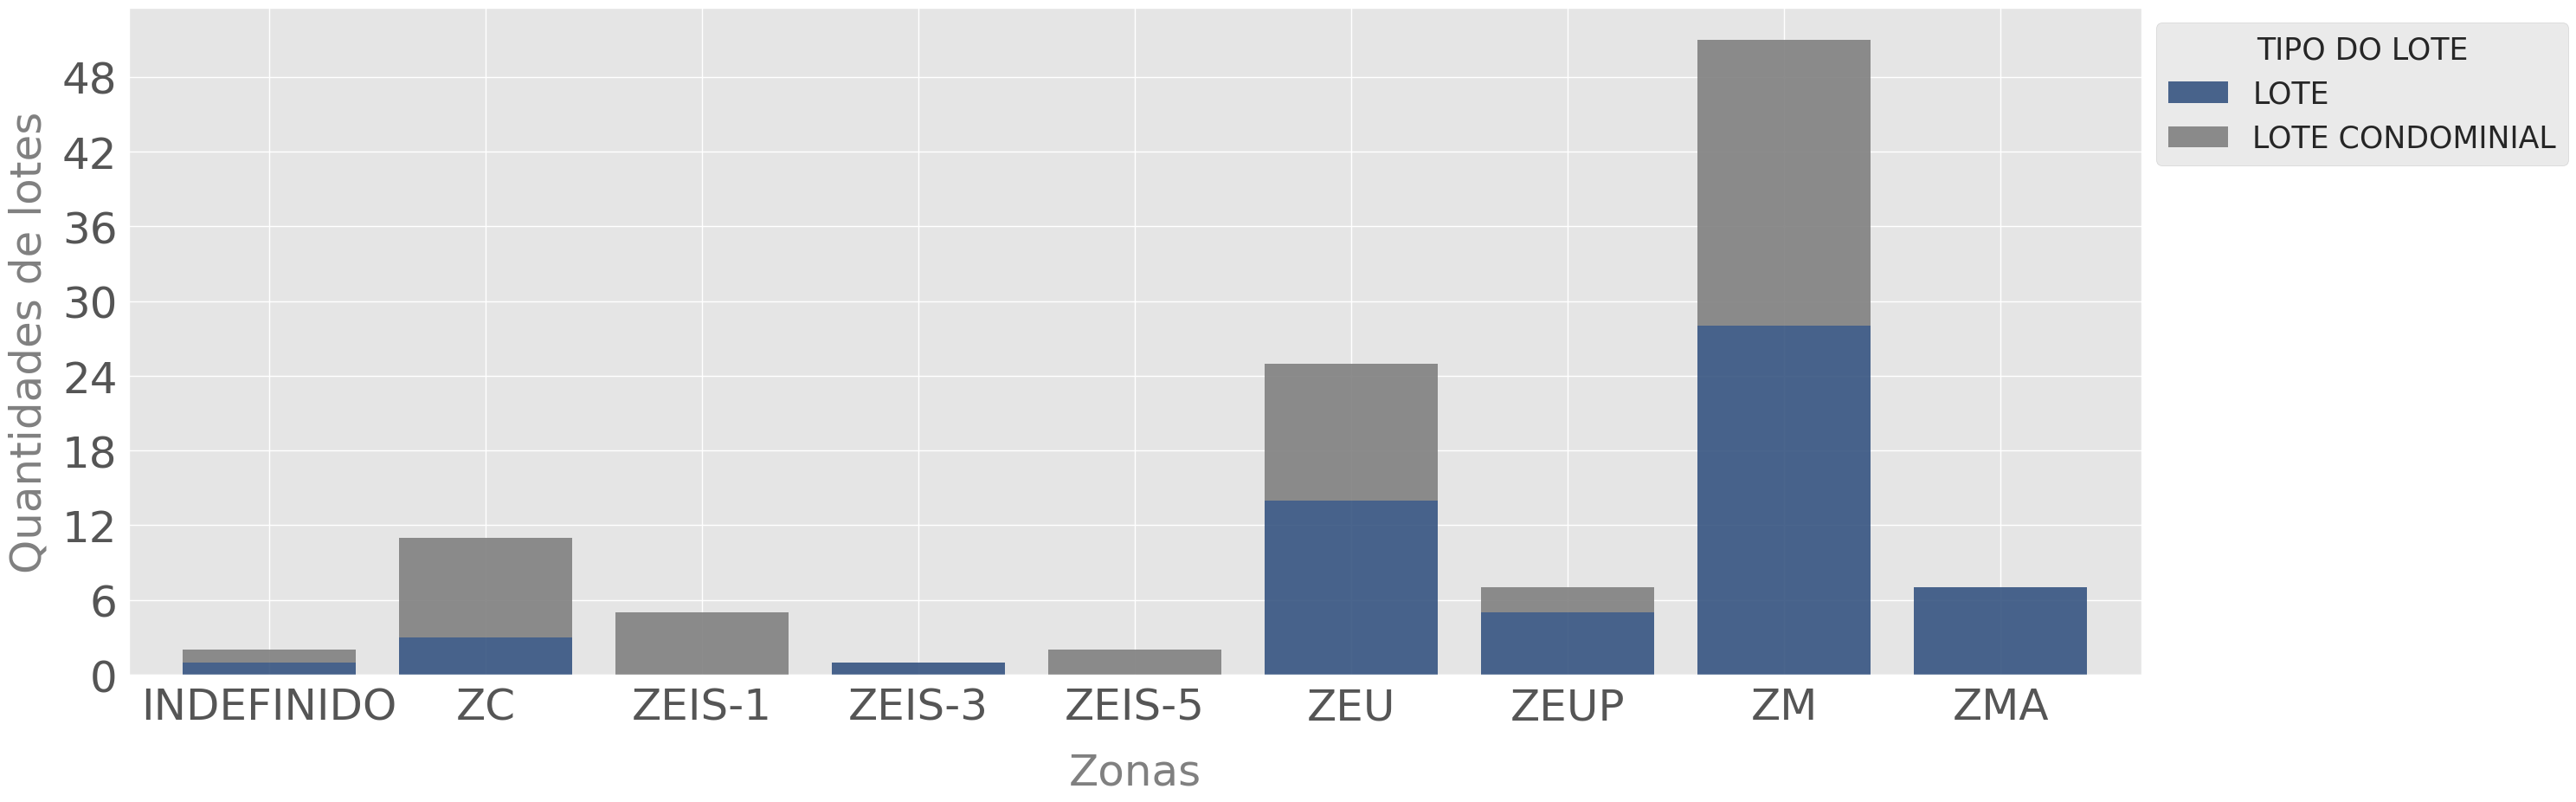

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
PE = PE_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(30, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
PE = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
PE = plt.xticks(rotation= 0 )
PE = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
PE = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
PE = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA MOOCA - MO 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'MO'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura

ZM        18
ZEU       17
ZDE-1     14
ZC        10
ZEUP       6
ZEIS-3     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MO_Zonas = dados.query("SGL_SUBP_EDIC == 'MO'")

In [ ]:
MO_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1625         1              ZC
1612         1              ZC
1607         1              ZC
1280         0              ZC
1142         0              ZC
...        ...             ...
1542         0              ZM
1642         1              ZM
1637         1              ZM
1636         1              ZM
1591         0              ZM

[67 rows x 2 columns]

In [ ]:
MO_Zonas["COD_COND"] = MO_Zonas["COD_COND"].astype(int)

In [ ]:
MO_Zonas["COD_COND"] = MO_Zonas["COD_COND"].astype(str)

In [ ]:
MO_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

2    5
3    4
1    4
4    2
9    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
MO_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        18
ZEU       17
ZDE-1     14
ZC        10
ZEUP       6
ZEIS-3     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MO_Zonas["COD_COND"]

1625    1
1612    1
1607    1
1280    0
1142    0
       ..
1542    0
1642    1
1637    1
1636    1
1591    0
Name: COD_COND, Length: 67, dtype: object

In [ ]:
MO_Cond_Zonas = MO_Zonas.query("COD_COND != '0'")
MO_Cond_Zonas

GEOCODE                  ID  \
1625  RUA MARTIM BURCHARD, 187,SAO PAULO, SAO PAULO ...    3016135895020000   
1612  RUA DOMINGOS PAIVA, 152,SAO PAULO, SAO PAULO -...    3016060461030000   
1607  RUA MARTIM BURCHARD, 201,SAO PAULO, SAO PAULO ...    3016135895040000   
1646  RUA MARQ DE ABRANTES, 247,SAO PAULO, SAO PAULO...   29018000701010000   
943   RUA MONSENHOR JOAQUIM DE CAMPOS, 53,\nSAO PAUL...  102054105384040000   
1614  RUA SERRA DA BOCAINA, 287,SAO PAULO, SAO PAULO...   29049180564030000   
1641  RUA PDE ESTEVAO PERNET, 112,SAO PAULO, SAO PAU...   30073066796020000   
1651     RUA JAIBARAS, 66,SAO PAULO, SAO PAULO - BRASIL   27052098558010000   
955   RUA PITANGUI, 216,\nSAO PAULO, SAO PAULO - BRASIL   62110163996090000   
956   RUA SAO FELIPE, 39,\nSAO PAULO, SAO PAULO - BR...   62122069566030000   
1017  RUA SILVIO DE SOUSA, 122,\nSAO PAULO, SAO PAUL...  102067182796030000   
1655  RUA MIGUEL MOTA, 332,SAO PAULO, SAO PAULO - BR...   52060139351010000   
1649  RUA FRANCISCO MARENGO, 1210,SAO PAULO, SAO PAU...   54082074888010000   
1642  RUA MIGUEL MOTA, 296,SAO PAULO, SAO PAULO - BR...   52060139351020000   
1637   RUA CD PRATES, 834,SAO PAULO, SAO PAULO - BRASIL   32068165824020000   
1636  RUA ARTUR BERNARDES, 676,SAO PAULO, SAO PAULO ...   53051023450020000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1625            3           16       135895             2             0   
1612            3           16        60461             3             0   
1607            3           16       135895             4             0   
1646           29           18          701             1             0   
943           102           54       105384             4             0   
1614           29           49       180564             3             0   
1641           30           73        66796             2             0   
1651           27           52        98558             1             0   
955            62          110       163996             9             0   
956            62          122        69566             3             0   
1017          102           67       182796             3             0   
1655           52           60       139351             1             0   
1649           54           82        74888             1             0   
1642           52           60       139351             2             0   
1637           32           68       165824             2             0   
1636           53           51        23450             2             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1625            MO           BRS             1  ...             NaN   
1612            MO           BRS             1  ...             NaN   
1607            MO           BRS             1  ...             NaN   
1646            MO           BEL             2  ...             NaN   
943             MO           ARA             1  ...             NaN   
1614            MO           BEL             2  ...             NaN   
1641            MO           TAT             2  ...             NaN   
1651            MO           MOO             1  ...             NaN   
955             MO           TAT             1  ...             NaN   
956             MO           TAT             2  ...             NaN   
1017            MO           ARA             1  ...             NaN   
1655            MO           ARA             1  ...             NaN   
1649            MO           TAT             2  ...             NaN   
1642            MO           ARA             1  ...             NaN   
1637            MO           MOO             1  ...             NaN   
1636            MO           ARA             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1625     SAO PAULO     SAO PAULO          BRASIL        NORTE   
1612     SAO PAULO     SAO PAULO          BRASIL        NORTE   
1607     SAO PAULO     SA

In [ ]:
len(MO_Cond_Zonas)

16

In [ ]:
MO_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZDE-1     14
ZEU       13
ZM        12
ZC         6
ZEUP       4
ZEIS-3     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MO_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()


ZM      6
ZC      4
ZEU     4
ZEUP    2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MO_Sem_Cond_Zonas = MO_Zonas.query("COD_COND == '0'")
MO_Sem_Cond_Zonas.head(2)

GEOCODE                ID  \
1280  RUA DA ALFANDEGA, 435,\nSAO PAULO, SAO PAULO -...  2038006661000134   
1142  RUA DA ALFANDEGA, 425,\nSAO PAULO, SAO PAULO -...  2038006661000133   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1280            2           38         6661             0           134   
1142            2           38         6661             0           133   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1280            MO           BRS             2  ...             NaN   
1142            MO           BRS             3  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1280     SAO PAULO     SAO PAULO          BRASIL        NORTE   
1142     SAO PAULO     SAO PAULO          BRASIL        NORTE   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1280  PRIMEIRO QUADRIMESTRE     2022         0  -23,5406904  -46,6249484  
1142  PRIMEIRO QUADRIMESTRE     2022         0  -23,5408081   -46,624939  

[2 rows x 71 columns]

In [ ]:
len(MO_Sem_Cond_Zonas)

51

In [ ]:
len(MO_Zonas)

67

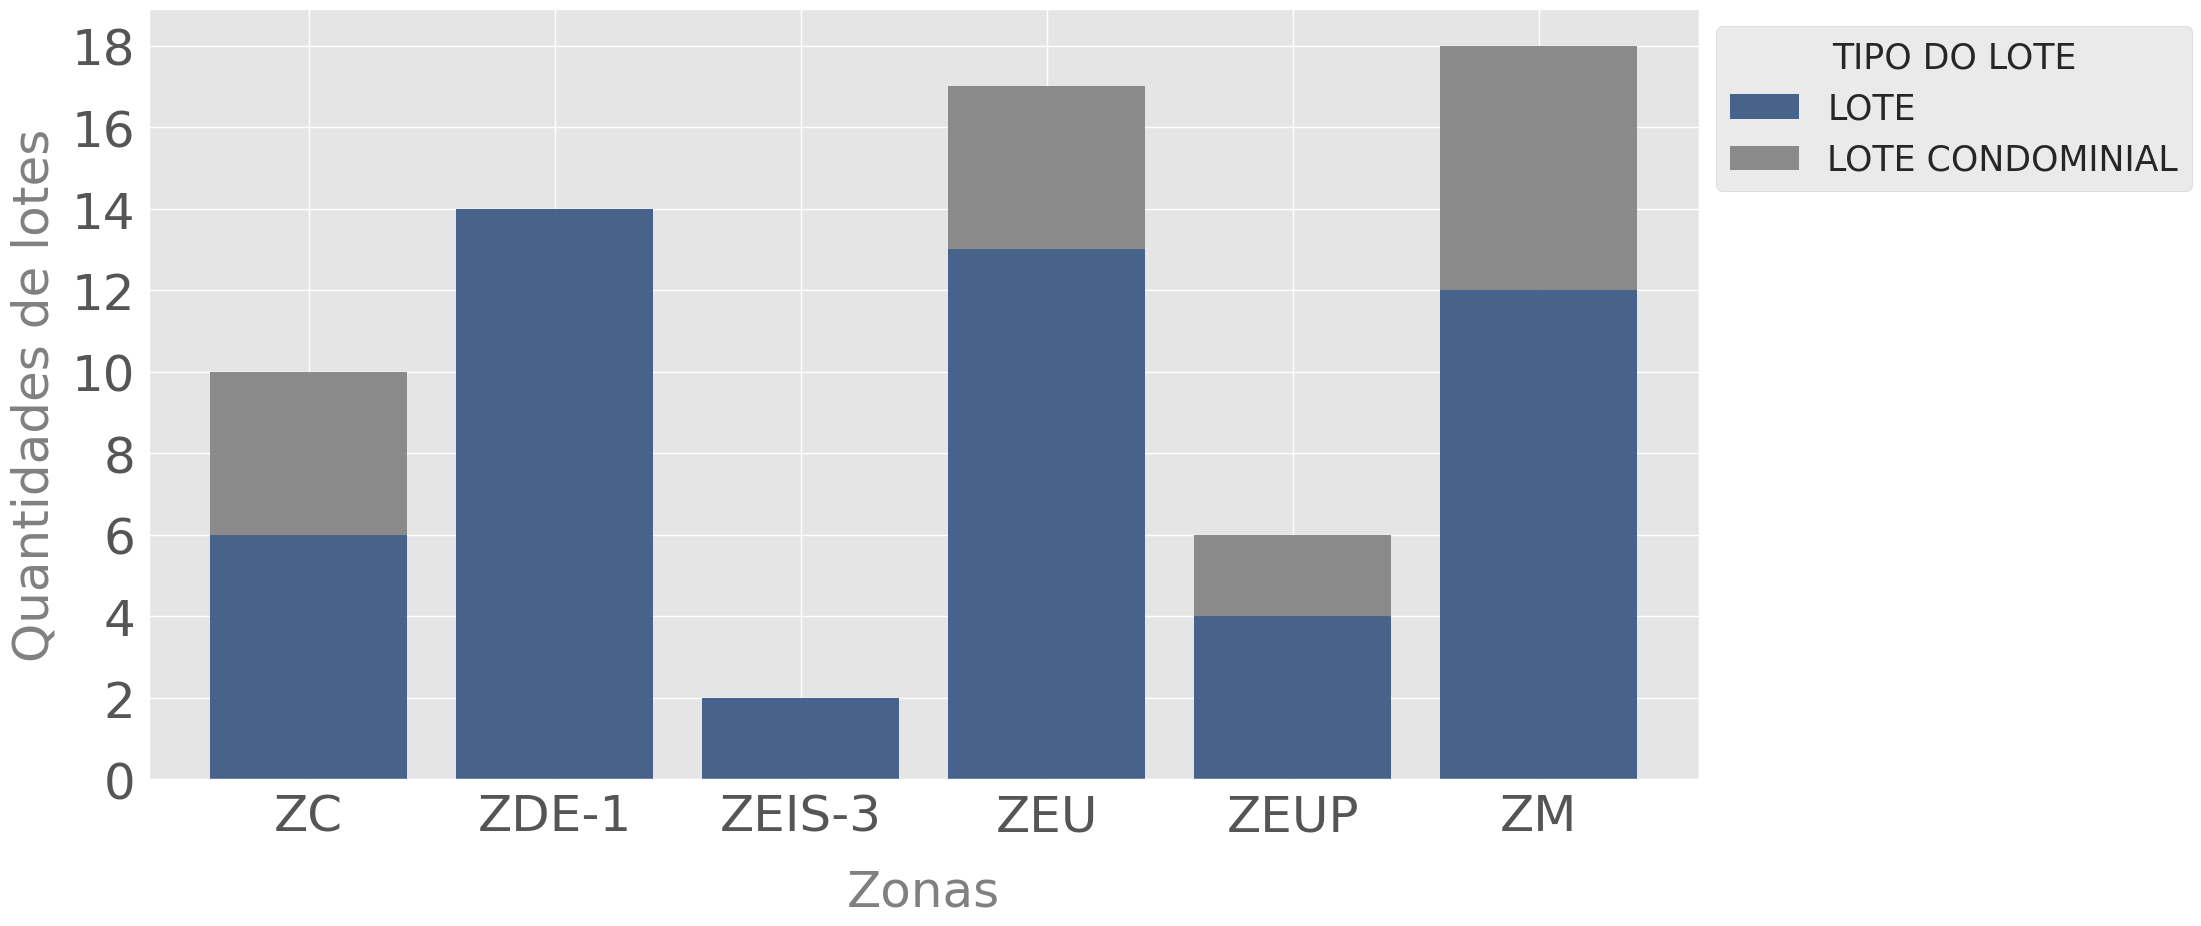

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MO= MO_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
MO = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MO = plt.xticks(rotation= 0 )
MO = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MO = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
MO = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DE ARICANDUVA - AR 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'AR'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        39
ZEU        5
ZEIS-3     3
ZC         1
ZEIS-1     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AR_Zonas = dados.query("SGL_SUBP_EDIC == 'AR'")

In [ ]:
AR_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1623         1              ZC
910          0          ZEIS-1
914          0          ZEIS-3
916          0          ZEIS-3
915          0          ZEIS-3
1610         1             ZEU
1590         0             ZEU
1654         1             ZEU
1030         0             ZEU
1605         1             ZEU
987          0              ZM
988          0              ZM
990          1              ZM
991          1              ZM
992          0              ZM
994          0              ZM
1079         0              ZM
1085         0              ZM
1653         1              ZM
1638         1              ZM
986          0              ZM
1620         1              ZM
1615         1              ZM
1606         1              ZM
1578         0              ZM
1629         1              ZM
1274         0              ZM
1352         0              ZM
1087         0              ZM
1088         0              ZM
1131         0              ZM
1133         0              ZM
1616         1              ZM
984          0              ZM
980          0              ZM
979          0              ZM
1052         0              ZM
996          1              ZM
997          1              ZM
995          0              ZM
1000         1              ZM
999          0              ZM
985          0              ZM
993          1              ZM
975          0              ZM
976          0              ZM
977          0              ZM
978          0              ZM
1113         0              ZM

In [ ]:
AR_Zonas["COD_COND"] = AR_Zonas["COD_COND"].astype(int)

In [ ]:
AR_Zonas["COD_COND"] = AR_Zonas["COD_COND"].astype(str)

In [ ]:
AR_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    5
2    4
4    3
3    3
5    2
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
AR_Zonas["COD_COND"]

1623    1
910     0
914     0
916     0
915     0
1610    1
1590    0
1654    1
1030    0
1605    1
987     0
988     0
990     1
991     1
992     0
994     0
1079    0
1085    0
1653    1
1638    1
986     0
1620    1
1615    1
1606    1
1578    0
1629    1
1274    0
1352    0
1087    0
1088    0
1131    0
1133    0
1616    1
984     0
980     0
979     0
1052    0
996     1
997     1
995     0
1000    1
999     0
985     0
993     1
975     0
976     0
977     0
978     0
1113    0
Name: COD_COND, dtype: object

In [ ]:
AR_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        39
ZEU        5
ZEIS-3     3
ZC         1
ZEIS-1     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AR_Cond_Zonas = AR_Zonas.query("COD_COND != '0'")
AR_Cond_Zonas

GEOCODE                  ID  \
1623  RUA JOAO CHRISOSTOMO FILHO, 85,SAO PAULO, SAO ...   56216093734020000   
1610        RUA LOBO, 141,SAO PAULO, SAO PAULO - BRASIL   55095119512040000   
1654   RUA PRIMICIAS, 111,SAO PAULO, SAO PAULO - BRASIL   56039166243010000   
1605    RUA CABRALIA, 151,SAO PAULO, SAO PAULO - BRASIL   55095037583050000   
990   RUA RENATO RINALDI, 1766,\nSAO PAULO, SAO PAUL...  116092169900040000   
991   RUA CORONEL JOSE LOPES DE TOLEDO, 738,\nSAO PA...  116409157031010000   
1653    AV MONTEMAGMO, 48,SAO PAULO, SAO PAULO - BRASIL   53289141968010000   
1638  RUA ALVES DE ALMEDA, 546,SAO PAULO, SAO PAULO ...   53289009172020000   
1620  RUA STA BLANDINA, 83,SAO PAULO, SAO PAULO - BR...   54164033928030000   
1615         RUA IRU, 332,SAO PAULO, SAO PAULO - BRASIL   55201093602030000   
1606  RUA JOAO DIAS TEIXEIRA, 26,SAO PAULO, SAO PAUL...   53128118583050000   
1629  AL RAINHA SANTA, 91,SAO PAULO, SAO PAULO - BRASIL   55145168424020000   
1616  RUA DOS POVOADORES, 276,SAO PAULO, SAO PAULO -...   55403165611030000   
996   RUA ALEXANDRE FARNESIO , 58,\nSAO PAULO, SAO P...  116284006335010000   
997   RUA REGO BARROS , 1276,\nSAO PAULO, SAO PAULO ...  116328169560020000   
1000  RUA PETROBRAS, 1027,\nSAO PAULO, SAO PAULO - B...  116486161837040000   
993   RUA HORACIO RODRIGUES , 175,\nSAO PAULO, SAO P...  116148088412010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1623           56          216        93734             2             0   
1610           55           95       119512             4             0   
1654           56           39       166243             1             0   
1605           55           95        37583             5             0   
990           116           92       169900             4             0   
991           116          409       157031             1             0   
1653           53          289       141968             1             0   
1638           53          289         9172             2             0   
1620           54          164        33928             3             0   
1615           55          201        93602             3             0   
1606           53          128       118583             5             0   
1629           55          145       168424             2             0   
1616           55          403       165611             3             0   
996           116          284         6335             1             0   
997           116          328       169560             2             0   
1000          116          486       161837             4             0   
993           116          148        88412             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1623            AR           CAR             1  ...             NaN   
1610            AR           CAR             1  ...             NaN   
1654            AR           CAR             1  ...             NaN   
1605            AR           CAR             1  ...             NaN   
990             AR           CAR             1  ...             NaN   
991             AR           ARI             1  ...             NaN   
1653            AR           VFO             1  ...             NaN   
1638            AR           VFO             1  ...             NaN   
1620            AR           CAR             2  ...             NaN   
1615            AR           VFO             1  ...             NaN   
1606            AR           VFO             1  ...             NaN   
1629            AR           CAR             1  ...             NaN   
1616            AR           VFO             1  ...             NaN   
996             AR           ARI             1  ...             NaN   
997             AR           ARI             1  ...             NaN   
1000            AR           ARI             1  ...             NaN   
993             AR           VFO             1  ...             NaN

In [ ]:
len(AR_Cond_Zonas) 

17

In [ ]:
AR_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        26
ZEIS-3     3
ZEU        2
ZEIS-1     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AR_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM     13
ZEU     3
ZC      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
AR_Sem_Cond_Zonas = AR_Zonas.query("COD_COND == '0'")
AR_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
910  RUA ADELINO FRANCISCO PEDRAS, 6,\nSAO PAULO, S...  116542705829000241   
914  RUA ANTONIO NETO CALDEIRA, 129,\nSAO PAULO, SA...  116532147885000031   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
910          116          542       705829             0           241   
914          116          532       147885             0            31   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
910            AR           ARI             1  ...             NaN   
914            AR           ARI             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
910     SAO PAULO     SAO PAULO          BRASIL      LESTE 1   
914     SAO PAULO     SAO PAULO          BRASIL      LESTE 1   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
910  PRIMEIRO QUADRIMESTRE     2022         0  -23,5730567  -46,5206338  
914  PRIMEIRO QUADRIMESTRE     2022         0  -23,5731998   -46,518627  

[2 rows x 71 columns]

In [ ]:
len(AR_Sem_Cond_Zonas)

32

In [ ]:
len(AR_Zonas)

49

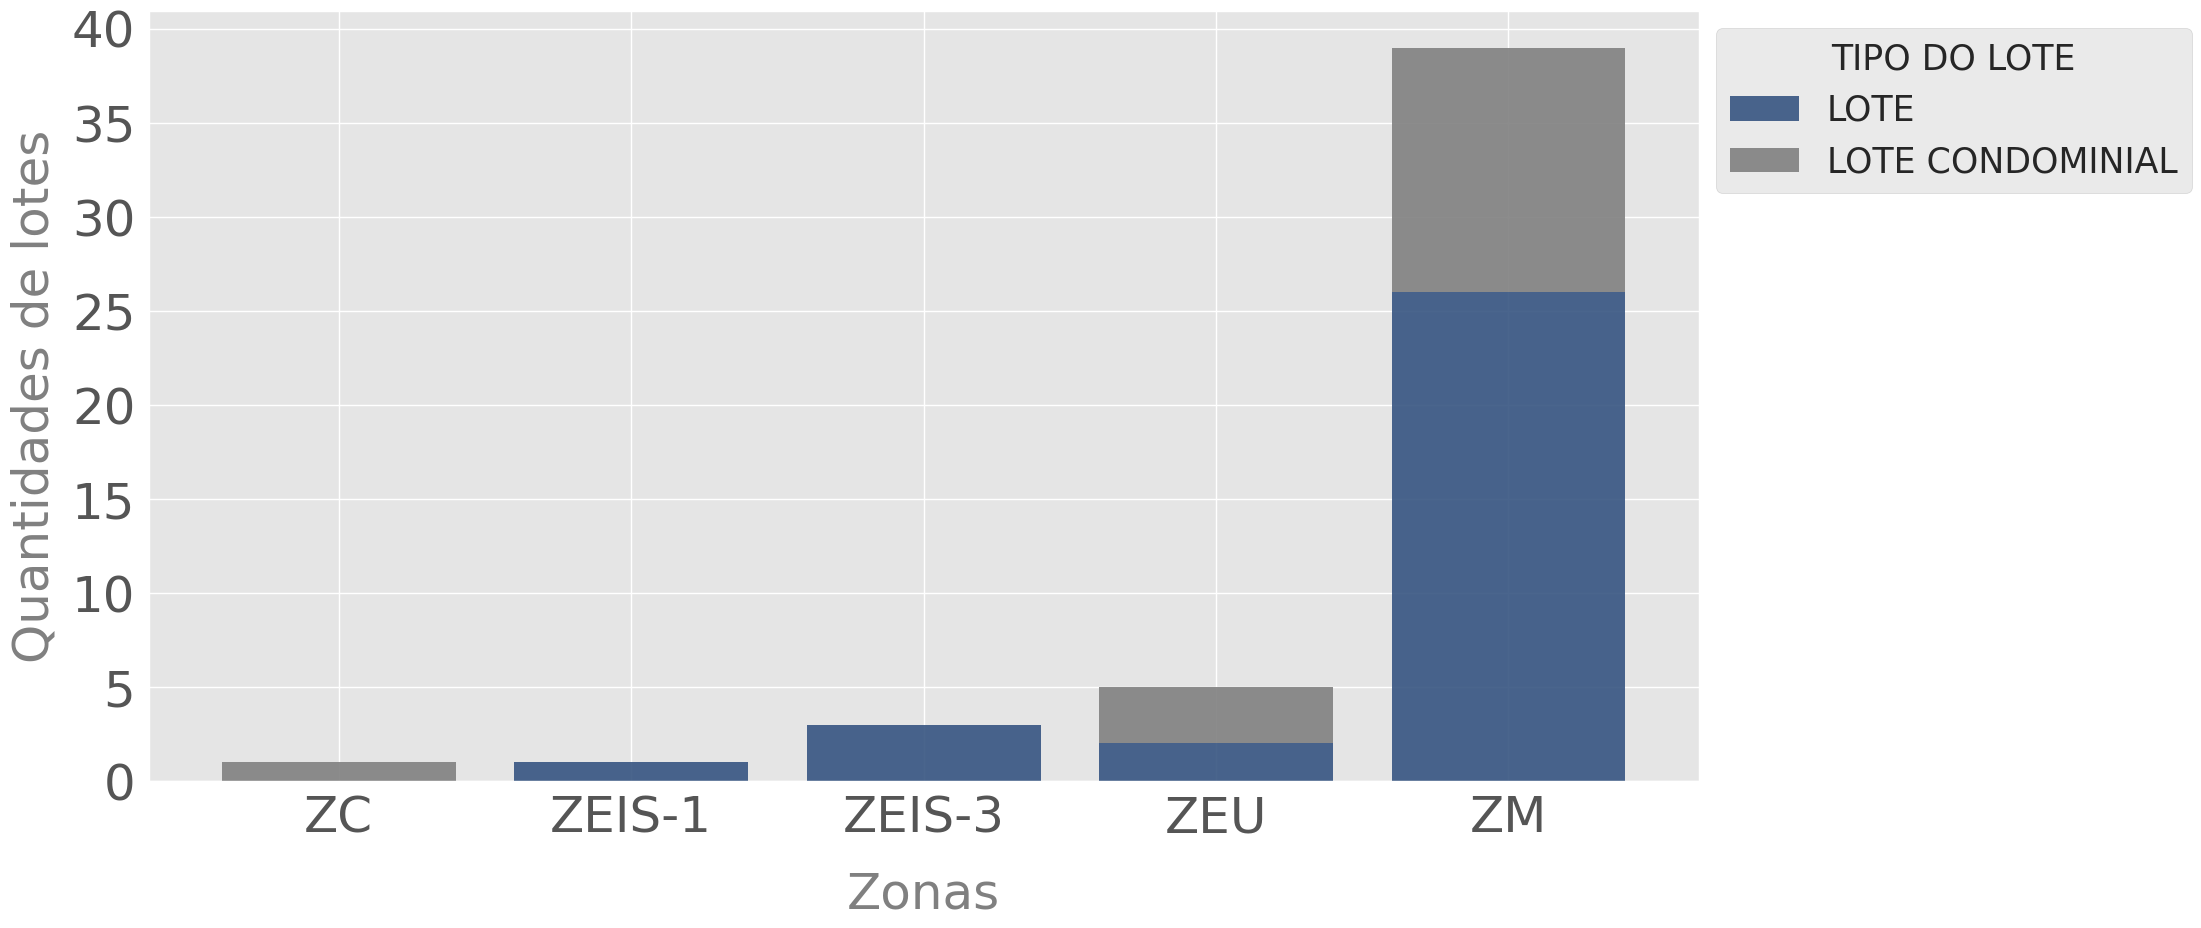

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
AR = AR_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
AR = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
AR = plt.xticks(rotation= 0 )
AR = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
AR = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
AR = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LOTES DA SUBPREFEITURA DA VILA PRUDENTE - VP

In [ ]:
dados.query("SGL_SUBP_EDIC == 'VP'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        28
ZEU       13
ZC         2
ZEIS-1     2
ZDE-2      1
ZEIS-5     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VP_Zonas = dados.query("SGL_SUBP_EDIC == 'VP'")

In [ ]:
VP_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1276         0              ZC
1271         0              ZC
1647         1           ZDE-2
819          0          ZEIS-1
820          0          ZEIS-1
1622         1          ZEIS-5
934          0             ZEU
937          1             ZEU
936          1             ZEU
929          1             ZEU
928          1             ZEU
926          1             ZEU
944          0             ZEU
1377         0             ZEU
930          0             ZEU
931          0             ZEU
932          0             ZEU
935          0             ZEU
933          1             ZEU
1143         0              ZM
1007         0              ZM
1163         0              ZM
1630         1              ZM
1006         0              ZM
1016         0              ZM
1018         0              ZM
1005         0              ZM
1031         0              ZM
1062         0              ZM
1003         1              ZM
1002         1              ZM
1001         1              ZM
1634         1              ZM
974          1              ZM
1639         1              ZM
1473         0              ZM
1513         0              ZM
1267         0              ZM
1640         1              ZM
1266         0              ZM
1258         0              ZM
1187         0              ZM
1008         1              ZM
1145         0              ZM
973          0              ZM
1061         0              ZM
1063         0              ZM

In [ ]:
VP_Zonas["COD_COND"] = VP_Zonas["COD_COND"].astype(int)

In [ ]:
VP_Zonas["COD_COND"] = VP_Zonas["COD_COND"].astype(str)

In [ ]:
VP_Zonas["COD_COND"]

1276    0
1271    0
1647    1
819     0
820     0
1622    1
934     0
937     1
936     1
929     1
928     1
926     1
944     0
1377    0
930     0
931     0
932     0
935     0
933     1
1143    0
1007    0
1163    0
1630    1
1006    0
1016    0
1018    0
1005    0
1031    0
1062    0
1003    1
1002    1
1001    1
1634    1
974     1
1639    1
1473    0
1513    0
1267    0
1640    1
1266    0
1258    0
1187    0
1008    1
1145    0
973     0
1061    0
1063    0
Name: COD_COND, dtype: object

In [ ]:
VP_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

2    8
1    7
3    2
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
VP_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        28
ZEU       13
ZC         2
ZEIS-1     2
ZDE-2      1
ZEIS-5     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VP_Cond_Zonas = VP_Zonas.query("COD_COND != '0'")
VP_Cond_Zonas

GEOCODE                  ID  \
1647     RUA PITINGA, 316,SAO PAULO, SAO PAULO - BRASIL   51010164011010000   
1622  RUA FRANCISCO ROSSANO, 109,SAO PAULO, SAO PAUL...   51338401170030000   
937   RUA CONSTANTINO DO AMARAL TAVARES , 296,\nSAO ...  118397201200010000   
936   RUA SALES GOMES JUNIOR , 159,\nSAO PAULO, SAO ...  118285176176010000   
929   RUA VITOR DE QUEIROZ MATOS , 180,\nSAO PAULO, ...  118280128090030000   
928   RUA JOAQUIM ABREU LUZ, 323,\nSAO PAULO, SAO PA...  118280128112020000   
926   RUA JOAO BATISTA FERNANDES , 130,\nSAO PAULO, ...  118091033898010000   
933   RUA BELICA BARBOSA LIMA , 168,\nSAO PAULO, SAO...  118201030856020000   
1630     RUA NAPAGOE, 154,SAO PAULO, SAO PAULO - BRASIL   51163144037020000   
1003  RUA ADOLFO SCHNABEL, 132,\nSAO PAULO, SAO PAUL...  117280609960010000   
1002  RUA MISSAO VELHA , 150,\nSAO PAULO, SAO PAULO ...  118103616710020000   
1001  RUA TRES LAGOAS , 36,\nSAO PAULO, SAO PAULO - ...  118039191396010000   
1634     RUA MANAIAS, 114,SAO PAULO, SAO PAULO - BRASIL   44102125709020000   
974    RUA ALFAVACA, 21,\nSAO PAULO, SAO PAULO - BRASIL  156033740470020000   
1639  RUA DAS TULIPAS, 139,SAO PAULO, SAO PAULO - BR...   51307192155020000   
1640  RUA GAL BAGNOULO, 420,SAO PAULO, SAO PAULO - B...   51255027162020000   
1008  RUA MAESTRO FURIO FRANCESCHINI, 141,\nSAO PAUL...  118400211788010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1647           51           10       164011             1             0   
1622           51          338       401170             3             0   
937           118          397       201200             1             0   
936           118          285       176176             1             0   
929           118          280       128090             3             0   
928           118          280       128112             2             0   
926           118           91        33898             1             0   
933           118          201        30856             2             0   
1630           51          163       144037             2             0   
1003          117          280       609960             1             0   
1002          118          103       616710             2             0   
1001          118           39       191396             1             0   
1634           44          102       125709             2             0   
974           156           33       740470             2             0   
1639           51          307       192155             2             0   
1640           51          255        27162             2             0   
1008          118          400       211788             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1647            VP           VPR             1  ...             NaN   
1622            VP           VPR             2  ...             NaN   
937             VP           SLU             1  ...             NaN   
936             VP           SLU             1  ...             NaN   
929             VP           SLU             1  ...             NaN   
928             VP           SLU             1  ...             NaN   
926             VP           SLU             1  ...             NaN   
933             VP           SLU             1  ...             NaN   
1630            VP           VPR             1  ...             NaN   
1003            VP           SLU             3  ...             NaN   
1002            VP           SLU             1  ...             NaN   
1001            VP           SLU             1  ...             NaN   
1634            VP           VPR             1  ...             NaN   
974             VP           SLU             1  ...             NaN   
1639            VP           VPR             1  ...             NaN   
1640            VP           VPR             1  ...             NaN   
1008            VP           SLU             2  ...             NaN

In [ ]:
len(VP_Cond_Zonas) 

17

In [ ]:
VP_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        19
ZEU        7
ZC         2
ZEIS-1     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VP_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM        9
ZEU       6
ZDE-2     1
ZEIS-5    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
VP_Sem_Cond_Zonas = VP_Zonas.query("COD_COND == '0'")
VP_Sem_Cond_Zonas.head(2)

GEOCODE                 ID  \
1276  RUA DOUTOR VICENTE GIACAGLINI, 1129,\nSAO PAUL...  51096196452000041   
1271  PRACA MAIRARA, 15,\nSAO PAULO, SAO PAULO - BRASIL  51216125326000026   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1276           51           96       196452             0            41   
1271           51          216       125326             0            26   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1276            VP           VPR             1  ...             NaN   
1271            VP           VPR             3  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1276     SAO PAULO     SAO PAULO          BRASIL      LESTE 1   
1271     SAO PAULO     SAO PAULO          BRASIL      LESTE 1   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1276  PRIMEIRO QUADRIMESTRE     2022         0  -23,6047829  -46,5679783  
1271  PRIMEIRO QUADRIMESTRE     2022         0    -23,60872  -46,5541454  

[2 rows x 71 columns]

In [ ]:
len(VP_Sem_Cond_Zonas)

30

In [ ]:
len(VP_Zonas)

47

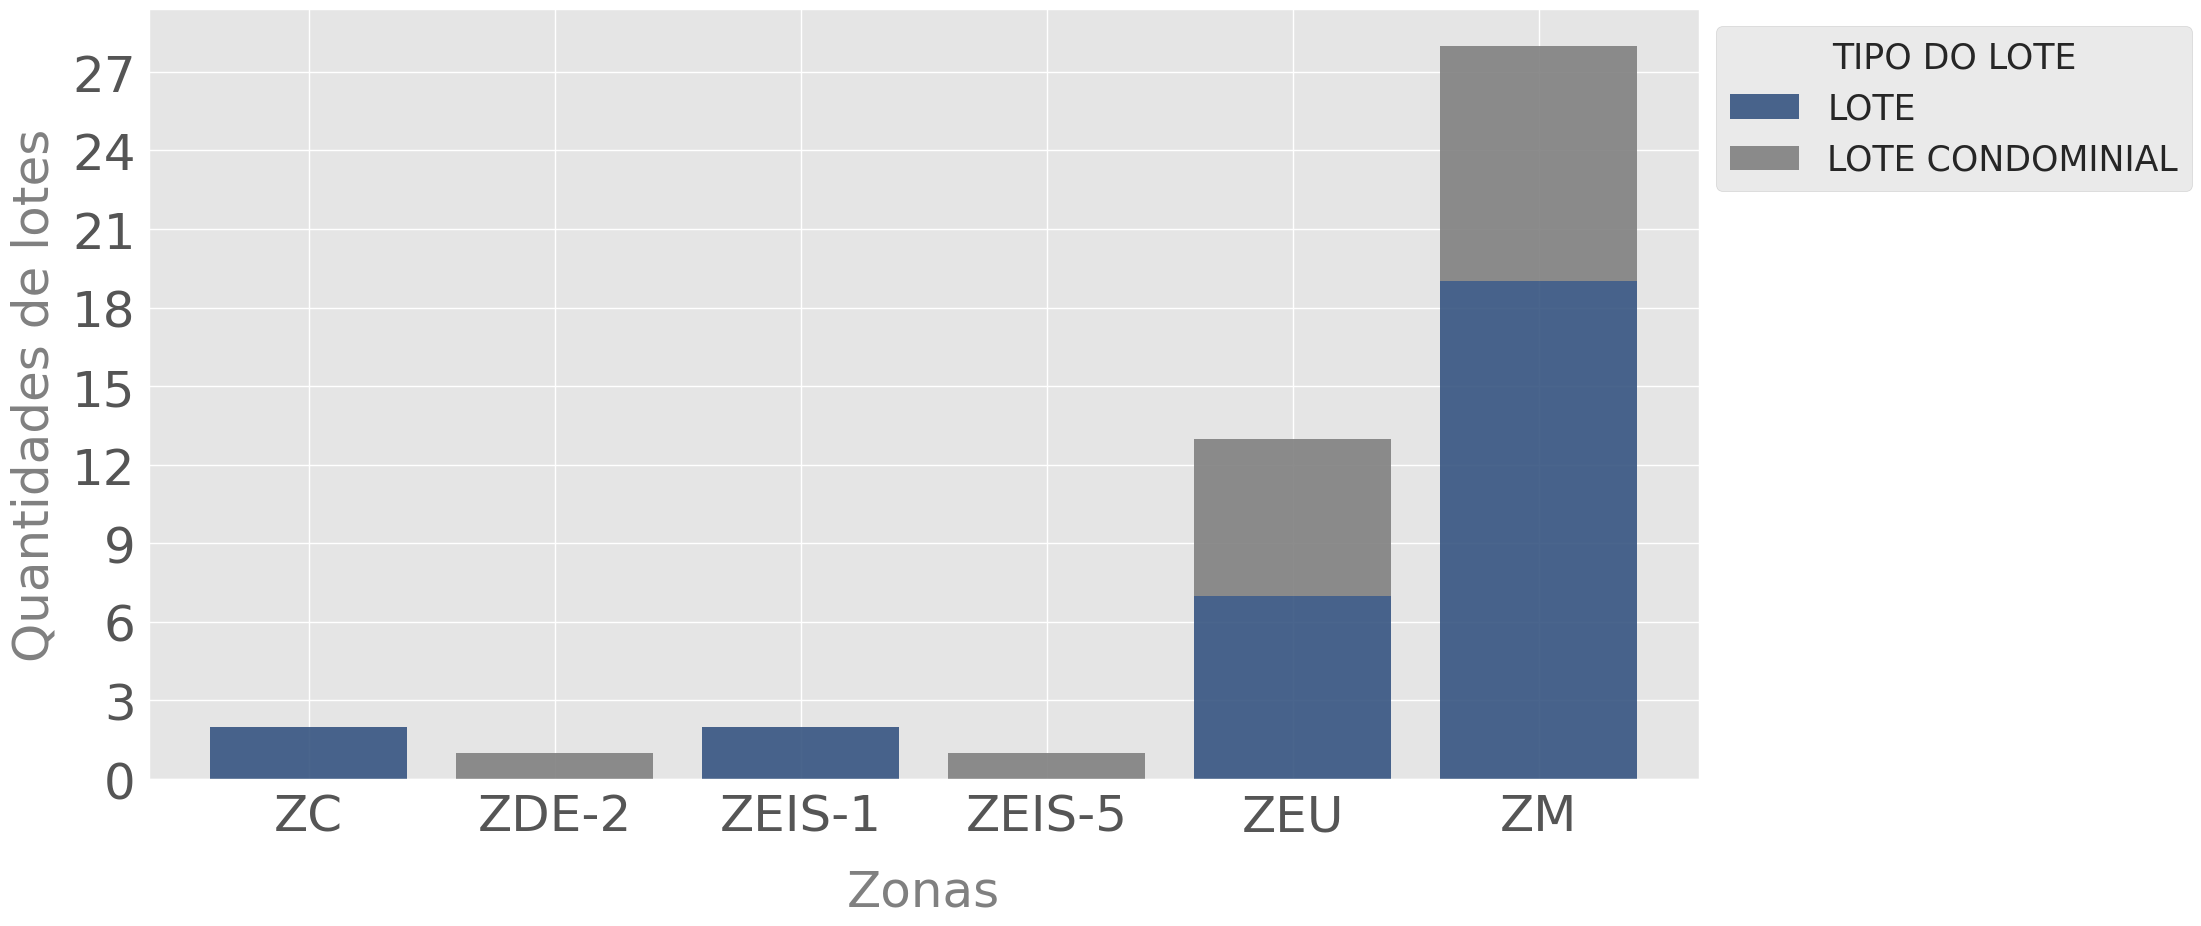

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
VP = VP_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
VP = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
VP = plt.xticks(rotation= 0 )
VP = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
VP = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
VP = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

##LESTE-2 

##LOTES DA SUBPREFEITURA DA EMERLINO MATARAZZO - EM 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'EM'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM         14
ZEIS-1      5
ZEUP        2
ZC          1
ZC-ZEIS     1
ZEPEC       1
ZEU         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
EM_Zonas = dados.query("SGL_SUBP_EDIC == 'EM'")

In [ ]:
EM_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1865         0              ZC
1820         1         ZC-ZEIS
1829         1          ZEIS-1
1757         0          ZEIS-1
1748         0          ZEIS-1
1769         0          ZEIS-1
1856         1          ZEIS-1
1696         0           ZEPEC
1783         0             ZEU
1731         0            ZEUP
1657         0            ZEUP
1662         0              ZM
1661         0              ZM
1814         1              ZM
1711         0              ZM
1706         0              ZM
1759         0              ZM
1673         0              ZM
1847         1              ZM
1841         1              ZM
1806         1              ZM
1846         1              ZM
1828         1              ZM
1824         1              ZM
1858         1              ZM

In [ ]:
EM_Zonas["COD_COND"] = EM_Zonas["COD_COND"].astype(int)

In [ ]:
EM_Zonas["COD_COND"] = EM_Zonas["COD_COND"].astype(str)

In [ ]:
EM_Zonas["COD_COND"]

1865    0
1820    1
1829    1
1757    0
1748    0
1769    0
1856    1
1696    0
1783    0
1731    0
1657    0
1662    0
1661    0
1814    1
1711    0
1706    0
1759    0
1673    0
1847    1
1841    1
1806    1
1846    1
1828    1
1824    1
1858    1
Name: COD_COND, dtype: object

In [ ]:
EM_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

1    6
2    2
3    2
5    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
EM_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM         14
ZEIS-1      5
ZEUP        2
ZC          1
ZC-ZEIS     1
ZEPEC       1
ZEU         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
EM_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        6
ZEIS-1    3
ZEUP      2
ZC        1
ZEPEC     1
ZEU       1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
EM_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM         8
ZEIS-1     2
ZC-ZEIS    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
EM_Cond_Zonas = EM_Zonas.query("COD_COND != '0'")
EM_Cond_Zonas

GEOCODE                  ID  \
1820  RUA OLAVO EGIDIO DE SOUZA, 462,SAO PAULO, SAO ...  110183149179010000   
1829  RUA DR FLAMIANO COSTA, 574,SAO PAULO, SAO PAUL...  110180071749010000   
1856  RUA DR FLAMIANO COSTA, 356,SAO PAULO, SAO PAUL...  110182071749020000   
1814  RUA S GOCALO DO SAPUCAI, 150,SAO PAULO, SAO PA...  111079097853010000   
1847  RUA SARG IGUATEMI AZEVEDO, 280,SAO PAULO, SAO ...  111107620106030000   
1841  RUA VALDEMAR AMARANTE, 151,SAO PAULO, SAO PAUL...  111513697885050000   
1806         RUA DENE, 22,SAO PAULO, SAO PAULO - BRASIL  110361057894010000   
1846  RUA BOAVENTURA DA SILVA, 233,SAO PAULO, SAO PA...  110299174122030000   
1828  RUA ANTONIO FORTUNATO, 373,SAO PAULO, SAO PAUL...  113340156698010000   
1824  RUA CACHOEIRA DOS INDIOS, 99,SAO PAULO, SAO PA...  130271748358010000   
1858  RUA ANTONIO FORTUNATO, 323,SAO PAULO, SAO PAUL...  113340156698020000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1820          110          183       149179             1             0   
1829          110          180        71749             1             0   
1856          110          182        71749             2             0   
1814          111           79        97853             1             0   
1847          111          107       620106             3             0   
1841          111          513       697885             5             0   
1806          110          361        57894             1             0   
1846          110          299       174122             3             0   
1828          113          340       156698             1             0   
1824          130          271       748358             1             0   
1858          113          340       156698             2             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1820            EM           ERM             1  ...             NaN   
1829            EM           ERM             1  ...             NaN   
1856            EM           ERM             1  ...             NaN   
1814            EM           PRA             1  ...             NaN   
1847            EM           PRA             2  ...             NaN   
1841            EM           ERM             1  ...             NaN   
1806            EM           PRA             1  ...             NaN   
1846            EM           PRA             1  ...             NaN   
1828            EM           PRA             1  ...             NaN   
1824            EM           ERM             2  ...             NaN   
1858            EM           PRA             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1820     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1829     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1856     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1814     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1847     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1841     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1806     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1846     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1828     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1824     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1858     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1820  PRIMEIRO QUADRIMESTRE     2022         1  -23,5044076  -46,4938818  
1829  PRIMEIRO QUADRIMESTRE     2022         1  -23,5021427  -46,4924069  
1856  PRIMEIRO QUADRIMESTRE     2022         1  -23,5040497  -46,4929437  
1814  PRIMEIRO QUADRIMESTRE     2022         1  -23,5125302  -46,4884907  
1847  PRIMEIRO QUADRIMESTRE     2022         1  -23,5193197  -46,4912399  
1841  PRIMEIRO QUADRIMESTRE     2022         1  -23,5046783  -46,4831713  
1806  PRIMEIRO QUADRIMESTRE     2022   

In [ ]:
len(EM_Cond_Zonas) 

11

In [ ]:
EM_Sem_Cond_Zonas = EM_Zonas.query("COD_COND == '0'")
EM_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1865       TV TOMAZINI, 4,SAO PAULO, SAO PAULO - BRASIL  111385190624000050   
1757  RUA NOVA PALMEIRA, 614,SAO PAULO, SAO PAULO - ...  130178617040000100   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1865          111          385       190624             0            50   
1757          130          178       617040             0           100   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1865            EM           ERM             1  ...             NaN   
1757            EM           ERM             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1865     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1757     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1865  PRIMEIRO QUADRIMESTRE     2022         0  -23,5879202  -46,5344588  
1757  PRIMEIRO QUADRIMESTRE     2022         0  -23,4907109  -46,4994457  

[2 rows x 71 columns]

In [ ]:
len(EM_Sem_Cond_Zonas)

14

In [ ]:
len(EM_Zonas) 

25

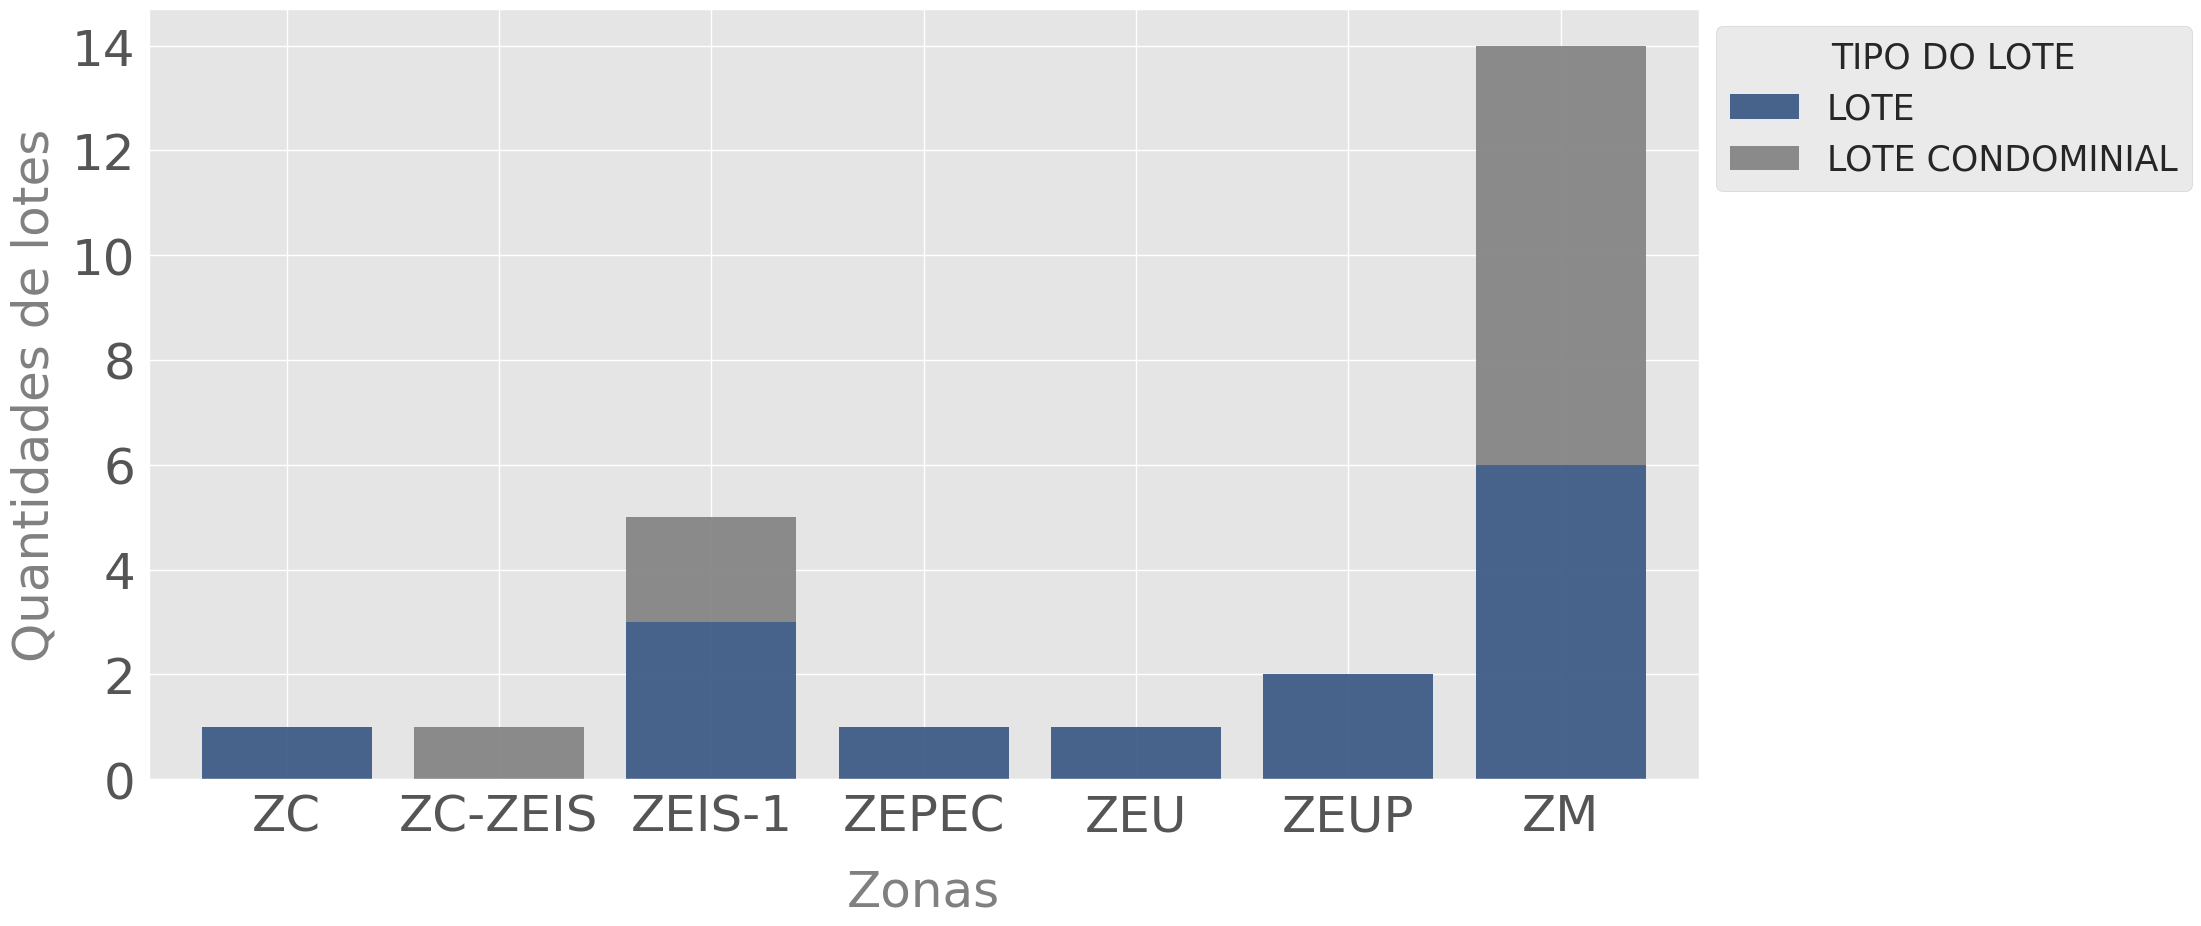

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
EM = EM_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
EM = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
EM = plt.xticks(rotation= 0 )
EM = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
EM = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
EM = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES NA SUBPREFEITURA DE ITAIM PAULISTA - IT 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'IT'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        10
ZEIS-1     6
ZEU        5
ZEUP       4
ZC         3
ZEIS-5     2
ZEIS-2     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IT_Zonas = dados.query("SGL_SUBP_EDIC == 'IT'")

In [ ]:
IT_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1667         0              ZC
1832         1              ZC
1679         0              ZC
1728         0          ZEIS-1
1730         0          ZEIS-1
1660         0          ZEIS-1
1792         0          ZEIS-1
1789         0          ZEIS-1
1714         0          ZEIS-1
1774         0          ZEIS-2
1708         0          ZEIS-5
1709         0          ZEIS-5
1680         0             ZEU
1825         1             ZEU
1808         1             ZEU
1725         0             ZEU
1857         1             ZEU
1785         0            ZEUP
1687         0            ZEUP
1664         0            ZEUP
1684         0            ZEUP
1767         0              ZM
1659         0              ZM
1682         0              ZM
1754         0              ZM
1830         1              ZM
1827         1              ZM
1826         1              ZM
1854         1              ZM
1698         0              ZM
1658         0              ZM

In [ ]:
IT_Zonas["COD_COND"] = IT_Zonas["COD_COND"].astype(int)

In [ ]:
IT_Zonas["COD_COND"] = IT_Zonas["COD_COND"].astype(str)

In [ ]:
IT_Zonas["COD_COND"]

1667    0
1832    1
1679    0
1728    0
1730    0
1660    0
1792    0
1789    0
1714    0
1774    0
1708    0
1709    0
1680    0
1825    1
1808    1
1725    0
1857    1
1785    0
1687    0
1664    0
1684    0
1767    0
1659    0
1682    0
1754    0
1830    1
1827    1
1826    1
1854    1
1698    0
1658    0
Name: COD_COND, dtype: object

In [ ]:
IT_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    6
2    2
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
IT_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        10
ZEIS-1     6
ZEU        5
ZEUP       4
ZC         3
ZEIS-5     2
ZEIS-2     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IT_Cond_Zonas = IT_Zonas.query("COD_COND != '0'")
IT_Cond_Zonas

GEOCODE                  ID  \
1832  RUA CANDIDO GOMIDE, 57,SAO PAULO, SAO PAULO - ...  134195041068010000   
1825  RUA MANUEL BUENO DA FONSECA, 220,SAO PAULO, SA...  134476614920010000   
1808  RUA ANTENOR BAPTISTA, 109,SAO PAULO, SAO PAULO...  112232212520010000   
1857    AV MAL TITO, 5710,SAO PAULO, SAO PAULO - BRASIL  134476178209020000   
1830  RUA CEL PATRICIO CORREA DA CAMARA, 15,SAO PAUL...  134340739430010000   
1827  RUA JOSE GINES, 295,SAO PAULO, SAO PAULO - BRASIL  134403214647010000   
1826  RUA DR JOSE PEREIRA GOMES, 955,SAO PAULO, SAO ...  134405111538010000   
1854  RUA PEDRO MEIRA, 136,SAO PAULO, SAO PAULO - BR...  112673159530020000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1832          134          195        41068             1             0   
1825          134          476       614920             1             0   
1808          112          232       212520             1             0   
1857          134          476       178209             2             0   
1830          134          340       739430             1             0   
1827          134          403       214647             1             0   
1826          134          405       111538             1             0   
1854          112          673       159530             2             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1832            IT           IPA             1  ...             NaN   
1825            IT           IPA             1  ...             NaN   
1808            IT           VCR             2  ...             NaN   
1857            IT           IPA             1  ...             NaN   
1830            IT           IPA             1  ...             NaN   
1827            IT           IPA             2  ...             NaN   
1826            IT           IPA             1  ...             NaN   
1854            IT           VCR             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1832     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1825     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1808     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1857     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1830     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1827     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1826     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1854     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1832  PRIMEIRO QUADRIMESTRE     2022         1  -23,4980925   -46,395601  
1825  PRIMEIRO QUADRIMESTRE     2022         1  -23,4963931  -46,3879769  
1808  PRIMEIRO QUADRIMESTRE     2022         1  -23,4934787  -46,4247037  
1857  PRIMEIRO QUADRIMESTRE     2022         1  -23,4949148   -46,390317  
1830  PRIMEIRO QUADRIMESTRE     2022         1  -23,4969295  -46,3761356  
1827  PRIMEIRO QUADRIMESTRE     2022         1  -23,4864665  -46,3764969  
1826  PRIMEIRO QUADRIMESTRE     2022         1  -23,4921696  -46,3774376  
1854  PRIMEIRO QUADRIMESTRE     2022         1  -23,5035755  -46,4220179  

[8 rows x 71 columns]

In [ ]:
len(IT_Cond_Zonas)

8

In [ ]:
IT_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    6
ZM        6
ZEUP      4
ZC        2
ZEIS-5    2
ZEU       2
ZEIS-2    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IT_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM     4
ZEU    3
ZC     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IT_Sem_Cond_Zonas = IT_Zonas.query("COD_COND == '0'")
IT_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1667  RUA ERVA DE SARACURA, 36,SAO PAULO, SAO PAULO ...  139440241660000153   
1679      AV MAL TITO, 99,SAO PAULO, SAO PAULO - BRASIL  134455178209000071   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1667          139          440       241660             0           153   
1679          134          455       178209             0            71   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1667            IT           VCR             5  ...             NaN   
1679            IT           IPA             2  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1667     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1679     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1667  PRIMEIRO QUADRIMESTRE     2022         0   -23,512248  -46,4284742  
1679  PRIMEIRO QUADRIMESTRE     2022         0  -23,4926223  -46,4441996  

[2 rows x 71 columns]

In [ ]:
len(IT_Sem_Cond_Zonas)

23

In [ ]:
len(IT_Zonas) 

31

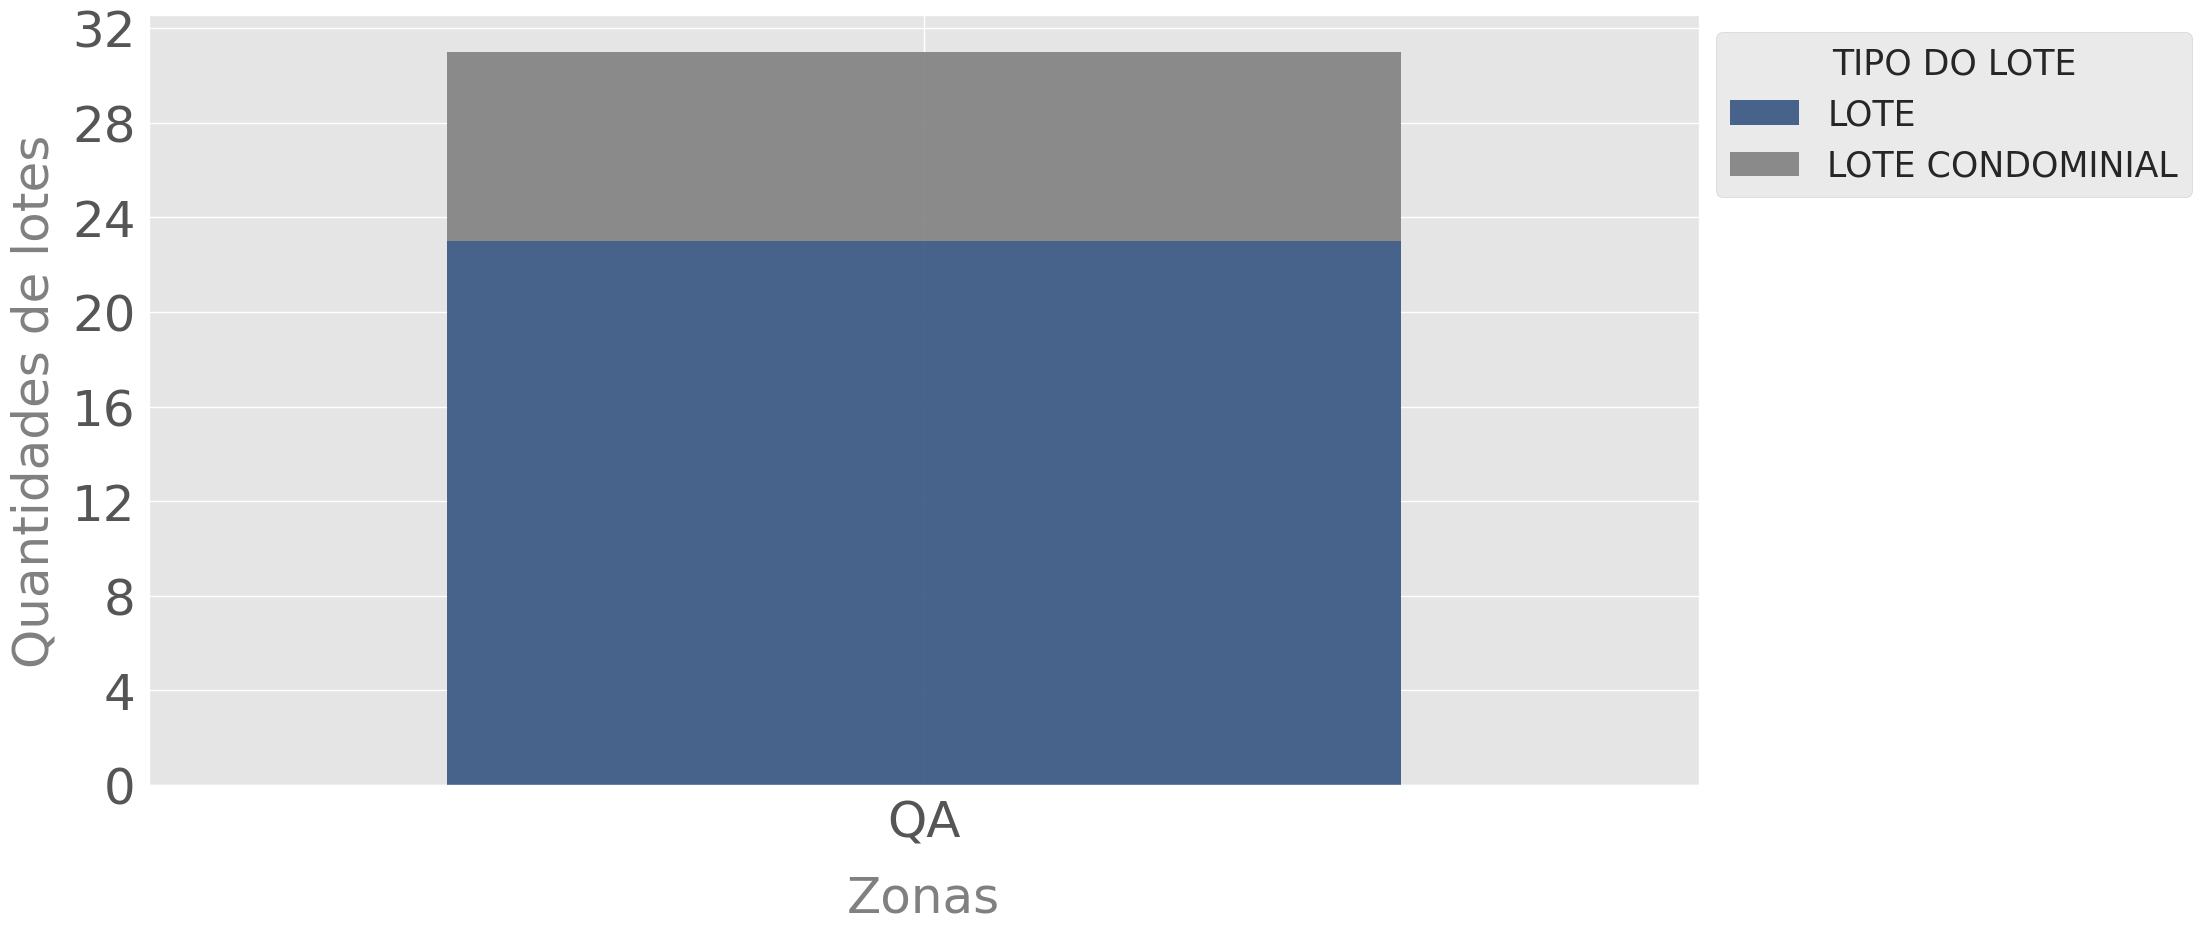

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
IT = IT_Zonas.groupby(['SGL_ZONA_02_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'],edgecolor='None')
IT = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
IT = plt.xticks(rotation= 0 )
IT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
IT = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
IT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES NA SUBPREFEITURA DE ITAQUERA - IQ 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'IQ'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM        27
ZC        14
ZEUP      12
ZEU        4
ZPDS       3
ZPI-1      3
ZEIS-1     2
ZEIS-5     2
ZOE        2
ZEIS-2     1
ZMA        1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IQ_Zonas = dados.query("SGL_SUBP_EDIC == 'IQ'")

In [ ]:
IQ_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1842         0              ZC
1818         1              ZC
1843         1              ZC
1840         1              ZC
1690         0              ZC
...        ...             ...
1745         0            ZPDS
1780         0            ZPDS
1836         0           ZPI-1
1837         0           ZPI-1
1782         0           ZPI-1

[71 rows x 2 columns]

In [ ]:
IQ_Zonas["COD_COND"] = IQ_Zonas["COD_COND"].astype(int)

In [ ]:
IQ_Zonas["COD_COND"] = IQ_Zonas["COD_COND"].astype(str)

In [ ]:
IQ_Zonas["COD_COND"]

1842    0
1818    1
1843    1
1840    1
1690    0
       ..
1745    0
1780    0
1836    0
1837    0
1782    0
Name: COD_COND, Length: 71, dtype: object

In [ ]:
IQ_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1     9
2     6
3     3
11    1
5     1
6     1
7     1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
IQ_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        27
ZC        14
ZEUP      12
ZEU        4
ZPDS       3
ZPI-1      3
ZEIS-1     2
ZEIS-5     2
ZOE        2
ZEIS-2     1
ZMA        1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IQ_Cond_Zonas = IQ_Zonas.query("COD_COND != '0'")
IQ_Cond_Zonas

GEOCODE                  ID  \
1818  RUA PAULINO BENEDITO DE F FILHO, 267,SAO PAULO...  114229210617010000   
1843  RUA WALDEMAR MANCINI, 246,SAO PAULO, SAO PAULO...  114137176125110000   
1840  AV OSVALDO VALLE CORDEIRO, 1250,SAO PAULO, SAO...  147327222682050000   
1823  RUA PAULO LOPES DE LEAO, 53,SAO PAULO, SAO PAU...  114060191337010000   
1851  RUA PROFA MARIA LICIO RIZZO, 1505,SAO PAULO, S...  114178724980030000   
1860     RUA SERRANA, 541,SAO PAULO, SAO PAULO - BRASIL  114162180939020000   
1853  RUA MATEUS MENDES PEREIRA, 851,SAO PAULO, SAO ...  145086664766020000   
1819    RUA TAQUARANA, 40,SAO PAULO, SAO PAULO - BRASIL  114218609803010000   
1821    AV ITAQUERA, 7120,SAO PAULO, SAO PAULO - BRASIL  114139095800010000   
1810  RUA DA LAGOA FEIA, 199,SAO PAULO, SAO PAULO - ...  144089178810010000   
1817  RUA CRISTOVAO ALVES, 57,SAO PAULO, SAO PAULO -...  114254055310010000   
1861  RUA CASTELO DO PIAUI, 511,SAO PAULO, SAO PAULO...  114123198501020000   
1845    RUA MONTANHAS, 61,SAO PAULO, SAO PAULO - BRASIL  114376080250060000   
1848  RUA DA LAGOA TAI GRANDE, 1028,SAO PAULO, SAO P...  144091046620030000   
1822  RUA CASTELO DO PIAUI, 503,SAO PAULO, SAO PAULO...  114123198501010000   
1855  AV PIRES DO RIO, 4711,SAO PAULO, SAO PAULO - B...  114258098060020000   
1816  AV AUGUSTO ANTUNES, 63,SAO PAULO, SAO PAULO - ...  140035025100010000   
1844  RUA PALMA SOLA, 140,SAO PAULO, SAO PAULO - BRASIL  114112153249070000   
1859  RUA LUIZ ANTONIO GONCALVES, 266,SAO PAULO, SAO...  114210049840020000   
1852  RUA RIO MAMANGUAPE, 692,SAO PAULO, SAO PAULO -...  114167698512030000   
1864  RUA LUCILA FARIA, 89,SAO PAULO, SAO PAULO - BR...  146064120987020000   
1831  RUA ERNANI FORNARI, 46,SAO PAULO, SAO PAULO - ...  147187237817010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1818          114          229       210617             1             0   
1843          114          137       176125            11             0   
1840          147          327       222682             5             0   
1823          114           60       191337             1             0   
1851          114          178       724980             3             0   
1860          114          162       180939             2             0   
1853          145           86       664766             2             0   
1819          114          218       609803             1             0   
1821          114          139        95800             1             0   
1810          144           89       178810             1             0   
1817          114          254        55310             1             0   
1861          114          123       198501             2             0   
1845          114          376        80250             6             0   
1848          144           91        46620             3             0   
1822          114          123       198501             1             0   
1855          114          258        98060             2             0   
1816          140           35        25100             1             0   
1844          114          112       153249             7             0   
1859          114          210        49840             2             0   
1852          114          167       698512             3             0   
1864          146           64       120987             2             0   
1831          147          187       237817             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1818            IQ           ITQ             1  ...             NaN   
1843            IQ           ITQ             1  ...             NaN   
1840            IQ           CLD             1  ...             NaN   
1823            IQ           ITQ             1  ...             NaN   
1851            IQ           CLD             2  ...             NaN   
1860            IQ           CLD             1  ...             NaN   
1853   

In [ ]:
len(IQ_Cond_Zonas) 

22

In [ ]:
IQ_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM        22
ZC         6
ZEUP       5
ZEU        3
ZPDS       3
ZPI-1      3
ZEIS-1     2
ZEIS-5     2
ZOE        2
ZEIS-2     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IQ_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZC      8
ZEUP    7
ZM      5
ZEU     1
ZMA     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
IQ_Sem_Cond_Zonas = IQ_Zonas.query("COD_COND == '0'")
IQ_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1842    AV ITAQUERA, 5889,SAO PAULO, SAO PAULO - BRASIL  143087095800000015   
1690  RUA JARDEL FILHO, 360,SAO PAULO, SAO PAULO - B...  232022292990000050   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1842          143           87        95800             0            15   
1690          232           22       292990             0            50   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1842            IQ           CLD             1  ...             NaN   
1690            IQ           PQC             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1842     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1690     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND      Lat_Y_      Long_X_  
1842  PRIMEIRO QUADRIMESTRE     2022         0  -23,552735  -46,4717662  
1690  PRIMEIRO QUADRIMESTRE     2022         0  -23,568014  -46,4616932  

[2 rows x 71 columns]

In [ ]:
len(IQ_Sem_Cond_Zonas)

49

In [ ]:
len(IQ_Zonas)

71

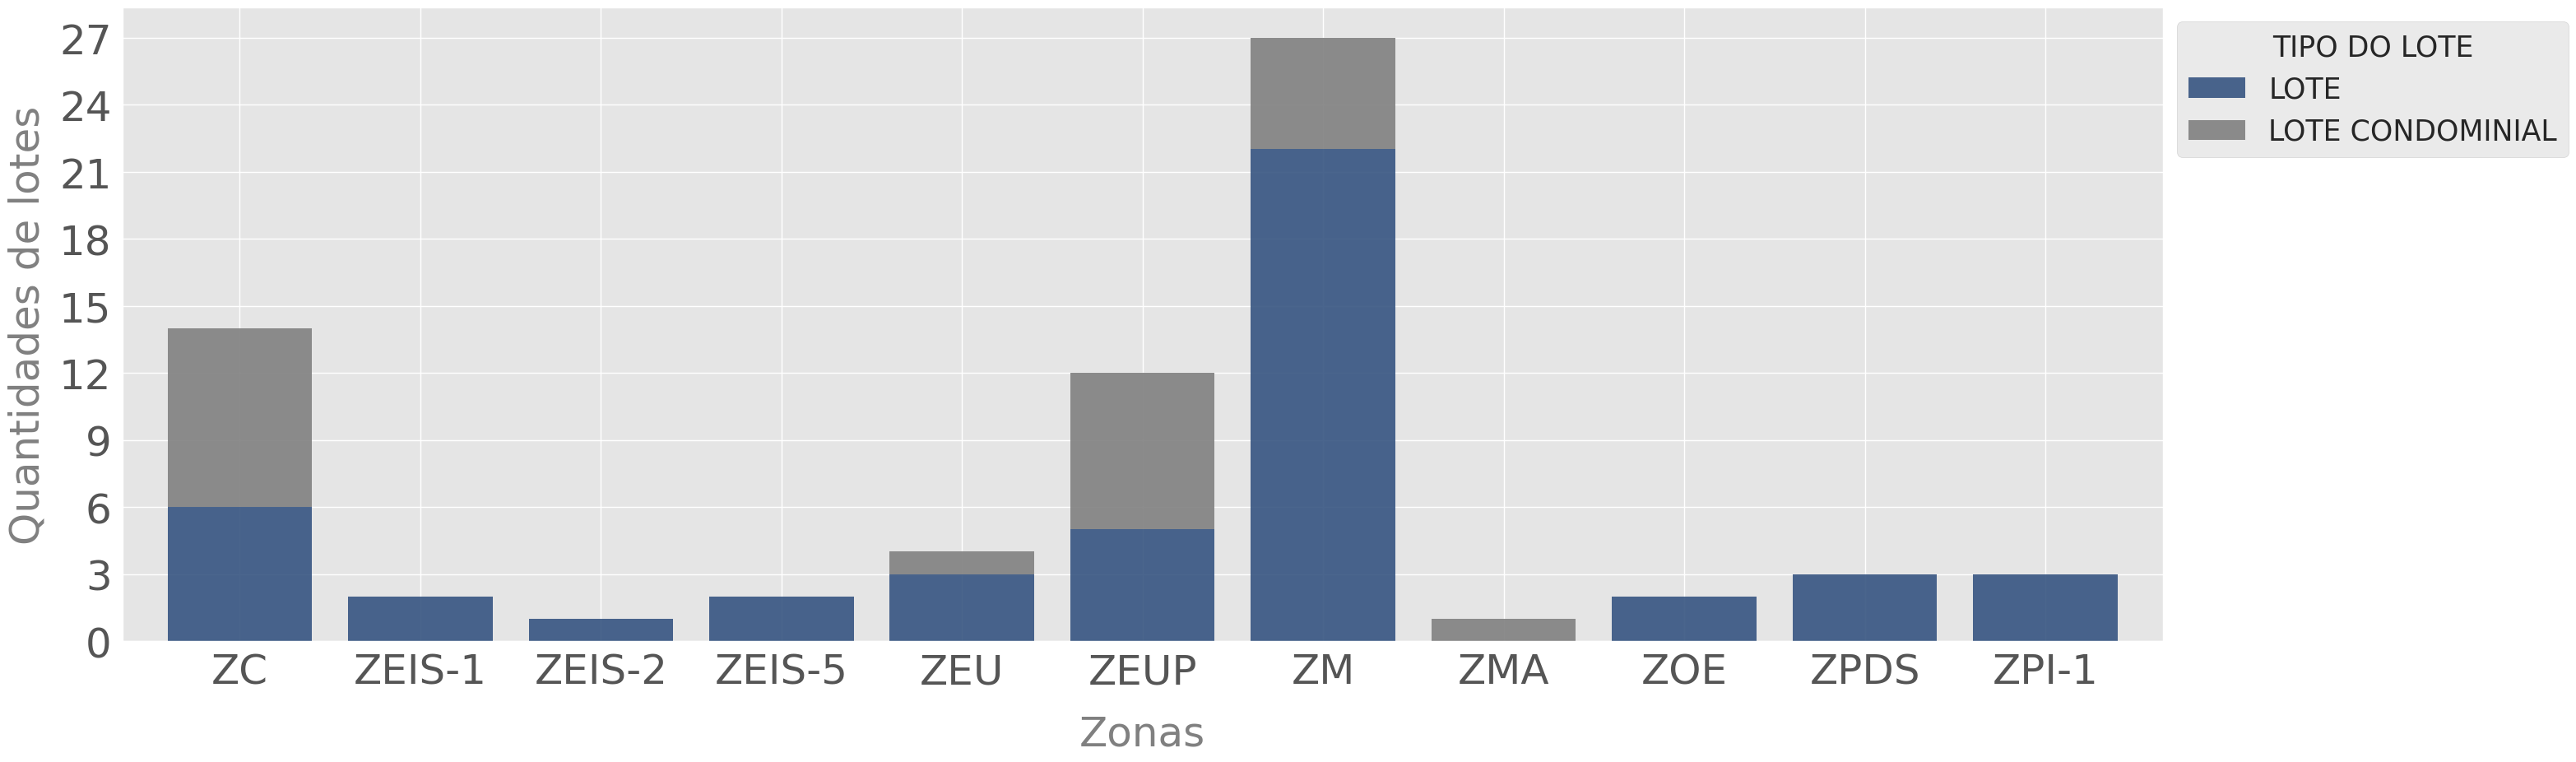

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
IQ = IQ_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(32, 10), width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
IQ = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
IQ = plt.xticks(rotation= 0 )
IQ = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
IQ = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
IQ = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE GUAIANASES - GU 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'GU'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    9
ZM        5
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
GU_Zonas = dados.query("SGL_SUBP_EDIC == 'GU'")

In [ ]:
GU_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1800         0          ZEIS-1
1702         0          ZEIS-1
1751         0          ZEIS-1
1750         0          ZEIS-1
1668         0          ZEIS-1
1776         0          ZEIS-1
1732         0          ZEIS-1
1674         0          ZEIS-1
1677         0          ZEIS-1
1764         0              ZM
1802         0              ZM
1794         0              ZM
1795         0              ZM
1736         0              ZM

In [ ]:
GU_Zonas["COD_COND"] = GU_Zonas["COD_COND"].astype(int)

In [ ]:
GU_Zonas["COD_COND"] = GU_Zonas["COD_COND"].astype(str)

In [ ]:
GU_Zonas["COD_COND"]

1800    0
1702    0
1751    0
1750    0
1668    0
1776    0
1732    0
1674    0
1677    0
1764    0
1802    0
1794    0
1795    0
1736    0
Name: COD_COND, dtype: object

In [ ]:
GU_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

Series([], Name: COD_CNDM_ZON, dtype: int64)

In [ ]:
GU_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    9
ZM        5
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
GU_Cond_Zonas = GU_Zonas.query("COD_COND != '0'")
GU_Cond_Zonas

Empty DataFrame
Columns: [GEOCODE, ID, COD_SET_ZON, COD_QDR_ZON, COD_LOG_ZON, COD_CNDM_ZON, COD_LOTE_ZON, SGL_SUBP_EDIC, SGL_DSTR_EDIC, COD_TSTD_ZON, IND_VRFC_EDIC, IND_EXCL_INCL_CRGA, SGL_ZONA_01_ZON, COD_PRMR_01_ZON, SGL_LNDR_01_ZON, COD_TIP_LEGC_01, COD_LEGC_01_ZON, ANO_LEGC_01_ZON, IND_ADCA_CRGA, SGL_ZONA_02_ZON, COD_PRMR_02_ZON, SGL_LNDR_02_ZON, COD_TIP_LEGC_02, COD_LEGC_02_ZON, ANO_LEGC_02_ZON, SGL_ZONA_03_ZON, COD_PRMR_03_ZON, SGL_LNDR_03_ZON, COD_TIP_LEGC_03, COD_LEGC_03_ZON, ANO_LEGC_03_ZON, SGL_ZONA_04_ZON, COD_PRMR_04_ZON, SGL_LNDR_04_ZON, COD_TIP_LEGC_04, COD_LEGC_04_ZON, ANO_LEGC_04_ZON, SGL_ZONA_05_ZON, COD_PRMR_05_ZON, SGL_LNDR_05_ZON, COD_TIP_LEGC_05, COD_LEGC_05_ZON, ANO_LEGC_05_ZON, SGL_ZONA_06_ZON, COD_PRMR_06_ZON, SGL_LNDR_06_ZON, COD_TIP_LEGC_06, COD_LEGC_06_ZON, ANO_LEGC_06_ZON, COD_AREA_CONST, COD_AREA_LT, COD_END_LOG, COD_NUM_PORT, COD_SIT, VALOR_MET_CODLOG, VALOR_MET_MED_ZON, NUM_PAV, SGL_ZON_URB_RUR, ANO_CONST, IND_EXCL_OBS, TXT_OBS_01_EDIC, TXT_OBS_02_EDIC, NOME_CID_EDIC, NOME_EST_EDIC, NOME_PAIS_EDIC, REG_LIM_ADM, QUADRIMESTRE, COD_ANO, COD_COND, Lat_Y_, Long_X_]
Index: []

[0 rows x 71 columns]

In [ ]:
len(GU_Cond_Zonas) 

0

In [ ]:
GU_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    9
ZM        5
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
GU_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

Series([], Name: SGL_ZONA_01_ZON, dtype: int64)

In [ ]:
GU_Sem_Cond_Zonas = GU_Zonas.query("COD_COND == '0'")
GU_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1800  RUA PROFA DINA RIZZI, 601,SAO PAULO, SAO PAULO...  138166647063000089   
1702   RUA CARAPEBUS, 539,SAO PAULO, SAO PAULO - BRASIL  137087057126000051   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1800          138          166       647063             0            89   
1702          137           87        57126             0            51   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1800            GU           LAJ             1  ...             NaN   
1702            GU           GUA             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1800     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1702     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1800  PRIMEIRO QUADRIMESTRE     2022         0  -23,5357179  -46,4176853  
1702  PRIMEIRO QUADRIMESTRE     2022         0  -23,5629416  -46,4245813  

[2 rows x 71 columns]

In [ ]:
len(GU_Sem_Cond_Zonas)

14

In [ ]:
len(GU_Zonas)

14

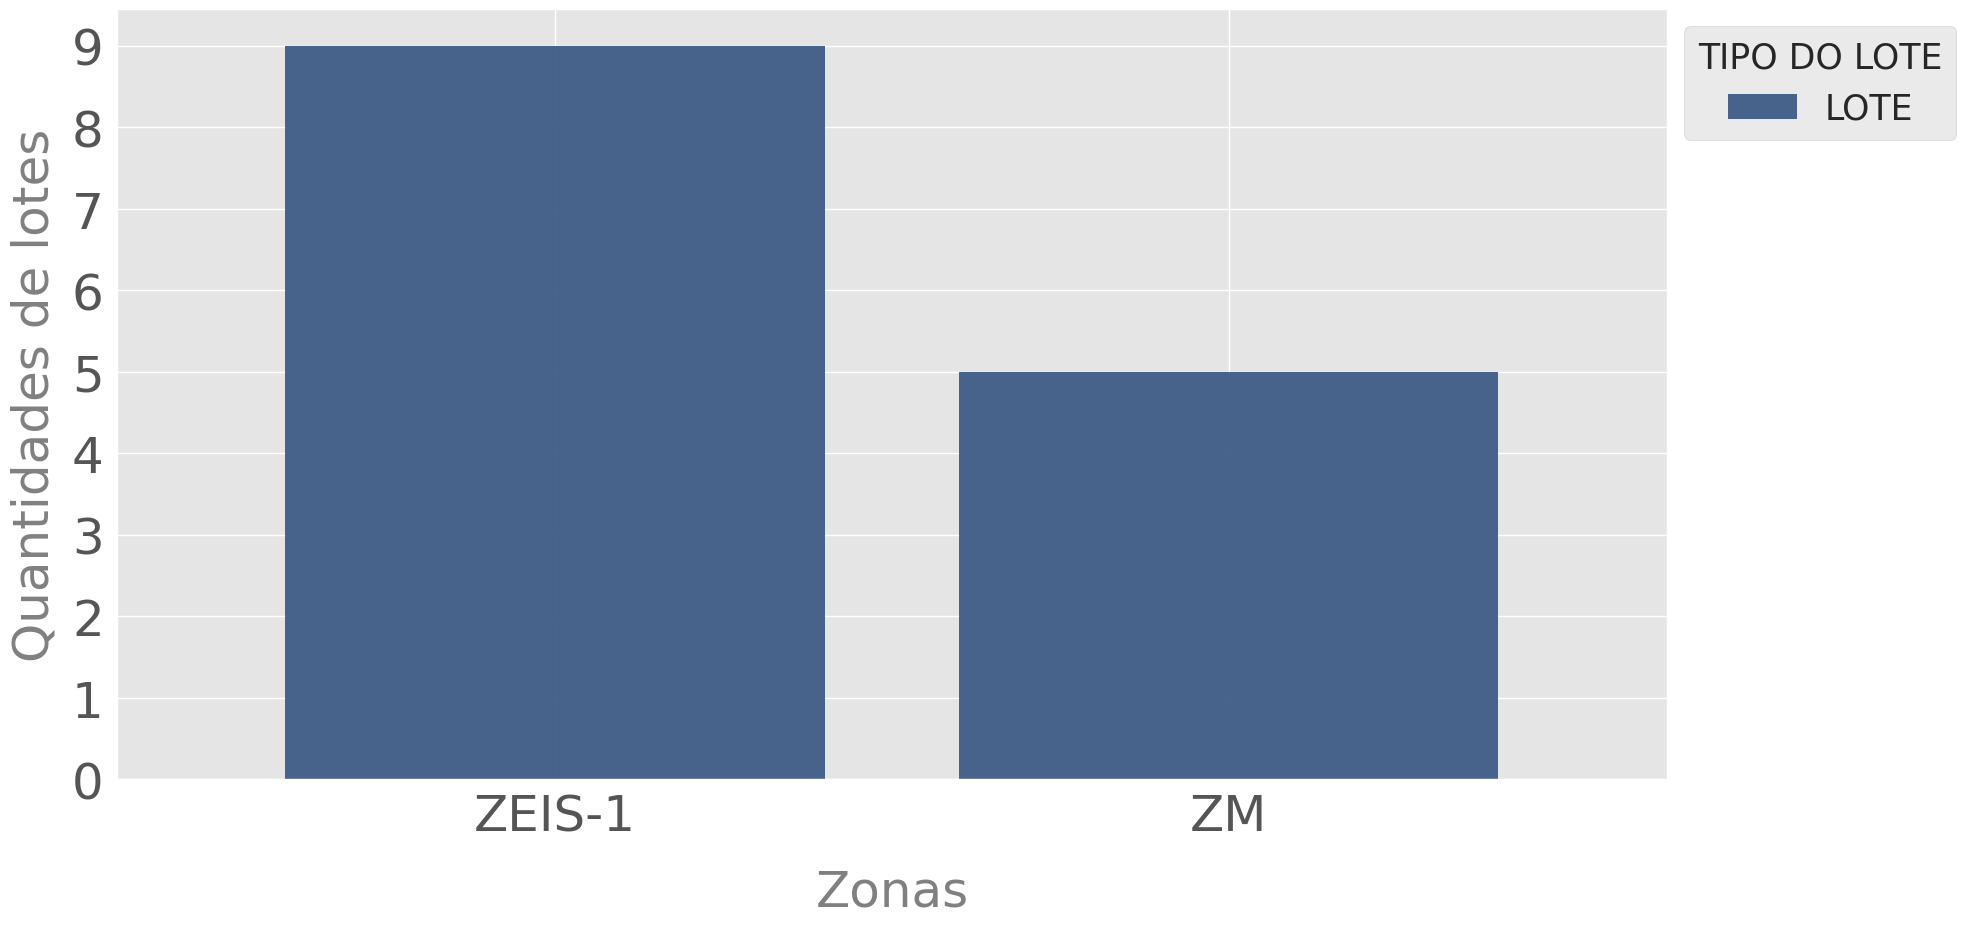

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
GU = GU_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
GU = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
GU = plt.xticks(rotation= 0 )
GU = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
GU = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
GU = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE SÃO MATEUS - SM 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'SM'")["SGL_ZONA_01_ZON"].value_counts()

ZMA       10
ZM         7
ZC         5
ZEIS-2     2
ZEU        2
ZEIS-1     1
ZPI-2      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SM_Zonas = dados.query("SGL_SUBP_EDIC == 'SM'")

In [ ]:
SM_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1697         0              ZC
1809         1              ZC
1688         0              ZC
1779         0              ZC
1775         0              ZC
1790         0          ZEIS-1
773          0          ZEIS-2
772          0          ZEIS-2
1834         1             ZEU
1835         1             ZEU
1742         0              ZM
1669         0              ZM
1727         0              ZM
1838         0              ZM
1717         0              ZM
1720         0              ZM
1715         0              ZM
1735         0             ZMA
1721         0             ZMA
771          0             ZMA
1739         0             ZMA
1740         0             ZMA
1791         0             ZMA
1804         0             ZMA
1686         0             ZMA
770          0             ZMA
1685         0             ZMA
1755         0           ZPI-2

In [ ]:
SM_Zonas["COD_COND"] = SM_Zonas["COD_COND"].astype(int)

In [ ]:
SM_Zonas["COD_COND"] = SM_Zonas["COD_COND"].astype(str)

In [ ]:
SM_Zonas["COD_COND"]

1697    0
1809    1
1688    0
1779    0
1775    0
1790    0
773     0
772     0
1834    1
1835    1
1742    0
1669    0
1727    0
1838    0
1717    0
1720    0
1715    0
1735    0
1721    0
771     0
1739    0
1740    0
1791    0
1804    0
1686    0
770     0
1685    0
1755    0
Name: COD_COND, dtype: object

In [ ]:
SM_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    3
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
SM_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMA       10
ZM         7
ZC         5
ZEIS-2     2
ZEU        2
ZEIS-1     1
ZPI-2      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SM_Cond_Zonas = SM_Zonas.query("COD_COND != '0'")
SM_Cond_Zonas

GEOCODE                  ID  \
1809  RUA MIN ALCIDES CARNEIRO, 179,SAO PAULO, SAO P...  149143672793010000   
1834  RUA PEDRO CORTE REAL, 186,SAO PAULO, SAO PAULO...  152186720143010000   
1835  RUA FREI JOAO GRANICA, 50,SAO PAULO, SAO PAULO...  152175682896010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1809          149          143       672793             1             0   
1834          152          186       720143             1             0   
1835          152          175       682896             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1809            SM           SMT             2  ...             NaN   
1834            SM           SRA             1  ...             NaN   
1835            SM           SRA             2  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1809     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1834     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1835     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1809  PRIMEIRO QUADRIMESTRE     2022         1  -23,5932817  -46,5032756  
1834  PRIMEIRO QUADRIMESTRE     2022         1  -23,6197153   -46,476251  
1835  PRIMEIRO QUADRIMESTRE     2022         1  -23,6157508   -46,474321  

[3 rows x 71 columns]

In [ ]:
len(SM_Cond_Zonas)

3

In [ ]:
SM_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMA       10
ZM         7
ZC         4
ZEIS-2     2
ZEIS-1     1
ZPI-2      1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SM_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZEU    2
ZC     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SM_Sem_Cond_Zonas = SM_Zonas.query("COD_COND == '0'")
SM_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1697  RUA MORADA NOVA DE MINAS, 817,SAO PAULO, SAO P...  149053707392000061   
1688  RUA MORADA NOVA DE MINAS, 811,SAO PAULO, SAO P...  149053707392000059   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1697          149           53       707392             0            61   
1688          149           53       707392             0            59   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1697            SM           SMT             1  ...             NaN   
1688            SM           SMT             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1697     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1688     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1697  PRIMEIRO QUADRIMESTRE     2022         0  -23,5835978  -46,4969038  
1688  PRIMEIRO QUADRIMESTRE     2022         0  -23,5835326  -46,4968973  

[2 rows x 71 columns]

In [ ]:
len(SM_Sem_Cond_Zonas)

25

In [ ]:
len(SM_Zonas)

28

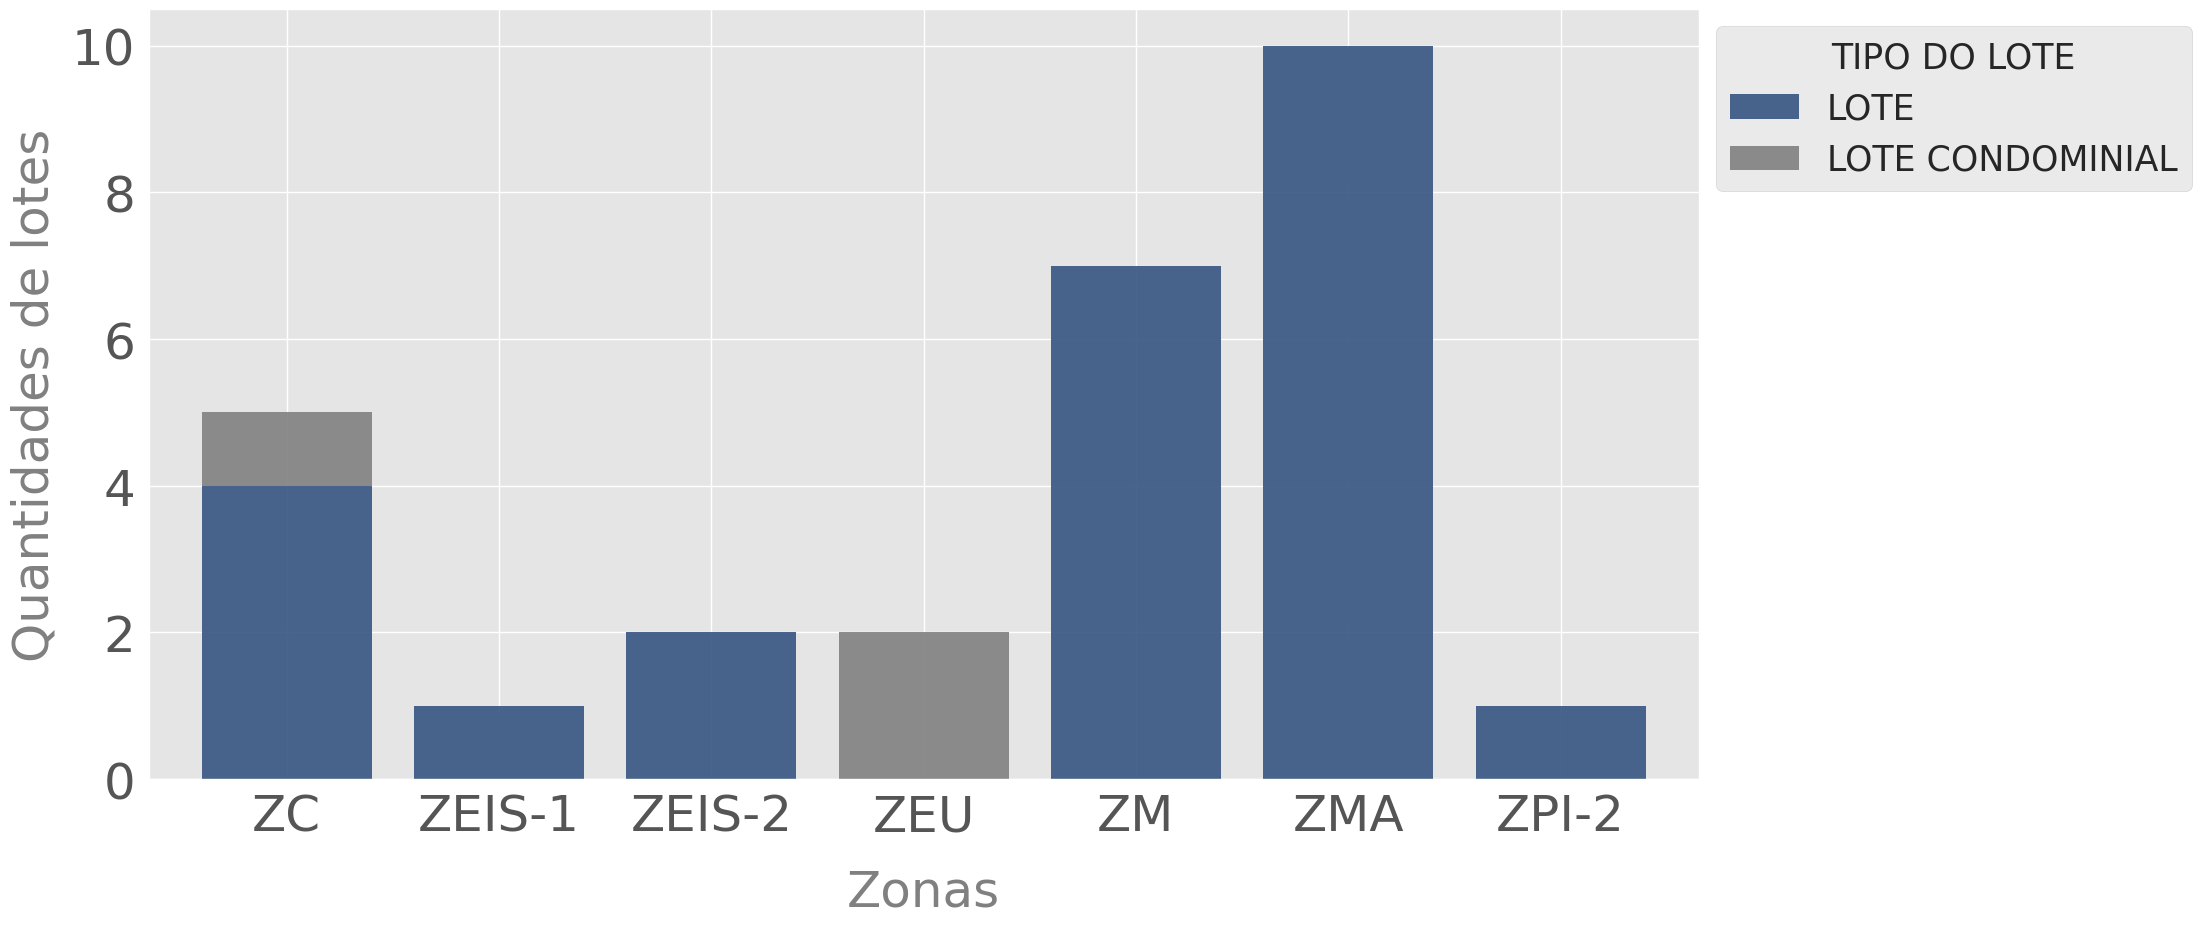

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SM = SM_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SM = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SM = plt.xticks(rotation= 0 )
SM = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SM = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
SM = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DA CIDADE TIRADENTES - CT 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'CT'")["SGL_ZONA_01_ZON"].value_counts()

ZMIS      13
ZEIS-1     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CT_Zonas = dados.query("SGL_SUBP_EDIC == 'CT'")

In [ ]:
CT_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1788         0          ZEIS-1
1729         0          ZEIS-1
1707         0            ZMIS
1726         0            ZMIS
1678         0            ZMIS
1723         0            ZMIS
1741         0            ZMIS
1716         0            ZMIS
1799         0            ZMIS
1665         0            ZMIS
1670         0            ZMIS
1796         0            ZMIS
1666         0            ZMIS
1676         0            ZMIS
1692         0            ZMIS

In [ ]:
CT_Zonas["COD_COND"] = CT_Zonas["COD_COND"].astype(int)

In [ ]:
CT_Zonas["COD_COND"] = CT_Zonas["COD_COND"].astype(str)

In [ ]:
CT_Zonas["COD_COND"]

1788    0
1729    0
1707    0
1726    0
1678    0
1723    0
1741    0
1716    0
1799    0
1665    0
1670    0
1796    0
1666    0
1676    0
1692    0
Name: COD_COND, dtype: object

In [ ]:
CT_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

Series([], Name: COD_CNDM_ZON, dtype: int64)

In [ ]:
CT_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMIS      13
ZEIS-1     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CT_Cond_Zonas = CT_Zonas.query("COD_COND != '0'")
CT_Cond_Zonas

Empty DataFrame
Columns: [GEOCODE, ID, COD_SET_ZON, COD_QDR_ZON, COD_LOG_ZON, COD_CNDM_ZON, COD_LOTE_ZON, SGL_SUBP_EDIC, SGL_DSTR_EDIC, COD_TSTD_ZON, IND_VRFC_EDIC, IND_EXCL_INCL_CRGA, SGL_ZONA_01_ZON, COD_PRMR_01_ZON, SGL_LNDR_01_ZON, COD_TIP_LEGC_01, COD_LEGC_01_ZON, ANO_LEGC_01_ZON, IND_ADCA_CRGA, SGL_ZONA_02_ZON, COD_PRMR_02_ZON, SGL_LNDR_02_ZON, COD_TIP_LEGC_02, COD_LEGC_02_ZON, ANO_LEGC_02_ZON, SGL_ZONA_03_ZON, COD_PRMR_03_ZON, SGL_LNDR_03_ZON, COD_TIP_LEGC_03, COD_LEGC_03_ZON, ANO_LEGC_03_ZON, SGL_ZONA_04_ZON, COD_PRMR_04_ZON, SGL_LNDR_04_ZON, COD_TIP_LEGC_04, COD_LEGC_04_ZON, ANO_LEGC_04_ZON, SGL_ZONA_05_ZON, COD_PRMR_05_ZON, SGL_LNDR_05_ZON, COD_TIP_LEGC_05, COD_LEGC_05_ZON, ANO_LEGC_05_ZON, SGL_ZONA_06_ZON, COD_PRMR_06_ZON, SGL_LNDR_06_ZON, COD_TIP_LEGC_06, COD_LEGC_06_ZON, ANO_LEGC_06_ZON, COD_AREA_CONST, COD_AREA_LT, COD_END_LOG, COD_NUM_PORT, COD_SIT, VALOR_MET_CODLOG, VALOR_MET_MED_ZON, NUM_PAV, SGL_ZON_URB_RUR, ANO_CONST, IND_EXCL_OBS, TXT_OBS_01_EDIC, TXT_OBS_02_EDIC, NOME_CID_EDIC, NOME_EST_EDIC, NOME_PAIS_EDIC, REG_LIM_ADM, QUADRIMESTRE, COD_ANO, COD_COND, Lat_Y_, Long_X_]
Index: []

[0 rows x 71 columns]

In [ ]:
len(CT_Cond_Zonas)

0

In [ ]:
CT_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZMIS      13
ZEIS-1     2
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
CT_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

Series([], Name: SGL_ZONA_01_ZON, dtype: int64)

In [ ]:
CT_Sem_Cond_Zonas = CT_Zonas.query("COD_COND == '0'")
CT_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1788  RUA ARTUR FRANCO, 523,SAO PAULO, SAO PAULO - B...  237006371572000105   
1729  RUA WILMA FLOR, 411,SAO PAULO, SAO PAULO - BRASIL  237006371599000104   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1788          237            6       371572             0           105   
1729          237            6       371599             0           104   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1788            CT           CTI             1  ...             NaN   
1729            CT           CTI             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1788     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1729     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1788  PRIMEIRO QUADRIMESTRE     2022         0  -23,5763493  -46,3961731  
1729  PRIMEIRO QUADRIMESTRE     2022         0  -23,5762558  -46,3964638  

[2 rows x 71 columns]

In [ ]:
len(CT_Sem_Cond_Zonas)

15

In [ ]:
len(CT_Zonas)

15

In [ ]:
CT_Zonas.query("SGL_ZONA_01_ZON == '99'")["SGL_ZONA_01_ZON"]
CT_Zonas['SGL_ZONA_01_ZON'].replace('99', 'INDEFINIDO', inplace=True)

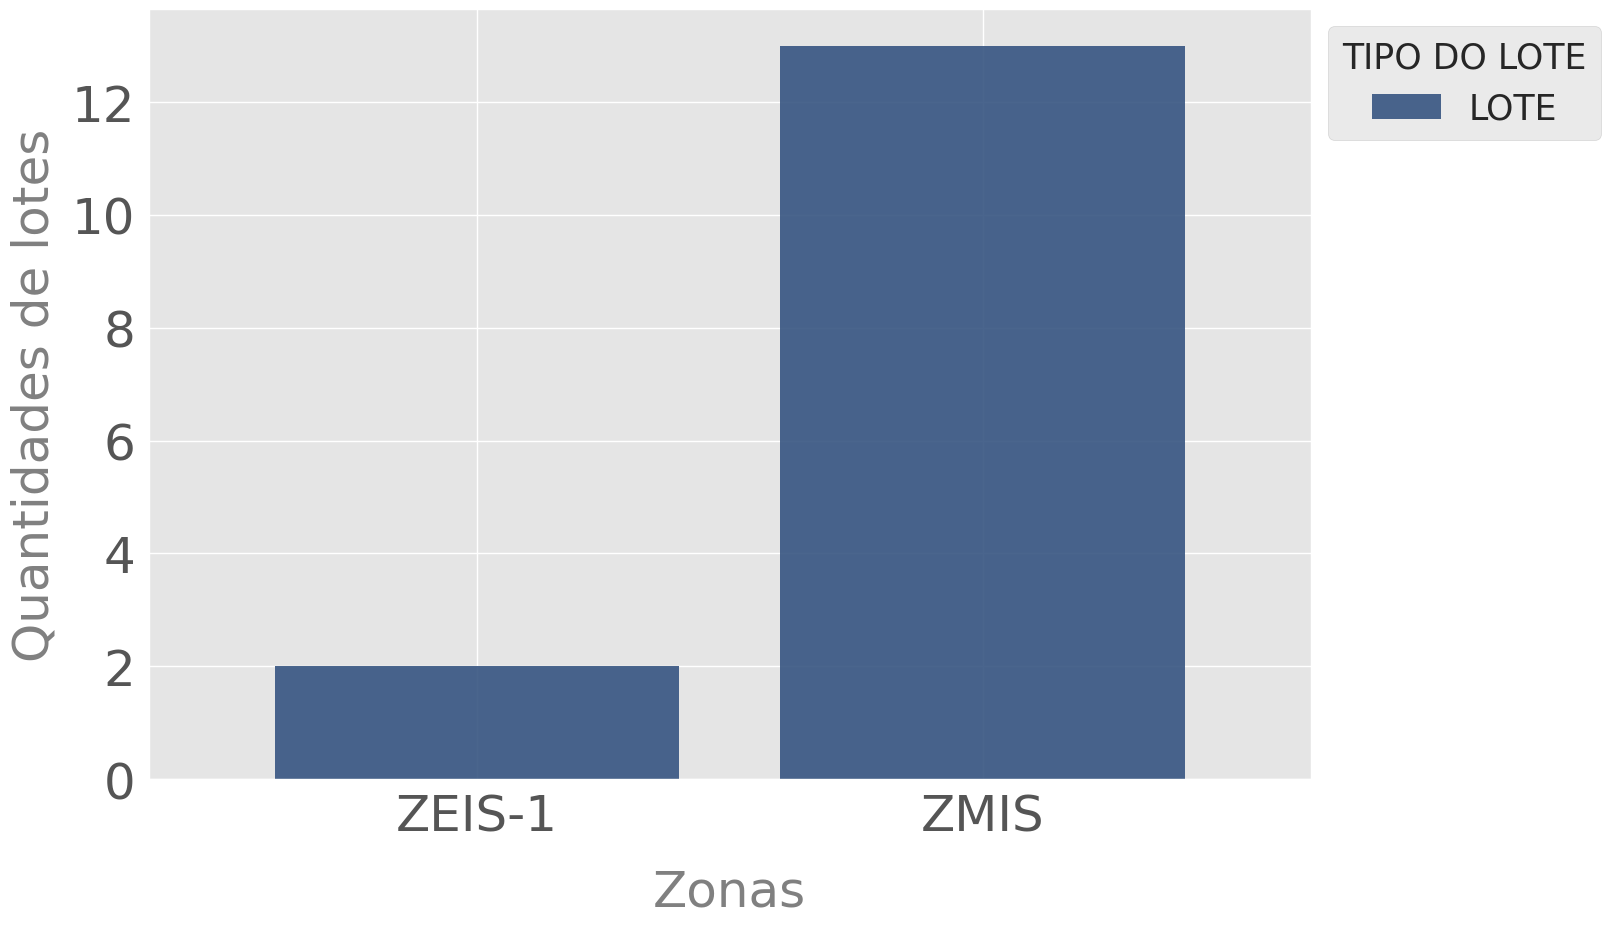

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
CT = CT_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
CT = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
CT = plt.xticks(rotation= 0 )
CT = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
CT = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
CT = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE SAPOPEMBA - SB 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'SB'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZEIS-1    129
ZM          8
ZEU         5
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SB_Zonas = dados.query("SGL_SUBP_EDIC == 'SB'")

In [ ]:
SB_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
875         0          ZEIS-1
876         0          ZEIS-1
830         0          ZEIS-1
829         0          ZEIS-1
874         0          ZEIS-1
..        ...             ...
969         0              ZM
967         0              ZM
968         0              ZM
972         0              ZM
970         0              ZM

[142 rows x 2 columns]

In [ ]:
SB_Zonas["COD_COND"] = SB_Zonas["COD_COND"].astype(int)

In [ ]:
SB_Zonas["COD_COND"] = SB_Zonas["COD_COND"].astype(str)

In [ ]:
SB_Zonas["COD_COND"]

875    0
876    0
830    0
829    0
874    0
      ..
969    0
967    0
968    0
972    0
970    0
Name: COD_COND, Length: 142, dtype: object

In [ ]:
SB_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts() 

1    2
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
SB_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    129
ZM          8
ZEU         5
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SB_Cond_Zonas = SB_Zonas.query("COD_COND != '0'")
SB_Cond_Zonas

GEOCODE                  ID  \
927   RUA PROFESSOR BOURHAN HELOU, 233,\nSAO PAULO, ...  117337213578010000   
1004  RUA GENERAL PORFIFIO DA PAZ , 926,\nSAO PAULO,...  117420345369010000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
927           117          337       213578             1             0   
1004          117          420       345369             1             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
927             SB           SAP             1  ...             NaN   
1004            SB           SAP             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
927      SAO PAULO     SAO PAULO          BRASIL      LESTE 1   
1004     SAO PAULO     SAO PAULO          BRASIL      LESTE 1   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
927   PRIMEIRO QUADRIMESTRE     2022         1   -23,595919  -46,5339586  
1004  PRIMEIRO QUADRIMESTRE     2022         1  -23,5931858  -46,5200039  

[2 rows x 71 columns]

In [ ]:
len(SB_Cond_Zonas) 

2

In [ ]:
SB_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZEIS-1    129
ZM          7
ZEU         4
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SB_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZEU    1
ZM     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
SB_Sem_Cond_Zonas = SB_Zonas.query("COD_COND == '0'")
SB_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
875  RUA HENRIQUE DE LEVA , 48,\nSAO PAULO, SAO PAU...  153221484423000044   
876  RUA HENRIQUE DE LEVA , 46,\nSAO PAULO, SAO PAU...  153221484423000045   

     COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
875          153          221       484423             0            44   
876          153          221       484423             0            45   

    SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
875            SB           SAP             1  ...             NaN   
876            SB           SAP             1  ...             NaN   

    NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
875     SAO PAULO     SAO PAULO          BRASIL      LESTE 1   
876     SAO PAULO     SAO PAULO          BRASIL      LESTE 1   

              QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
875  PRIMEIRO QUADRIMESTRE     2022         0  -23,6191395  -46,4849915  
876  PRIMEIRO QUADRIMESTRE     2022         0  -23,6190671  -46,4850072  

[2 rows x 71 columns]

In [ ]:
len(SB_Zonas)

142

In [ ]:
len(SB_Sem_Cond_Zonas)

140

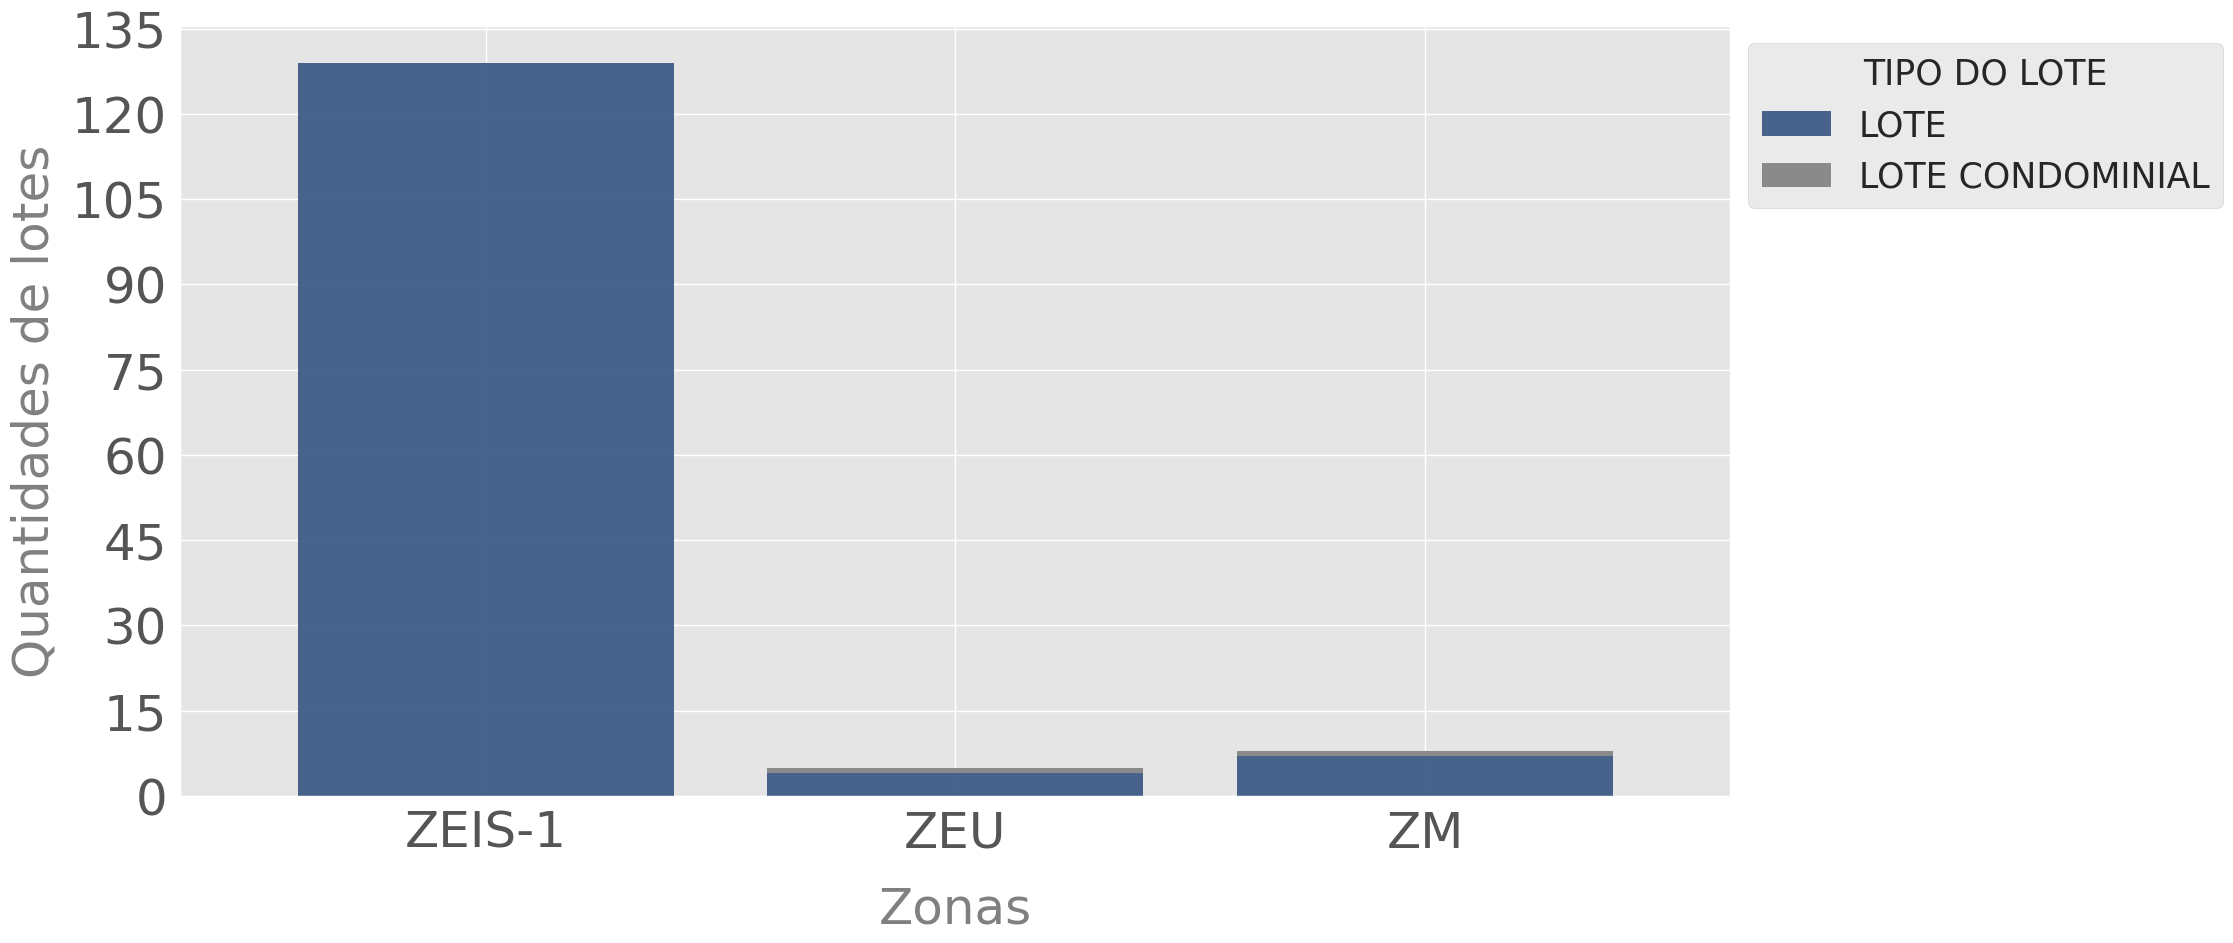

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
SB = SB_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
SB = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
SB = plt.xticks(rotation= 0 )
SB = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
SB = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
SB = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)

#LOTES DA SUBPREFEITURA DE SÃO MIGUEL - MP 

In [ ]:
dados.query("SGL_SUBP_EDIC == 'MP'")["SGL_ZONA_01_ZON"].value_counts() #ver as zonas dentro de cada prefeitura 

ZM         14
ZC          5
ZEIS-1      4
ZEUP        4
ZMA         3
ZC-ZEIS     1
ZCA         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MP_Zonas = dados.query("SGL_SUBP_EDIC == 'MP'")

In [ ]:
MP_Zonas[["COD_COND","SGL_ZONA_01_ZON"]]

COD_COND SGL_ZONA_01_ZON
1761         0              ZC
1672         0              ZC
1797         0              ZC
1762         0              ZC
1772         0              ZC
1744         0         ZC-ZEIS
1833         1             ZCA
1681         0          ZEIS-1
1758         0          ZEIS-1
1793         0          ZEIS-1
1683         0          ZEIS-1
1863         1            ZEUP
1862         1            ZEUP
1768         0            ZEUP
1766         0            ZEUP
1784         0              ZM
775          0              ZM
1752         0              ZM
1713         0              ZM
1737         0              ZM
774          0              ZM
1813         1              ZM
1765         0              ZM
1807         1              ZM
1811         1              ZM
1849         1              ZM
1815         1              ZM
1695         0              ZM
1812         1              ZM
1850         1             ZMA
1701         0             ZMA
1787         0             ZMA

In [ ]:
MP_Zonas["COD_COND"] = MP_Zonas["COD_COND"].astype(int)

In [ ]:
MP_Zonas["COD_COND"] = MP_Zonas["COD_COND"].astype(str)

In [ ]:
MP_Zonas["COD_COND"]

1761    0
1672    0
1797    0
1762    0
1772    0
1744    0
1833    1
1681    0
1758    0
1793    0
1683    0
1863    1
1862    1
1768    0
1766    0
1784    0
775     0
1752    0
1713    0
1737    0
774     0
1813    1
1765    0
1807    1
1811    1
1849    1
1815    1
1695    0
1812    1
1850    1
1701    0
1787    0
Name: COD_COND, dtype: object

In [ ]:
MP_Zonas.query("COD_COND  != '0'")["COD_CNDM_ZON"].value_counts()

1    8
3    1
2    1
Name: COD_CNDM_ZON, dtype: int64

In [ ]:
MP_Zonas.query("COD_CNDM_ZON != '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM         14
ZC          5
ZEIS-1      4
ZEUP        4
ZMA         3
ZC-ZEIS     1
ZCA         1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MP_Cond_Zonas = MP_Zonas.query("COD_COND != '0'")
MP_Cond_Zonas

GEOCODE                  ID  \
1833  RUA ALEXANDRE MACHADO PEREIRA, 50,SAO PAULO, S...  112082140058010000   
1863  RUA ANTONIO DE SIQUEIRA, 412,SAO PAULO, SAO PA...  112330016888010000   
1862  RUA FIRMINO BARBOSA, 310,SAO PAULO, SAO PAULO ...  112349071617010000   
1813  RUA GLOBO DO SOL, 227,SAO PAULO, SAO PAULO - B...  131044748374010000   
1807  RUA BERBARDO DE SOUSA, 168,SAO PAULO, SAO PAUL...  112325033022010000   
1811  RUA ARRAIAL DE CATAS ALTAS, 381,SAO PAULO, SAO...  131086739260010000   
1849  AV LARA CAMPOS, 653,SAO PAULO, SAO PAULO - BRASIL  139163115916030000   
1815  RUA S RAIMUNDO DAS MANGABEIRAS, 61,SAO PAULO, ...  111173738077010000   
1812  RUA HENRIQUE XAVIER DE BRITO, 137,SAO PAULO, S...  131067620971010000   
1850     RUA TUCUNARE, 40,SAO PAULO, SAO PAULO - BRASIL  112047654957020000   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1833          112           82       140058             1             0   
1863          112          330        16888             1             0   
1862          112          349        71617             1             0   
1813          131           44       748374             1             0   
1807          112          325        33022             1             0   
1811          131           86       739260             1             0   
1849          139          163       115916             3             0   
1815          111          173       738077             1             0   
1812          131           67       620971             1             0   
1850          112           47       654957             2             0   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1833            MP           JDH             1  ...             NaN   
1863            MP           VJA             1  ...             NaN   
1862            MP           SMI             1  ...             NaN   
1813            MP           VJA             1  ...             NaN   
1807            MP           VJA             1  ...             NaN   
1811            MP           VJA             1  ...             NaN   
1849            MP           SMI             1  ...             NaN   
1815            MP           VJA             1  ...             NaN   
1812            MP           VJA             2  ...             NaN   
1850            MP           JDH             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1833     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1863     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1862     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1813     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1807     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1811     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1849     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1815     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1812     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1850     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1833  PRIMEIRO QUADRIMESTRE     2022         1  -23,4800963  -46,4234105  
1863  PRIMEIRO QUADRIMESTRE     2022         1   -23,497347  -46,4613693  
1862  PRIMEIRO QUADRIMESTRE     2022         1  -23,4949404  -46,4504991  
1813  PRIMEIRO QUADRIMESTRE     2022         1   -23,503967  -46,4623553  
1807  PRIMEIRO QUADRIMESTRE     2022         1  -23,4960771  -46,4636469  
1811  PRIMEIRO QUADRIMESTRE     2022         1  -23,4926519  -46,4663804  
1849  PRIMEIRO QUADRIMESTRE     2022         1  -23,5182677   -46,434576  
1815  PRIMEIRO QUADRIMESTRE     2022         1  -23,5144189  -46,4748825  
1812  PRIMEIRO QUADRIMESTRE     2022         1  -23,5002257  -46,4668535  
1850  PRIMEIRO QUADRIMESTRE     2022         1  -23,4777829  -46,4240187  

[10 rows x 71 columns]

In [ ]:
len(MP_Cond_Zonas) 

10

In [ ]:
MP_Zonas.query("COD_COND == '0'")["SGL_ZONA_01_ZON"].value_counts()

ZM         8
ZC         5
ZEIS-1     4
ZEUP       2
ZMA        2
ZC-ZEIS    1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MP_Zonas.query("COD_COND == '1'")["SGL_ZONA_01_ZON"].value_counts()

ZM      6
ZEUP    2
ZCA     1
ZMA     1
Name: SGL_ZONA_01_ZON, dtype: int64

In [ ]:
MP_Sem_Cond_Zonas = MP_Zonas.query("COD_COND == '0'")
MP_Sem_Cond_Zonas.head(2)

GEOCODE                  ID  \
1761  RUA CLARICE BUENO DE MIRANDA, 348,SAO PAULO, S...  139135050210000040   
1672  AV NORDESTINA, 1496,SAO PAULO, SAO PAULO - BRASIL  112611115428000062   

      COD_SET_ZON  COD_QDR_ZON  COD_LOG_ZON  COD_CNDM_ZON  COD_LOTE_ZON  \
1761          139          135        50210             0            40   
1672          112          611       115428             0            62   

     SGL_SUBP_EDIC SGL_DSTR_EDIC  COD_TSTD_ZON  ... TXT_OBS_02_EDIC  \
1761            MP           SMI             1  ...             NaN   
1672            MP           SMI             1  ...             NaN   

     NOME_CID_EDIC NOME_EST_EDIC  NOME_PAIS_EDIC  REG_LIM_ADM  \
1761     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   
1672     SAO PAULO     SAO PAULO          BRASIL      LESTE 2   

               QUADRIMESTRE  COD_ANO  COD_COND       Lat_Y_      Long_X_  
1761  PRIMEIRO QUADRIMESTRE     2022         0  -23,5097672  -46,4377847  
1672  PRIMEIRO QUADRIMESTRE     2022         0  -23,5059175  -46,4396717  

[2 rows x 71 columns]

In [ ]:
len(MP_Sem_Cond_Zonas)

22

In [ ]:
len(MP_Zonas) 

32

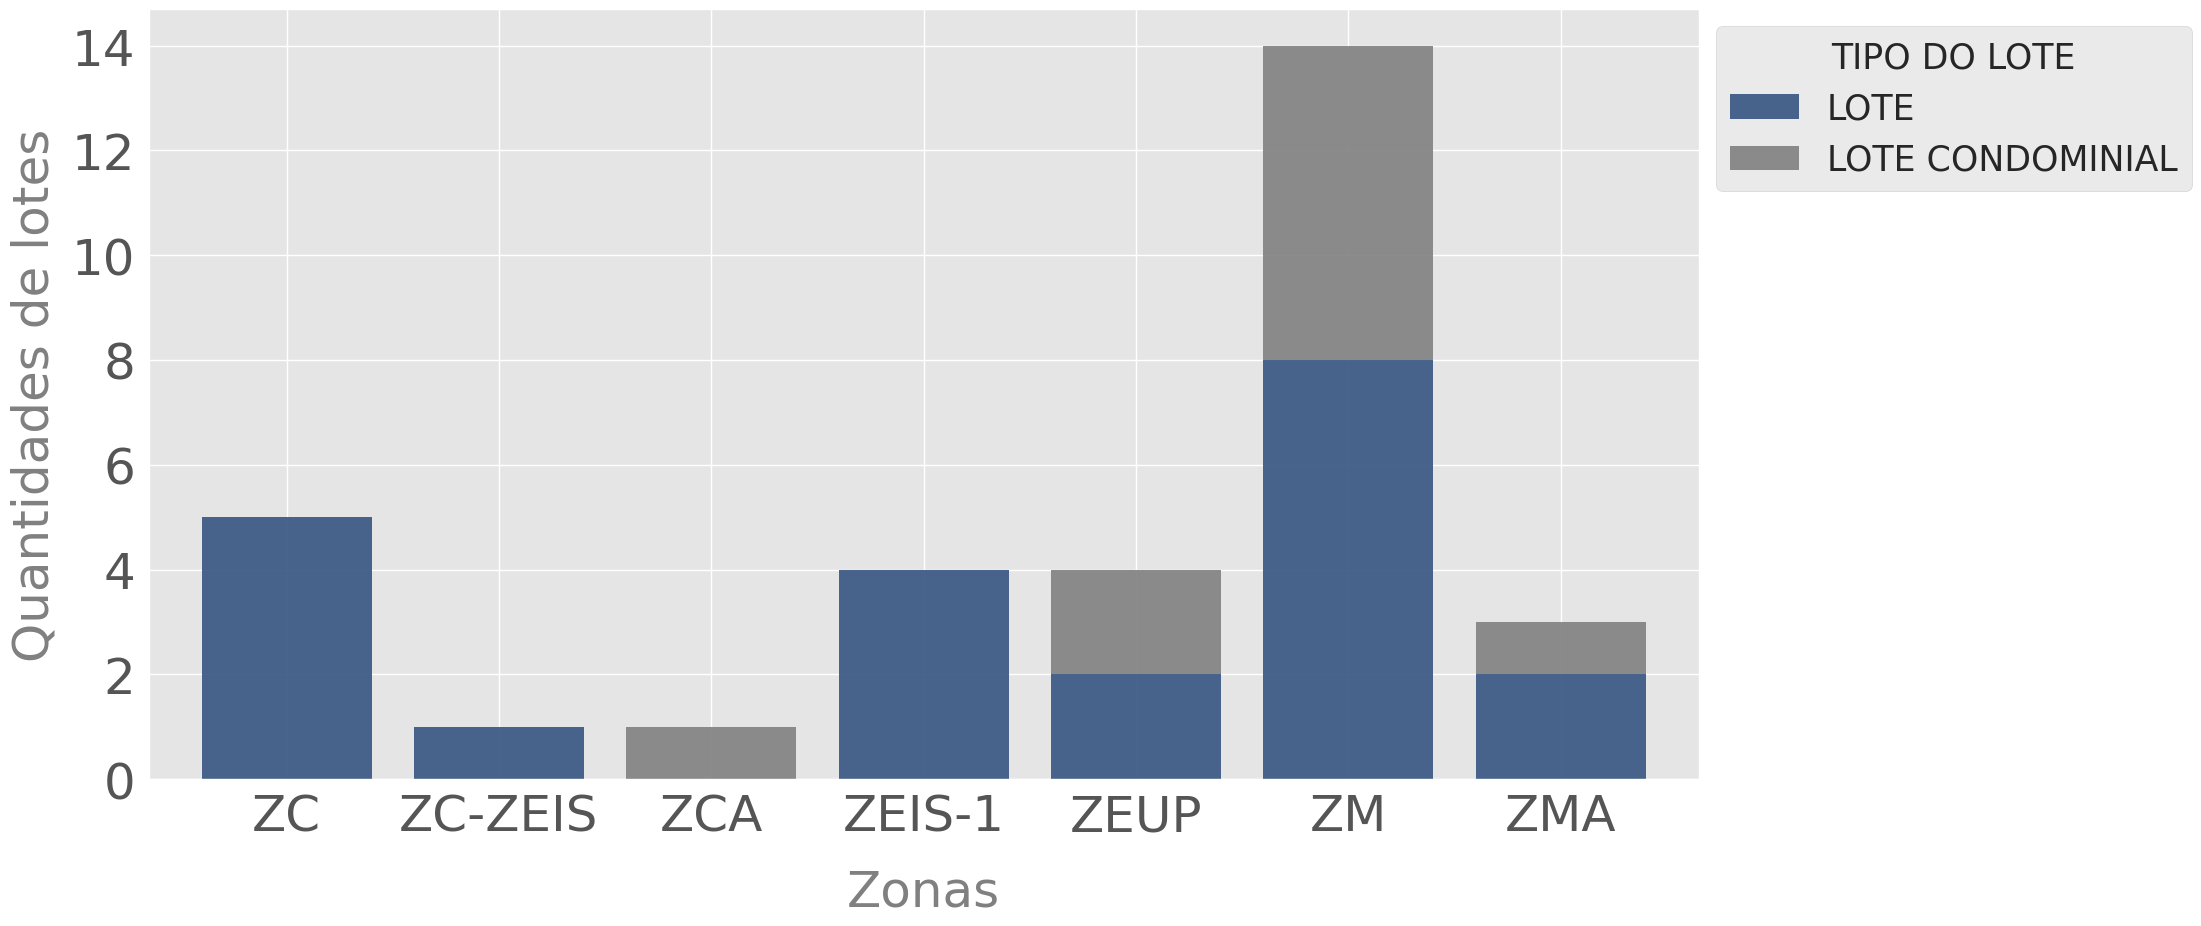

In [ ]:
plt.style.use("ggplot")
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
MP = MP_Zonas.groupby(['SGL_ZONA_01_ZON', 'COD_COND']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10),width = 0.8, alpha = 0.9, color = ['#365481', 'grey'], edgecolor='None')
MP = plt.xlabel('Zonas', color = 'gray', labelpad = 20, fontsize = 36)
MP = plt.xticks(rotation= 0 )
MP = plt.ylabel('Quantidades de lotes', color = 'gray', labelpad = 10, fontsize = 36)
MP = plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
MP = plt.legend(title= "TIPO DO LOTE",  title_fontsize = 25, loc=2,labels=['LOTE','LOTE CONDOMINIAL'],bbox_to_anchor=(1, 0, 0, 1), fontsize = 25)